In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =6 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


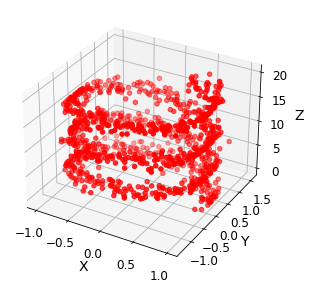

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                180       
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 830       
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 3,391
Trainable params: 3,291
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


## Training

In [8]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 9.062740 - generator: -0.019121 - 2s
Epoch 2/50000
critic: 2.833073 - generator: -0.005049 - 0s
Epoch 3/50000
critic: 0.664826 - generator: -0.005435 - 0s
Epoch 4/50000
critic: 0.088129 - generator: -0.005042 - 0s
Epoch 5/50000
critic: 0.035364 - generator: -0.006169 - 0s
Epoch 6/50000
critic: 0.029574 - generator: -0.003200 - 0s
Epoch 7/50000
critic: 0.033254 - generator: -0.004850 - 0s
Epoch 8/50000
critic: 0.039650 - generator: 0.000035 - 0s
Epoch 9/50000
critic: 0.021391 - generator: -0.001551 - 0s
Epoch 10/50000
critic: 0.035912 - generator: 0.009131 - 0s
Epoch 11/50000
critic: 0.028133 - generator: 0.012124 - 0s
Epoch 12/50000
critic: 0.019655 - generator: 0.016989 - 0s
Epoch 13/50000
critic: 0.025831 - generator: 0.026263 - 0s
Epoch 14/50000
critic: 0.026647 - generator: 0.028375 - 0s
Epoch 15/50000
critic: 0.027231 - generator: 0.031827 - 0s
Epoch 16/50000
critic: 0.018165 - generator: 0.031851 - 0s
Epoch 17/50000
critic: 0.028367 - generator: 0.037636 - 0

critic: 0.022618 - generator: 0.158528 - 0s
Epoch 141/50000
critic: 0.016657 - generator: 0.159134 - 0s
Epoch 142/50000
critic: 0.017038 - generator: 0.159023 - 0s
Epoch 143/50000
critic: 0.020267 - generator: 0.157762 - 0s
Epoch 144/50000
critic: 0.017760 - generator: 0.159731 - 0s
Epoch 145/50000
critic: 0.020402 - generator: 0.165982 - 0s
Epoch 146/50000
critic: 0.009405 - generator: 0.162322 - 0s
Epoch 147/50000
critic: 0.014832 - generator: 0.161495 - 0s
Epoch 148/50000
critic: 0.015712 - generator: 0.157819 - 0s
Epoch 149/50000
critic: 0.024025 - generator: 0.156409 - 0s
Epoch 150/50000
critic: 0.017374 - generator: 0.156461 - 0s
Epoch 151/50000
critic: 0.014953 - generator: 0.155119 - 0s
Epoch 152/50000
critic: 0.018450 - generator: 0.162135 - 0s
Epoch 153/50000
critic: 0.024660 - generator: 0.155935 - 0s
Epoch 154/50000
critic: 0.019048 - generator: 0.160247 - 0s
Epoch 155/50000
critic: 0.022094 - generator: 0.158922 - 0s
Epoch 156/50000
critic: 0.013827 - generator: 0.157393 -

critic: 0.011335 - generator: 0.174625 - 0s
Epoch 279/50000
critic: 0.018232 - generator: 0.174758 - 0s
Epoch 280/50000
critic: 0.017452 - generator: 0.172247 - 0s
Epoch 281/50000
critic: 0.023191 - generator: 0.175173 - 0s
Epoch 282/50000
critic: 0.012726 - generator: 0.182624 - 0s
Epoch 283/50000
critic: 0.015074 - generator: 0.174332 - 0s
Epoch 284/50000
critic: 0.010168 - generator: 0.177630 - 0s
Epoch 285/50000
critic: 0.012516 - generator: 0.176081 - 0s
Epoch 286/50000
critic: 0.015132 - generator: 0.178245 - 0s
Epoch 287/50000
critic: 0.012630 - generator: 0.175957 - 0s
Epoch 288/50000
critic: 0.015357 - generator: 0.172200 - 0s
Epoch 289/50000
critic: 0.017227 - generator: 0.179367 - 0s
Epoch 290/50000
critic: 0.020847 - generator: 0.175447 - 0s
Epoch 291/50000
critic: 0.008324 - generator: 0.177980 - 0s
Epoch 292/50000
critic: 0.012663 - generator: 0.170482 - 0s
Epoch 293/50000
critic: 0.014866 - generator: 0.174103 - 0s
Epoch 294/50000
critic: 0.016545 - generator: 0.173222 -

critic: 0.012767 - generator: 0.195886 - 0s
Epoch 416/50000
critic: 0.016109 - generator: 0.199569 - 0s
Epoch 417/50000
critic: 0.015627 - generator: 0.196629 - 0s
Epoch 418/50000
critic: 0.014584 - generator: 0.198507 - 0s
Epoch 419/50000
critic: 0.010295 - generator: 0.195803 - 0s
Epoch 420/50000
critic: 0.013483 - generator: 0.194131 - 0s
Epoch 421/50000
critic: 0.011886 - generator: 0.198865 - 0s
Epoch 422/50000
critic: 0.012175 - generator: 0.187764 - 0s
Epoch 423/50000
critic: 0.013699 - generator: 0.187974 - 0s
Epoch 424/50000
critic: 0.014704 - generator: 0.192489 - 0s
Epoch 425/50000
critic: 0.009467 - generator: 0.186275 - 0s
Epoch 426/50000
critic: 0.010306 - generator: 0.184620 - 0s
Epoch 427/50000
critic: 0.016388 - generator: 0.182359 - 0s
Epoch 428/50000
critic: 0.013815 - generator: 0.187840 - 0s
Epoch 429/50000
critic: 0.016342 - generator: 0.182113 - 0s
Epoch 430/50000
critic: 0.019889 - generator: 0.190356 - 0s
Epoch 431/50000
critic: 0.016516 - generator: 0.185442 -

critic: 0.017788 - generator: 0.200757 - 0s
Epoch 554/50000
critic: 0.008733 - generator: 0.199227 - 0s
Epoch 555/50000
critic: 0.009497 - generator: 0.200612 - 0s
Epoch 556/50000
critic: 0.008294 - generator: 0.206514 - 0s
Epoch 557/50000
critic: 0.015200 - generator: 0.204669 - 0s
Epoch 558/50000
critic: 0.010813 - generator: 0.195645 - 0s
Epoch 559/50000
critic: 0.022063 - generator: 0.201991 - 0s
Epoch 560/50000
critic: 0.013849 - generator: 0.202287 - 0s
Epoch 561/50000
critic: 0.013107 - generator: 0.199611 - 0s
Epoch 562/50000
critic: 0.013978 - generator: 0.199538 - 0s
Epoch 563/50000
critic: 0.017229 - generator: 0.199902 - 0s
Epoch 564/50000
critic: 0.013822 - generator: 0.200279 - 0s
Epoch 565/50000
critic: 0.015570 - generator: 0.197989 - 0s
Epoch 566/50000
critic: 0.010358 - generator: 0.203912 - 0s
Epoch 567/50000
critic: 0.013028 - generator: 0.198208 - 0s
Epoch 568/50000
critic: 0.012181 - generator: 0.200439 - 0s
Epoch 569/50000
critic: 0.007574 - generator: 0.206157 -

critic: 0.007830 - generator: 0.208259 - 0s
Epoch 692/50000
critic: 0.016282 - generator: 0.210800 - 0s
Epoch 693/50000
critic: 0.010923 - generator: 0.214313 - 0s
Epoch 694/50000
critic: 0.014621 - generator: 0.206110 - 0s
Epoch 695/50000
critic: 0.012369 - generator: 0.206878 - 0s
Epoch 696/50000
critic: 0.011513 - generator: 0.202516 - 0s
Epoch 697/50000
critic: 0.013914 - generator: 0.204308 - 0s
Epoch 698/50000
critic: 0.011739 - generator: 0.206803 - 0s
Epoch 699/50000
critic: 0.012790 - generator: 0.206214 - 0s
Epoch 700/50000
critic: 0.009971 - generator: 0.200515 - 0s
Epoch 701/50000
critic: 0.013064 - generator: 0.203641 - 0s
Epoch 702/50000
critic: 0.012273 - generator: 0.204018 - 0s
Epoch 703/50000
critic: 0.008711 - generator: 0.209204 - 0s
Epoch 704/50000
critic: 0.009521 - generator: 0.202564 - 0s
Epoch 705/50000
critic: 0.012888 - generator: 0.203513 - 0s
Epoch 706/50000
critic: 0.015033 - generator: 0.201758 - 0s
Epoch 707/50000
critic: 0.020286 - generator: 0.198391 -

critic: 0.011369 - generator: 0.221420 - 0s
Epoch 830/50000
critic: 0.009533 - generator: 0.226595 - 0s
Epoch 831/50000
critic: 0.010545 - generator: 0.220093 - 0s
Epoch 832/50000
critic: 0.008031 - generator: 0.221644 - 0s
Epoch 833/50000
critic: 0.019513 - generator: 0.224537 - 0s
Epoch 834/50000
critic: 0.009931 - generator: 0.227179 - 0s
Epoch 835/50000
critic: 0.010545 - generator: 0.225474 - 0s
Epoch 836/50000
critic: 0.012151 - generator: 0.225778 - 0s
Epoch 837/50000
critic: 0.008076 - generator: 0.223631 - 0s
Epoch 838/50000
critic: 0.015367 - generator: 0.219135 - 0s
Epoch 839/50000
critic: 0.009658 - generator: 0.224009 - 0s
Epoch 840/50000
critic: 0.011440 - generator: 0.223831 - 0s
Epoch 841/50000
critic: 0.014284 - generator: 0.220609 - 0s
Epoch 842/50000
critic: 0.010716 - generator: 0.225057 - 0s
Epoch 843/50000
critic: 0.013517 - generator: 0.225948 - 0s
Epoch 844/50000
critic: 0.012825 - generator: 0.231179 - 0s
Epoch 845/50000
critic: 0.010876 - generator: 0.224810 -

critic: 0.007101 - generator: 0.221434 - 0s
Epoch 967/50000
critic: 0.012194 - generator: 0.217404 - 0s
Epoch 968/50000
critic: 0.016092 - generator: 0.220383 - 0s
Epoch 969/50000
critic: 0.012155 - generator: 0.223919 - 0s
Epoch 970/50000
critic: 0.010951 - generator: 0.221974 - 0s
Epoch 971/50000
critic: 0.021853 - generator: 0.219829 - 0s
Epoch 972/50000
critic: 0.010289 - generator: 0.221130 - 0s
Epoch 973/50000
critic: 0.014915 - generator: 0.222366 - 0s
Epoch 974/50000
critic: 0.007681 - generator: 0.220731 - 0s
Epoch 975/50000
critic: 0.010956 - generator: 0.224554 - 0s
Epoch 976/50000
critic: 0.009568 - generator: 0.226029 - 0s
Epoch 977/50000
critic: 0.008840 - generator: 0.223306 - 0s
Epoch 978/50000
critic: 0.018677 - generator: 0.227441 - 0s
Epoch 979/50000
critic: 0.016976 - generator: 0.226249 - 0s
Epoch 980/50000
critic: 0.007231 - generator: 0.220613 - 0s
Epoch 981/50000
critic: 0.012372 - generator: 0.218897 - 0s
Epoch 982/50000
critic: 0.010352 - generator: 0.217902 -

critic: 0.010515 - generator: 0.220533 - 0s
Epoch 1103/50000
critic: 0.007644 - generator: 0.219276 - 0s
Epoch 1104/50000
critic: 0.011452 - generator: 0.217986 - 0s
Epoch 1105/50000
critic: 0.008014 - generator: 0.223044 - 0s
Epoch 1106/50000
critic: 0.010386 - generator: 0.223681 - 0s
Epoch 1107/50000
critic: 0.008798 - generator: 0.221517 - 0s
Epoch 1108/50000
critic: 0.013265 - generator: 0.219587 - 0s
Epoch 1109/50000
critic: 0.014354 - generator: 0.223467 - 0s
Epoch 1110/50000
critic: 0.015138 - generator: 0.227385 - 0s
Epoch 1111/50000
critic: 0.010119 - generator: 0.221726 - 0s
Epoch 1112/50000
critic: 0.011775 - generator: 0.223848 - 0s
Epoch 1113/50000
critic: 0.009434 - generator: 0.233959 - 0s
Epoch 1114/50000
critic: 0.011581 - generator: 0.230819 - 0s
Epoch 1115/50000
critic: 0.016845 - generator: 0.236750 - 0s
Epoch 1116/50000
critic: 0.011015 - generator: 0.237428 - 0s
Epoch 1117/50000
critic: 0.012214 - generator: 0.241040 - 0s
Epoch 1118/50000
critic: 0.011186 - gener

critic: 0.006279 - generator: 0.234616 - 0s
Epoch 1239/50000
critic: 0.008831 - generator: 0.226946 - 0s
Epoch 1240/50000
critic: 0.012600 - generator: 0.237382 - 0s
Epoch 1241/50000
critic: 0.018255 - generator: 0.233836 - 0s
Epoch 1242/50000
critic: 0.014032 - generator: 0.237827 - 0s
Epoch 1243/50000
critic: 0.011152 - generator: 0.237948 - 0s
Epoch 1244/50000
critic: 0.016594 - generator: 0.237015 - 0s
Epoch 1245/50000
critic: 0.012205 - generator: 0.241298 - 0s
Epoch 1246/50000
critic: 0.011901 - generator: 0.239035 - 0s
Epoch 1247/50000
critic: 0.017713 - generator: 0.245574 - 0s
Epoch 1248/50000
critic: 0.014619 - generator: 0.244238 - 0s
Epoch 1249/50000
critic: 0.009980 - generator: 0.242343 - 0s
Epoch 1250/50000
critic: 0.014149 - generator: 0.239826 - 0s
Epoch 1251/50000
critic: 0.014626 - generator: 0.241224 - 0s
Epoch 1252/50000
critic: 0.013309 - generator: 0.236894 - 0s
Epoch 1253/50000
critic: 0.012295 - generator: 0.232806 - 0s
Epoch 1254/50000
critic: 0.009972 - gener

critic: 0.006574 - generator: 0.236389 - 0s
Epoch 1375/50000
critic: 0.011267 - generator: 0.236102 - 0s
Epoch 1376/50000
critic: 0.014721 - generator: 0.230787 - 0s
Epoch 1377/50000
critic: 0.013834 - generator: 0.239594 - 0s
Epoch 1378/50000
critic: 0.011364 - generator: 0.239968 - 0s
Epoch 1379/50000
critic: 0.007477 - generator: 0.233899 - 0s
Epoch 1380/50000
critic: 0.011335 - generator: 0.235735 - 0s
Epoch 1381/50000
critic: 0.011607 - generator: 0.243048 - 0s
Epoch 1382/50000
critic: 0.006690 - generator: 0.241969 - 0s
Epoch 1383/50000
critic: 0.009107 - generator: 0.238819 - 0s
Epoch 1384/50000
critic: 0.009848 - generator: 0.241898 - 0s
Epoch 1385/50000
critic: 0.012186 - generator: 0.236542 - 0s
Epoch 1386/50000
critic: 0.011498 - generator: 0.238151 - 0s
Epoch 1387/50000
critic: 0.008839 - generator: 0.240773 - 0s
Epoch 1388/50000
critic: 0.019667 - generator: 0.237557 - 0s
Epoch 1389/50000
critic: 0.012202 - generator: 0.245602 - 0s
Epoch 1390/50000
critic: 0.016121 - gener

critic: 0.014689 - generator: 0.238895 - 0s
Epoch 1511/50000
critic: 0.012081 - generator: 0.237408 - 0s
Epoch 1512/50000
critic: 0.005768 - generator: 0.241291 - 0s
Epoch 1513/50000
critic: 0.008541 - generator: 0.238092 - 0s
Epoch 1514/50000
critic: 0.013825 - generator: 0.239659 - 0s
Epoch 1515/50000
critic: 0.010257 - generator: 0.238328 - 0s
Epoch 1516/50000
critic: 0.006297 - generator: 0.243195 - 0s
Epoch 1517/50000
critic: 0.010702 - generator: 0.241046 - 0s
Epoch 1518/50000
critic: 0.009559 - generator: 0.242192 - 0s
Epoch 1519/50000
critic: 0.010971 - generator: 0.240116 - 0s
Epoch 1520/50000
critic: 0.005989 - generator: 0.239300 - 0s
Epoch 1521/50000
critic: 0.010202 - generator: 0.243624 - 0s
Epoch 1522/50000
critic: 0.015122 - generator: 0.245844 - 0s
Epoch 1523/50000
critic: 0.010710 - generator: 0.241194 - 0s
Epoch 1524/50000
critic: 0.015839 - generator: 0.241032 - 0s
Epoch 1525/50000
critic: 0.007315 - generator: 0.242511 - 0s
Epoch 1526/50000
critic: 0.008694 - gener

critic: 0.012926 - generator: 0.244560 - 0s
Epoch 1647/50000
critic: 0.014578 - generator: 0.247240 - 0s
Epoch 1648/50000
critic: 0.013164 - generator: 0.250123 - 0s
Epoch 1649/50000
critic: 0.015079 - generator: 0.250596 - 0s
Epoch 1650/50000
critic: 0.008296 - generator: 0.250333 - 0s
Epoch 1651/50000
critic: 0.010185 - generator: 0.254513 - 0s
Epoch 1652/50000
critic: 0.006512 - generator: 0.253303 - 0s
Epoch 1653/50000
critic: 0.014954 - generator: 0.258226 - 0s
Epoch 1654/50000
critic: 0.008720 - generator: 0.252552 - 0s
Epoch 1655/50000
critic: 0.014083 - generator: 0.247411 - 0s
Epoch 1656/50000
critic: 0.008889 - generator: 0.249798 - 0s
Epoch 1657/50000
critic: 0.011974 - generator: 0.245235 - 0s
Epoch 1658/50000
critic: 0.012514 - generator: 0.248108 - 0s
Epoch 1659/50000
critic: 0.010898 - generator: 0.244856 - 0s
Epoch 1660/50000
critic: 0.006811 - generator: 0.258453 - 0s
Epoch 1661/50000
critic: 0.014484 - generator: 0.250246 - 0s
Epoch 1662/50000
critic: 0.013032 - gener

critic: 0.009515 - generator: 0.261777 - 0s
Epoch 1782/50000
critic: 0.009315 - generator: 0.260045 - 0s
Epoch 1783/50000
critic: 0.012270 - generator: 0.257688 - 0s
Epoch 1784/50000
critic: 0.012203 - generator: 0.254114 - 0s
Epoch 1785/50000
critic: 0.014116 - generator: 0.251903 - 0s
Epoch 1786/50000
critic: 0.009837 - generator: 0.250593 - 0s
Epoch 1787/50000
critic: 0.007634 - generator: 0.247831 - 0s
Epoch 1788/50000
critic: 0.008363 - generator: 0.253083 - 0s
Epoch 1789/50000
critic: 0.009134 - generator: 0.245184 - 0s
Epoch 1790/50000
critic: 0.012582 - generator: 0.248574 - 0s
Epoch 1791/50000
critic: 0.011978 - generator: 0.253508 - 0s
Epoch 1792/50000
critic: 0.011395 - generator: 0.247238 - 0s
Epoch 1793/50000
critic: 0.014452 - generator: 0.245237 - 0s
Epoch 1794/50000
critic: 0.012180 - generator: 0.246177 - 0s
Epoch 1795/50000
critic: 0.011847 - generator: 0.242337 - 0s
Epoch 1796/50000
critic: 0.017147 - generator: 0.246296 - 0s
Epoch 1797/50000
critic: 0.009303 - gener

critic: 0.012468 - generator: 0.247962 - 0s
Epoch 1917/50000
critic: 0.014530 - generator: 0.251832 - 0s
Epoch 1918/50000
critic: 0.009079 - generator: 0.253716 - 0s
Epoch 1919/50000
critic: 0.009429 - generator: 0.247817 - 0s
Epoch 1920/50000
critic: 0.011544 - generator: 0.254340 - 0s
Epoch 1921/50000
critic: 0.009112 - generator: 0.252716 - 0s
Epoch 1922/50000
critic: 0.011474 - generator: 0.255293 - 0s
Epoch 1923/50000
critic: 0.013944 - generator: 0.251968 - 0s
Epoch 1924/50000
critic: 0.007731 - generator: 0.254034 - 0s
Epoch 1925/50000
critic: 0.013551 - generator: 0.255464 - 0s
Epoch 1926/50000
critic: 0.010303 - generator: 0.255437 - 0s
Epoch 1927/50000
critic: 0.010171 - generator: 0.256604 - 0s
Epoch 1928/50000
critic: 0.007837 - generator: 0.255290 - 0s
Epoch 1929/50000
critic: 0.005674 - generator: 0.250114 - 0s
Epoch 1930/50000
critic: 0.009236 - generator: 0.250454 - 0s
Epoch 1931/50000
critic: 0.008232 - generator: 0.251172 - 0s
Epoch 1932/50000
critic: 0.018813 - gener

critic: 0.016137 - generator: 0.248844 - 0s
Epoch 2053/50000
critic: 0.014065 - generator: 0.253866 - 0s
Epoch 2054/50000
critic: 0.009136 - generator: 0.254259 - 0s
Epoch 2055/50000
critic: 0.009752 - generator: 0.248607 - 0s
Epoch 2056/50000
critic: 0.009603 - generator: 0.246460 - 0s
Epoch 2057/50000
critic: 0.010254 - generator: 0.246654 - 0s
Epoch 2058/50000
critic: 0.009567 - generator: 0.240581 - 0s
Epoch 2059/50000
critic: 0.009019 - generator: 0.248848 - 0s
Epoch 2060/50000
critic: 0.014514 - generator: 0.240820 - 0s
Epoch 2061/50000
critic: 0.007656 - generator: 0.242832 - 0s
Epoch 2062/50000
critic: 0.006758 - generator: 0.240750 - 0s
Epoch 2063/50000
critic: 0.007363 - generator: 0.245830 - 0s
Epoch 2064/50000
critic: 0.005803 - generator: 0.243434 - 0s
Epoch 2065/50000
critic: 0.013806 - generator: 0.243301 - 0s
Epoch 2066/50000
critic: 0.009951 - generator: 0.243466 - 0s
Epoch 2067/50000
critic: 0.010054 - generator: 0.245104 - 0s
Epoch 2068/50000
critic: 0.007268 - gener

critic: 0.011993 - generator: 0.247223 - 0s
Epoch 2188/50000
critic: 0.011750 - generator: 0.246087 - 0s
Epoch 2189/50000
critic: 0.003313 - generator: 0.244439 - 0s
Epoch 2190/50000
critic: 0.010558 - generator: 0.248548 - 0s
Epoch 2191/50000
critic: 0.010765 - generator: 0.243567 - 0s
Epoch 2192/50000
critic: 0.009752 - generator: 0.249147 - 0s
Epoch 2193/50000
critic: 0.012126 - generator: 0.250393 - 0s
Epoch 2194/50000
critic: 0.008817 - generator: 0.249087 - 0s
Epoch 2195/50000
critic: 0.017729 - generator: 0.248539 - 0s
Epoch 2196/50000
critic: 0.005650 - generator: 0.250005 - 0s
Epoch 2197/50000
critic: 0.008953 - generator: 0.246258 - 0s
Epoch 2198/50000
critic: 0.011870 - generator: 0.248615 - 0s
Epoch 2199/50000
critic: 0.007932 - generator: 0.244360 - 0s
Epoch 2200/50000
critic: 0.011444 - generator: 0.247906 - 0s
Epoch 2201/50000
critic: 0.007377 - generator: 0.244569 - 0s
Epoch 2202/50000
critic: 0.008323 - generator: 0.241921 - 0s
Epoch 2203/50000
critic: 0.010908 - gener

critic: 0.005100 - generator: 0.246659 - 0s
Epoch 2324/50000
critic: 0.011802 - generator: 0.247202 - 0s
Epoch 2325/50000
critic: 0.007890 - generator: 0.245243 - 0s
Epoch 2326/50000
critic: 0.004704 - generator: 0.245961 - 0s
Epoch 2327/50000
critic: 0.016752 - generator: 0.246335 - 0s
Epoch 2328/50000
critic: 0.009022 - generator: 0.251281 - 0s
Epoch 2329/50000
critic: 0.011454 - generator: 0.244088 - 0s
Epoch 2330/50000
critic: 0.013763 - generator: 0.250258 - 0s
Epoch 2331/50000
critic: 0.014080 - generator: 0.248890 - 0s
Epoch 2332/50000
critic: 0.008355 - generator: 0.249001 - 0s
Epoch 2333/50000
critic: 0.013790 - generator: 0.244627 - 0s
Epoch 2334/50000
critic: 0.008136 - generator: 0.247650 - 0s
Epoch 2335/50000
critic: 0.016631 - generator: 0.250388 - 0s
Epoch 2336/50000
critic: 0.010627 - generator: 0.243707 - 0s
Epoch 2337/50000
critic: 0.006832 - generator: 0.246267 - 0s
Epoch 2338/50000
critic: 0.020523 - generator: 0.245721 - 0s
Epoch 2339/50000
critic: 0.010961 - gener

critic: 0.006921 - generator: 0.260723 - 0s
Epoch 2460/50000
critic: 0.004715 - generator: 0.255056 - 0s
Epoch 2461/50000
critic: 0.008446 - generator: 0.259096 - 0s
Epoch 2462/50000
critic: 0.006183 - generator: 0.261708 - 0s
Epoch 2463/50000
critic: 0.011695 - generator: 0.257122 - 0s
Epoch 2464/50000
critic: 0.004103 - generator: 0.250564 - 0s
Epoch 2465/50000
critic: 0.009038 - generator: 0.253155 - 0s
Epoch 2466/50000
critic: 0.015793 - generator: 0.256277 - 0s
Epoch 2467/50000
critic: 0.008715 - generator: 0.258095 - 0s
Epoch 2468/50000
critic: 0.009292 - generator: 0.261676 - 0s
Epoch 2469/50000
critic: 0.009423 - generator: 0.261550 - 0s
Epoch 2470/50000
critic: 0.010877 - generator: 0.260168 - 0s
Epoch 2471/50000
critic: 0.010255 - generator: 0.260613 - 0s
Epoch 2472/50000
critic: 0.007107 - generator: 0.261435 - 0s
Epoch 2473/50000
critic: 0.013315 - generator: 0.259287 - 0s
Epoch 2474/50000
critic: 0.012069 - generator: 0.261116 - 0s
Epoch 2475/50000
critic: 0.013643 - gener

critic: 0.012477 - generator: 0.257280 - 0s
Epoch 2596/50000
critic: 0.012658 - generator: 0.255022 - 0s
Epoch 2597/50000
critic: 0.009739 - generator: 0.253951 - 0s
Epoch 2598/50000
critic: 0.008610 - generator: 0.256197 - 0s
Epoch 2599/50000
critic: 0.010785 - generator: 0.256290 - 0s
Epoch 2600/50000
critic: 0.010258 - generator: 0.258838 - 0s
Epoch 2601/50000
critic: 0.013648 - generator: 0.252011 - 0s
Epoch 2602/50000
critic: 0.011377 - generator: 0.248741 - 0s
Epoch 2603/50000
critic: 0.013524 - generator: 0.253557 - 0s
Epoch 2604/50000
critic: 0.011561 - generator: 0.252392 - 0s
Epoch 2605/50000
critic: 0.012086 - generator: 0.249145 - 0s
Epoch 2606/50000
critic: 0.011334 - generator: 0.247364 - 0s
Epoch 2607/50000
critic: 0.011100 - generator: 0.244956 - 0s
Epoch 2608/50000
critic: 0.006291 - generator: 0.249128 - 0s
Epoch 2609/50000
critic: 0.012116 - generator: 0.244691 - 0s
Epoch 2610/50000
critic: 0.007835 - generator: 0.249548 - 0s
Epoch 2611/50000
critic: 0.008938 - gener

critic: 0.011107 - generator: 0.251968 - 0s
Epoch 2732/50000
critic: 0.008244 - generator: 0.252269 - 0s
Epoch 2733/50000
critic: 0.010075 - generator: 0.248415 - 0s
Epoch 2734/50000
critic: 0.008582 - generator: 0.252256 - 0s
Epoch 2735/50000
critic: 0.009736 - generator: 0.248242 - 0s
Epoch 2736/50000
critic: 0.012270 - generator: 0.248244 - 0s
Epoch 2737/50000
critic: 0.015669 - generator: 0.253803 - 0s
Epoch 2738/50000
critic: 0.009081 - generator: 0.256699 - 0s
Epoch 2739/50000
critic: 0.015212 - generator: 0.255219 - 0s
Epoch 2740/50000
critic: 0.011673 - generator: 0.254423 - 0s
Epoch 2741/50000
critic: 0.009903 - generator: 0.255369 - 0s
Epoch 2742/50000
critic: 0.017140 - generator: 0.257251 - 0s
Epoch 2743/50000
critic: 0.011968 - generator: 0.254747 - 0s
Epoch 2744/50000
critic: 0.008559 - generator: 0.251457 - 0s
Epoch 2745/50000
critic: 0.012581 - generator: 0.257609 - 0s
Epoch 2746/50000
critic: 0.004684 - generator: 0.249135 - 0s
Epoch 2747/50000
critic: 0.009151 - gener

critic: 0.012464 - generator: 0.265713 - 0s
Epoch 2868/50000
critic: 0.009808 - generator: 0.265409 - 0s
Epoch 2869/50000
critic: 0.006978 - generator: 0.266303 - 0s
Epoch 2870/50000
critic: 0.007122 - generator: 0.264460 - 0s
Epoch 2871/50000
critic: 0.011700 - generator: 0.261994 - 0s
Epoch 2872/50000
critic: 0.009578 - generator: 0.262625 - 0s
Epoch 2873/50000
critic: 0.009707 - generator: 0.258875 - 0s
Epoch 2874/50000
critic: 0.011594 - generator: 0.259268 - 0s
Epoch 2875/50000
critic: 0.011937 - generator: 0.261848 - 0s
Epoch 2876/50000
critic: 0.009418 - generator: 0.253859 - 0s
Epoch 2877/50000
critic: 0.007425 - generator: 0.251829 - 0s
Epoch 2878/50000
critic: 0.011638 - generator: 0.251926 - 0s
Epoch 2879/50000
critic: 0.007826 - generator: 0.256028 - 0s
Epoch 2880/50000
critic: 0.009602 - generator: 0.256080 - 0s
Epoch 2881/50000
critic: 0.008100 - generator: 0.254901 - 0s
Epoch 2882/50000
critic: 0.008359 - generator: 0.252948 - 0s
Epoch 2883/50000
critic: 0.009475 - gener

critic: 0.007811 - generator: 0.259743 - 0s
Epoch 3004/50000
critic: 0.005130 - generator: 0.262860 - 0s
Epoch 3005/50000
critic: 0.007114 - generator: 0.261807 - 0s
Epoch 3006/50000
critic: 0.008732 - generator: 0.264671 - 0s
Epoch 3007/50000
critic: 0.010130 - generator: 0.267572 - 0s
Epoch 3008/50000
critic: 0.009358 - generator: 0.260150 - 0s
Epoch 3009/50000
critic: 0.009547 - generator: 0.266415 - 0s
Epoch 3010/50000
critic: 0.005897 - generator: 0.265336 - 0s
Epoch 3011/50000
critic: 0.011370 - generator: 0.264837 - 0s
Epoch 3012/50000
critic: 0.009782 - generator: 0.262989 - 0s
Epoch 3013/50000
critic: 0.007029 - generator: 0.267078 - 0s
Epoch 3014/50000
critic: 0.009784 - generator: 0.263979 - 0s
Epoch 3015/50000
critic: 0.011177 - generator: 0.264154 - 0s
Epoch 3016/50000
critic: 0.010062 - generator: 0.262199 - 0s
Epoch 3017/50000
critic: 0.011144 - generator: 0.259187 - 0s
Epoch 3018/50000
critic: 0.005446 - generator: 0.257985 - 0s
Epoch 3019/50000
critic: 0.009996 - gener

critic: 0.009546 - generator: 0.250851 - 0s
Epoch 3139/50000
critic: 0.007638 - generator: 0.248842 - 0s
Epoch 3140/50000
critic: 0.008232 - generator: 0.243612 - 0s
Epoch 3141/50000
critic: 0.011631 - generator: 0.243140 - 0s
Epoch 3142/50000
critic: 0.010108 - generator: 0.248677 - 0s
Epoch 3143/50000
critic: 0.007176 - generator: 0.243779 - 0s
Epoch 3144/50000
critic: 0.008424 - generator: 0.243962 - 0s
Epoch 3145/50000
critic: 0.010397 - generator: 0.246560 - 0s
Epoch 3146/50000
critic: 0.008709 - generator: 0.245183 - 0s
Epoch 3147/50000
critic: 0.010228 - generator: 0.246732 - 0s
Epoch 3148/50000
critic: 0.006661 - generator: 0.244973 - 0s
Epoch 3149/50000
critic: 0.013136 - generator: 0.246779 - 0s
Epoch 3150/50000
critic: 0.009545 - generator: 0.248634 - 0s
Epoch 3151/50000
critic: 0.010897 - generator: 0.248503 - 0s
Epoch 3152/50000
critic: 0.007247 - generator: 0.250170 - 0s
Epoch 3153/50000
critic: 0.004071 - generator: 0.252009 - 0s
Epoch 3154/50000
critic: 0.008063 - gener

critic: 0.009457 - generator: 0.238844 - 0s
Epoch 3275/50000
critic: 0.008212 - generator: 0.238906 - 0s
Epoch 3276/50000
critic: 0.009100 - generator: 0.236484 - 0s
Epoch 3277/50000
critic: 0.006661 - generator: 0.237520 - 0s
Epoch 3278/50000
critic: 0.007048 - generator: 0.237106 - 0s
Epoch 3279/50000
critic: 0.006855 - generator: 0.234667 - 0s
Epoch 3280/50000
critic: 0.010629 - generator: 0.242687 - 0s
Epoch 3281/50000
critic: 0.007012 - generator: 0.236157 - 0s
Epoch 3282/50000
critic: 0.006479 - generator: 0.242782 - 0s
Epoch 3283/50000
critic: 0.005705 - generator: 0.240018 - 0s
Epoch 3284/50000
critic: 0.006216 - generator: 0.236067 - 0s
Epoch 3285/50000
critic: 0.008374 - generator: 0.239077 - 0s
Epoch 3286/50000
critic: 0.013984 - generator: 0.241439 - 0s
Epoch 3287/50000
critic: 0.009687 - generator: 0.241451 - 0s
Epoch 3288/50000
critic: 0.005742 - generator: 0.241762 - 0s
Epoch 3289/50000
critic: 0.008899 - generator: 0.244960 - 0s
Epoch 3290/50000
critic: 0.011447 - gener

critic: 0.013125 - generator: 0.220663 - 0s
Epoch 3410/50000
critic: 0.008657 - generator: 0.224503 - 0s
Epoch 3411/50000
critic: 0.005976 - generator: 0.225159 - 0s
Epoch 3412/50000
critic: 0.006448 - generator: 0.225383 - 0s
Epoch 3413/50000
critic: 0.011309 - generator: 0.227073 - 0s
Epoch 3414/50000
critic: 0.011126 - generator: 0.225600 - 0s
Epoch 3415/50000
critic: 0.009683 - generator: 0.226508 - 0s
Epoch 3416/50000
critic: 0.007032 - generator: 0.228074 - 0s
Epoch 3417/50000
critic: 0.007645 - generator: 0.225895 - 0s
Epoch 3418/50000
critic: 0.007726 - generator: 0.226028 - 0s
Epoch 3419/50000
critic: 0.009525 - generator: 0.228374 - 0s
Epoch 3420/50000
critic: 0.006644 - generator: 0.226054 - 0s
Epoch 3421/50000
critic: 0.012755 - generator: 0.233109 - 0s
Epoch 3422/50000
critic: 0.005062 - generator: 0.227877 - 0s
Epoch 3423/50000
critic: 0.008109 - generator: 0.229597 - 0s
Epoch 3424/50000
critic: 0.010291 - generator: 0.236966 - 0s
Epoch 3425/50000
critic: 0.005210 - gener

critic: 0.012328 - generator: 0.250331 - 0s
Epoch 3546/50000
critic: 0.009058 - generator: 0.243150 - 0s
Epoch 3547/50000
critic: 0.007584 - generator: 0.245711 - 0s
Epoch 3548/50000
critic: 0.008500 - generator: 0.243786 - 0s
Epoch 3549/50000
critic: 0.007334 - generator: 0.243181 - 0s
Epoch 3550/50000
critic: 0.010961 - generator: 0.243293 - 0s
Epoch 3551/50000
critic: 0.007315 - generator: 0.245222 - 0s
Epoch 3552/50000
critic: 0.013415 - generator: 0.239576 - 0s
Epoch 3553/50000
critic: 0.011711 - generator: 0.242379 - 0s
Epoch 3554/50000
critic: 0.011001 - generator: 0.245503 - 0s
Epoch 3555/50000
critic: 0.010896 - generator: 0.242547 - 0s
Epoch 3556/50000
critic: 0.004817 - generator: 0.237471 - 0s
Epoch 3557/50000
critic: 0.006791 - generator: 0.240966 - 0s
Epoch 3558/50000
critic: 0.004571 - generator: 0.237532 - 0s
Epoch 3559/50000
critic: 0.012939 - generator: 0.248330 - 0s
Epoch 3560/50000
critic: 0.007423 - generator: 0.244187 - 0s
Epoch 3561/50000
critic: 0.009372 - gener

critic: 0.004288 - generator: 0.254182 - 0s
Epoch 3682/50000
critic: 0.010456 - generator: 0.248814 - 0s
Epoch 3683/50000
critic: 0.005643 - generator: 0.251699 - 0s
Epoch 3684/50000
critic: 0.009588 - generator: 0.250913 - 0s
Epoch 3685/50000
critic: 0.010370 - generator: 0.248026 - 0s
Epoch 3686/50000
critic: 0.009942 - generator: 0.247529 - 0s
Epoch 3687/50000
critic: 0.013501 - generator: 0.247266 - 0s
Epoch 3688/50000
critic: 0.006838 - generator: 0.250840 - 0s
Epoch 3689/50000
critic: 0.010172 - generator: 0.249240 - 0s
Epoch 3690/50000
critic: 0.003539 - generator: 0.247573 - 0s
Epoch 3691/50000
critic: 0.007311 - generator: 0.252231 - 0s
Epoch 3692/50000
critic: 0.007174 - generator: 0.252008 - 0s
Epoch 3693/50000
critic: 0.010917 - generator: 0.246674 - 0s
Epoch 3694/50000
critic: 0.008317 - generator: 0.247582 - 0s
Epoch 3695/50000
critic: 0.008467 - generator: 0.250860 - 0s
Epoch 3696/50000
critic: 0.004783 - generator: 0.247153 - 0s
Epoch 3697/50000
critic: 0.003063 - gener

critic: 0.009075 - generator: 0.235580 - 0s
Epoch 3818/50000
critic: 0.009207 - generator: 0.235527 - 0s
Epoch 3819/50000
critic: 0.009464 - generator: 0.231348 - 0s
Epoch 3820/50000
critic: 0.012287 - generator: 0.234413 - 0s
Epoch 3821/50000
critic: 0.004523 - generator: 0.239988 - 0s
Epoch 3822/50000
critic: 0.005447 - generator: 0.235552 - 0s
Epoch 3823/50000
critic: 0.006670 - generator: 0.229650 - 0s
Epoch 3824/50000
critic: 0.011093 - generator: 0.232528 - 0s
Epoch 3825/50000
critic: 0.008167 - generator: 0.233876 - 0s
Epoch 3826/50000
critic: 0.009058 - generator: 0.233368 - 0s
Epoch 3827/50000
critic: 0.004071 - generator: 0.236225 - 0s
Epoch 3828/50000
critic: 0.005901 - generator: 0.240250 - 0s
Epoch 3829/50000
critic: 0.007675 - generator: 0.240009 - 0s
Epoch 3830/50000
critic: 0.008810 - generator: 0.237183 - 0s
Epoch 3831/50000
critic: 0.007984 - generator: 0.242087 - 0s
Epoch 3832/50000
critic: 0.015350 - generator: 0.238835 - 0s
Epoch 3833/50000
critic: 0.008292 - gener

critic: 0.008736 - generator: 0.236148 - 0s
Epoch 3954/50000
critic: 0.008605 - generator: 0.234512 - 0s
Epoch 3955/50000
critic: 0.006103 - generator: 0.236206 - 0s
Epoch 3956/50000
critic: 0.007474 - generator: 0.233663 - 0s
Epoch 3957/50000
critic: 0.009569 - generator: 0.233749 - 0s
Epoch 3958/50000
critic: 0.008350 - generator: 0.231585 - 0s
Epoch 3959/50000
critic: 0.010126 - generator: 0.234703 - 0s
Epoch 3960/50000
critic: 0.006961 - generator: 0.236169 - 0s
Epoch 3961/50000
critic: 0.006146 - generator: 0.235934 - 0s
Epoch 3962/50000
critic: 0.011306 - generator: 0.236023 - 0s
Epoch 3963/50000
critic: 0.010380 - generator: 0.241597 - 0s
Epoch 3964/50000
critic: 0.008470 - generator: 0.240870 - 0s
Epoch 3965/50000
critic: 0.007433 - generator: 0.240816 - 0s
Epoch 3966/50000
critic: 0.010274 - generator: 0.239781 - 0s
Epoch 3967/50000
critic: 0.007112 - generator: 0.240498 - 0s
Epoch 3968/50000
critic: 0.008679 - generator: 0.240760 - 0s
Epoch 3969/50000
critic: 0.006386 - gener

critic: 0.010093 - generator: 0.253934 - 0s
Epoch 4090/50000
critic: 0.005670 - generator: 0.258857 - 0s
Epoch 4091/50000
critic: 0.009990 - generator: 0.260740 - 0s
Epoch 4092/50000
critic: 0.004755 - generator: 0.266987 - 0s
Epoch 4093/50000
critic: 0.010517 - generator: 0.262904 - 0s
Epoch 4094/50000
critic: 0.009316 - generator: 0.267224 - 0s
Epoch 4095/50000
critic: 0.010410 - generator: 0.261811 - 0s
Epoch 4096/50000
critic: 0.011235 - generator: 0.266153 - 0s
Epoch 4097/50000
critic: 0.007418 - generator: 0.259577 - 0s
Epoch 4098/50000
critic: 0.008266 - generator: 0.257444 - 0s
Epoch 4099/50000
critic: 0.008824 - generator: 0.258191 - 0s
Epoch 4100/50000
critic: 0.008536 - generator: 0.259998 - 0s
Epoch 4101/50000
critic: 0.007768 - generator: 0.255422 - 0s
Epoch 4102/50000
critic: 0.003753 - generator: 0.253376 - 0s
Epoch 4103/50000
critic: 0.011085 - generator: 0.256150 - 0s
Epoch 4104/50000
critic: 0.007496 - generator: 0.248864 - 0s
Epoch 4105/50000
critic: 0.005158 - gener

critic: 0.008137 - generator: 0.245856 - 0s
Epoch 4226/50000
critic: 0.009343 - generator: 0.244072 - 0s
Epoch 4227/50000
critic: 0.010796 - generator: 0.243811 - 0s
Epoch 4228/50000
critic: 0.001949 - generator: 0.240617 - 0s
Epoch 4229/50000
critic: 0.007653 - generator: 0.243818 - 0s
Epoch 4230/50000
critic: 0.009689 - generator: 0.239367 - 0s
Epoch 4231/50000
critic: 0.008898 - generator: 0.241540 - 0s
Epoch 4232/50000
critic: 0.008818 - generator: 0.242490 - 0s
Epoch 4233/50000
critic: 0.003432 - generator: 0.239741 - 0s
Epoch 4234/50000
critic: 0.008730 - generator: 0.238403 - 0s
Epoch 4235/50000
critic: 0.004374 - generator: 0.234521 - 0s
Epoch 4236/50000
critic: 0.009179 - generator: 0.240833 - 0s
Epoch 4237/50000
critic: 0.014484 - generator: 0.237797 - 0s
Epoch 4238/50000
critic: 0.012828 - generator: 0.239142 - 0s
Epoch 4239/50000
critic: 0.007828 - generator: 0.236224 - 0s
Epoch 4240/50000
critic: 0.006810 - generator: 0.239370 - 0s
Epoch 4241/50000
critic: 0.008590 - gener

critic: 0.008536 - generator: 0.236915 - 0s
Epoch 4361/50000
critic: 0.010426 - generator: 0.237781 - 0s
Epoch 4362/50000
critic: 0.004350 - generator: 0.239491 - 0s
Epoch 4363/50000
critic: 0.005393 - generator: 0.237624 - 0s
Epoch 4364/50000
critic: 0.011302 - generator: 0.232365 - 0s
Epoch 4365/50000
critic: 0.006839 - generator: 0.237231 - 0s
Epoch 4366/50000
critic: 0.011118 - generator: 0.229000 - 0s
Epoch 4367/50000
critic: 0.008024 - generator: 0.232363 - 0s
Epoch 4368/50000
critic: 0.006444 - generator: 0.227554 - 0s
Epoch 4369/50000
critic: 0.008107 - generator: 0.235958 - 0s
Epoch 4370/50000
critic: 0.005993 - generator: 0.232950 - 0s
Epoch 4371/50000
critic: 0.012489 - generator: 0.234586 - 0s
Epoch 4372/50000
critic: 0.007767 - generator: 0.236312 - 0s
Epoch 4373/50000
critic: 0.004888 - generator: 0.233889 - 0s
Epoch 4374/50000
critic: 0.008846 - generator: 0.238596 - 0s
Epoch 4375/50000
critic: 0.011857 - generator: 0.238919 - 0s
Epoch 4376/50000
critic: 0.007752 - gener

critic: 0.009600 - generator: 0.245203 - 0s
Epoch 4497/50000
critic: 0.007364 - generator: 0.240260 - 0s
Epoch 4498/50000
critic: 0.005187 - generator: 0.245077 - 0s
Epoch 4499/50000
critic: 0.013654 - generator: 0.241413 - 0s
Epoch 4500/50000
critic: 0.012179 - generator: 0.240520 - 0s
Epoch 4501/50000
critic: 0.006038 - generator: 0.248721 - 0s
Epoch 4502/50000
critic: 0.008427 - generator: 0.246631 - 0s
Epoch 4503/50000
critic: 0.010337 - generator: 0.250276 - 0s
Epoch 4504/50000
critic: 0.010996 - generator: 0.246567 - 0s
Epoch 4505/50000
critic: 0.007513 - generator: 0.242063 - 0s
Epoch 4506/50000
critic: 0.009205 - generator: 0.247043 - 0s
Epoch 4507/50000
critic: 0.009984 - generator: 0.245083 - 0s
Epoch 4508/50000
critic: 0.007689 - generator: 0.249070 - 0s
Epoch 4509/50000
critic: 0.011071 - generator: 0.245206 - 0s
Epoch 4510/50000
critic: 0.010599 - generator: 0.240508 - 0s
Epoch 4511/50000
critic: 0.008823 - generator: 0.246153 - 0s
Epoch 4512/50000
critic: 0.006776 - gener

critic: 0.011554 - generator: 0.241254 - 0s
Epoch 4632/50000
critic: 0.005416 - generator: 0.241261 - 0s
Epoch 4633/50000
critic: 0.003804 - generator: 0.244796 - 0s
Epoch 4634/50000
critic: 0.008932 - generator: 0.241820 - 0s
Epoch 4635/50000
critic: 0.010941 - generator: 0.237867 - 0s
Epoch 4636/50000
critic: 0.005459 - generator: 0.239609 - 0s
Epoch 4637/50000
critic: 0.005660 - generator: 0.239477 - 0s
Epoch 4638/50000
critic: 0.009155 - generator: 0.240463 - 0s
Epoch 4639/50000
critic: 0.008113 - generator: 0.241535 - 0s
Epoch 4640/50000
critic: 0.008463 - generator: 0.243449 - 0s
Epoch 4641/50000
critic: 0.007032 - generator: 0.247151 - 0s
Epoch 4642/50000
critic: 0.003759 - generator: 0.243376 - 0s
Epoch 4643/50000
critic: 0.011489 - generator: 0.244410 - 0s
Epoch 4644/50000
critic: 0.008777 - generator: 0.243094 - 0s
Epoch 4645/50000
critic: 0.006553 - generator: 0.241770 - 0s
Epoch 4646/50000
critic: 0.002350 - generator: 0.247784 - 0s
Epoch 4647/50000
critic: 0.005449 - gener

critic: 0.010021 - generator: 0.238287 - 0s
Epoch 4767/50000
critic: 0.003620 - generator: 0.239853 - 0s
Epoch 4768/50000
critic: 0.012454 - generator: 0.238774 - 0s
Epoch 4769/50000
critic: 0.007050 - generator: 0.241113 - 0s
Epoch 4770/50000
critic: 0.007719 - generator: 0.239848 - 0s
Epoch 4771/50000
critic: 0.007016 - generator: 0.247338 - 0s
Epoch 4772/50000
critic: 0.012376 - generator: 0.239938 - 0s
Epoch 4773/50000
critic: 0.006257 - generator: 0.242471 - 0s
Epoch 4774/50000
critic: 0.007430 - generator: 0.239596 - 0s
Epoch 4775/50000
critic: 0.010100 - generator: 0.240793 - 0s
Epoch 4776/50000
critic: 0.009842 - generator: 0.238519 - 0s
Epoch 4777/50000
critic: 0.004396 - generator: 0.239421 - 0s
Epoch 4778/50000
critic: 0.009739 - generator: 0.237123 - 0s
Epoch 4779/50000
critic: 0.009260 - generator: 0.237299 - 0s
Epoch 4780/50000
critic: 0.005537 - generator: 0.233589 - 0s
Epoch 4781/50000
critic: 0.005305 - generator: 0.236056 - 0s
Epoch 4782/50000
critic: 0.004613 - gener

critic: 0.003806 - generator: 0.251979 - 0s
Epoch 4903/50000
critic: 0.006388 - generator: 0.248005 - 0s
Epoch 4904/50000
critic: 0.008438 - generator: 0.237964 - 0s
Epoch 4905/50000
critic: 0.009481 - generator: 0.250039 - 0s
Epoch 4906/50000
critic: 0.008080 - generator: 0.243746 - 0s
Epoch 4907/50000
critic: 0.008243 - generator: 0.250446 - 0s
Epoch 4908/50000
critic: 0.006702 - generator: 0.251827 - 0s
Epoch 4909/50000
critic: 0.006673 - generator: 0.245256 - 0s
Epoch 4910/50000
critic: 0.012225 - generator: 0.244965 - 0s
Epoch 4911/50000
critic: 0.010413 - generator: 0.247495 - 0s
Epoch 4912/50000
critic: 0.007381 - generator: 0.245707 - 0s
Epoch 4913/50000
critic: 0.008786 - generator: 0.244250 - 0s
Epoch 4914/50000
critic: 0.004892 - generator: 0.248995 - 0s
Epoch 4915/50000
critic: 0.010072 - generator: 0.244434 - 0s
Epoch 4916/50000
critic: 0.005941 - generator: 0.246305 - 0s
Epoch 4917/50000
critic: 0.004105 - generator: 0.245563 - 0s
Epoch 4918/50000
critic: 0.002514 - gener

critic: 0.008715 - generator: 0.245805 - 0s
Epoch 5039/50000
critic: 0.006962 - generator: 0.242517 - 0s
Epoch 5040/50000
critic: 0.005783 - generator: 0.249235 - 0s
Epoch 5041/50000
critic: 0.006403 - generator: 0.247857 - 0s
Epoch 5042/50000
critic: 0.010306 - generator: 0.245962 - 0s
Epoch 5043/50000
critic: 0.009940 - generator: 0.242260 - 0s
Epoch 5044/50000
critic: 0.002482 - generator: 0.245089 - 0s
Epoch 5045/50000
critic: 0.007508 - generator: 0.250404 - 0s
Epoch 5046/50000
critic: 0.010996 - generator: 0.245643 - 0s
Epoch 5047/50000
critic: 0.011882 - generator: 0.250717 - 0s
Epoch 5048/50000
critic: 0.007805 - generator: 0.242953 - 0s
Epoch 5049/50000
critic: 0.009860 - generator: 0.241946 - 0s
Epoch 5050/50000
critic: 0.011805 - generator: 0.246678 - 0s
Epoch 5051/50000
critic: 0.007964 - generator: 0.243311 - 0s
Epoch 5052/50000
critic: 0.005782 - generator: 0.241626 - 0s
Epoch 5053/50000
critic: 0.008190 - generator: 0.240056 - 0s
Epoch 5054/50000
critic: 0.003743 - gener

critic: 0.005680 - generator: 0.250614 - 0s
Epoch 5175/50000
critic: 0.011040 - generator: 0.243451 - 0s
Epoch 5176/50000
critic: 0.005258 - generator: 0.248610 - 0s
Epoch 5177/50000
critic: 0.006976 - generator: 0.247173 - 0s
Epoch 5178/50000
critic: 0.006833 - generator: 0.246779 - 0s
Epoch 5179/50000
critic: 0.004819 - generator: 0.246354 - 0s
Epoch 5180/50000
critic: 0.007593 - generator: 0.248365 - 0s
Epoch 5181/50000
critic: 0.010753 - generator: 0.245847 - 0s
Epoch 5182/50000
critic: 0.005281 - generator: 0.250688 - 0s
Epoch 5183/50000
critic: 0.004426 - generator: 0.244528 - 0s
Epoch 5184/50000
critic: 0.007111 - generator: 0.243604 - 0s
Epoch 5185/50000
critic: 0.002769 - generator: 0.246825 - 0s
Epoch 5186/50000
critic: 0.010984 - generator: 0.247742 - 0s
Epoch 5187/50000
critic: 0.008115 - generator: 0.250255 - 0s
Epoch 5188/50000
critic: 0.010768 - generator: 0.250620 - 0s
Epoch 5189/50000
critic: 0.007399 - generator: 0.249820 - 0s
Epoch 5190/50000
critic: 0.007064 - gener

critic: 0.004950 - generator: 0.238447 - 0s
Epoch 5311/50000
critic: 0.005445 - generator: 0.235119 - 0s
Epoch 5312/50000
critic: 0.005109 - generator: 0.238511 - 0s
Epoch 5313/50000
critic: 0.006157 - generator: 0.234797 - 0s
Epoch 5314/50000
critic: 0.007233 - generator: 0.240252 - 0s
Epoch 5315/50000
critic: 0.004290 - generator: 0.238850 - 0s
Epoch 5316/50000
critic: 0.009392 - generator: 0.237502 - 0s
Epoch 5317/50000
critic: 0.008043 - generator: 0.231899 - 0s
Epoch 5318/50000
critic: 0.010544 - generator: 0.237728 - 0s
Epoch 5319/50000
critic: 0.004534 - generator: 0.232329 - 0s
Epoch 5320/50000
critic: 0.005091 - generator: 0.241830 - 0s
Epoch 5321/50000
critic: 0.004271 - generator: 0.235899 - 0s
Epoch 5322/50000
critic: 0.008436 - generator: 0.237457 - 0s
Epoch 5323/50000
critic: 0.007727 - generator: 0.231942 - 0s
Epoch 5324/50000
critic: 0.004001 - generator: 0.232818 - 0s
Epoch 5325/50000
critic: 0.005033 - generator: 0.234251 - 0s
Epoch 5326/50000
critic: 0.007676 - gener

critic: 0.002801 - generator: 0.239385 - 0s
Epoch 5447/50000
critic: 0.006075 - generator: 0.237489 - 0s
Epoch 5448/50000
critic: 0.004193 - generator: 0.238732 - 0s
Epoch 5449/50000
critic: 0.007802 - generator: 0.237242 - 0s
Epoch 5450/50000
critic: 0.009262 - generator: 0.237985 - 0s
Epoch 5451/50000
critic: 0.005891 - generator: 0.238996 - 0s
Epoch 5452/50000
critic: 0.001281 - generator: 0.237990 - 0s
Epoch 5453/50000
critic: 0.009521 - generator: 0.232807 - 0s
Epoch 5454/50000
critic: 0.005664 - generator: 0.240817 - 0s
Epoch 5455/50000
critic: 0.008095 - generator: 0.238514 - 0s
Epoch 5456/50000
critic: 0.006952 - generator: 0.235891 - 0s
Epoch 5457/50000
critic: 0.008987 - generator: 0.229876 - 0s
Epoch 5458/50000
critic: 0.008325 - generator: 0.231139 - 0s
Epoch 5459/50000
critic: 0.006038 - generator: 0.234785 - 0s
Epoch 5460/50000
critic: 0.007779 - generator: 0.229893 - 0s
Epoch 5461/50000
critic: 0.008310 - generator: 0.230285 - 0s
Epoch 5462/50000
critic: 0.004375 - gener

critic: 0.005116 - generator: 0.221075 - 0s
Epoch 5583/50000
critic: 0.008115 - generator: 0.223139 - 0s
Epoch 5584/50000
critic: 0.006629 - generator: 0.221547 - 0s
Epoch 5585/50000
critic: 0.001060 - generator: 0.227888 - 0s
Epoch 5586/50000
critic: 0.007417 - generator: 0.225365 - 0s
Epoch 5587/50000
critic: 0.010281 - generator: 0.223637 - 0s
Epoch 5588/50000
critic: 0.007623 - generator: 0.228678 - 0s
Epoch 5589/50000
critic: 0.007621 - generator: 0.227873 - 0s
Epoch 5590/50000
critic: 0.007986 - generator: 0.229367 - 0s
Epoch 5591/50000
critic: 0.005215 - generator: 0.231409 - 0s
Epoch 5592/50000
critic: 0.005431 - generator: 0.226315 - 0s
Epoch 5593/50000
critic: 0.009515 - generator: 0.226990 - 0s
Epoch 5594/50000
critic: 0.004565 - generator: 0.225619 - 0s
Epoch 5595/50000
critic: 0.002967 - generator: 0.230906 - 0s
Epoch 5596/50000
critic: 0.004826 - generator: 0.232152 - 0s
Epoch 5597/50000
critic: 0.004893 - generator: 0.234456 - 0s
Epoch 5598/50000
critic: 0.008164 - gener

critic: 0.006966 - generator: 0.231004 - 0s
Epoch 5718/50000
critic: 0.008835 - generator: 0.233764 - 0s
Epoch 5719/50000
critic: 0.010816 - generator: 0.230952 - 0s
Epoch 5720/50000
critic: 0.010399 - generator: 0.233450 - 0s
Epoch 5721/50000
critic: 0.007144 - generator: 0.231013 - 0s
Epoch 5722/50000
critic: 0.002951 - generator: 0.231478 - 0s
Epoch 5723/50000
critic: 0.006752 - generator: 0.236823 - 0s
Epoch 5724/50000
critic: 0.010428 - generator: 0.237910 - 0s
Epoch 5725/50000
critic: 0.005432 - generator: 0.235024 - 0s
Epoch 5726/50000
critic: 0.003622 - generator: 0.233989 - 0s
Epoch 5727/50000
critic: 0.006239 - generator: 0.239450 - 0s
Epoch 5728/50000
critic: 0.005327 - generator: 0.238375 - 0s
Epoch 5729/50000
critic: 0.006857 - generator: 0.237978 - 0s
Epoch 5730/50000
critic: 0.008095 - generator: 0.241386 - 0s
Epoch 5731/50000
critic: 0.004753 - generator: 0.242904 - 0s
Epoch 5732/50000
critic: 0.007919 - generator: 0.237513 - 0s
Epoch 5733/50000
critic: 0.004730 - gener

critic: 0.009227 - generator: 0.226491 - 0s
Epoch 5854/50000
critic: 0.007388 - generator: 0.228816 - 0s
Epoch 5855/50000
critic: 0.008399 - generator: 0.233758 - 0s
Epoch 5856/50000
critic: 0.005337 - generator: 0.226061 - 0s
Epoch 5857/50000
critic: 0.007708 - generator: 0.223230 - 0s
Epoch 5858/50000
critic: 0.007801 - generator: 0.225441 - 0s
Epoch 5859/50000
critic: 0.006024 - generator: 0.233284 - 0s
Epoch 5860/50000
critic: 0.002841 - generator: 0.231730 - 0s
Epoch 5861/50000
critic: 0.007629 - generator: 0.227369 - 0s
Epoch 5862/50000
critic: 0.011014 - generator: 0.224700 - 0s
Epoch 5863/50000
critic: 0.007267 - generator: 0.233323 - 0s
Epoch 5864/50000
critic: 0.008919 - generator: 0.229911 - 0s
Epoch 5865/50000
critic: 0.001823 - generator: 0.232312 - 0s
Epoch 5866/50000
critic: 0.003984 - generator: 0.230398 - 0s
Epoch 5867/50000
critic: 0.005831 - generator: 0.231648 - 0s
Epoch 5868/50000
critic: 0.006828 - generator: 0.230310 - 0s
Epoch 5869/50000
critic: 0.012009 - gener

critic: 0.006593 - generator: 0.221130 - 0s
Epoch 5990/50000
critic: 0.010909 - generator: 0.219828 - 0s
Epoch 5991/50000
critic: 0.005735 - generator: 0.223330 - 0s
Epoch 5992/50000
critic: 0.008969 - generator: 0.220590 - 0s
Epoch 5993/50000
critic: 0.004580 - generator: 0.218591 - 0s
Epoch 5994/50000
critic: 0.005480 - generator: 0.217089 - 0s
Epoch 5995/50000
critic: 0.005113 - generator: 0.218232 - 0s
Epoch 5996/50000
critic: 0.008829 - generator: 0.223589 - 0s
Epoch 5997/50000
critic: 0.007170 - generator: 0.219881 - 0s
Epoch 5998/50000
critic: 0.005593 - generator: 0.217296 - 0s
Epoch 5999/50000
critic: 0.006031 - generator: 0.219745 - 0s
Epoch 6000/50000
critic: 0.005849 - generator: 0.211238 - 0s
Epoch 6001/50000
critic: 0.011985 - generator: 0.214309 - 0s
Epoch 6002/50000
critic: 0.003344 - generator: 0.222789 - 0s
Epoch 6003/50000
critic: 0.010171 - generator: 0.217930 - 0s
Epoch 6004/50000
critic: 0.008110 - generator: 0.218960 - 0s
Epoch 6005/50000
critic: 0.007847 - gener

critic: 0.006832 - generator: 0.205211 - 0s
Epoch 6126/50000
critic: 0.007056 - generator: 0.212511 - 0s
Epoch 6127/50000
critic: 0.007348 - generator: 0.213071 - 0s
Epoch 6128/50000
critic: 0.006095 - generator: 0.210815 - 0s
Epoch 6129/50000
critic: 0.007144 - generator: 0.214705 - 0s
Epoch 6130/50000
critic: 0.006035 - generator: 0.215818 - 0s
Epoch 6131/50000
critic: 0.005893 - generator: 0.206420 - 0s
Epoch 6132/50000
critic: 0.010452 - generator: 0.207738 - 0s
Epoch 6133/50000
critic: 0.010104 - generator: 0.209342 - 0s
Epoch 6134/50000
critic: 0.004374 - generator: 0.211011 - 0s
Epoch 6135/50000
critic: 0.008604 - generator: 0.214394 - 0s
Epoch 6136/50000
critic: 0.007214 - generator: 0.213322 - 0s
Epoch 6137/50000
critic: 0.007380 - generator: 0.210302 - 0s
Epoch 6138/50000
critic: 0.012044 - generator: 0.212353 - 0s
Epoch 6139/50000
critic: 0.003843 - generator: 0.207898 - 0s
Epoch 6140/50000
critic: 0.011455 - generator: 0.208476 - 0s
Epoch 6141/50000
critic: 0.005027 - gener

critic: 0.006102 - generator: 0.208360 - 0s
Epoch 6262/50000
critic: 0.006823 - generator: 0.208524 - 0s
Epoch 6263/50000
critic: 0.007071 - generator: 0.200588 - 0s
Epoch 6264/50000
critic: 0.008206 - generator: 0.204787 - 0s
Epoch 6265/50000
critic: 0.007856 - generator: 0.201750 - 0s
Epoch 6266/50000
critic: 0.013095 - generator: 0.203609 - 0s
Epoch 6267/50000
critic: 0.005825 - generator: 0.205028 - 0s
Epoch 6268/50000
critic: 0.005075 - generator: 0.203507 - 0s
Epoch 6269/50000
critic: 0.002317 - generator: 0.208762 - 0s
Epoch 6270/50000
critic: 0.010447 - generator: 0.214040 - 0s
Epoch 6271/50000
critic: 0.007713 - generator: 0.212670 - 0s
Epoch 6272/50000
critic: 0.011578 - generator: 0.208601 - 0s
Epoch 6273/50000
critic: 0.002188 - generator: 0.207122 - 0s
Epoch 6274/50000
critic: 0.007910 - generator: 0.206480 - 0s
Epoch 6275/50000
critic: 0.008981 - generator: 0.204122 - 0s
Epoch 6276/50000
critic: 0.010471 - generator: 0.209110 - 0s
Epoch 6277/50000
critic: 0.005522 - gener

critic: 0.009153 - generator: 0.217506 - 0s
Epoch 6398/50000
critic: 0.001087 - generator: 0.215862 - 0s
Epoch 6399/50000
critic: 0.003739 - generator: 0.217086 - 0s
Epoch 6400/50000
critic: 0.005737 - generator: 0.216227 - 0s
Epoch 6401/50000
critic: 0.007994 - generator: 0.216791 - 0s
Epoch 6402/50000
critic: 0.013198 - generator: 0.215402 - 0s
Epoch 6403/50000
critic: 0.009841 - generator: 0.219857 - 0s
Epoch 6404/50000
critic: 0.006504 - generator: 0.217423 - 0s
Epoch 6405/50000
critic: 0.009274 - generator: 0.220142 - 0s
Epoch 6406/50000
critic: 0.010741 - generator: 0.221713 - 0s
Epoch 6407/50000
critic: 0.003969 - generator: 0.219889 - 0s
Epoch 6408/50000
critic: 0.007480 - generator: 0.224208 - 0s
Epoch 6409/50000
critic: 0.005850 - generator: 0.222318 - 0s
Epoch 6410/50000
critic: 0.007252 - generator: 0.228253 - 0s
Epoch 6411/50000
critic: 0.005228 - generator: 0.220330 - 0s
Epoch 6412/50000
critic: 0.003339 - generator: 0.224987 - 0s
Epoch 6413/50000
critic: 0.009362 - gener

critic: 0.007619 - generator: 0.223304 - 0s
Epoch 6534/50000
critic: 0.009519 - generator: 0.222225 - 0s
Epoch 6535/50000
critic: 0.008934 - generator: 0.218812 - 0s
Epoch 6536/50000
critic: 0.007816 - generator: 0.222234 - 0s
Epoch 6537/50000
critic: 0.003472 - generator: 0.218780 - 0s
Epoch 6538/50000
critic: 0.007121 - generator: 0.219164 - 0s
Epoch 6539/50000
critic: 0.004020 - generator: 0.217702 - 0s
Epoch 6540/50000
critic: 0.011816 - generator: 0.218902 - 0s
Epoch 6541/50000
critic: 0.006982 - generator: 0.215982 - 0s
Epoch 6542/50000
critic: 0.004843 - generator: 0.219611 - 0s
Epoch 6543/50000
critic: 0.005285 - generator: 0.221450 - 0s
Epoch 6544/50000
critic: 0.004187 - generator: 0.218776 - 0s
Epoch 6545/50000
critic: 0.010330 - generator: 0.220638 - 0s
Epoch 6546/50000
critic: 0.007358 - generator: 0.224198 - 0s
Epoch 6547/50000
critic: 0.002356 - generator: 0.218952 - 0s
Epoch 6548/50000
critic: 0.004769 - generator: 0.221870 - 0s
Epoch 6549/50000
critic: 0.010653 - gener

critic: 0.009512 - generator: 0.208718 - 0s
Epoch 6669/50000
critic: 0.006845 - generator: 0.209328 - 0s
Epoch 6670/50000
critic: 0.003038 - generator: 0.212444 - 0s
Epoch 6671/50000
critic: 0.005503 - generator: 0.216042 - 0s
Epoch 6672/50000
critic: 0.008824 - generator: 0.210417 - 0s
Epoch 6673/50000
critic: 0.005352 - generator: 0.206057 - 0s
Epoch 6674/50000
critic: 0.006628 - generator: 0.212251 - 0s
Epoch 6675/50000
critic: 0.007008 - generator: 0.212689 - 0s
Epoch 6676/50000
critic: 0.007584 - generator: 0.210290 - 0s
Epoch 6677/50000
critic: 0.005869 - generator: 0.211726 - 0s
Epoch 6678/50000
critic: 0.007779 - generator: 0.207827 - 0s
Epoch 6679/50000
critic: 0.006721 - generator: 0.208487 - 0s
Epoch 6680/50000
critic: 0.004377 - generator: 0.208193 - 0s
Epoch 6681/50000
critic: 0.003331 - generator: 0.212453 - 0s
Epoch 6682/50000
critic: 0.012865 - generator: 0.213873 - 0s
Epoch 6683/50000
critic: 0.005704 - generator: 0.214120 - 0s
Epoch 6684/50000
critic: 0.004551 - gener

critic: 0.010376 - generator: 0.212264 - 0s
Epoch 6805/50000
critic: 0.006543 - generator: 0.211298 - 0s
Epoch 6806/50000
critic: 0.004996 - generator: 0.211704 - 0s
Epoch 6807/50000
critic: 0.004667 - generator: 0.219946 - 0s
Epoch 6808/50000
critic: 0.003383 - generator: 0.220251 - 0s
Epoch 6809/50000
critic: 0.005710 - generator: 0.215911 - 0s
Epoch 6810/50000
critic: 0.004374 - generator: 0.219020 - 0s
Epoch 6811/50000
critic: 0.007095 - generator: 0.218110 - 0s
Epoch 6812/50000
critic: 0.007128 - generator: 0.218834 - 0s
Epoch 6813/50000
critic: 0.006564 - generator: 0.220938 - 0s
Epoch 6814/50000
critic: 0.005311 - generator: 0.214079 - 0s
Epoch 6815/50000
critic: 0.005660 - generator: 0.217327 - 0s
Epoch 6816/50000
critic: 0.009202 - generator: 0.214058 - 0s
Epoch 6817/50000
critic: 0.012776 - generator: 0.211456 - 0s
Epoch 6818/50000
critic: 0.005109 - generator: 0.218384 - 0s
Epoch 6819/50000
critic: 0.002284 - generator: 0.213788 - 0s
Epoch 6820/50000
critic: 0.007372 - gener

critic: 0.003659 - generator: 0.226532 - 0s
Epoch 6941/50000
critic: 0.003515 - generator: 0.229412 - 0s
Epoch 6942/50000
critic: 0.000290 - generator: 0.222640 - 0s
Epoch 6943/50000
critic: 0.004482 - generator: 0.227581 - 0s
Epoch 6944/50000
critic: 0.005024 - generator: 0.226271 - 0s
Epoch 6945/50000
critic: 0.008749 - generator: 0.229854 - 0s
Epoch 6946/50000
critic: 0.007384 - generator: 0.229094 - 0s
Epoch 6947/50000
critic: 0.004452 - generator: 0.222957 - 0s
Epoch 6948/50000
critic: 0.003267 - generator: 0.230697 - 0s
Epoch 6949/50000
critic: 0.011581 - generator: 0.224075 - 0s
Epoch 6950/50000
critic: 0.008544 - generator: 0.225107 - 0s
Epoch 6951/50000
critic: 0.009563 - generator: 0.223018 - 0s
Epoch 6952/50000
critic: 0.005393 - generator: 0.219325 - 0s
Epoch 6953/50000
critic: 0.009091 - generator: 0.219683 - 0s
Epoch 6954/50000
critic: 0.004166 - generator: 0.225091 - 0s
Epoch 6955/50000
critic: 0.008754 - generator: 0.223386 - 0s
Epoch 6956/50000
critic: 0.006453 - gener

critic: 0.002162 - generator: 0.219259 - 0s
Epoch 7077/50000
critic: 0.004609 - generator: 0.221690 - 0s
Epoch 7078/50000
critic: 0.007086 - generator: 0.218246 - 0s
Epoch 7079/50000
critic: 0.006918 - generator: 0.222191 - 0s
Epoch 7080/50000
critic: 0.005707 - generator: 0.219826 - 0s
Epoch 7081/50000
critic: 0.007918 - generator: 0.225567 - 0s
Epoch 7082/50000
critic: 0.007551 - generator: 0.220587 - 0s
Epoch 7083/50000
critic: 0.007817 - generator: 0.221207 - 0s
Epoch 7084/50000
critic: 0.009143 - generator: 0.217498 - 0s
Epoch 7085/50000
critic: 0.012358 - generator: 0.223172 - 0s
Epoch 7086/50000
critic: 0.006233 - generator: 0.226581 - 0s
Epoch 7087/50000
critic: 0.008774 - generator: 0.220784 - 0s
Epoch 7088/50000
critic: 0.004309 - generator: 0.221853 - 0s
Epoch 7089/50000
critic: 0.005823 - generator: 0.224310 - 0s
Epoch 7090/50000
critic: 0.008649 - generator: 0.224204 - 0s
Epoch 7091/50000
critic: 0.004879 - generator: 0.226216 - 0s
Epoch 7092/50000
critic: 0.005320 - gener

critic: 0.006899 - generator: 0.231616 - 0s
Epoch 7213/50000
critic: 0.005055 - generator: 0.232849 - 0s
Epoch 7214/50000
critic: 0.006649 - generator: 0.226718 - 0s
Epoch 7215/50000
critic: 0.006176 - generator: 0.227366 - 0s
Epoch 7216/50000
critic: 0.004829 - generator: 0.224137 - 0s
Epoch 7217/50000
critic: 0.004718 - generator: 0.226584 - 0s
Epoch 7218/50000
critic: 0.003901 - generator: 0.226606 - 0s
Epoch 7219/50000
critic: 0.006429 - generator: 0.228122 - 0s
Epoch 7220/50000
critic: 0.005642 - generator: 0.224573 - 0s
Epoch 7221/50000
critic: 0.005137 - generator: 0.223004 - 0s
Epoch 7222/50000
critic: 0.002947 - generator: 0.227606 - 0s
Epoch 7223/50000
critic: 0.005007 - generator: 0.226873 - 0s
Epoch 7224/50000
critic: 0.006683 - generator: 0.227513 - 0s
Epoch 7225/50000
critic: 0.005956 - generator: 0.227272 - 0s
Epoch 7226/50000
critic: 0.002007 - generator: 0.223261 - 0s
Epoch 7227/50000
critic: 0.003021 - generator: 0.227373 - 0s
Epoch 7228/50000
critic: 0.004808 - gener

critic: 0.007743 - generator: 0.216807 - 0s
Epoch 7348/50000
critic: 0.003612 - generator: 0.210231 - 0s
Epoch 7349/50000
critic: 0.009122 - generator: 0.211828 - 0s
Epoch 7350/50000
critic: 0.003632 - generator: 0.218994 - 0s
Epoch 7351/50000
critic: 0.005172 - generator: 0.212630 - 0s
Epoch 7352/50000
critic: 0.006842 - generator: 0.213995 - 0s
Epoch 7353/50000
critic: 0.006373 - generator: 0.211060 - 0s
Epoch 7354/50000
critic: 0.005932 - generator: 0.216547 - 0s
Epoch 7355/50000
critic: 0.007703 - generator: 0.211119 - 0s
Epoch 7356/50000
critic: 0.005370 - generator: 0.214903 - 0s
Epoch 7357/50000
critic: 0.009121 - generator: 0.212225 - 0s
Epoch 7358/50000
critic: 0.012289 - generator: 0.209396 - 0s
Epoch 7359/50000
critic: 0.005849 - generator: 0.210824 - 0s
Epoch 7360/50000
critic: 0.007164 - generator: 0.215919 - 0s
Epoch 7361/50000
critic: 0.008552 - generator: 0.212117 - 0s
Epoch 7362/50000
critic: 0.005729 - generator: 0.210593 - 0s
Epoch 7363/50000
critic: 0.001941 - gener

critic: 0.004534 - generator: 0.206471 - 0s
Epoch 7484/50000
critic: 0.007350 - generator: 0.207760 - 0s
Epoch 7485/50000
critic: 0.002443 - generator: 0.206848 - 0s
Epoch 7486/50000
critic: 0.007103 - generator: 0.206753 - 0s
Epoch 7487/50000
critic: 0.002274 - generator: 0.211685 - 0s
Epoch 7488/50000
critic: 0.007615 - generator: 0.203435 - 0s
Epoch 7489/50000
critic: 0.004988 - generator: 0.206773 - 0s
Epoch 7490/50000
critic: 0.004891 - generator: 0.210178 - 0s
Epoch 7491/50000
critic: 0.004966 - generator: 0.211731 - 0s
Epoch 7492/50000
critic: 0.007613 - generator: 0.210658 - 0s
Epoch 7493/50000
critic: 0.006581 - generator: 0.205431 - 0s
Epoch 7494/50000
critic: 0.002585 - generator: 0.210504 - 0s
Epoch 7495/50000
critic: 0.006449 - generator: 0.206029 - 0s
Epoch 7496/50000
critic: 0.003993 - generator: 0.205686 - 0s
Epoch 7497/50000
critic: 0.003638 - generator: 0.207197 - 0s
Epoch 7498/50000
critic: 0.005246 - generator: 0.202553 - 0s
Epoch 7499/50000
critic: 0.004000 - gener

critic: 0.007633 - generator: 0.211331 - 0s
Epoch 7620/50000
critic: 0.003910 - generator: 0.216046 - 0s
Epoch 7621/50000
critic: 0.000748 - generator: 0.221650 - 0s
Epoch 7622/50000
critic: 0.005978 - generator: 0.221881 - 0s
Epoch 7623/50000
critic: 0.003461 - generator: 0.219632 - 0s
Epoch 7624/50000
critic: 0.006161 - generator: 0.221214 - 0s
Epoch 7625/50000
critic: 0.004419 - generator: 0.222976 - 0s
Epoch 7626/50000
critic: 0.007592 - generator: 0.219801 - 0s
Epoch 7627/50000
critic: 0.003140 - generator: 0.221336 - 0s
Epoch 7628/50000
critic: 0.003861 - generator: 0.217738 - 0s
Epoch 7629/50000
critic: 0.005501 - generator: 0.216457 - 0s
Epoch 7630/50000
critic: 0.009546 - generator: 0.214308 - 0s
Epoch 7631/50000
critic: 0.002954 - generator: 0.220391 - 0s
Epoch 7632/50000
critic: 0.004524 - generator: 0.216777 - 0s
Epoch 7633/50000
critic: 0.009029 - generator: 0.213639 - 0s
Epoch 7634/50000
critic: 0.001905 - generator: 0.214026 - 0s
Epoch 7635/50000
critic: 0.008361 - gener

critic: 0.005401 - generator: 0.217798 - 0s
Epoch 7756/50000
critic: 0.003993 - generator: 0.215975 - 0s
Epoch 7757/50000
critic: 0.006637 - generator: 0.216627 - 0s
Epoch 7758/50000
critic: 0.006047 - generator: 0.214311 - 0s
Epoch 7759/50000
critic: 0.009963 - generator: 0.211728 - 0s
Epoch 7760/50000
critic: 0.007308 - generator: 0.216214 - 0s
Epoch 7761/50000
critic: 0.007828 - generator: 0.218518 - 0s
Epoch 7762/50000
critic: 0.006255 - generator: 0.219898 - 0s
Epoch 7763/50000
critic: 0.007812 - generator: 0.213596 - 0s
Epoch 7764/50000
critic: 0.005802 - generator: 0.216272 - 0s
Epoch 7765/50000
critic: 0.009444 - generator: 0.214773 - 0s
Epoch 7766/50000
critic: 0.006100 - generator: 0.211619 - 0s
Epoch 7767/50000
critic: 0.007587 - generator: 0.214146 - 0s
Epoch 7768/50000
critic: 0.004118 - generator: 0.216603 - 0s
Epoch 7769/50000
critic: 0.009458 - generator: 0.216445 - 0s
Epoch 7770/50000
critic: 0.004739 - generator: 0.211934 - 0s
Epoch 7771/50000
critic: 0.005343 - gener

critic: 0.008299 - generator: 0.212850 - 0s
Epoch 7891/50000
critic: 0.005042 - generator: 0.216857 - 0s
Epoch 7892/50000
critic: 0.002362 - generator: 0.215840 - 0s
Epoch 7893/50000
critic: 0.005335 - generator: 0.215774 - 0s
Epoch 7894/50000
critic: 0.009848 - generator: 0.211924 - 0s
Epoch 7895/50000
critic: 0.007946 - generator: 0.211583 - 0s
Epoch 7896/50000
critic: 0.003218 - generator: 0.212041 - 0s
Epoch 7897/50000
critic: 0.005952 - generator: 0.216002 - 0s
Epoch 7898/50000
critic: 0.006131 - generator: 0.214893 - 0s
Epoch 7899/50000
critic: 0.005199 - generator: 0.215430 - 0s
Epoch 7900/50000
critic: 0.004874 - generator: 0.214365 - 0s
Epoch 7901/50000
critic: 0.002213 - generator: 0.214026 - 0s
Epoch 7902/50000
critic: 0.007390 - generator: 0.213839 - 0s
Epoch 7903/50000
critic: 0.004910 - generator: 0.215225 - 0s
Epoch 7904/50000
critic: 0.009724 - generator: 0.216981 - 0s
Epoch 7905/50000
critic: 0.007596 - generator: 0.218254 - 0s
Epoch 7906/50000
critic: 0.009487 - gener

critic: 0.006166 - generator: 0.211313 - 0s
Epoch 8027/50000
critic: 0.008666 - generator: 0.210939 - 0s
Epoch 8028/50000
critic: 0.003684 - generator: 0.207069 - 0s
Epoch 8029/50000
critic: 0.006380 - generator: 0.212054 - 0s
Epoch 8030/50000
critic: 0.008185 - generator: 0.213650 - 0s
Epoch 8031/50000
critic: 0.008753 - generator: 0.210989 - 0s
Epoch 8032/50000
critic: 0.005940 - generator: 0.213582 - 0s
Epoch 8033/50000
critic: 0.006768 - generator: 0.213640 - 0s
Epoch 8034/50000
critic: 0.007358 - generator: 0.213292 - 0s
Epoch 8035/50000
critic: 0.001599 - generator: 0.213532 - 0s
Epoch 8036/50000
critic: 0.003981 - generator: 0.214466 - 0s
Epoch 8037/50000
critic: 0.001424 - generator: 0.214104 - 0s
Epoch 8038/50000
critic: 0.004735 - generator: 0.213357 - 0s
Epoch 8039/50000
critic: 0.004018 - generator: 0.214203 - 0s
Epoch 8040/50000
critic: 0.006972 - generator: 0.217295 - 0s
Epoch 8041/50000
critic: 0.004073 - generator: 0.216333 - 0s
Epoch 8042/50000
critic: 0.004565 - gener

critic: 0.007904 - generator: 0.229627 - 0s
Epoch 8163/50000
critic: 0.004878 - generator: 0.223453 - 0s
Epoch 8164/50000
critic: 0.006313 - generator: 0.224226 - 0s
Epoch 8165/50000
critic: 0.004589 - generator: 0.223346 - 0s
Epoch 8166/50000
critic: 0.005172 - generator: 0.222607 - 0s
Epoch 8167/50000
critic: 0.007444 - generator: 0.220483 - 0s
Epoch 8168/50000
critic: 0.003327 - generator: 0.219895 - 0s
Epoch 8169/50000
critic: 0.003367 - generator: 0.219781 - 0s
Epoch 8170/50000
critic: 0.006360 - generator: 0.218959 - 0s
Epoch 8171/50000
critic: 0.006449 - generator: 0.222746 - 0s
Epoch 8172/50000
critic: 0.005352 - generator: 0.220779 - 0s
Epoch 8173/50000
critic: 0.005481 - generator: 0.220118 - 0s
Epoch 8174/50000
critic: 0.008220 - generator: 0.218354 - 0s
Epoch 8175/50000
critic: 0.009179 - generator: 0.218163 - 0s
Epoch 8176/50000
critic: 0.002876 - generator: 0.220021 - 0s
Epoch 8177/50000
critic: 0.005338 - generator: 0.219012 - 0s
Epoch 8178/50000
critic: 0.004353 - gener

critic: 0.005423 - generator: 0.213217 - 0s
Epoch 8299/50000
critic: 0.006650 - generator: 0.211562 - 0s
Epoch 8300/50000
critic: 0.002468 - generator: 0.216563 - 0s
Epoch 8301/50000
critic: 0.005274 - generator: 0.216990 - 0s
Epoch 8302/50000
critic: 0.005628 - generator: 0.211891 - 0s
Epoch 8303/50000
critic: 0.007303 - generator: 0.208993 - 0s
Epoch 8304/50000
critic: 0.007196 - generator: 0.212006 - 0s
Epoch 8305/50000
critic: 0.004373 - generator: 0.204703 - 0s
Epoch 8306/50000
critic: 0.004950 - generator: 0.209146 - 0s
Epoch 8307/50000
critic: 0.000905 - generator: 0.205512 - 0s
Epoch 8308/50000
critic: 0.007442 - generator: 0.207139 - 0s
Epoch 8309/50000
critic: 0.005669 - generator: 0.200698 - 0s
Epoch 8310/50000
critic: 0.004842 - generator: 0.204812 - 0s
Epoch 8311/50000
critic: 0.005993 - generator: 0.209377 - 0s
Epoch 8312/50000
critic: 0.010462 - generator: 0.206215 - 0s
Epoch 8313/50000
critic: 0.008931 - generator: 0.211319 - 0s
Epoch 8314/50000
critic: 0.005196 - gener

critic: 0.003824 - generator: 0.223676 - 0s
Epoch 8435/50000
critic: 0.006633 - generator: 0.219798 - 0s
Epoch 8436/50000
critic: 0.004681 - generator: 0.221143 - 0s
Epoch 8437/50000
critic: 0.002164 - generator: 0.226173 - 0s
Epoch 8438/50000
critic: 0.010088 - generator: 0.224937 - 0s
Epoch 8439/50000
critic: 0.004375 - generator: 0.228196 - 0s
Epoch 8440/50000
critic: 0.010976 - generator: 0.223437 - 0s
Epoch 8441/50000
critic: 0.007778 - generator: 0.222048 - 0s
Epoch 8442/50000
critic: 0.003032 - generator: 0.224787 - 0s
Epoch 8443/50000
critic: 0.004766 - generator: 0.225457 - 0s
Epoch 8444/50000
critic: 0.007678 - generator: 0.225343 - 0s
Epoch 8445/50000
critic: 0.005944 - generator: 0.232556 - 0s
Epoch 8446/50000
critic: 0.004397 - generator: 0.227274 - 0s
Epoch 8447/50000
critic: 0.007008 - generator: 0.225864 - 0s
Epoch 8448/50000
critic: 0.007237 - generator: 0.227099 - 0s
Epoch 8449/50000
critic: 0.002831 - generator: 0.224529 - 0s
Epoch 8450/50000
critic: 0.005225 - gener

critic: 0.004916 - generator: 0.226101 - 0s
Epoch 8571/50000
critic: 0.007727 - generator: 0.228829 - 0s
Epoch 8572/50000
critic: 0.003906 - generator: 0.223476 - 0s
Epoch 8573/50000
critic: 0.004165 - generator: 0.223507 - 0s
Epoch 8574/50000
critic: 0.004475 - generator: 0.225223 - 0s
Epoch 8575/50000
critic: 0.001538 - generator: 0.227767 - 0s
Epoch 8576/50000
critic: 0.006201 - generator: 0.226991 - 0s
Epoch 8577/50000
critic: 0.004837 - generator: 0.223360 - 0s
Epoch 8578/50000
critic: 0.008929 - generator: 0.224845 - 0s
Epoch 8579/50000
critic: 0.002980 - generator: 0.221460 - 0s
Epoch 8580/50000
critic: 0.004506 - generator: 0.221803 - 0s
Epoch 8581/50000
critic: 0.007789 - generator: 0.221307 - 0s
Epoch 8582/50000
critic: 0.002470 - generator: 0.222592 - 0s
Epoch 8583/50000
critic: 0.009445 - generator: 0.222427 - 0s
Epoch 8584/50000
critic: 0.005275 - generator: 0.220564 - 0s
Epoch 8585/50000
critic: 0.002371 - generator: 0.222658 - 0s
Epoch 8586/50000
critic: 0.009783 - gener

critic: 0.004938 - generator: 0.214996 - 0s
Epoch 8707/50000
critic: 0.006852 - generator: 0.212449 - 0s
Epoch 8708/50000
critic: 0.004710 - generator: 0.208773 - 0s
Epoch 8709/50000
critic: 0.006725 - generator: 0.211509 - 0s
Epoch 8710/50000
critic: 0.003835 - generator: 0.209860 - 0s
Epoch 8711/50000
critic: 0.004366 - generator: 0.209997 - 0s
Epoch 8712/50000
critic: 0.002693 - generator: 0.210126 - 0s
Epoch 8713/50000
critic: 0.007148 - generator: 0.208343 - 0s
Epoch 8714/50000
critic: 0.001855 - generator: 0.212400 - 0s
Epoch 8715/50000
critic: 0.005660 - generator: 0.209434 - 0s
Epoch 8716/50000
critic: 0.002291 - generator: 0.209346 - 0s
Epoch 8717/50000
critic: 0.008017 - generator: 0.215286 - 0s
Epoch 8718/50000
critic: 0.002310 - generator: 0.213760 - 0s
Epoch 8719/50000
critic: 0.008755 - generator: 0.212364 - 0s
Epoch 8720/50000
critic: 0.005340 - generator: 0.211973 - 0s
Epoch 8721/50000
critic: 0.006379 - generator: 0.212824 - 0s
Epoch 8722/50000
critic: 0.005725 - gener

critic: 0.002401 - generator: 0.212311 - 0s
Epoch 8843/50000
critic: 0.003942 - generator: 0.212741 - 0s
Epoch 8844/50000
critic: 0.007482 - generator: 0.212961 - 0s
Epoch 8845/50000
critic: 0.005610 - generator: 0.213050 - 0s
Epoch 8846/50000
critic: 0.005984 - generator: 0.207328 - 0s
Epoch 8847/50000
critic: 0.006141 - generator: 0.207492 - 0s
Epoch 8848/50000
critic: 0.007777 - generator: 0.208756 - 0s
Epoch 8849/50000
critic: 0.005682 - generator: 0.207798 - 0s
Epoch 8850/50000
critic: 0.005617 - generator: 0.210029 - 0s
Epoch 8851/50000
critic: 0.005548 - generator: 0.211060 - 0s
Epoch 8852/50000
critic: 0.005327 - generator: 0.203596 - 0s
Epoch 8853/50000
critic: 0.006541 - generator: 0.210895 - 0s
Epoch 8854/50000
critic: 0.002935 - generator: 0.211306 - 0s
Epoch 8855/50000
critic: 0.006844 - generator: 0.216060 - 0s
Epoch 8856/50000
critic: 0.004635 - generator: 0.210808 - 0s
Epoch 8857/50000
critic: 0.007770 - generator: 0.213476 - 0s
Epoch 8858/50000
critic: 0.003385 - gener

critic: 0.003121 - generator: 0.214440 - 0s
Epoch 8979/50000
critic: 0.005135 - generator: 0.212267 - 0s
Epoch 8980/50000
critic: 0.005626 - generator: 0.216951 - 0s
Epoch 8981/50000
critic: 0.003564 - generator: 0.212877 - 0s
Epoch 8982/50000
critic: 0.003463 - generator: 0.219286 - 0s
Epoch 8983/50000
critic: 0.005891 - generator: 0.217113 - 0s
Epoch 8984/50000
critic: 0.008580 - generator: 0.218771 - 0s
Epoch 8985/50000
critic: 0.007385 - generator: 0.218765 - 0s
Epoch 8986/50000
critic: -0.001557 - generator: 0.220066 - 0s
Epoch 8987/50000
critic: 0.007143 - generator: 0.213441 - 0s
Epoch 8988/50000
critic: 0.004074 - generator: 0.216992 - 0s
Epoch 8989/50000
critic: 0.004511 - generator: 0.220400 - 0s
Epoch 8990/50000
critic: 0.005901 - generator: 0.222818 - 0s
Epoch 8991/50000
critic: 0.005478 - generator: 0.218825 - 0s
Epoch 8992/50000
critic: 0.004978 - generator: 0.218924 - 0s
Epoch 8993/50000
critic: 0.004742 - generator: 0.229234 - 0s
Epoch 8994/50000
critic: 0.005056 - gene

critic: 0.007600 - generator: 0.220416 - 0s
Epoch 9114/50000
critic: 0.005015 - generator: 0.219818 - 0s
Epoch 9115/50000
critic: 0.006646 - generator: 0.219653 - 0s
Epoch 9116/50000
critic: 0.006129 - generator: 0.220011 - 0s
Epoch 9117/50000
critic: 0.005624 - generator: 0.218312 - 0s
Epoch 9118/50000
critic: 0.006821 - generator: 0.218079 - 0s
Epoch 9119/50000
critic: 0.004021 - generator: 0.217604 - 0s
Epoch 9120/50000
critic: 0.007307 - generator: 0.215185 - 0s
Epoch 9121/50000
critic: 0.003730 - generator: 0.218514 - 0s
Epoch 9122/50000
critic: 0.006068 - generator: 0.221716 - 0s
Epoch 9123/50000
critic: 0.006641 - generator: 0.219225 - 0s
Epoch 9124/50000
critic: 0.002749 - generator: 0.217085 - 0s
Epoch 9125/50000
critic: 0.007518 - generator: 0.217669 - 0s
Epoch 9126/50000
critic: 0.004165 - generator: 0.220493 - 0s
Epoch 9127/50000
critic: 0.009002 - generator: 0.215440 - 0s
Epoch 9128/50000
critic: 0.003515 - generator: 0.220373 - 0s
Epoch 9129/50000
critic: 0.004032 - gener

critic: 0.004168 - generator: 0.218206 - 0s
Epoch 9250/50000
critic: 0.003246 - generator: 0.218506 - 0s
Epoch 9251/50000
critic: -0.001638 - generator: 0.218595 - 0s
Epoch 9252/50000
critic: 0.003393 - generator: 0.221974 - 0s
Epoch 9253/50000
critic: 0.007731 - generator: 0.216584 - 0s
Epoch 9254/50000
critic: 0.009252 - generator: 0.214571 - 0s
Epoch 9255/50000
critic: 0.003882 - generator: 0.215436 - 0s
Epoch 9256/50000
critic: 0.007426 - generator: 0.214140 - 0s
Epoch 9257/50000
critic: -0.000062 - generator: 0.217365 - 0s
Epoch 9258/50000
critic: 0.007705 - generator: 0.221344 - 0s
Epoch 9259/50000
critic: 0.004934 - generator: 0.218833 - 0s
Epoch 9260/50000
critic: 0.004182 - generator: 0.219697 - 0s
Epoch 9261/50000
critic: 0.004510 - generator: 0.226472 - 0s
Epoch 9262/50000
critic: 0.005067 - generator: 0.225927 - 0s
Epoch 9263/50000
critic: 0.007240 - generator: 0.225752 - 0s
Epoch 9264/50000
critic: 0.009727 - generator: 0.219432 - 0s
Epoch 9265/50000
critic: 0.001276 - gen

critic: 0.002968 - generator: 0.225088 - 0s
Epoch 9386/50000
critic: 0.002254 - generator: 0.223751 - 0s
Epoch 9387/50000
critic: 0.004928 - generator: 0.224129 - 0s
Epoch 9388/50000
critic: 0.000705 - generator: 0.219476 - 0s
Epoch 9389/50000
critic: 0.002355 - generator: 0.223434 - 0s
Epoch 9390/50000
critic: 0.006143 - generator: 0.224234 - 0s
Epoch 9391/50000
critic: 0.002233 - generator: 0.220681 - 0s
Epoch 9392/50000
critic: 0.004089 - generator: 0.221854 - 0s
Epoch 9393/50000
critic: 0.006622 - generator: 0.217877 - 0s
Epoch 9394/50000
critic: 0.008352 - generator: 0.215221 - 0s
Epoch 9395/50000
critic: 0.006743 - generator: 0.219950 - 0s
Epoch 9396/50000
critic: 0.004621 - generator: 0.219819 - 0s
Epoch 9397/50000
critic: 0.006988 - generator: 0.217599 - 0s
Epoch 9398/50000
critic: 0.006515 - generator: 0.216517 - 0s
Epoch 9399/50000
critic: 0.006483 - generator: 0.214520 - 0s
Epoch 9400/50000
critic: 0.001720 - generator: 0.216027 - 0s
Epoch 9401/50000
critic: 0.006427 - gener

critic: 0.003430 - generator: 0.200128 - 0s
Epoch 9522/50000
critic: 0.003489 - generator: 0.205265 - 0s
Epoch 9523/50000
critic: 0.004658 - generator: 0.203185 - 0s
Epoch 9524/50000
critic: 0.006492 - generator: 0.207073 - 0s
Epoch 9525/50000
critic: 0.009080 - generator: 0.203528 - 0s
Epoch 9526/50000
critic: 0.007429 - generator: 0.202610 - 0s
Epoch 9527/50000
critic: 0.007365 - generator: 0.201904 - 0s
Epoch 9528/50000
critic: 0.007833 - generator: 0.201853 - 0s
Epoch 9529/50000
critic: 0.006689 - generator: 0.201155 - 0s
Epoch 9530/50000
critic: 0.005910 - generator: 0.200820 - 0s
Epoch 9531/50000
critic: 0.004726 - generator: 0.201928 - 0s
Epoch 9532/50000
critic: 0.003169 - generator: 0.198025 - 0s
Epoch 9533/50000
critic: 0.008982 - generator: 0.201074 - 0s
Epoch 9534/50000
critic: 0.007701 - generator: 0.199078 - 0s
Epoch 9535/50000
critic: 0.007466 - generator: 0.201866 - 0s
Epoch 9536/50000
critic: 0.005660 - generator: 0.198230 - 0s
Epoch 9537/50000
critic: 0.000269 - gener

critic: 0.010368 - generator: 0.225075 - 0s
Epoch 9658/50000
critic: 0.002971 - generator: 0.228147 - 0s
Epoch 9659/50000
critic: 0.007608 - generator: 0.228395 - 0s
Epoch 9660/50000
critic: 0.006644 - generator: 0.228469 - 0s
Epoch 9661/50000
critic: 0.003825 - generator: 0.228395 - 0s
Epoch 9662/50000
critic: 0.004581 - generator: 0.232315 - 0s
Epoch 9663/50000
critic: 0.006584 - generator: 0.229916 - 0s
Epoch 9664/50000
critic: 0.004402 - generator: 0.229312 - 0s
Epoch 9665/50000
critic: 0.003416 - generator: 0.229063 - 0s
Epoch 9666/50000
critic: 0.008704 - generator: 0.229256 - 0s
Epoch 9667/50000
critic: 0.006827 - generator: 0.225746 - 0s
Epoch 9668/50000
critic: 0.006288 - generator: 0.225081 - 0s
Epoch 9669/50000
critic: 0.003238 - generator: 0.224449 - 0s
Epoch 9670/50000
critic: 0.002158 - generator: 0.226113 - 0s
Epoch 9671/50000
critic: 0.003792 - generator: 0.232496 - 0s
Epoch 9672/50000
critic: 0.003352 - generator: 0.229408 - 0s
Epoch 9673/50000
critic: 0.003184 - gener

critic: 0.006825 - generator: 0.231481 - 0s
Epoch 9794/50000
critic: 0.006969 - generator: 0.231901 - 0s
Epoch 9795/50000
critic: 0.005132 - generator: 0.231853 - 0s
Epoch 9796/50000
critic: 0.004544 - generator: 0.232667 - 0s
Epoch 9797/50000
critic: 0.003386 - generator: 0.231570 - 0s
Epoch 9798/50000
critic: 0.005026 - generator: 0.234546 - 0s
Epoch 9799/50000
critic: 0.007184 - generator: 0.231235 - 0s
Epoch 9800/50000
critic: 0.004098 - generator: 0.228945 - 0s
Epoch 9801/50000
critic: 0.007492 - generator: 0.228114 - 0s
Epoch 9802/50000
critic: 0.005317 - generator: 0.229412 - 0s
Epoch 9803/50000
critic: 0.004017 - generator: 0.228108 - 0s
Epoch 9804/50000
critic: 0.005701 - generator: 0.231290 - 0s
Epoch 9805/50000
critic: 0.009474 - generator: 0.227143 - 0s
Epoch 9806/50000
critic: 0.007832 - generator: 0.224702 - 0s
Epoch 9807/50000
critic: 0.007124 - generator: 0.226132 - 0s
Epoch 9808/50000
critic: 0.004342 - generator: 0.227469 - 0s
Epoch 9809/50000
critic: 0.010146 - gener

critic: 0.004803 - generator: 0.222508 - 0s
Epoch 9930/50000
critic: 0.005919 - generator: 0.222503 - 0s
Epoch 9931/50000
critic: 0.003084 - generator: 0.215989 - 0s
Epoch 9932/50000
critic: 0.005059 - generator: 0.220953 - 0s
Epoch 9933/50000
critic: 0.009460 - generator: 0.223922 - 0s
Epoch 9934/50000
critic: 0.006191 - generator: 0.220155 - 0s
Epoch 9935/50000
critic: 0.004211 - generator: 0.217005 - 0s
Epoch 9936/50000
critic: 0.001411 - generator: 0.219012 - 0s
Epoch 9937/50000
critic: 0.002634 - generator: 0.220334 - 0s
Epoch 9938/50000
critic: 0.004767 - generator: 0.215781 - 0s
Epoch 9939/50000
critic: 0.005005 - generator: 0.219369 - 0s
Epoch 9940/50000
critic: 0.004164 - generator: 0.217708 - 0s
Epoch 9941/50000
critic: 0.002859 - generator: 0.218683 - 0s
Epoch 9942/50000
critic: 0.005284 - generator: 0.224404 - 0s
Epoch 9943/50000
critic: 0.009442 - generator: 0.226064 - 0s
Epoch 9944/50000
critic: 0.003281 - generator: 0.220211 - 0s
Epoch 9945/50000
critic: 0.003878 - gener

critic: 0.003816 - generator: 0.217097 - 0s
Epoch 10065/50000
critic: -0.000091 - generator: 0.221685 - 0s
Epoch 10066/50000
critic: 0.005171 - generator: 0.219065 - 0s
Epoch 10067/50000
critic: 0.005762 - generator: 0.217873 - 0s
Epoch 10068/50000
critic: 0.008190 - generator: 0.215681 - 0s
Epoch 10069/50000
critic: 0.005550 - generator: 0.213861 - 0s
Epoch 10070/50000
critic: 0.004900 - generator: 0.218275 - 0s
Epoch 10071/50000
critic: 0.008349 - generator: 0.215579 - 0s
Epoch 10072/50000
critic: 0.008310 - generator: 0.217925 - 0s
Epoch 10073/50000
critic: 0.006145 - generator: 0.212194 - 0s
Epoch 10074/50000
critic: 0.002257 - generator: 0.215537 - 0s
Epoch 10075/50000
critic: 0.001336 - generator: 0.214941 - 0s
Epoch 10076/50000
critic: 0.005567 - generator: 0.216499 - 0s
Epoch 10077/50000
critic: 0.006805 - generator: 0.213919 - 0s
Epoch 10078/50000
critic: 0.004639 - generator: 0.212421 - 0s
Epoch 10079/50000
critic: 0.005283 - generator: 0.213505 - 0s
Epoch 10080/50000
critic:

critic: 0.008340 - generator: 0.227542 - 0s
Epoch 10198/50000
critic: 0.005559 - generator: 0.227050 - 0s
Epoch 10199/50000
critic: 0.002898 - generator: 0.226489 - 0s
Epoch 10200/50000
critic: 0.006366 - generator: 0.226370 - 0s
Epoch 10201/50000
critic: 0.003864 - generator: 0.223307 - 0s
Epoch 10202/50000
critic: 0.006288 - generator: 0.219222 - 0s
Epoch 10203/50000
critic: 0.000722 - generator: 0.222297 - 0s
Epoch 10204/50000
critic: 0.008535 - generator: 0.222144 - 0s
Epoch 10205/50000
critic: 0.003601 - generator: 0.222114 - 0s
Epoch 10206/50000
critic: 0.007456 - generator: 0.225871 - 0s
Epoch 10207/50000
critic: 0.005475 - generator: 0.226799 - 0s
Epoch 10208/50000
critic: 0.006609 - generator: 0.218201 - 0s
Epoch 10209/50000
critic: 0.005221 - generator: 0.224327 - 0s
Epoch 10210/50000
critic: 0.002880 - generator: 0.227194 - 0s
Epoch 10211/50000
critic: 0.009679 - generator: 0.226392 - 0s
Epoch 10212/50000
critic: 0.004977 - generator: 0.225434 - 0s
Epoch 10213/50000
critic: 

critic: 0.004435 - generator: 0.224256 - 0s
Epoch 10331/50000
critic: 0.004747 - generator: 0.224467 - 0s
Epoch 10332/50000
critic: 0.003664 - generator: 0.227462 - 0s
Epoch 10333/50000
critic: 0.004300 - generator: 0.226487 - 0s
Epoch 10334/50000
critic: 0.003015 - generator: 0.231603 - 0s
Epoch 10335/50000
critic: 0.004592 - generator: 0.229269 - 0s
Epoch 10336/50000
critic: 0.010882 - generator: 0.231070 - 0s
Epoch 10337/50000
critic: 0.003082 - generator: 0.233502 - 0s
Epoch 10338/50000
critic: 0.008765 - generator: 0.231886 - 0s
Epoch 10339/50000
critic: 0.003178 - generator: 0.231784 - 0s
Epoch 10340/50000
critic: 0.007464 - generator: 0.233487 - 0s
Epoch 10341/50000
critic: 0.002711 - generator: 0.231904 - 0s
Epoch 10342/50000
critic: 0.002818 - generator: 0.236112 - 0s
Epoch 10343/50000
critic: 0.003423 - generator: 0.233668 - 0s
Epoch 10344/50000
critic: 0.005215 - generator: 0.239917 - 0s
Epoch 10345/50000
critic: 0.006594 - generator: 0.232877 - 0s
Epoch 10346/50000
critic: 

critic: 0.001700 - generator: 0.250749 - 0s
Epoch 10465/50000
critic: 0.001343 - generator: 0.248060 - 0s
Epoch 10466/50000
critic: 0.007991 - generator: 0.245643 - 0s
Epoch 10467/50000
critic: 0.004468 - generator: 0.250715 - 0s
Epoch 10468/50000
critic: 0.002238 - generator: 0.248733 - 0s
Epoch 10469/50000
critic: 0.005502 - generator: 0.244588 - 0s
Epoch 10470/50000
critic: 0.007375 - generator: 0.250073 - 0s
Epoch 10471/50000
critic: 0.003513 - generator: 0.249648 - 0s
Epoch 10472/50000
critic: 0.006293 - generator: 0.248627 - 0s
Epoch 10473/50000
critic: 0.003376 - generator: 0.250435 - 0s
Epoch 10474/50000
critic: 0.005258 - generator: 0.248870 - 0s
Epoch 10475/50000
critic: 0.005008 - generator: 0.246890 - 0s
Epoch 10476/50000
critic: 0.007312 - generator: 0.249386 - 0s
Epoch 10477/50000
critic: 0.003584 - generator: 0.241150 - 0s
Epoch 10478/50000
critic: 0.000920 - generator: 0.246380 - 0s
Epoch 10479/50000
critic: 0.008907 - generator: 0.252167 - 0s
Epoch 10480/50000
critic: 

critic: 0.006452 - generator: 0.239237 - 0s
Epoch 10599/50000
critic: 0.005179 - generator: 0.239627 - 0s
Epoch 10600/50000
critic: 0.003631 - generator: 0.238356 - 0s
Epoch 10601/50000
critic: 0.004724 - generator: 0.242030 - 0s
Epoch 10602/50000
critic: 0.005031 - generator: 0.242874 - 0s
Epoch 10603/50000
critic: 0.006284 - generator: 0.241155 - 0s
Epoch 10604/50000
critic: 0.004200 - generator: 0.243454 - 0s
Epoch 10605/50000
critic: 0.005478 - generator: 0.239359 - 0s
Epoch 10606/50000
critic: 0.007626 - generator: 0.237406 - 0s
Epoch 10607/50000
critic: 0.007022 - generator: 0.240019 - 0s
Epoch 10608/50000
critic: 0.008337 - generator: 0.243309 - 0s
Epoch 10609/50000
critic: 0.005652 - generator: 0.243417 - 0s
Epoch 10610/50000
critic: 0.005150 - generator: 0.246786 - 0s
Epoch 10611/50000
critic: 0.008226 - generator: 0.239229 - 0s
Epoch 10612/50000
critic: 0.006393 - generator: 0.240381 - 0s
Epoch 10613/50000
critic: 0.005901 - generator: 0.242518 - 0s
Epoch 10614/50000
critic: 

critic: 0.003944 - generator: 0.237070 - 0s
Epoch 10733/50000
critic: 0.005424 - generator: 0.242417 - 0s
Epoch 10734/50000
critic: 0.003070 - generator: 0.239146 - 0s
Epoch 10735/50000
critic: 0.005507 - generator: 0.238335 - 0s
Epoch 10736/50000
critic: 0.002332 - generator: 0.240599 - 0s
Epoch 10737/50000
critic: 0.002846 - generator: 0.237173 - 0s
Epoch 10738/50000
critic: 0.005275 - generator: 0.236942 - 0s
Epoch 10739/50000
critic: 0.006723 - generator: 0.231303 - 0s
Epoch 10740/50000
critic: 0.003576 - generator: 0.232953 - 0s
Epoch 10741/50000
critic: 0.004379 - generator: 0.239446 - 0s
Epoch 10742/50000
critic: 0.005470 - generator: 0.236618 - 0s
Epoch 10743/50000
critic: 0.004563 - generator: 0.235934 - 0s
Epoch 10744/50000
critic: 0.003061 - generator: 0.239440 - 0s
Epoch 10745/50000
critic: 0.003608 - generator: 0.242304 - 0s
Epoch 10746/50000
critic: 0.003495 - generator: 0.238380 - 0s
Epoch 10747/50000
critic: 0.010508 - generator: 0.235232 - 0s
Epoch 10748/50000
critic: 

critic: 0.004553 - generator: 0.235619 - 0s
Epoch 10866/50000
critic: 0.005222 - generator: 0.231951 - 0s
Epoch 10867/50000
critic: 0.008259 - generator: 0.232745 - 0s
Epoch 10868/50000
critic: 0.005333 - generator: 0.237020 - 0s
Epoch 10869/50000
critic: 0.007099 - generator: 0.235959 - 0s
Epoch 10870/50000
critic: 0.002137 - generator: 0.232646 - 0s
Epoch 10871/50000
critic: 0.008096 - generator: 0.229721 - 0s
Epoch 10872/50000
critic: 0.004428 - generator: 0.229279 - 0s
Epoch 10873/50000
critic: 0.006039 - generator: 0.227159 - 0s
Epoch 10874/50000
critic: 0.008023 - generator: 0.231093 - 0s
Epoch 10875/50000
critic: 0.003740 - generator: 0.226969 - 0s
Epoch 10876/50000
critic: 0.006484 - generator: 0.224706 - 0s
Epoch 10877/50000
critic: 0.003615 - generator: 0.219630 - 0s
Epoch 10878/50000
critic: 0.006493 - generator: 0.222666 - 0s
Epoch 10879/50000
critic: 0.007332 - generator: 0.225460 - 0s
Epoch 10880/50000
critic: 0.002957 - generator: 0.222196 - 0s
Epoch 10881/50000
critic: 

critic: 0.002895 - generator: 0.241150 - 0s
Epoch 11000/50000
critic: 0.007048 - generator: 0.242695 - 0s
Epoch 11001/50000
critic: 0.005043 - generator: 0.241464 - 0s
Epoch 11002/50000
critic: 0.004560 - generator: 0.237455 - 0s
Epoch 11003/50000
critic: 0.005000 - generator: 0.240606 - 0s
Epoch 11004/50000
critic: 0.005653 - generator: 0.240725 - 0s
Epoch 11005/50000
critic: 0.006829 - generator: 0.238421 - 0s
Epoch 11006/50000
critic: 0.006767 - generator: 0.240355 - 0s
Epoch 11007/50000
critic: 0.004004 - generator: 0.237181 - 0s
Epoch 11008/50000
critic: 0.002770 - generator: 0.243442 - 0s
Epoch 11009/50000
critic: 0.006663 - generator: 0.238256 - 0s
Epoch 11010/50000
critic: 0.002118 - generator: 0.241740 - 0s
Epoch 11011/50000
critic: 0.006894 - generator: 0.240749 - 0s
Epoch 11012/50000
critic: 0.005437 - generator: 0.237169 - 0s
Epoch 11013/50000
critic: 0.004208 - generator: 0.237480 - 0s
Epoch 11014/50000
critic: 0.006173 - generator: 0.236730 - 0s
Epoch 11015/50000
critic: 

critic: 0.007545 - generator: 0.241335 - 0s
Epoch 11134/50000
critic: 0.003943 - generator: 0.239399 - 0s
Epoch 11135/50000
critic: 0.004016 - generator: 0.238559 - 0s
Epoch 11136/50000
critic: -0.000735 - generator: 0.237919 - 0s
Epoch 11137/50000
critic: 0.005313 - generator: 0.237452 - 0s
Epoch 11138/50000
critic: 0.005870 - generator: 0.235789 - 0s
Epoch 11139/50000
critic: 0.005855 - generator: 0.239464 - 0s
Epoch 11140/50000
critic: 0.005944 - generator: 0.244427 - 0s
Epoch 11141/50000
critic: 0.004916 - generator: 0.241158 - 0s
Epoch 11142/50000
critic: 0.004612 - generator: 0.240680 - 0s
Epoch 11143/50000
critic: 0.004695 - generator: 0.243354 - 0s
Epoch 11144/50000
critic: 0.010343 - generator: 0.242222 - 0s
Epoch 11145/50000
critic: 0.006692 - generator: 0.239557 - 0s
Epoch 11146/50000
critic: 0.005094 - generator: 0.244971 - 0s
Epoch 11147/50000
critic: 0.003333 - generator: 0.236650 - 0s
Epoch 11148/50000
critic: 0.004298 - generator: 0.241637 - 0s
Epoch 11149/50000
critic:

critic: 0.004471 - generator: 0.231776 - 0s
Epoch 11268/50000
critic: 0.005020 - generator: 0.227707 - 0s
Epoch 11269/50000
critic: 0.006287 - generator: 0.227489 - 0s
Epoch 11270/50000
critic: 0.008350 - generator: 0.226915 - 0s
Epoch 11271/50000
critic: 0.003647 - generator: 0.228656 - 0s
Epoch 11272/50000
critic: 0.003467 - generator: 0.223986 - 0s
Epoch 11273/50000
critic: 0.006174 - generator: 0.227773 - 0s
Epoch 11274/50000
critic: 0.005930 - generator: 0.224514 - 0s
Epoch 11275/50000
critic: 0.003698 - generator: 0.222834 - 0s
Epoch 11276/50000
critic: 0.002818 - generator: 0.227944 - 0s
Epoch 11277/50000
critic: 0.001951 - generator: 0.228423 - 0s
Epoch 11278/50000
critic: 0.005279 - generator: 0.227308 - 0s
Epoch 11279/50000
critic: 0.008801 - generator: 0.228064 - 0s
Epoch 11280/50000
critic: 0.003987 - generator: 0.225767 - 0s
Epoch 11281/50000
critic: 0.004536 - generator: 0.228386 - 0s
Epoch 11282/50000
critic: 0.005510 - generator: 0.226776 - 0s
Epoch 11283/50000
critic: 

critic: 0.007144 - generator: 0.224969 - 0s
Epoch 11401/50000
critic: 0.003189 - generator: 0.220580 - 0s
Epoch 11402/50000
critic: 0.003224 - generator: 0.223440 - 0s
Epoch 11403/50000
critic: 0.005575 - generator: 0.221670 - 0s
Epoch 11404/50000
critic: 0.003834 - generator: 0.222716 - 0s
Epoch 11405/50000
critic: 0.004014 - generator: 0.223563 - 0s
Epoch 11406/50000
critic: 0.006399 - generator: 0.223779 - 0s
Epoch 11407/50000
critic: 0.002879 - generator: 0.220813 - 0s
Epoch 11408/50000
critic: 0.003072 - generator: 0.220265 - 0s
Epoch 11409/50000
critic: 0.004524 - generator: 0.221863 - 0s
Epoch 11410/50000
critic: 0.004798 - generator: 0.221102 - 0s
Epoch 11411/50000
critic: 0.007074 - generator: 0.221942 - 0s
Epoch 11412/50000
critic: 0.005533 - generator: 0.219082 - 0s
Epoch 11413/50000
critic: 0.006887 - generator: 0.220282 - 0s
Epoch 11414/50000
critic: 0.004223 - generator: 0.215695 - 0s
Epoch 11415/50000
critic: 0.001823 - generator: 0.213630 - 0s
Epoch 11416/50000
critic: 

critic: 0.003955 - generator: 0.218967 - 0s
Epoch 11535/50000
critic: 0.005091 - generator: 0.216671 - 0s
Epoch 11536/50000
critic: 0.005780 - generator: 0.217903 - 0s
Epoch 11537/50000
critic: 0.001917 - generator: 0.215874 - 0s
Epoch 11538/50000
critic: 0.005459 - generator: 0.217101 - 0s
Epoch 11539/50000
critic: 0.000943 - generator: 0.217123 - 0s
Epoch 11540/50000
critic: 0.003586 - generator: 0.217149 - 0s
Epoch 11541/50000
critic: 0.006921 - generator: 0.220200 - 0s
Epoch 11542/50000
critic: 0.005111 - generator: 0.218703 - 0s
Epoch 11543/50000
critic: 0.003979 - generator: 0.216051 - 0s
Epoch 11544/50000
critic: 0.003342 - generator: 0.220676 - 0s
Epoch 11545/50000
critic: 0.004254 - generator: 0.214746 - 0s
Epoch 11546/50000
critic: 0.006822 - generator: 0.219378 - 0s
Epoch 11547/50000
critic: 0.003249 - generator: 0.217415 - 0s
Epoch 11548/50000
critic: 0.007327 - generator: 0.212180 - 0s
Epoch 11549/50000
critic: 0.002867 - generator: 0.215981 - 0s
Epoch 11550/50000
critic: 

critic: 0.005247 - generator: 0.207088 - 0s
Epoch 11668/50000
critic: 0.007586 - generator: 0.204342 - 0s
Epoch 11669/50000
critic: 0.000512 - generator: 0.206650 - 0s
Epoch 11670/50000
critic: 0.004946 - generator: 0.207511 - 0s
Epoch 11671/50000
critic: 0.003108 - generator: 0.203264 - 0s
Epoch 11672/50000
critic: 0.006811 - generator: 0.204249 - 0s
Epoch 11673/50000
critic: 0.003805 - generator: 0.207580 - 0s
Epoch 11674/50000
critic: 0.000686 - generator: 0.206172 - 0s
Epoch 11675/50000
critic: 0.001607 - generator: 0.209130 - 0s
Epoch 11676/50000
critic: 0.005369 - generator: 0.206452 - 0s
Epoch 11677/50000
critic: 0.003677 - generator: 0.204396 - 0s
Epoch 11678/50000
critic: 0.001587 - generator: 0.204546 - 0s
Epoch 11679/50000
critic: 0.002380 - generator: 0.204802 - 0s
Epoch 11680/50000
critic: 0.005525 - generator: 0.200929 - 0s
Epoch 11681/50000
critic: 0.005478 - generator: 0.199799 - 0s
Epoch 11682/50000
critic: 0.004876 - generator: 0.200516 - 0s
Epoch 11683/50000
critic: 

critic: 0.005302 - generator: 0.202325 - 0s
Epoch 11801/50000
critic: 0.007566 - generator: 0.200947 - 0s
Epoch 11802/50000
critic: 0.004831 - generator: 0.199627 - 0s
Epoch 11803/50000
critic: 0.003473 - generator: 0.206257 - 0s
Epoch 11804/50000
critic: 0.006829 - generator: 0.204165 - 0s
Epoch 11805/50000
critic: 0.007024 - generator: 0.209589 - 0s
Epoch 11806/50000
critic: 0.004683 - generator: 0.204042 - 0s
Epoch 11807/50000
critic: 0.007336 - generator: 0.208067 - 0s
Epoch 11808/50000
critic: 0.004020 - generator: 0.209994 - 0s
Epoch 11809/50000
critic: 0.002601 - generator: 0.207403 - 0s
Epoch 11810/50000
critic: 0.003587 - generator: 0.207133 - 0s
Epoch 11811/50000
critic: -0.000129 - generator: 0.203310 - 0s
Epoch 11812/50000
critic: 0.002072 - generator: 0.204266 - 0s
Epoch 11813/50000
critic: 0.004658 - generator: 0.204618 - 0s
Epoch 11814/50000
critic: 0.003515 - generator: 0.204897 - 0s
Epoch 11815/50000
critic: 0.007364 - generator: 0.200874 - 0s
Epoch 11816/50000
critic:

critic: 0.004458 - generator: 0.201426 - 0s
Epoch 11935/50000
critic: 0.001358 - generator: 0.201021 - 0s
Epoch 11936/50000
critic: 0.000553 - generator: 0.201985 - 0s
Epoch 11937/50000
critic: 0.009207 - generator: 0.203070 - 0s
Epoch 11938/50000
critic: 0.004434 - generator: 0.200571 - 0s
Epoch 11939/50000
critic: 0.005814 - generator: 0.201031 - 0s
Epoch 11940/50000
critic: 0.008171 - generator: 0.201174 - 0s
Epoch 11941/50000
critic: 0.005075 - generator: 0.197993 - 0s
Epoch 11942/50000
critic: 0.004921 - generator: 0.202496 - 0s
Epoch 11943/50000
critic: 0.005570 - generator: 0.202536 - 0s
Epoch 11944/50000
critic: 0.005803 - generator: 0.200104 - 0s
Epoch 11945/50000
critic: 0.007076 - generator: 0.196849 - 0s
Epoch 11946/50000
critic: 0.005322 - generator: 0.203465 - 0s
Epoch 11947/50000
critic: 0.005871 - generator: 0.200103 - 0s
Epoch 11948/50000
critic: 0.002367 - generator: 0.206362 - 0s
Epoch 11949/50000
critic: 0.003949 - generator: 0.206122 - 0s
Epoch 11950/50000
critic: 

critic: 0.001341 - generator: 0.198481 - 0s
Epoch 12069/50000
critic: -0.000498 - generator: 0.199590 - 0s
Epoch 12070/50000
critic: 0.005830 - generator: 0.200993 - 0s
Epoch 12071/50000
critic: 0.005014 - generator: 0.200003 - 0s
Epoch 12072/50000
critic: 0.007716 - generator: 0.198500 - 0s
Epoch 12073/50000
critic: 0.007263 - generator: 0.204051 - 0s
Epoch 12074/50000
critic: 0.003045 - generator: 0.202774 - 0s
Epoch 12075/50000
critic: 0.003415 - generator: 0.201745 - 0s
Epoch 12076/50000
critic: 0.004488 - generator: 0.200684 - 0s
Epoch 12077/50000
critic: 0.007110 - generator: 0.199937 - 0s
Epoch 12078/50000
critic: 0.005761 - generator: 0.197397 - 0s
Epoch 12079/50000
critic: 0.002637 - generator: 0.197453 - 0s
Epoch 12080/50000
critic: 0.003023 - generator: 0.197391 - 0s
Epoch 12081/50000
critic: 0.005893 - generator: 0.196386 - 0s
Epoch 12082/50000
critic: 0.003872 - generator: 0.198536 - 0s
Epoch 12083/50000
critic: 0.004175 - generator: 0.195881 - 0s
Epoch 12084/50000
critic:

critic: 0.002695 - generator: 0.191525 - 0s
Epoch 12203/50000
critic: 0.002401 - generator: 0.186296 - 0s
Epoch 12204/50000
critic: 0.002845 - generator: 0.189844 - 0s
Epoch 12205/50000
critic: 0.002997 - generator: 0.187877 - 0s
Epoch 12206/50000
critic: 0.005270 - generator: 0.187390 - 0s
Epoch 12207/50000
critic: 0.004295 - generator: 0.188616 - 0s
Epoch 12208/50000
critic: 0.004165 - generator: 0.191849 - 0s
Epoch 12209/50000
critic: 0.006293 - generator: 0.188712 - 0s
Epoch 12210/50000
critic: 0.005001 - generator: 0.191707 - 0s
Epoch 12211/50000
critic: 0.003566 - generator: 0.190656 - 0s
Epoch 12212/50000
critic: 0.002494 - generator: 0.191382 - 0s
Epoch 12213/50000
critic: -0.000722 - generator: 0.189806 - 0s
Epoch 12214/50000
critic: 0.007464 - generator: 0.193066 - 0s
Epoch 12215/50000
critic: 0.002032 - generator: 0.191000 - 0s
Epoch 12216/50000
critic: 0.004770 - generator: 0.193822 - 0s
Epoch 12217/50000
critic: 0.005496 - generator: 0.191576 - 0s
Epoch 12218/50000
critic:

critic: 0.002944 - generator: 0.194507 - 0s
Epoch 12337/50000
critic: 0.002196 - generator: 0.193040 - 0s
Epoch 12338/50000
critic: 0.006029 - generator: 0.194721 - 0s
Epoch 12339/50000
critic: 0.002050 - generator: 0.191905 - 0s
Epoch 12340/50000
critic: 0.004849 - generator: 0.192667 - 0s
Epoch 12341/50000
critic: 0.003066 - generator: 0.197205 - 0s
Epoch 12342/50000
critic: 0.004518 - generator: 0.191235 - 0s
Epoch 12343/50000
critic: 0.004319 - generator: 0.193203 - 0s
Epoch 12344/50000
critic: 0.006010 - generator: 0.193068 - 0s
Epoch 12345/50000
critic: 0.005450 - generator: 0.194084 - 0s
Epoch 12346/50000
critic: 0.004251 - generator: 0.195070 - 0s
Epoch 12347/50000
critic: 0.004948 - generator: 0.193942 - 0s
Epoch 12348/50000
critic: 0.006521 - generator: 0.194691 - 0s
Epoch 12349/50000
critic: 0.004488 - generator: 0.194776 - 0s
Epoch 12350/50000
critic: 0.004842 - generator: 0.192289 - 0s
Epoch 12351/50000
critic: 0.005880 - generator: 0.190607 - 0s
Epoch 12352/50000
critic: 

critic: 0.003944 - generator: 0.188650 - 0s
Epoch 12471/50000
critic: 0.007830 - generator: 0.188293 - 0s
Epoch 12472/50000
critic: 0.004758 - generator: 0.190568 - 0s
Epoch 12473/50000
critic: 0.006232 - generator: 0.189807 - 0s
Epoch 12474/50000
critic: 0.000993 - generator: 0.192186 - 0s
Epoch 12475/50000
critic: 0.001629 - generator: 0.191975 - 0s
Epoch 12476/50000
critic: 0.002880 - generator: 0.194192 - 0s
Epoch 12477/50000
critic: 0.002171 - generator: 0.193714 - 0s
Epoch 12478/50000
critic: 0.002011 - generator: 0.193884 - 0s
Epoch 12479/50000
critic: 0.004806 - generator: 0.191908 - 0s
Epoch 12480/50000
critic: 0.002537 - generator: 0.190118 - 0s
Epoch 12481/50000
critic: 0.002424 - generator: 0.191504 - 0s
Epoch 12482/50000
critic: 0.002914 - generator: 0.188803 - 0s
Epoch 12483/50000
critic: 0.006900 - generator: 0.193257 - 0s
Epoch 12484/50000
critic: 0.002736 - generator: 0.186031 - 0s
Epoch 12485/50000
critic: 0.003901 - generator: 0.187219 - 0s
Epoch 12486/50000
critic: 

critic: 0.002227 - generator: 0.190376 - 0s
Epoch 12605/50000
critic: 0.004199 - generator: 0.187849 - 0s
Epoch 12606/50000
critic: 0.004631 - generator: 0.190579 - 0s
Epoch 12607/50000
critic: 0.003646 - generator: 0.192995 - 0s
Epoch 12608/50000
critic: 0.007351 - generator: 0.191967 - 0s
Epoch 12609/50000
critic: 0.003327 - generator: 0.192617 - 0s
Epoch 12610/50000
critic: 0.002982 - generator: 0.190272 - 0s
Epoch 12611/50000
critic: 0.003960 - generator: 0.193151 - 0s
Epoch 12612/50000
critic: 0.002825 - generator: 0.191256 - 0s
Epoch 12613/50000
critic: 0.001960 - generator: 0.193656 - 0s
Epoch 12614/50000
critic: 0.005408 - generator: 0.192816 - 0s
Epoch 12615/50000
critic: 0.002119 - generator: 0.190616 - 0s
Epoch 12616/50000
critic: 0.005347 - generator: 0.191949 - 0s
Epoch 12617/50000
critic: 0.006787 - generator: 0.194720 - 0s
Epoch 12618/50000
critic: 0.007304 - generator: 0.190973 - 0s
Epoch 12619/50000
critic: 0.007722 - generator: 0.190576 - 0s
Epoch 12620/50000
critic: 

critic: 0.004233 - generator: 0.186527 - 0s
Epoch 12739/50000
critic: 0.003125 - generator: 0.186324 - 0s
Epoch 12740/50000
critic: 0.004799 - generator: 0.189274 - 0s
Epoch 12741/50000
critic: 0.003942 - generator: 0.192115 - 0s
Epoch 12742/50000
critic: 0.005206 - generator: 0.191029 - 0s
Epoch 12743/50000
critic: 0.000753 - generator: 0.190814 - 0s
Epoch 12744/50000
critic: 0.001021 - generator: 0.191208 - 0s
Epoch 12745/50000
critic: 0.004324 - generator: 0.188857 - 0s
Epoch 12746/50000
critic: 0.004540 - generator: 0.189761 - 0s
Epoch 12747/50000
critic: 0.003841 - generator: 0.190971 - 0s
Epoch 12748/50000
critic: 0.002688 - generator: 0.191452 - 0s
Epoch 12749/50000
critic: 0.008029 - generator: 0.190776 - 0s
Epoch 12750/50000
critic: 0.002951 - generator: 0.191925 - 0s
Epoch 12751/50000
critic: 0.005739 - generator: 0.188970 - 0s
Epoch 12752/50000
critic: 0.003211 - generator: 0.189164 - 0s
Epoch 12753/50000
critic: 0.002923 - generator: 0.184957 - 0s
Epoch 12754/50000
critic: 

critic: 0.003574 - generator: 0.186894 - 0s
Epoch 12873/50000
critic: 0.006898 - generator: 0.188511 - 0s
Epoch 12874/50000
critic: 0.007074 - generator: 0.188526 - 0s
Epoch 12875/50000
critic: 0.007237 - generator: 0.187088 - 0s
Epoch 12876/50000
critic: 0.002450 - generator: 0.186976 - 0s
Epoch 12877/50000
critic: 0.005278 - generator: 0.185391 - 0s
Epoch 12878/50000
critic: 0.005524 - generator: 0.186858 - 0s
Epoch 12879/50000
critic: 0.004862 - generator: 0.183789 - 0s
Epoch 12880/50000
critic: 0.006723 - generator: 0.180989 - 0s
Epoch 12881/50000
critic: 0.004769 - generator: 0.182871 - 0s
Epoch 12882/50000
critic: 0.003495 - generator: 0.181908 - 0s
Epoch 12883/50000
critic: 0.008973 - generator: 0.188197 - 0s
Epoch 12884/50000
critic: 0.004744 - generator: 0.187601 - 0s
Epoch 12885/50000
critic: 0.007090 - generator: 0.183126 - 0s
Epoch 12886/50000
critic: 0.003735 - generator: 0.184546 - 0s
Epoch 12887/50000
critic: 0.003959 - generator: 0.182898 - 0s
Epoch 12888/50000
critic: 

critic: 0.003905 - generator: 0.185099 - 0s
Epoch 13007/50000
critic: 0.004670 - generator: 0.187664 - 0s
Epoch 13008/50000
critic: 0.002749 - generator: 0.188281 - 0s
Epoch 13009/50000
critic: 0.007469 - generator: 0.188949 - 0s
Epoch 13010/50000
critic: 0.004134 - generator: 0.189722 - 0s
Epoch 13011/50000
critic: 0.008610 - generator: 0.188637 - 0s
Epoch 13012/50000
critic: 0.007448 - generator: 0.186874 - 0s
Epoch 13013/50000
critic: 0.003734 - generator: 0.191689 - 0s
Epoch 13014/50000
critic: 0.007365 - generator: 0.189326 - 0s
Epoch 13015/50000
critic: 0.001946 - generator: 0.190640 - 0s
Epoch 13016/50000
critic: 0.002926 - generator: 0.192864 - 0s
Epoch 13017/50000
critic: 0.002504 - generator: 0.194077 - 0s
Epoch 13018/50000
critic: 0.004707 - generator: 0.191131 - 0s
Epoch 13019/50000
critic: 0.003217 - generator: 0.189324 - 0s
Epoch 13020/50000
critic: 0.007881 - generator: 0.191965 - 0s
Epoch 13021/50000
critic: 0.003213 - generator: 0.186280 - 0s
Epoch 13022/50000
critic: 

critic: 0.002807 - generator: 0.176274 - 0s
Epoch 13141/50000
critic: 0.003737 - generator: 0.182301 - 0s
Epoch 13142/50000
critic: 0.003759 - generator: 0.180594 - 0s
Epoch 13143/50000
critic: 0.003429 - generator: 0.180092 - 0s
Epoch 13144/50000
critic: 0.003499 - generator: 0.181146 - 0s
Epoch 13145/50000
critic: 0.002399 - generator: 0.179196 - 0s
Epoch 13146/50000
critic: 0.004903 - generator: 0.178881 - 0s
Epoch 13147/50000
critic: 0.003461 - generator: 0.178652 - 0s
Epoch 13148/50000
critic: 0.007855 - generator: 0.179970 - 0s
Epoch 13149/50000
critic: 0.003007 - generator: 0.174503 - 0s
Epoch 13150/50000
critic: 0.004402 - generator: 0.176768 - 0s
Epoch 13151/50000
critic: 0.003748 - generator: 0.173793 - 0s
Epoch 13152/50000
critic: 0.005877 - generator: 0.173476 - 0s
Epoch 13153/50000
critic: 0.007043 - generator: 0.175194 - 0s
Epoch 13154/50000
critic: 0.003420 - generator: 0.172231 - 0s
Epoch 13155/50000
critic: 0.007863 - generator: 0.171835 - 0s
Epoch 13156/50000
critic: 

critic: 0.006110 - generator: 0.190379 - 0s
Epoch 13275/50000
critic: 0.004390 - generator: 0.184099 - 0s
Epoch 13276/50000
critic: 0.002789 - generator: 0.187650 - 0s
Epoch 13277/50000
critic: 0.003543 - generator: 0.185787 - 0s
Epoch 13278/50000
critic: 0.003552 - generator: 0.188442 - 0s
Epoch 13279/50000
critic: 0.007885 - generator: 0.185213 - 0s
Epoch 13280/50000
critic: 0.008288 - generator: 0.189628 - 0s
Epoch 13281/50000
critic: 0.006197 - generator: 0.184559 - 0s
Epoch 13282/50000
critic: 0.002391 - generator: 0.187162 - 0s
Epoch 13283/50000
critic: 0.005253 - generator: 0.189153 - 0s
Epoch 13284/50000
critic: 0.005622 - generator: 0.185098 - 0s
Epoch 13285/50000
critic: 0.006095 - generator: 0.185671 - 0s
Epoch 13286/50000
critic: 0.003962 - generator: 0.181180 - 0s
Epoch 13287/50000
critic: 0.003468 - generator: 0.184654 - 0s
Epoch 13288/50000
critic: 0.003655 - generator: 0.184874 - 0s
Epoch 13289/50000
critic: 0.006074 - generator: 0.185973 - 0s
Epoch 13290/50000
critic: 

critic: 0.005109 - generator: 0.182148 - 0s
Epoch 13409/50000
critic: 0.004701 - generator: 0.179836 - 0s
Epoch 13410/50000
critic: 0.006477 - generator: 0.181032 - 0s
Epoch 13411/50000
critic: 0.003996 - generator: 0.180416 - 0s
Epoch 13412/50000
critic: 0.002404 - generator: 0.184801 - 0s
Epoch 13413/50000
critic: 0.007483 - generator: 0.186185 - 0s
Epoch 13414/50000
critic: 0.002832 - generator: 0.185420 - 0s
Epoch 13415/50000
critic: 0.003566 - generator: 0.182118 - 0s
Epoch 13416/50000
critic: 0.004459 - generator: 0.185076 - 0s
Epoch 13417/50000
critic: 0.004017 - generator: 0.181541 - 0s
Epoch 13418/50000
critic: 0.001932 - generator: 0.182525 - 0s
Epoch 13419/50000
critic: 0.002388 - generator: 0.181772 - 0s
Epoch 13420/50000
critic: 0.001825 - generator: 0.181906 - 0s
Epoch 13421/50000
critic: 0.006703 - generator: 0.180096 - 0s
Epoch 13422/50000
critic: 0.003883 - generator: 0.184463 - 0s
Epoch 13423/50000
critic: 0.004152 - generator: 0.180499 - 0s
Epoch 13424/50000
critic: 

critic: 0.004461 - generator: 0.191571 - 0s
Epoch 13543/50000
critic: 0.003008 - generator: 0.194184 - 0s
Epoch 13544/50000
critic: 0.006148 - generator: 0.193122 - 0s
Epoch 13545/50000
critic: 0.002639 - generator: 0.193529 - 0s
Epoch 13546/50000
critic: 0.001436 - generator: 0.191440 - 0s
Epoch 13547/50000
critic: 0.006413 - generator: 0.194078 - 0s
Epoch 13548/50000
critic: 0.007702 - generator: 0.190781 - 0s
Epoch 13549/50000
critic: 0.003339 - generator: 0.192706 - 0s
Epoch 13550/50000
critic: 0.001388 - generator: 0.189721 - 0s
Epoch 13551/50000
critic: 0.000963 - generator: 0.194683 - 0s
Epoch 13552/50000
critic: 0.005450 - generator: 0.194900 - 0s
Epoch 13553/50000
critic: 0.003983 - generator: 0.190889 - 0s
Epoch 13554/50000
critic: 0.003559 - generator: 0.189323 - 0s
Epoch 13555/50000
critic: 0.006338 - generator: 0.190117 - 0s
Epoch 13556/50000
critic: 0.007210 - generator: 0.189548 - 0s
Epoch 13557/50000
critic: 0.003853 - generator: 0.193157 - 0s
Epoch 13558/50000
critic: 

critic: 0.003011 - generator: 0.190021 - 0s
Epoch 13677/50000
critic: 0.003859 - generator: 0.187888 - 0s
Epoch 13678/50000
critic: 0.001287 - generator: 0.193608 - 0s
Epoch 13679/50000
critic: 0.002608 - generator: 0.191970 - 0s
Epoch 13680/50000
critic: 0.006332 - generator: 0.190574 - 0s
Epoch 13681/50000
critic: 0.000818 - generator: 0.192753 - 0s
Epoch 13682/50000
critic: 0.004910 - generator: 0.193356 - 0s
Epoch 13683/50000
critic: 0.003229 - generator: 0.193408 - 0s
Epoch 13684/50000
critic: 0.006061 - generator: 0.192119 - 0s
Epoch 13685/50000
critic: 0.004190 - generator: 0.190466 - 0s
Epoch 13686/50000
critic: 0.004915 - generator: 0.190903 - 0s
Epoch 13687/50000
critic: 0.002803 - generator: 0.189797 - 0s
Epoch 13688/50000
critic: 0.005579 - generator: 0.192329 - 0s
Epoch 13689/50000
critic: 0.005162 - generator: 0.188207 - 0s
Epoch 13690/50000
critic: 0.002039 - generator: 0.188075 - 0s
Epoch 13691/50000
critic: 0.001296 - generator: 0.193177 - 0s
Epoch 13692/50000
critic: 

critic: 0.006870 - generator: 0.194494 - 0s
Epoch 13811/50000
critic: 0.004453 - generator: 0.197385 - 0s
Epoch 13812/50000
critic: 0.006021 - generator: 0.192936 - 0s
Epoch 13813/50000
critic: 0.003153 - generator: 0.192103 - 0s
Epoch 13814/50000
critic: 0.004576 - generator: 0.190074 - 0s
Epoch 13815/50000
critic: 0.002057 - generator: 0.192896 - 0s
Epoch 13816/50000
critic: 0.004088 - generator: 0.192225 - 0s
Epoch 13817/50000
critic: 0.002666 - generator: 0.193003 - 0s
Epoch 13818/50000
critic: 0.004479 - generator: 0.193403 - 0s
Epoch 13819/50000
critic: 0.003525 - generator: 0.196867 - 0s
Epoch 13820/50000
critic: 0.004741 - generator: 0.196723 - 0s
Epoch 13821/50000
critic: 0.002686 - generator: 0.199870 - 0s
Epoch 13822/50000
critic: 0.002995 - generator: 0.196469 - 0s
Epoch 13823/50000
critic: 0.004874 - generator: 0.199760 - 0s
Epoch 13824/50000
critic: 0.001662 - generator: 0.196406 - 0s
Epoch 13825/50000
critic: 0.007154 - generator: 0.196402 - 0s
Epoch 13826/50000
critic: 

critic: 0.003299 - generator: 0.184425 - 0s
Epoch 13945/50000
critic: 0.003691 - generator: 0.184777 - 0s
Epoch 13946/50000
critic: 0.000583 - generator: 0.182145 - 0s
Epoch 13947/50000
critic: 0.008449 - generator: 0.182140 - 0s
Epoch 13948/50000
critic: 0.002987 - generator: 0.185476 - 0s
Epoch 13949/50000
critic: 0.002298 - generator: 0.181970 - 0s
Epoch 13950/50000
critic: 0.002282 - generator: 0.183480 - 0s
Epoch 13951/50000
critic: 0.002242 - generator: 0.184479 - 0s
Epoch 13952/50000
critic: 0.004326 - generator: 0.188577 - 0s
Epoch 13953/50000
critic: 0.004324 - generator: 0.186726 - 0s
Epoch 13954/50000
critic: 0.004080 - generator: 0.188378 - 0s
Epoch 13955/50000
critic: 0.001551 - generator: 0.184843 - 0s
Epoch 13956/50000
critic: 0.006666 - generator: 0.190314 - 0s
Epoch 13957/50000
critic: 0.003829 - generator: 0.190303 - 0s
Epoch 13958/50000
critic: 0.002697 - generator: 0.188514 - 0s
Epoch 13959/50000
critic: 0.006073 - generator: 0.184499 - 0s
Epoch 13960/50000
critic: 

critic: 0.004109 - generator: 0.185247 - 0s
Epoch 14079/50000
critic: 0.003652 - generator: 0.188574 - 0s
Epoch 14080/50000
critic: 0.007570 - generator: 0.187599 - 0s
Epoch 14081/50000
critic: 0.003080 - generator: 0.184118 - 0s
Epoch 14082/50000
critic: 0.003311 - generator: 0.187232 - 0s
Epoch 14083/50000
critic: 0.003704 - generator: 0.185754 - 0s
Epoch 14084/50000
critic: 0.001784 - generator: 0.183267 - 0s
Epoch 14085/50000
critic: 0.005189 - generator: 0.184403 - 0s
Epoch 14086/50000
critic: 0.003001 - generator: 0.187267 - 0s
Epoch 14087/50000
critic: 0.003185 - generator: 0.186016 - 0s
Epoch 14088/50000
critic: 0.002335 - generator: 0.185297 - 0s
Epoch 14089/50000
critic: 0.003326 - generator: 0.184660 - 0s
Epoch 14090/50000
critic: 0.005629 - generator: 0.184542 - 0s
Epoch 14091/50000
critic: 0.003932 - generator: 0.187376 - 0s
Epoch 14092/50000
critic: 0.002681 - generator: 0.190155 - 0s
Epoch 14093/50000
critic: 0.002931 - generator: 0.189827 - 0s
Epoch 14094/50000
critic: 

critic: 0.004652 - generator: 0.185816 - 0s
Epoch 14213/50000
critic: 0.003823 - generator: 0.183149 - 0s
Epoch 14214/50000
critic: 0.002193 - generator: 0.183947 - 0s
Epoch 14215/50000
critic: 0.004649 - generator: 0.185433 - 0s
Epoch 14216/50000
critic: 0.004550 - generator: 0.183235 - 0s
Epoch 14217/50000
critic: 0.005557 - generator: 0.179946 - 0s
Epoch 14218/50000
critic: 0.004469 - generator: 0.182726 - 0s
Epoch 14219/50000
critic: 0.005416 - generator: 0.181377 - 0s
Epoch 14220/50000
critic: 0.004429 - generator: 0.183946 - 0s
Epoch 14221/50000
critic: 0.005270 - generator: 0.185160 - 0s
Epoch 14222/50000
critic: 0.004407 - generator: 0.183652 - 0s
Epoch 14223/50000
critic: 0.005795 - generator: 0.181249 - 0s
Epoch 14224/50000
critic: 0.002844 - generator: 0.184292 - 0s
Epoch 14225/50000
critic: 0.002916 - generator: 0.186496 - 0s
Epoch 14226/50000
critic: 0.003526 - generator: 0.184908 - 0s
Epoch 14227/50000
critic: 0.007004 - generator: 0.187425 - 0s
Epoch 14228/50000
critic: 

critic: 0.000027 - generator: 0.173279 - 0s
Epoch 14346/50000
critic: 0.003872 - generator: 0.176718 - 0s
Epoch 14347/50000
critic: 0.005433 - generator: 0.175059 - 0s
Epoch 14348/50000
critic: 0.005644 - generator: 0.176805 - 0s
Epoch 14349/50000
critic: 0.001586 - generator: 0.177906 - 0s
Epoch 14350/50000
critic: 0.002798 - generator: 0.177394 - 0s
Epoch 14351/50000
critic: 0.002694 - generator: 0.176208 - 0s
Epoch 14352/50000
critic: 0.002481 - generator: 0.172352 - 0s
Epoch 14353/50000
critic: 0.005056 - generator: 0.173708 - 0s
Epoch 14354/50000
critic: 0.003121 - generator: 0.172137 - 0s
Epoch 14355/50000
critic: 0.003112 - generator: 0.172263 - 0s
Epoch 14356/50000
critic: 0.004687 - generator: 0.170054 - 0s
Epoch 14357/50000
critic: 0.003836 - generator: 0.171536 - 0s
Epoch 14358/50000
critic: 0.004539 - generator: 0.173866 - 0s
Epoch 14359/50000
critic: 0.007792 - generator: 0.176850 - 0s
Epoch 14360/50000
critic: 0.001306 - generator: 0.174851 - 0s
Epoch 14361/50000
critic: 

critic: 0.003972 - generator: 0.176919 - 0s
Epoch 14480/50000
critic: 0.001205 - generator: 0.176493 - 0s
Epoch 14481/50000
critic: 0.003420 - generator: 0.178208 - 0s
Epoch 14482/50000
critic: 0.003078 - generator: 0.177033 - 0s
Epoch 14483/50000
critic: 0.006449 - generator: 0.179657 - 0s
Epoch 14484/50000
critic: 0.008066 - generator: 0.181819 - 0s
Epoch 14485/50000
critic: 0.006270 - generator: 0.179038 - 0s
Epoch 14486/50000
critic: 0.004719 - generator: 0.179057 - 0s
Epoch 14487/50000
critic: 0.004576 - generator: 0.176572 - 0s
Epoch 14488/50000
critic: 0.004009 - generator: 0.175669 - 0s
Epoch 14489/50000
critic: 0.005777 - generator: 0.176023 - 0s
Epoch 14490/50000
critic: 0.004249 - generator: 0.177465 - 0s
Epoch 14491/50000
critic: 0.002077 - generator: 0.175528 - 0s
Epoch 14492/50000
critic: 0.001984 - generator: 0.175132 - 0s
Epoch 14493/50000
critic: 0.006751 - generator: 0.175238 - 0s
Epoch 14494/50000
critic: 0.002852 - generator: 0.176047 - 0s
Epoch 14495/50000
critic: 

critic: 0.004642 - generator: 0.171832 - 0s
Epoch 14614/50000
critic: 0.004025 - generator: 0.173709 - 0s
Epoch 14615/50000
critic: 0.005719 - generator: 0.169890 - 0s
Epoch 14616/50000
critic: 0.003366 - generator: 0.170114 - 0s
Epoch 14617/50000
critic: 0.006950 - generator: 0.173817 - 0s
Epoch 14618/50000
critic: 0.006239 - generator: 0.173043 - 0s
Epoch 14619/50000
critic: 0.001696 - generator: 0.173359 - 0s
Epoch 14620/50000
critic: 0.003261 - generator: 0.178240 - 0s
Epoch 14621/50000
critic: 0.002955 - generator: 0.177533 - 0s
Epoch 14622/50000
critic: 0.004550 - generator: 0.179839 - 0s
Epoch 14623/50000
critic: 0.003601 - generator: 0.179525 - 0s
Epoch 14624/50000
critic: 0.003640 - generator: 0.178707 - 0s
Epoch 14625/50000
critic: 0.004568 - generator: 0.180200 - 0s
Epoch 14626/50000
critic: 0.003300 - generator: 0.176615 - 0s
Epoch 14627/50000
critic: 0.005579 - generator: 0.179536 - 0s
Epoch 14628/50000
critic: 0.002390 - generator: 0.175273 - 0s
Epoch 14629/50000
critic: 

critic: 0.002568 - generator: 0.178249 - 0s
Epoch 14748/50000
critic: 0.004058 - generator: 0.183680 - 0s
Epoch 14749/50000
critic: 0.004466 - generator: 0.179272 - 0s
Epoch 14750/50000
critic: 0.003807 - generator: 0.178294 - 0s
Epoch 14751/50000
critic: 0.003476 - generator: 0.178855 - 0s
Epoch 14752/50000
critic: 0.004665 - generator: 0.178529 - 0s
Epoch 14753/50000
critic: 0.005458 - generator: 0.175112 - 0s
Epoch 14754/50000
critic: 0.002938 - generator: 0.174629 - 0s
Epoch 14755/50000
critic: 0.003515 - generator: 0.174091 - 0s
Epoch 14756/50000
critic: 0.003147 - generator: 0.175073 - 0s
Epoch 14757/50000
critic: 0.005420 - generator: 0.175603 - 0s
Epoch 14758/50000
critic: 0.003799 - generator: 0.174227 - 0s
Epoch 14759/50000
critic: 0.003270 - generator: 0.172485 - 0s
Epoch 14760/50000
critic: 0.002633 - generator: 0.176685 - 0s
Epoch 14761/50000
critic: 0.004461 - generator: 0.175094 - 0s
Epoch 14762/50000
critic: 0.003905 - generator: 0.177499 - 0s
Epoch 14763/50000
critic: 

critic: 0.004945 - generator: 0.174861 - 0s
Epoch 14882/50000
critic: 0.003901 - generator: 0.174787 - 0s
Epoch 14883/50000
critic: 0.006165 - generator: 0.174306 - 0s
Epoch 14884/50000
critic: 0.004476 - generator: 0.172471 - 0s
Epoch 14885/50000
critic: 0.004357 - generator: 0.175180 - 0s
Epoch 14886/50000
critic: 0.000871 - generator: 0.173233 - 0s
Epoch 14887/50000
critic: 0.003197 - generator: 0.174746 - 0s
Epoch 14888/50000
critic: 0.003959 - generator: 0.177041 - 0s
Epoch 14889/50000
critic: 0.003089 - generator: 0.175097 - 0s
Epoch 14890/50000
critic: 0.003743 - generator: 0.177209 - 0s
Epoch 14891/50000
critic: 0.001744 - generator: 0.173527 - 0s
Epoch 14892/50000
critic: 0.004487 - generator: 0.175793 - 0s
Epoch 14893/50000
critic: 0.004152 - generator: 0.177909 - 0s
Epoch 14894/50000
critic: 0.003780 - generator: 0.175265 - 0s
Epoch 14895/50000
critic: 0.000757 - generator: 0.173957 - 0s
Epoch 14896/50000
critic: 0.006523 - generator: 0.175307 - 0s
Epoch 14897/50000
critic: 

critic: 0.003595 - generator: 0.172672 - 0s
Epoch 15015/50000
critic: 0.003339 - generator: 0.170450 - 0s
Epoch 15016/50000
critic: 0.004193 - generator: 0.170708 - 0s
Epoch 15017/50000
critic: 0.003750 - generator: 0.172733 - 0s
Epoch 15018/50000
critic: 0.005218 - generator: 0.171082 - 0s
Epoch 15019/50000
critic: 0.002295 - generator: 0.172454 - 0s
Epoch 15020/50000
critic: 0.005326 - generator: 0.171688 - 0s
Epoch 15021/50000
critic: 0.005277 - generator: 0.166191 - 0s
Epoch 15022/50000
critic: 0.004730 - generator: 0.166825 - 0s
Epoch 15023/50000
critic: 0.004091 - generator: 0.167878 - 0s
Epoch 15024/50000
critic: 0.005922 - generator: 0.169732 - 0s
Epoch 15025/50000
critic: 0.002185 - generator: 0.167498 - 0s
Epoch 15026/50000
critic: 0.002392 - generator: 0.166809 - 0s
Epoch 15027/50000
critic: 0.003861 - generator: 0.168361 - 0s
Epoch 15028/50000
critic: 0.001554 - generator: 0.168495 - 0s
Epoch 15029/50000
critic: 0.004754 - generator: 0.164364 - 0s
Epoch 15030/50000
critic: 

critic: 0.003993 - generator: 0.157090 - 0s
Epoch 15149/50000
critic: 0.004369 - generator: 0.155064 - 0s
Epoch 15150/50000
critic: 0.001985 - generator: 0.154596 - 0s
Epoch 15151/50000
critic: 0.005018 - generator: 0.159676 - 0s
Epoch 15152/50000
critic: 0.001842 - generator: 0.158212 - 0s
Epoch 15153/50000
critic: 0.005267 - generator: 0.157364 - 0s
Epoch 15154/50000
critic: 0.004582 - generator: 0.159284 - 0s
Epoch 15155/50000
critic: 0.002063 - generator: 0.158646 - 0s
Epoch 15156/50000
critic: 0.004522 - generator: 0.156974 - 0s
Epoch 15157/50000
critic: 0.005315 - generator: 0.154528 - 0s
Epoch 15158/50000
critic: 0.002014 - generator: 0.154951 - 0s
Epoch 15159/50000
critic: 0.002342 - generator: 0.157648 - 0s
Epoch 15160/50000
critic: 0.003255 - generator: 0.154389 - 0s
Epoch 15161/50000
critic: 0.005281 - generator: 0.154202 - 0s
Epoch 15162/50000
critic: 0.001161 - generator: 0.155508 - 0s
Epoch 15163/50000
critic: 0.002800 - generator: 0.154338 - 0s
Epoch 15164/50000
critic: 

critic: 0.004796 - generator: 0.153009 - 0s
Epoch 15283/50000
critic: 0.001100 - generator: 0.153609 - 0s
Epoch 15284/50000
critic: 0.004591 - generator: 0.149356 - 0s
Epoch 15285/50000
critic: 0.005068 - generator: 0.151051 - 0s
Epoch 15286/50000
critic: 0.007938 - generator: 0.152612 - 0s
Epoch 15287/50000
critic: 0.003965 - generator: 0.151927 - 0s
Epoch 15288/50000
critic: 0.006084 - generator: 0.151374 - 0s
Epoch 15289/50000
critic: 0.007366 - generator: 0.149096 - 0s
Epoch 15290/50000
critic: 0.007336 - generator: 0.151374 - 0s
Epoch 15291/50000
critic: 0.005443 - generator: 0.152327 - 0s
Epoch 15292/50000
critic: 0.004910 - generator: 0.151237 - 0s
Epoch 15293/50000
critic: 0.006457 - generator: 0.154014 - 0s
Epoch 15294/50000
critic: 0.002648 - generator: 0.152067 - 0s
Epoch 15295/50000
critic: 0.003522 - generator: 0.153733 - 0s
Epoch 15296/50000
critic: 0.005019 - generator: 0.152426 - 0s
Epoch 15297/50000
critic: 0.002902 - generator: 0.151177 - 0s
Epoch 15298/50000
critic: 

critic: 0.002803 - generator: 0.146933 - 0s
Epoch 15417/50000
critic: 0.004742 - generator: 0.147052 - 0s
Epoch 15418/50000
critic: 0.004072 - generator: 0.147108 - 0s
Epoch 15419/50000
critic: 0.007137 - generator: 0.147356 - 0s
Epoch 15420/50000
critic: 0.007349 - generator: 0.150483 - 0s
Epoch 15421/50000
critic: 0.008186 - generator: 0.148349 - 0s
Epoch 15422/50000
critic: 0.004017 - generator: 0.149916 - 0s
Epoch 15423/50000
critic: 0.003768 - generator: 0.151172 - 0s
Epoch 15424/50000
critic: 0.002422 - generator: 0.150739 - 0s
Epoch 15425/50000
critic: 0.005287 - generator: 0.150837 - 0s
Epoch 15426/50000
critic: 0.003709 - generator: 0.147438 - 0s
Epoch 15427/50000
critic: 0.002888 - generator: 0.148444 - 0s
Epoch 15428/50000
critic: 0.001512 - generator: 0.147637 - 0s
Epoch 15429/50000
critic: 0.001775 - generator: 0.149356 - 0s
Epoch 15430/50000
critic: 0.003275 - generator: 0.147473 - 0s
Epoch 15431/50000
critic: 0.003704 - generator: 0.147558 - 0s
Epoch 15432/50000
critic: 

critic: 0.006752 - generator: 0.137130 - 0s
Epoch 15551/50000
critic: 0.005337 - generator: 0.135960 - 0s
Epoch 15552/50000
critic: 0.004921 - generator: 0.137214 - 0s
Epoch 15553/50000
critic: 0.005532 - generator: 0.137546 - 0s
Epoch 15554/50000
critic: 0.002249 - generator: 0.134256 - 0s
Epoch 15555/50000
critic: 0.004175 - generator: 0.133475 - 0s
Epoch 15556/50000
critic: 0.002640 - generator: 0.136237 - 0s
Epoch 15557/50000
critic: 0.002655 - generator: 0.134703 - 0s
Epoch 15558/50000
critic: 0.005725 - generator: 0.137750 - 0s
Epoch 15559/50000
critic: 0.004930 - generator: 0.134823 - 0s
Epoch 15560/50000
critic: 0.006155 - generator: 0.132813 - 0s
Epoch 15561/50000
critic: 0.005159 - generator: 0.136389 - 0s
Epoch 15562/50000
critic: 0.005964 - generator: 0.135027 - 0s
Epoch 15563/50000
critic: 0.007751 - generator: 0.134068 - 0s
Epoch 15564/50000
critic: 0.001950 - generator: 0.133610 - 0s
Epoch 15565/50000
critic: 0.003008 - generator: 0.133985 - 0s
Epoch 15566/50000
critic: 

critic: 0.002838 - generator: 0.138580 - 0s
Epoch 15685/50000
critic: 0.004171 - generator: 0.141972 - 0s
Epoch 15686/50000
critic: 0.004905 - generator: 0.142236 - 0s
Epoch 15687/50000
critic: 0.005771 - generator: 0.138131 - 0s
Epoch 15688/50000
critic: 0.001575 - generator: 0.139515 - 0s
Epoch 15689/50000
critic: 0.001401 - generator: 0.140065 - 0s
Epoch 15690/50000
critic: 0.008593 - generator: 0.142171 - 0s
Epoch 15691/50000
critic: 0.003203 - generator: 0.141088 - 0s
Epoch 15692/50000
critic: 0.006394 - generator: 0.138341 - 0s
Epoch 15693/50000
critic: 0.006037 - generator: 0.138534 - 0s
Epoch 15694/50000
critic: 0.002983 - generator: 0.138656 - 0s
Epoch 15695/50000
critic: 0.005229 - generator: 0.139714 - 0s
Epoch 15696/50000
critic: 0.001786 - generator: 0.141792 - 0s
Epoch 15697/50000
critic: 0.004876 - generator: 0.139845 - 0s
Epoch 15698/50000
critic: 0.004461 - generator: 0.138770 - 0s
Epoch 15699/50000
critic: 0.004359 - generator: 0.135995 - 0s
Epoch 15700/50000
critic: 

critic: 0.005227 - generator: 0.141077 - 0s
Epoch 15819/50000
critic: 0.008863 - generator: 0.135399 - 0s
Epoch 15820/50000
critic: 0.003153 - generator: 0.135787 - 0s
Epoch 15821/50000
critic: 0.003361 - generator: 0.132050 - 0s
Epoch 15822/50000
critic: 0.004122 - generator: 0.128669 - 0s
Epoch 15823/50000
critic: 0.002687 - generator: 0.131353 - 0s
Epoch 15824/50000
critic: 0.005053 - generator: 0.130975 - 0s
Epoch 15825/50000
critic: 0.006334 - generator: 0.134758 - 0s
Epoch 15826/50000
critic: 0.004180 - generator: 0.134894 - 0s
Epoch 15827/50000
critic: 0.002103 - generator: 0.130861 - 0s
Epoch 15828/50000
critic: 0.004036 - generator: 0.134660 - 0s
Epoch 15829/50000
critic: 0.005948 - generator: 0.137693 - 0s
Epoch 15830/50000
critic: 0.002302 - generator: 0.137635 - 0s
Epoch 15831/50000
critic: 0.003583 - generator: 0.138016 - 0s
Epoch 15832/50000
critic: 0.003488 - generator: 0.139369 - 0s
Epoch 15833/50000
critic: 0.004837 - generator: 0.138682 - 0s
Epoch 15834/50000
critic: 

critic: 0.001332 - generator: 0.142853 - 0s
Epoch 15952/50000
critic: 0.005678 - generator: 0.143375 - 0s
Epoch 15953/50000
critic: 0.003095 - generator: 0.144476 - 0s
Epoch 15954/50000
critic: 0.001847 - generator: 0.141540 - 0s
Epoch 15955/50000
critic: 0.004276 - generator: 0.142687 - 0s
Epoch 15956/50000
critic: 0.005120 - generator: 0.142833 - 0s
Epoch 15957/50000
critic: 0.003260 - generator: 0.140084 - 0s
Epoch 15958/50000
critic: 0.003886 - generator: 0.138979 - 0s
Epoch 15959/50000
critic: 0.002778 - generator: 0.141693 - 0s
Epoch 15960/50000
critic: 0.003603 - generator: 0.141280 - 0s
Epoch 15961/50000
critic: 0.004980 - generator: 0.140712 - 0s
Epoch 15962/50000
critic: 0.003239 - generator: 0.144342 - 0s
Epoch 15963/50000
critic: 0.004486 - generator: 0.144301 - 0s
Epoch 15964/50000
critic: 0.003703 - generator: 0.144802 - 0s
Epoch 15965/50000
critic: 0.005046 - generator: 0.147283 - 0s
Epoch 15966/50000
critic: 0.003737 - generator: 0.143866 - 0s
Epoch 15967/50000
critic: 

critic: 0.005826 - generator: 0.141755 - 0s
Epoch 16086/50000
critic: 0.000862 - generator: 0.139377 - 0s
Epoch 16087/50000
critic: 0.002722 - generator: 0.139865 - 0s
Epoch 16088/50000
critic: 0.003818 - generator: 0.139185 - 0s
Epoch 16089/50000
critic: 0.003225 - generator: 0.140461 - 0s
Epoch 16090/50000
critic: 0.005869 - generator: 0.138747 - 0s
Epoch 16091/50000
critic: 0.002805 - generator: 0.140481 - 0s
Epoch 16092/50000
critic: 0.004614 - generator: 0.141810 - 0s
Epoch 16093/50000
critic: 0.005582 - generator: 0.142227 - 0s
Epoch 16094/50000
critic: 0.006526 - generator: 0.142322 - 0s
Epoch 16095/50000
critic: 0.006400 - generator: 0.140474 - 0s
Epoch 16096/50000
critic: 0.003126 - generator: 0.141981 - 0s
Epoch 16097/50000
critic: 0.006202 - generator: 0.141236 - 0s
Epoch 16098/50000
critic: 0.004209 - generator: 0.142151 - 0s
Epoch 16099/50000
critic: 0.004657 - generator: 0.140849 - 0s
Epoch 16100/50000
critic: 0.003236 - generator: 0.142627 - 0s
Epoch 16101/50000
critic: 

critic: 0.005488 - generator: 0.143015 - 0s
Epoch 16220/50000
critic: 0.001239 - generator: 0.144269 - 0s
Epoch 16221/50000
critic: 0.002917 - generator: 0.145595 - 0s
Epoch 16222/50000
critic: 0.004170 - generator: 0.147259 - 0s
Epoch 16223/50000
critic: 0.003045 - generator: 0.148116 - 0s
Epoch 16224/50000
critic: 0.003612 - generator: 0.148129 - 0s
Epoch 16225/50000
critic: 0.005593 - generator: 0.144834 - 0s
Epoch 16226/50000
critic: 0.005545 - generator: 0.145504 - 0s
Epoch 16227/50000
critic: 0.003929 - generator: 0.142209 - 0s
Epoch 16228/50000
critic: 0.004100 - generator: 0.144955 - 0s
Epoch 16229/50000
critic: 0.006641 - generator: 0.144630 - 0s
Epoch 16230/50000
critic: 0.003945 - generator: 0.145358 - 0s
Epoch 16231/50000
critic: 0.003919 - generator: 0.147062 - 0s
Epoch 16232/50000
critic: 0.003981 - generator: 0.144690 - 0s
Epoch 16233/50000
critic: 0.002802 - generator: 0.143672 - 0s
Epoch 16234/50000
critic: 0.005110 - generator: 0.146185 - 0s
Epoch 16235/50000
critic: 

critic: 0.002449 - generator: 0.132448 - 0s
Epoch 16354/50000
critic: 0.002452 - generator: 0.137491 - 0s
Epoch 16355/50000
critic: 0.005221 - generator: 0.138368 - 0s
Epoch 16356/50000
critic: 0.003483 - generator: 0.140114 - 0s
Epoch 16357/50000
critic: 0.003103 - generator: 0.134570 - 0s
Epoch 16358/50000
critic: 0.007522 - generator: 0.134839 - 0s
Epoch 16359/50000
critic: 0.006746 - generator: 0.137958 - 0s
Epoch 16360/50000
critic: 0.002100 - generator: 0.139472 - 0s
Epoch 16361/50000
critic: 0.003735 - generator: 0.140941 - 0s
Epoch 16362/50000
critic: 0.002005 - generator: 0.141347 - 0s
Epoch 16363/50000
critic: 0.008417 - generator: 0.139958 - 0s
Epoch 16364/50000
critic: 0.004346 - generator: 0.138072 - 0s
Epoch 16365/50000
critic: 0.004040 - generator: 0.140344 - 0s
Epoch 16366/50000
critic: 0.005174 - generator: 0.139127 - 0s
Epoch 16367/50000
critic: 0.003340 - generator: 0.134727 - 0s
Epoch 16368/50000
critic: 0.003479 - generator: 0.134982 - 0s
Epoch 16369/50000
critic: 

critic: 0.004445 - generator: 0.142096 - 0s
Epoch 16488/50000
critic: 0.003807 - generator: 0.139585 - 0s
Epoch 16489/50000
critic: 0.002279 - generator: 0.142394 - 0s
Epoch 16490/50000
critic: 0.006121 - generator: 0.142446 - 0s
Epoch 16491/50000
critic: 0.003206 - generator: 0.144969 - 0s
Epoch 16492/50000
critic: 0.006757 - generator: 0.140563 - 0s
Epoch 16493/50000
critic: 0.004135 - generator: 0.145589 - 0s
Epoch 16494/50000
critic: 0.005114 - generator: 0.144574 - 0s
Epoch 16495/50000
critic: 0.001526 - generator: 0.144320 - 0s
Epoch 16496/50000
critic: 0.007555 - generator: 0.144077 - 0s
Epoch 16497/50000
critic: 0.001520 - generator: 0.143052 - 0s
Epoch 16498/50000
critic: 0.002547 - generator: 0.145164 - 0s
Epoch 16499/50000
critic: 0.004425 - generator: 0.143851 - 0s
Epoch 16500/50000
critic: 0.005957 - generator: 0.144290 - 0s
Epoch 16501/50000
critic: 0.006399 - generator: 0.141478 - 0s
Epoch 16502/50000
critic: 0.003259 - generator: 0.142971 - 0s
Epoch 16503/50000
critic: 

critic: 0.003870 - generator: 0.143179 - 0s
Epoch 16622/50000
critic: 0.002848 - generator: 0.143127 - 0s
Epoch 16623/50000
critic: 0.005053 - generator: 0.143461 - 0s
Epoch 16624/50000
critic: 0.003182 - generator: 0.143841 - 0s
Epoch 16625/50000
critic: 0.004077 - generator: 0.144841 - 0s
Epoch 16626/50000
critic: 0.006324 - generator: 0.143718 - 0s
Epoch 16627/50000
critic: 0.003956 - generator: 0.144195 - 0s
Epoch 16628/50000
critic: 0.003293 - generator: 0.143694 - 0s
Epoch 16629/50000
critic: 0.002722 - generator: 0.143756 - 0s
Epoch 16630/50000
critic: 0.002045 - generator: 0.142938 - 0s
Epoch 16631/50000
critic: 0.001599 - generator: 0.143889 - 0s
Epoch 16632/50000
critic: 0.002831 - generator: 0.144581 - 0s
Epoch 16633/50000
critic: 0.004235 - generator: 0.141137 - 0s
Epoch 16634/50000
critic: 0.004175 - generator: 0.143564 - 0s
Epoch 16635/50000
critic: 0.003916 - generator: 0.141046 - 0s
Epoch 16636/50000
critic: 0.001335 - generator: 0.139386 - 0s
Epoch 16637/50000
critic: 

critic: 0.005738 - generator: 0.140598 - 0s
Epoch 16756/50000
critic: 0.005222 - generator: 0.141783 - 0s
Epoch 16757/50000
critic: 0.003277 - generator: 0.141654 - 0s
Epoch 16758/50000
critic: 0.001098 - generator: 0.141547 - 0s
Epoch 16759/50000
critic: 0.003249 - generator: 0.142110 - 0s
Epoch 16760/50000
critic: 0.004974 - generator: 0.139798 - 0s
Epoch 16761/50000
critic: 0.004346 - generator: 0.142483 - 0s
Epoch 16762/50000
critic: 0.006300 - generator: 0.143320 - 0s
Epoch 16763/50000
critic: 0.006140 - generator: 0.140013 - 0s
Epoch 16764/50000
critic: 0.002379 - generator: 0.142497 - 0s
Epoch 16765/50000
critic: 0.004897 - generator: 0.143374 - 0s
Epoch 16766/50000
critic: 0.005156 - generator: 0.140673 - 0s
Epoch 16767/50000
critic: 0.002948 - generator: 0.141911 - 0s
Epoch 16768/50000
critic: 0.005718 - generator: 0.143988 - 0s
Epoch 16769/50000
critic: 0.005071 - generator: 0.141818 - 0s
Epoch 16770/50000
critic: 0.005439 - generator: 0.141750 - 0s
Epoch 16771/50000
critic: 

critic: 0.003952 - generator: 0.149068 - 0s
Epoch 16890/50000
critic: 0.003743 - generator: 0.147086 - 0s
Epoch 16891/50000
critic: 0.004174 - generator: 0.147456 - 0s
Epoch 16892/50000
critic: 0.003964 - generator: 0.145411 - 0s
Epoch 16893/50000
critic: 0.003420 - generator: 0.146708 - 0s
Epoch 16894/50000
critic: 0.006665 - generator: 0.146603 - 0s
Epoch 16895/50000
critic: 0.000321 - generator: 0.148186 - 0s
Epoch 16896/50000
critic: 0.003938 - generator: 0.148311 - 0s
Epoch 16897/50000
critic: 0.002607 - generator: 0.146910 - 0s
Epoch 16898/50000
critic: 0.004550 - generator: 0.148828 - 0s
Epoch 16899/50000
critic: 0.002492 - generator: 0.145776 - 0s
Epoch 16900/50000
critic: 0.003189 - generator: 0.146430 - 0s
Epoch 16901/50000
critic: 0.003058 - generator: 0.146602 - 0s
Epoch 16902/50000
critic: 0.001846 - generator: 0.146930 - 0s
Epoch 16903/50000
critic: 0.005163 - generator: 0.144796 - 0s
Epoch 16904/50000
critic: 0.004672 - generator: 0.146369 - 0s
Epoch 16905/50000
critic: 

critic: 0.005304 - generator: 0.147904 - 0s
Epoch 17024/50000
critic: 0.001725 - generator: 0.147907 - 0s
Epoch 17025/50000
critic: 0.004656 - generator: 0.146406 - 0s
Epoch 17026/50000
critic: 0.003368 - generator: 0.144678 - 0s
Epoch 17027/50000
critic: 0.005974 - generator: 0.146139 - 0s
Epoch 17028/50000
critic: 0.003516 - generator: 0.148375 - 0s
Epoch 17029/50000
critic: 0.004033 - generator: 0.146536 - 0s
Epoch 17030/50000
critic: 0.002863 - generator: 0.146890 - 0s
Epoch 17031/50000
critic: 0.009334 - generator: 0.147003 - 0s
Epoch 17032/50000
critic: 0.005441 - generator: 0.144986 - 0s
Epoch 17033/50000
critic: 0.002932 - generator: 0.144807 - 0s
Epoch 17034/50000
critic: 0.006407 - generator: 0.144871 - 0s
Epoch 17035/50000
critic: 0.002296 - generator: 0.143207 - 0s
Epoch 17036/50000
critic: 0.001025 - generator: 0.145043 - 0s
Epoch 17037/50000
critic: 0.001753 - generator: 0.148968 - 0s
Epoch 17038/50000
critic: 0.004122 - generator: 0.146655 - 0s
Epoch 17039/50000
critic: 

critic: 0.005926 - generator: 0.144770 - 0s
Epoch 17158/50000
critic: 0.002816 - generator: 0.145257 - 0s
Epoch 17159/50000
critic: 0.003905 - generator: 0.141892 - 0s
Epoch 17160/50000
critic: 0.002315 - generator: 0.143683 - 0s
Epoch 17161/50000
critic: 0.004045 - generator: 0.142169 - 0s
Epoch 17162/50000
critic: 0.002977 - generator: 0.142932 - 0s
Epoch 17163/50000
critic: 0.004340 - generator: 0.144355 - 0s
Epoch 17164/50000
critic: 0.005171 - generator: 0.145884 - 0s
Epoch 17165/50000
critic: 0.003787 - generator: 0.144389 - 0s
Epoch 17166/50000
critic: 0.005782 - generator: 0.146729 - 0s
Epoch 17167/50000
critic: 0.004896 - generator: 0.144065 - 0s
Epoch 17168/50000
critic: 0.003143 - generator: 0.147984 - 0s
Epoch 17169/50000
critic: 0.002601 - generator: 0.147221 - 0s
Epoch 17170/50000
critic: 0.004557 - generator: 0.146649 - 0s
Epoch 17171/50000
critic: 0.002988 - generator: 0.146389 - 0s
Epoch 17172/50000
critic: 0.004021 - generator: 0.145867 - 0s
Epoch 17173/50000
critic: 

critic: 0.005841 - generator: 0.139197 - 0s
Epoch 17291/50000
critic: 0.004852 - generator: 0.138154 - 0s
Epoch 17292/50000
critic: 0.005593 - generator: 0.136779 - 0s
Epoch 17293/50000
critic: 0.002280 - generator: 0.138488 - 0s
Epoch 17294/50000
critic: 0.003610 - generator: 0.140207 - 0s
Epoch 17295/50000
critic: 0.003514 - generator: 0.139371 - 0s
Epoch 17296/50000
critic: 0.005993 - generator: 0.139590 - 0s
Epoch 17297/50000
critic: 0.004651 - generator: 0.137835 - 0s
Epoch 17298/50000
critic: 0.005135 - generator: 0.137110 - 0s
Epoch 17299/50000
critic: 0.001840 - generator: 0.138524 - 0s
Epoch 17300/50000
critic: 0.004133 - generator: 0.139030 - 0s
Epoch 17301/50000
critic: 0.002040 - generator: 0.137256 - 0s
Epoch 17302/50000
critic: 0.003027 - generator: 0.140344 - 0s
Epoch 17303/50000
critic: 0.003633 - generator: 0.142047 - 0s
Epoch 17304/50000
critic: 0.002977 - generator: 0.142329 - 0s
Epoch 17305/50000
critic: 0.003328 - generator: 0.141671 - 0s
Epoch 17306/50000
critic: 

critic: 0.003148 - generator: 0.144880 - 0s
Epoch 17425/50000
critic: 0.002476 - generator: 0.145731 - 0s
Epoch 17426/50000
critic: 0.004280 - generator: 0.146026 - 0s
Epoch 17427/50000
critic: 0.004514 - generator: 0.145797 - 0s
Epoch 17428/50000
critic: 0.002468 - generator: 0.142143 - 0s
Epoch 17429/50000
critic: 0.004758 - generator: 0.144824 - 0s
Epoch 17430/50000
critic: 0.002970 - generator: 0.142261 - 0s
Epoch 17431/50000
critic: 0.002911 - generator: 0.142897 - 0s
Epoch 17432/50000
critic: 0.006671 - generator: 0.141657 - 0s
Epoch 17433/50000
critic: 0.004287 - generator: 0.145037 - 0s
Epoch 17434/50000
critic: 0.008109 - generator: 0.144761 - 0s
Epoch 17435/50000
critic: 0.003302 - generator: 0.144407 - 0s
Epoch 17436/50000
critic: 0.007146 - generator: 0.143444 - 0s
Epoch 17437/50000
critic: 0.003975 - generator: 0.143601 - 0s
Epoch 17438/50000
critic: 0.003242 - generator: 0.142064 - 0s
Epoch 17439/50000
critic: 0.006493 - generator: 0.143186 - 0s
Epoch 17440/50000
critic: 

critic: 0.007228 - generator: 0.146394 - 0s
Epoch 17559/50000
critic: 0.003781 - generator: 0.146928 - 0s
Epoch 17560/50000
critic: 0.002215 - generator: 0.147184 - 0s
Epoch 17561/50000
critic: 0.003928 - generator: 0.147607 - 0s
Epoch 17562/50000
critic: 0.003924 - generator: 0.145730 - 0s
Epoch 17563/50000
critic: 0.003542 - generator: 0.146642 - 0s
Epoch 17564/50000
critic: 0.005742 - generator: 0.147792 - 0s
Epoch 17565/50000
critic: 0.003477 - generator: 0.146960 - 0s
Epoch 17566/50000
critic: 0.002465 - generator: 0.148987 - 0s
Epoch 17567/50000
critic: 0.002150 - generator: 0.147514 - 0s
Epoch 17568/50000
critic: 0.004267 - generator: 0.150160 - 0s
Epoch 17569/50000
critic: 0.003132 - generator: 0.148840 - 0s
Epoch 17570/50000
critic: 0.003081 - generator: 0.146732 - 0s
Epoch 17571/50000
critic: 0.003655 - generator: 0.146044 - 0s
Epoch 17572/50000
critic: 0.004151 - generator: 0.146787 - 0s
Epoch 17573/50000
critic: 0.005616 - generator: 0.147414 - 0s
Epoch 17574/50000
critic: 

critic: 0.005491 - generator: 0.146707 - 0s
Epoch 17693/50000
critic: 0.007198 - generator: 0.146254 - 0s
Epoch 17694/50000
critic: 0.007279 - generator: 0.148152 - 0s
Epoch 17695/50000
critic: 0.006643 - generator: 0.150033 - 0s
Epoch 17696/50000
critic: 0.005841 - generator: 0.149436 - 0s
Epoch 17697/50000
critic: 0.007429 - generator: 0.149841 - 0s
Epoch 17698/50000
critic: 0.006780 - generator: 0.149327 - 0s
Epoch 17699/50000
critic: 0.004239 - generator: 0.146661 - 0s
Epoch 17700/50000
critic: 0.006661 - generator: 0.149828 - 0s
Epoch 17701/50000
critic: 0.006039 - generator: 0.147610 - 0s
Epoch 17702/50000
critic: 0.001691 - generator: 0.149420 - 0s
Epoch 17703/50000
critic: 0.004238 - generator: 0.145866 - 0s
Epoch 17704/50000
critic: 0.004222 - generator: 0.146009 - 0s
Epoch 17705/50000
critic: 0.005199 - generator: 0.147255 - 0s
Epoch 17706/50000
critic: 0.003603 - generator: 0.143296 - 0s
Epoch 17707/50000
critic: 0.004148 - generator: 0.146693 - 0s
Epoch 17708/50000
critic: 

critic: 0.005164 - generator: 0.139143 - 0s
Epoch 17827/50000
critic: 0.003663 - generator: 0.140866 - 0s
Epoch 17828/50000
critic: 0.005088 - generator: 0.140375 - 0s
Epoch 17829/50000
critic: 0.002737 - generator: 0.143606 - 0s
Epoch 17830/50000
critic: 0.003349 - generator: 0.142617 - 0s
Epoch 17831/50000
critic: 0.004143 - generator: 0.143796 - 0s
Epoch 17832/50000
critic: 0.003447 - generator: 0.147036 - 0s
Epoch 17833/50000
critic: 0.005526 - generator: 0.145031 - 0s
Epoch 17834/50000
critic: 0.004070 - generator: 0.145195 - 0s
Epoch 17835/50000
critic: 0.004880 - generator: 0.144935 - 0s
Epoch 17836/50000
critic: 0.005890 - generator: 0.148478 - 0s
Epoch 17837/50000
critic: 0.003404 - generator: 0.146872 - 0s
Epoch 17838/50000
critic: 0.006620 - generator: 0.146227 - 0s
Epoch 17839/50000
critic: 0.004319 - generator: 0.144043 - 0s
Epoch 17840/50000
critic: 0.002174 - generator: 0.143416 - 0s
Epoch 17841/50000
critic: 0.003875 - generator: 0.143749 - 0s
Epoch 17842/50000
critic: 

critic: 0.004752 - generator: 0.149960 - 0s
Epoch 17961/50000
critic: 0.003369 - generator: 0.150610 - 0s
Epoch 17962/50000
critic: 0.003925 - generator: 0.151321 - 0s
Epoch 17963/50000
critic: 0.003958 - generator: 0.149381 - 0s
Epoch 17964/50000
critic: 0.002184 - generator: 0.148158 - 0s
Epoch 17965/50000
critic: 0.003436 - generator: 0.146710 - 0s
Epoch 17966/50000
critic: 0.004159 - generator: 0.149521 - 0s
Epoch 17967/50000
critic: 0.003620 - generator: 0.150902 - 0s
Epoch 17968/50000
critic: 0.004377 - generator: 0.147454 - 0s
Epoch 17969/50000
critic: 0.004489 - generator: 0.147528 - 0s
Epoch 17970/50000
critic: 0.001891 - generator: 0.146380 - 0s
Epoch 17971/50000
critic: 0.003692 - generator: 0.147909 - 0s
Epoch 17972/50000
critic: 0.006521 - generator: 0.147360 - 0s
Epoch 17973/50000
critic: 0.002979 - generator: 0.147155 - 0s
Epoch 17974/50000
critic: 0.005220 - generator: 0.146008 - 0s
Epoch 17975/50000
critic: 0.005421 - generator: 0.146923 - 0s
Epoch 17976/50000
critic: 

critic: 0.004311 - generator: 0.147162 - 0s
Epoch 18095/50000
critic: 0.004209 - generator: 0.145344 - 0s
Epoch 18096/50000
critic: 0.005799 - generator: 0.143676 - 0s
Epoch 18097/50000
critic: 0.004311 - generator: 0.143910 - 0s
Epoch 18098/50000
critic: 0.001569 - generator: 0.146165 - 0s
Epoch 18099/50000
critic: 0.006755 - generator: 0.143973 - 0s
Epoch 18100/50000
critic: 0.003041 - generator: 0.142611 - 0s
Epoch 18101/50000
critic: 0.004687 - generator: 0.143110 - 0s
Epoch 18102/50000
critic: 0.004446 - generator: 0.142626 - 0s
Epoch 18103/50000
critic: 0.005641 - generator: 0.143934 - 0s
Epoch 18104/50000
critic: 0.002880 - generator: 0.143110 - 0s
Epoch 18105/50000
critic: 0.002563 - generator: 0.144579 - 0s
Epoch 18106/50000
critic: 0.004399 - generator: 0.144458 - 0s
Epoch 18107/50000
critic: 0.007129 - generator: 0.147811 - 0s
Epoch 18108/50000
critic: 0.005581 - generator: 0.146544 - 0s
Epoch 18109/50000
critic: 0.003279 - generator: 0.148260 - 0s
Epoch 18110/50000
critic: 

critic: 0.003905 - generator: 0.139583 - 0s
Epoch 18228/50000
critic: 0.005707 - generator: 0.137747 - 0s
Epoch 18229/50000
critic: 0.002532 - generator: 0.138452 - 0s
Epoch 18230/50000
critic: 0.004362 - generator: 0.137550 - 0s
Epoch 18231/50000
critic: 0.004285 - generator: 0.136088 - 0s
Epoch 18232/50000
critic: 0.004467 - generator: 0.138513 - 0s
Epoch 18233/50000
critic: 0.004641 - generator: 0.141473 - 0s
Epoch 18234/50000
critic: 0.007954 - generator: 0.139744 - 0s
Epoch 18235/50000
critic: 0.005549 - generator: 0.141121 - 0s
Epoch 18236/50000
critic: 0.005349 - generator: 0.142019 - 0s
Epoch 18237/50000
critic: 0.003338 - generator: 0.141870 - 0s
Epoch 18238/50000
critic: 0.005747 - generator: 0.139562 - 0s
Epoch 18239/50000
critic: 0.003282 - generator: 0.140838 - 0s
Epoch 18240/50000
critic: 0.002145 - generator: 0.141434 - 0s
Epoch 18241/50000
critic: 0.008235 - generator: 0.141568 - 0s
Epoch 18242/50000
critic: 0.004869 - generator: 0.140060 - 0s
Epoch 18243/50000
critic: 

critic: 0.003688 - generator: 0.148232 - 0s
Epoch 18362/50000
critic: 0.005552 - generator: 0.148349 - 0s
Epoch 18363/50000
critic: 0.002576 - generator: 0.146838 - 0s
Epoch 18364/50000
critic: 0.004966 - generator: 0.147885 - 0s
Epoch 18365/50000
critic: 0.004327 - generator: 0.146890 - 0s
Epoch 18366/50000
critic: 0.004346 - generator: 0.148904 - 0s
Epoch 18367/50000
critic: 0.005562 - generator: 0.146783 - 0s
Epoch 18368/50000
critic: 0.004264 - generator: 0.145907 - 0s
Epoch 18369/50000
critic: 0.006060 - generator: 0.145108 - 0s
Epoch 18370/50000
critic: 0.004329 - generator: 0.145274 - 0s
Epoch 18371/50000
critic: 0.006369 - generator: 0.143225 - 0s
Epoch 18372/50000
critic: 0.005829 - generator: 0.144226 - 0s
Epoch 18373/50000
critic: 0.003731 - generator: 0.146466 - 0s
Epoch 18374/50000
critic: 0.006269 - generator: 0.144884 - 0s
Epoch 18375/50000
critic: 0.004114 - generator: 0.145799 - 0s
Epoch 18376/50000
critic: 0.004150 - generator: 0.145045 - 0s
Epoch 18377/50000
critic: 

critic: 0.003974 - generator: 0.150418 - 0s
Epoch 18496/50000
critic: 0.002952 - generator: 0.151542 - 0s
Epoch 18497/50000
critic: 0.007224 - generator: 0.150941 - 0s
Epoch 18498/50000
critic: 0.003821 - generator: 0.152711 - 0s
Epoch 18499/50000
critic: 0.003150 - generator: 0.154424 - 0s
Epoch 18500/50000
critic: 0.004871 - generator: 0.157279 - 0s
Epoch 18501/50000
critic: 0.004004 - generator: 0.157690 - 0s
Epoch 18502/50000
critic: 0.002060 - generator: 0.154669 - 0s
Epoch 18503/50000
critic: 0.004327 - generator: 0.155118 - 0s
Epoch 18504/50000
critic: 0.003479 - generator: 0.151981 - 0s
Epoch 18505/50000
critic: 0.002582 - generator: 0.151737 - 0s
Epoch 18506/50000
critic: 0.004417 - generator: 0.153088 - 0s
Epoch 18507/50000
critic: 0.002089 - generator: 0.157605 - 0s
Epoch 18508/50000
critic: 0.006735 - generator: 0.152787 - 0s
Epoch 18509/50000
critic: 0.006179 - generator: 0.155362 - 0s
Epoch 18510/50000
critic: 0.003370 - generator: 0.154315 - 0s
Epoch 18511/50000
critic: 

critic: 0.005898 - generator: 0.154461 - 0s
Epoch 18630/50000
critic: 0.006730 - generator: 0.156338 - 0s
Epoch 18631/50000
critic: 0.005525 - generator: 0.153732 - 0s
Epoch 18632/50000
critic: 0.004342 - generator: 0.154057 - 0s
Epoch 18633/50000
critic: 0.007434 - generator: 0.155429 - 0s
Epoch 18634/50000
critic: 0.002670 - generator: 0.155118 - 0s
Epoch 18635/50000
critic: 0.005364 - generator: 0.156122 - 0s
Epoch 18636/50000
critic: 0.001532 - generator: 0.151607 - 0s
Epoch 18637/50000
critic: 0.002415 - generator: 0.153643 - 0s
Epoch 18638/50000
critic: 0.005552 - generator: 0.156886 - 0s
Epoch 18639/50000
critic: 0.002426 - generator: 0.159729 - 0s
Epoch 18640/50000
critic: 0.006876 - generator: 0.159251 - 0s
Epoch 18641/50000
critic: 0.005268 - generator: 0.156984 - 0s
Epoch 18642/50000
critic: 0.001580 - generator: 0.160236 - 0s
Epoch 18643/50000
critic: 0.002551 - generator: 0.163873 - 0s
Epoch 18644/50000
critic: 0.004746 - generator: 0.159968 - 0s
Epoch 18645/50000
critic: 

critic: 0.003788 - generator: 0.154261 - 0s
Epoch 18764/50000
critic: 0.002829 - generator: 0.153427 - 0s
Epoch 18765/50000
critic: 0.004008 - generator: 0.151116 - 0s
Epoch 18766/50000
critic: 0.005867 - generator: 0.148574 - 0s
Epoch 18767/50000
critic: 0.003348 - generator: 0.152381 - 0s
Epoch 18768/50000
critic: 0.002382 - generator: 0.153395 - 0s
Epoch 18769/50000
critic: 0.001953 - generator: 0.152714 - 0s
Epoch 18770/50000
critic: 0.002944 - generator: 0.154307 - 0s
Epoch 18771/50000
critic: 0.009939 - generator: 0.153879 - 0s
Epoch 18772/50000
critic: 0.002519 - generator: 0.151665 - 0s
Epoch 18773/50000
critic: 0.006203 - generator: 0.154573 - 0s
Epoch 18774/50000
critic: 0.003633 - generator: 0.156168 - 0s
Epoch 18775/50000
critic: 0.003882 - generator: 0.154155 - 0s
Epoch 18776/50000
critic: 0.007080 - generator: 0.150427 - 0s
Epoch 18777/50000
critic: 0.004451 - generator: 0.148056 - 0s
Epoch 18778/50000
critic: 0.005667 - generator: 0.149715 - 0s
Epoch 18779/50000
critic: 

critic: 0.004281 - generator: 0.157062 - 0s
Epoch 18898/50000
critic: 0.003916 - generator: 0.152730 - 0s
Epoch 18899/50000
critic: 0.007528 - generator: 0.153128 - 0s
Epoch 18900/50000
critic: 0.005449 - generator: 0.151494 - 0s
Epoch 18901/50000
critic: 0.003702 - generator: 0.152469 - 0s
Epoch 18902/50000
critic: 0.004170 - generator: 0.151510 - 0s
Epoch 18903/50000
critic: 0.003615 - generator: 0.155116 - 0s
Epoch 18904/50000
critic: 0.005307 - generator: 0.153872 - 0s
Epoch 18905/50000
critic: 0.004910 - generator: 0.153178 - 0s
Epoch 18906/50000
critic: 0.003355 - generator: 0.154589 - 0s
Epoch 18907/50000
critic: 0.004054 - generator: 0.155906 - 0s
Epoch 18908/50000
critic: 0.005735 - generator: 0.153172 - 0s
Epoch 18909/50000
critic: 0.005251 - generator: 0.155555 - 0s
Epoch 18910/50000
critic: 0.005958 - generator: 0.153658 - 0s
Epoch 18911/50000
critic: 0.005157 - generator: 0.152685 - 0s
Epoch 18912/50000
critic: 0.004901 - generator: 0.149357 - 0s
Epoch 18913/50000
critic: 

critic: 0.003800 - generator: 0.150937 - 0s
Epoch 19032/50000
critic: 0.006686 - generator: 0.152176 - 0s
Epoch 19033/50000
critic: 0.004109 - generator: 0.149946 - 0s
Epoch 19034/50000
critic: 0.005886 - generator: 0.150299 - 0s
Epoch 19035/50000
critic: 0.003793 - generator: 0.151434 - 0s
Epoch 19036/50000
critic: 0.005275 - generator: 0.153262 - 0s
Epoch 19037/50000
critic: 0.005017 - generator: 0.153662 - 0s
Epoch 19038/50000
critic: 0.004159 - generator: 0.151881 - 0s
Epoch 19039/50000
critic: 0.006694 - generator: 0.153734 - 0s
Epoch 19040/50000
critic: 0.004848 - generator: 0.153116 - 0s
Epoch 19041/50000
critic: 0.004467 - generator: 0.152394 - 0s
Epoch 19042/50000
critic: 0.004951 - generator: 0.152921 - 0s
Epoch 19043/50000
critic: 0.003540 - generator: 0.152691 - 0s
Epoch 19044/50000
critic: 0.004165 - generator: 0.154619 - 0s
Epoch 19045/50000
critic: 0.002390 - generator: 0.155281 - 0s
Epoch 19046/50000
critic: 0.004526 - generator: 0.156181 - 0s
Epoch 19047/50000
critic: 

critic: 0.002925 - generator: 0.147175 - 0s
Epoch 19166/50000
critic: 0.003050 - generator: 0.149009 - 0s
Epoch 19167/50000
critic: 0.008083 - generator: 0.148896 - 0s
Epoch 19168/50000
critic: 0.002648 - generator: 0.152839 - 0s
Epoch 19169/50000
critic: 0.004376 - generator: 0.155795 - 0s
Epoch 19170/50000
critic: 0.002997 - generator: 0.155444 - 0s
Epoch 19171/50000
critic: 0.006914 - generator: 0.151374 - 0s
Epoch 19172/50000
critic: 0.002921 - generator: 0.149394 - 0s
Epoch 19173/50000
critic: 0.002903 - generator: 0.148425 - 0s
Epoch 19174/50000
critic: 0.005337 - generator: 0.154246 - 0s
Epoch 19175/50000
critic: 0.002101 - generator: 0.153850 - 0s
Epoch 19176/50000
critic: 0.004330 - generator: 0.156582 - 0s
Epoch 19177/50000
critic: 0.003431 - generator: 0.153889 - 0s
Epoch 19178/50000
critic: 0.004203 - generator: 0.155053 - 0s
Epoch 19179/50000
critic: 0.002627 - generator: 0.152033 - 0s
Epoch 19180/50000
critic: 0.004690 - generator: 0.153901 - 0s
Epoch 19181/50000
critic: 

critic: 0.005099 - generator: 0.150024 - 0s
Epoch 19299/50000
critic: 0.004657 - generator: 0.150788 - 0s
Epoch 19300/50000
critic: 0.006755 - generator: 0.152232 - 0s
Epoch 19301/50000
critic: 0.002624 - generator: 0.148433 - 0s
Epoch 19302/50000
critic: 0.005890 - generator: 0.150162 - 0s
Epoch 19303/50000
critic: 0.004451 - generator: 0.149907 - 0s
Epoch 19304/50000
critic: 0.004671 - generator: 0.153084 - 0s
Epoch 19305/50000
critic: 0.005166 - generator: 0.152792 - 0s
Epoch 19306/50000
critic: 0.005071 - generator: 0.149876 - 0s
Epoch 19307/50000
critic: 0.004732 - generator: 0.150411 - 0s
Epoch 19308/50000
critic: 0.003256 - generator: 0.151918 - 0s
Epoch 19309/50000
critic: 0.005145 - generator: 0.147676 - 0s
Epoch 19310/50000
critic: 0.004558 - generator: 0.147441 - 0s
Epoch 19311/50000
critic: 0.006467 - generator: 0.146136 - 0s
Epoch 19312/50000
critic: 0.003594 - generator: 0.145002 - 0s
Epoch 19313/50000
critic: 0.004222 - generator: 0.146618 - 0s
Epoch 19314/50000
critic: 

critic: 0.003290 - generator: 0.149571 - 0s
Epoch 19433/50000
critic: 0.003924 - generator: 0.151174 - 0s
Epoch 19434/50000
critic: 0.006741 - generator: 0.149229 - 0s
Epoch 19435/50000
critic: 0.003209 - generator: 0.145666 - 0s
Epoch 19436/50000
critic: 0.005657 - generator: 0.143454 - 0s
Epoch 19437/50000
critic: 0.007456 - generator: 0.143575 - 0s
Epoch 19438/50000
critic: 0.004821 - generator: 0.144452 - 0s
Epoch 19439/50000
critic: 0.004670 - generator: 0.144737 - 0s
Epoch 19440/50000
critic: 0.005093 - generator: 0.143424 - 0s
Epoch 19441/50000
critic: 0.004209 - generator: 0.148175 - 0s
Epoch 19442/50000
critic: 0.003269 - generator: 0.146891 - 0s
Epoch 19443/50000
critic: 0.004483 - generator: 0.147263 - 0s
Epoch 19444/50000
critic: 0.005090 - generator: 0.148914 - 0s
Epoch 19445/50000
critic: 0.003017 - generator: 0.148421 - 0s
Epoch 19446/50000
critic: 0.003743 - generator: 0.149890 - 0s
Epoch 19447/50000
critic: 0.008039 - generator: 0.146489 - 0s
Epoch 19448/50000
critic: 

critic: 0.006442 - generator: 0.157156 - 0s
Epoch 19567/50000
critic: 0.005073 - generator: 0.154844 - 0s
Epoch 19568/50000
critic: 0.001760 - generator: 0.153756 - 0s
Epoch 19569/50000
critic: 0.002020 - generator: 0.151945 - 0s
Epoch 19570/50000
critic: 0.002156 - generator: 0.149138 - 0s
Epoch 19571/50000
critic: 0.007604 - generator: 0.153113 - 0s
Epoch 19572/50000
critic: 0.004952 - generator: 0.151176 - 0s
Epoch 19573/50000
critic: 0.005289 - generator: 0.150638 - 0s
Epoch 19574/50000
critic: 0.007185 - generator: 0.149505 - 0s
Epoch 19575/50000
critic: 0.006801 - generator: 0.153962 - 0s
Epoch 19576/50000
critic: 0.005768 - generator: 0.153346 - 0s
Epoch 19577/50000
critic: 0.008343 - generator: 0.153742 - 0s
Epoch 19578/50000
critic: 0.002823 - generator: 0.155062 - 0s
Epoch 19579/50000
critic: 0.005142 - generator: 0.153179 - 0s
Epoch 19580/50000
critic: 0.004249 - generator: 0.153876 - 0s
Epoch 19581/50000
critic: 0.002766 - generator: 0.151365 - 0s
Epoch 19582/50000
critic: 

critic: 0.007706 - generator: 0.157048 - 0s
Epoch 19701/50000
critic: 0.007270 - generator: 0.155898 - 0s
Epoch 19702/50000
critic: 0.002064 - generator: 0.156271 - 0s
Epoch 19703/50000
critic: 0.002352 - generator: 0.156965 - 0s
Epoch 19704/50000
critic: 0.002973 - generator: 0.158155 - 0s
Epoch 19705/50000
critic: 0.003149 - generator: 0.158595 - 0s
Epoch 19706/50000
critic: 0.005576 - generator: 0.158794 - 0s
Epoch 19707/50000
critic: 0.007192 - generator: 0.158675 - 0s
Epoch 19708/50000
critic: 0.003280 - generator: 0.160917 - 0s
Epoch 19709/50000
critic: 0.004640 - generator: 0.161436 - 0s
Epoch 19710/50000
critic: 0.002212 - generator: 0.160626 - 0s
Epoch 19711/50000
critic: 0.001977 - generator: 0.159004 - 0s
Epoch 19712/50000
critic: 0.001719 - generator: 0.158732 - 0s
Epoch 19713/50000
critic: 0.007820 - generator: 0.159662 - 0s
Epoch 19714/50000
critic: 0.001832 - generator: 0.156197 - 0s
Epoch 19715/50000
critic: 0.002618 - generator: 0.157481 - 0s
Epoch 19716/50000
critic: 

critic: 0.006354 - generator: 0.164141 - 0s
Epoch 19835/50000
critic: 0.004313 - generator: 0.165290 - 0s
Epoch 19836/50000
critic: 0.002959 - generator: 0.160526 - 0s
Epoch 19837/50000
critic: 0.003801 - generator: 0.163610 - 0s
Epoch 19838/50000
critic: 0.005642 - generator: 0.163173 - 0s
Epoch 19839/50000
critic: 0.003408 - generator: 0.163809 - 0s
Epoch 19840/50000
critic: 0.002815 - generator: 0.160377 - 0s
Epoch 19841/50000
critic: 0.003922 - generator: 0.161949 - 0s
Epoch 19842/50000
critic: 0.006201 - generator: 0.162710 - 0s
Epoch 19843/50000
critic: 0.005045 - generator: 0.164451 - 0s
Epoch 19844/50000
critic: 0.002844 - generator: 0.165474 - 0s
Epoch 19845/50000
critic: 0.007765 - generator: 0.165269 - 0s
Epoch 19846/50000
critic: 0.002108 - generator: 0.164412 - 0s
Epoch 19847/50000
critic: 0.004487 - generator: 0.165158 - 0s
Epoch 19848/50000
critic: 0.002603 - generator: 0.162471 - 0s
Epoch 19849/50000
critic: 0.003734 - generator: 0.162651 - 0s
Epoch 19850/50000
critic: 

critic: 0.003256 - generator: 0.171893 - 0s
Epoch 19969/50000
critic: 0.005267 - generator: 0.170938 - 0s
Epoch 19970/50000
critic: 0.009011 - generator: 0.171154 - 0s
Epoch 19971/50000
critic: 0.004627 - generator: 0.174309 - 0s
Epoch 19972/50000
critic: 0.005749 - generator: 0.173565 - 0s
Epoch 19973/50000
critic: 0.004187 - generator: 0.172490 - 0s
Epoch 19974/50000
critic: 0.004550 - generator: 0.173680 - 0s
Epoch 19975/50000
critic: 0.005666 - generator: 0.173828 - 0s
Epoch 19976/50000
critic: 0.004033 - generator: 0.175926 - 0s
Epoch 19977/50000
critic: 0.003423 - generator: 0.176185 - 0s
Epoch 19978/50000
critic: 0.005672 - generator: 0.177025 - 0s
Epoch 19979/50000
critic: 0.005337 - generator: 0.175927 - 0s
Epoch 19980/50000
critic: 0.004703 - generator: 0.179006 - 0s
Epoch 19981/50000
critic: 0.004024 - generator: 0.176564 - 0s
Epoch 19982/50000
critic: 0.004477 - generator: 0.175251 - 0s
Epoch 19983/50000
critic: 0.004605 - generator: 0.173721 - 0s
Epoch 19984/50000
critic: 

critic: 0.004225 - generator: 0.170573 - 0s
Epoch 20103/50000
critic: 0.002668 - generator: 0.169482 - 0s
Epoch 20104/50000
critic: 0.003454 - generator: 0.167852 - 0s
Epoch 20105/50000
critic: 0.005395 - generator: 0.169690 - 0s
Epoch 20106/50000
critic: 0.007105 - generator: 0.167834 - 0s
Epoch 20107/50000
critic: 0.003807 - generator: 0.168353 - 0s
Epoch 20108/50000
critic: 0.006043 - generator: 0.170632 - 0s
Epoch 20109/50000
critic: 0.005631 - generator: 0.166730 - 0s
Epoch 20110/50000
critic: 0.004216 - generator: 0.164148 - 0s
Epoch 20111/50000
critic: 0.004333 - generator: 0.169184 - 0s
Epoch 20112/50000
critic: 0.005683 - generator: 0.169364 - 0s
Epoch 20113/50000
critic: 0.006789 - generator: 0.169326 - 0s
Epoch 20114/50000
critic: 0.004791 - generator: 0.168964 - 0s
Epoch 20115/50000
critic: 0.006139 - generator: 0.171898 - 0s
Epoch 20116/50000
critic: 0.006229 - generator: 0.167406 - 0s
Epoch 20117/50000
critic: 0.006762 - generator: 0.165148 - 0s
Epoch 20118/50000
critic: 

critic: 0.002549 - generator: 0.169581 - 0s
Epoch 20237/50000
critic: 0.002574 - generator: 0.169958 - 0s
Epoch 20238/50000
critic: 0.009179 - generator: 0.171278 - 0s
Epoch 20239/50000
critic: 0.005940 - generator: 0.170441 - 0s
Epoch 20240/50000
critic: 0.003595 - generator: 0.167272 - 0s
Epoch 20241/50000
critic: 0.003127 - generator: 0.167207 - 0s
Epoch 20242/50000
critic: 0.005800 - generator: 0.166401 - 0s
Epoch 20243/50000
critic: 0.007110 - generator: 0.161212 - 0s
Epoch 20244/50000
critic: 0.003670 - generator: 0.163416 - 0s
Epoch 20245/50000
critic: 0.003881 - generator: 0.164133 - 0s
Epoch 20246/50000
critic: 0.006394 - generator: 0.162149 - 0s
Epoch 20247/50000
critic: 0.004957 - generator: 0.164673 - 0s
Epoch 20248/50000
critic: 0.005429 - generator: 0.164192 - 0s
Epoch 20249/50000
critic: 0.003811 - generator: 0.167758 - 0s
Epoch 20250/50000
critic: 0.004045 - generator: 0.165597 - 0s
Epoch 20251/50000
critic: 0.004795 - generator: 0.163547 - 0s
Epoch 20252/50000
critic: 

critic: 0.003824 - generator: 0.175150 - 0s
Epoch 20371/50000
critic: 0.005053 - generator: 0.173519 - 0s
Epoch 20372/50000
critic: 0.001671 - generator: 0.172603 - 0s
Epoch 20373/50000
critic: 0.005478 - generator: 0.170672 - 0s
Epoch 20374/50000
critic: 0.002433 - generator: 0.167842 - 0s
Epoch 20375/50000
critic: 0.003176 - generator: 0.167727 - 0s
Epoch 20376/50000
critic: 0.005166 - generator: 0.167948 - 0s
Epoch 20377/50000
critic: 0.004326 - generator: 0.166734 - 0s
Epoch 20378/50000
critic: 0.003276 - generator: 0.171472 - 0s
Epoch 20379/50000
critic: 0.004297 - generator: 0.172856 - 0s
Epoch 20380/50000
critic: 0.005687 - generator: 0.175632 - 0s
Epoch 20381/50000
critic: 0.002913 - generator: 0.175129 - 0s
Epoch 20382/50000
critic: 0.006645 - generator: 0.173497 - 0s
Epoch 20383/50000
critic: 0.003520 - generator: 0.173602 - 0s
Epoch 20384/50000
critic: 0.003097 - generator: 0.174433 - 0s
Epoch 20385/50000
critic: 0.007600 - generator: 0.173874 - 0s
Epoch 20386/50000
critic: 

critic: 0.002726 - generator: 0.173325 - 0s
Epoch 20504/50000
critic: 0.002444 - generator: 0.175368 - 0s
Epoch 20505/50000
critic: 0.003533 - generator: 0.174352 - 0s
Epoch 20506/50000
critic: 0.004412 - generator: 0.174234 - 0s
Epoch 20507/50000
critic: 0.005671 - generator: 0.178477 - 0s
Epoch 20508/50000
critic: 0.005650 - generator: 0.177899 - 0s
Epoch 20509/50000
critic: 0.005235 - generator: 0.175911 - 0s
Epoch 20510/50000
critic: 0.003805 - generator: 0.175469 - 0s
Epoch 20511/50000
critic: 0.005623 - generator: 0.179393 - 0s
Epoch 20512/50000
critic: 0.004725 - generator: 0.179398 - 0s
Epoch 20513/50000
critic: 0.005417 - generator: 0.179534 - 0s
Epoch 20514/50000
critic: 0.004910 - generator: 0.180013 - 0s
Epoch 20515/50000
critic: 0.005583 - generator: 0.177464 - 0s
Epoch 20516/50000
critic: 0.003849 - generator: 0.180892 - 0s
Epoch 20517/50000
critic: 0.003106 - generator: 0.178241 - 0s
Epoch 20518/50000
critic: 0.004701 - generator: 0.178386 - 0s
Epoch 20519/50000
critic: 

critic: 0.005770 - generator: 0.174867 - 0s
Epoch 20638/50000
critic: 0.004012 - generator: 0.173090 - 0s
Epoch 20639/50000
critic: 0.007056 - generator: 0.172259 - 0s
Epoch 20640/50000
critic: 0.003724 - generator: 0.174830 - 0s
Epoch 20641/50000
critic: 0.004434 - generator: 0.173281 - 0s
Epoch 20642/50000
critic: 0.006743 - generator: 0.171613 - 0s
Epoch 20643/50000
critic: 0.006096 - generator: 0.170695 - 0s
Epoch 20644/50000
critic: 0.003347 - generator: 0.173021 - 0s
Epoch 20645/50000
critic: 0.004712 - generator: 0.173947 - 0s
Epoch 20646/50000
critic: 0.005740 - generator: 0.171044 - 0s
Epoch 20647/50000
critic: 0.004459 - generator: 0.172120 - 0s
Epoch 20648/50000
critic: 0.004277 - generator: 0.172426 - 0s
Epoch 20649/50000
critic: -0.000142 - generator: 0.176767 - 0s
Epoch 20650/50000
critic: 0.006331 - generator: 0.175776 - 0s
Epoch 20651/50000
critic: 0.005092 - generator: 0.173023 - 0s
Epoch 20652/50000
critic: 0.003464 - generator: 0.175648 - 0s
Epoch 20653/50000
critic:

critic: 0.004031 - generator: 0.176708 - 0s
Epoch 20772/50000
critic: 0.003492 - generator: 0.179871 - 0s
Epoch 20773/50000
critic: 0.005344 - generator: 0.178399 - 0s
Epoch 20774/50000
critic: 0.004564 - generator: 0.180835 - 0s
Epoch 20775/50000
critic: 0.000887 - generator: 0.179452 - 0s
Epoch 20776/50000
critic: 0.007289 - generator: 0.180569 - 0s
Epoch 20777/50000
critic: 0.005723 - generator: 0.178042 - 0s
Epoch 20778/50000
critic: 0.005867 - generator: 0.175996 - 0s
Epoch 20779/50000
critic: 0.004742 - generator: 0.179887 - 0s
Epoch 20780/50000
critic: 0.004032 - generator: 0.175810 - 0s
Epoch 20781/50000
critic: 0.002866 - generator: 0.175589 - 0s
Epoch 20782/50000
critic: 0.003280 - generator: 0.176131 - 0s
Epoch 20783/50000
critic: 0.002276 - generator: 0.176336 - 0s
Epoch 20784/50000
critic: 0.004547 - generator: 0.176791 - 0s
Epoch 20785/50000
critic: 0.004523 - generator: 0.175399 - 0s
Epoch 20786/50000
critic: 0.006931 - generator: 0.174503 - 0s
Epoch 20787/50000
critic: 

critic: 0.004749 - generator: 0.174183 - 0s
Epoch 20905/50000
critic: 0.003905 - generator: 0.172402 - 0s
Epoch 20906/50000
critic: 0.004911 - generator: 0.172488 - 0s
Epoch 20907/50000
critic: 0.004196 - generator: 0.171216 - 0s
Epoch 20908/50000
critic: 0.004085 - generator: 0.171501 - 0s
Epoch 20909/50000
critic: 0.003704 - generator: 0.168626 - 0s
Epoch 20910/50000
critic: 0.007999 - generator: 0.170854 - 0s
Epoch 20911/50000
critic: 0.006578 - generator: 0.170758 - 0s
Epoch 20912/50000
critic: 0.005471 - generator: 0.167274 - 0s
Epoch 20913/50000
critic: 0.006011 - generator: 0.173020 - 0s
Epoch 20914/50000
critic: 0.004366 - generator: 0.171174 - 0s
Epoch 20915/50000
critic: 0.003784 - generator: 0.175531 - 0s
Epoch 20916/50000
critic: 0.009340 - generator: 0.175933 - 0s
Epoch 20917/50000
critic: 0.003021 - generator: 0.173014 - 0s
Epoch 20918/50000
critic: 0.002159 - generator: 0.172287 - 0s
Epoch 20919/50000
critic: 0.007918 - generator: 0.171455 - 0s
Epoch 20920/50000
critic: 

critic: 0.002685 - generator: 0.169913 - 0s
Epoch 21038/50000
critic: 0.004548 - generator: 0.168814 - 0s
Epoch 21039/50000
critic: 0.003397 - generator: 0.169206 - 0s
Epoch 21040/50000
critic: 0.006614 - generator: 0.173067 - 0s
Epoch 21041/50000
critic: 0.002102 - generator: 0.168780 - 0s
Epoch 21042/50000
critic: 0.007725 - generator: 0.168689 - 0s
Epoch 21043/50000
critic: 0.005747 - generator: 0.171008 - 0s
Epoch 21044/50000
critic: 0.005286 - generator: 0.166754 - 0s
Epoch 21045/50000
critic: 0.003692 - generator: 0.169035 - 0s
Epoch 21046/50000
critic: 0.004109 - generator: 0.170824 - 0s
Epoch 21047/50000
critic: 0.006007 - generator: 0.170884 - 0s
Epoch 21048/50000
critic: 0.006330 - generator: 0.172930 - 0s
Epoch 21049/50000
critic: 0.003806 - generator: 0.171691 - 0s
Epoch 21050/50000
critic: 0.007066 - generator: 0.173635 - 0s
Epoch 21051/50000
critic: 0.003722 - generator: 0.175126 - 0s
Epoch 21052/50000
critic: 0.004793 - generator: 0.173599 - 0s
Epoch 21053/50000
critic: 

critic: 0.004493 - generator: 0.169721 - 0s
Epoch 21172/50000
critic: 0.004559 - generator: 0.168819 - 0s
Epoch 21173/50000
critic: 0.006012 - generator: 0.169255 - 0s
Epoch 21174/50000
critic: 0.009076 - generator: 0.169980 - 0s
Epoch 21175/50000
critic: 0.006256 - generator: 0.170732 - 0s
Epoch 21176/50000
critic: 0.003938 - generator: 0.170616 - 0s
Epoch 21177/50000
critic: 0.005256 - generator: 0.169764 - 0s
Epoch 21178/50000
critic: 0.003967 - generator: 0.171758 - 0s
Epoch 21179/50000
critic: 0.003747 - generator: 0.168315 - 0s
Epoch 21180/50000
critic: 0.005593 - generator: 0.167577 - 0s
Epoch 21181/50000
critic: 0.005655 - generator: 0.169082 - 0s
Epoch 21182/50000
critic: 0.001557 - generator: 0.169502 - 0s
Epoch 21183/50000
critic: 0.005820 - generator: 0.169799 - 0s
Epoch 21184/50000
critic: 0.004812 - generator: 0.171691 - 0s
Epoch 21185/50000
critic: 0.003255 - generator: 0.170276 - 0s
Epoch 21186/50000
critic: 0.005114 - generator: 0.169005 - 0s
Epoch 21187/50000
critic: 

critic: 0.004582 - generator: 0.170981 - 0s
Epoch 21306/50000
critic: 0.004699 - generator: 0.171717 - 0s
Epoch 21307/50000
critic: 0.005466 - generator: 0.169865 - 0s
Epoch 21308/50000
critic: 0.004667 - generator: 0.171069 - 0s
Epoch 21309/50000
critic: 0.003350 - generator: 0.168122 - 0s
Epoch 21310/50000
critic: 0.004678 - generator: 0.168326 - 0s
Epoch 21311/50000
critic: 0.003346 - generator: 0.169155 - 0s
Epoch 21312/50000
critic: 0.006069 - generator: 0.169339 - 0s
Epoch 21313/50000
critic: 0.004845 - generator: 0.168386 - 0s
Epoch 21314/50000
critic: 0.003845 - generator: 0.166918 - 0s
Epoch 21315/50000
critic: 0.003973 - generator: 0.169285 - 0s
Epoch 21316/50000
critic: 0.005956 - generator: 0.169100 - 0s
Epoch 21317/50000
critic: 0.001890 - generator: 0.169322 - 0s
Epoch 21318/50000
critic: 0.003092 - generator: 0.170880 - 0s
Epoch 21319/50000
critic: 0.003910 - generator: 0.166311 - 0s
Epoch 21320/50000
critic: 0.005490 - generator: 0.167287 - 0s
Epoch 21321/50000
critic: 

critic: 0.002071 - generator: 0.172905 - 0s
Epoch 21440/50000
critic: 0.005705 - generator: 0.171470 - 0s
Epoch 21441/50000
critic: 0.005697 - generator: 0.173439 - 0s
Epoch 21442/50000
critic: 0.002905 - generator: 0.171432 - 0s
Epoch 21443/50000
critic: 0.006063 - generator: 0.170420 - 0s
Epoch 21444/50000
critic: 0.002524 - generator: 0.170346 - 0s
Epoch 21445/50000
critic: 0.003592 - generator: 0.170629 - 0s
Epoch 21446/50000
critic: 0.007017 - generator: 0.170060 - 0s
Epoch 21447/50000
critic: 0.002988 - generator: 0.168920 - 0s
Epoch 21448/50000
critic: 0.005791 - generator: 0.169276 - 0s
Epoch 21449/50000
critic: 0.003492 - generator: 0.169869 - 0s
Epoch 21450/50000
critic: 0.007191 - generator: 0.168373 - 0s
Epoch 21451/50000
critic: 0.008250 - generator: 0.164879 - 0s
Epoch 21452/50000
critic: 0.004921 - generator: 0.167978 - 0s
Epoch 21453/50000
critic: 0.005381 - generator: 0.170697 - 0s
Epoch 21454/50000
critic: 0.002087 - generator: 0.166962 - 0s
Epoch 21455/50000
critic: 

critic: 0.006037 - generator: 0.165915 - 0s
Epoch 21574/50000
critic: 0.004684 - generator: 0.169274 - 0s
Epoch 21575/50000
critic: 0.005315 - generator: 0.164293 - 0s
Epoch 21576/50000
critic: 0.002975 - generator: 0.165260 - 0s
Epoch 21577/50000
critic: 0.005022 - generator: 0.167215 - 0s
Epoch 21578/50000
critic: 0.007821 - generator: 0.167326 - 0s
Epoch 21579/50000
critic: 0.004891 - generator: 0.166910 - 0s
Epoch 21580/50000
critic: 0.003318 - generator: 0.168739 - 0s
Epoch 21581/50000
critic: 0.006065 - generator: 0.171013 - 0s
Epoch 21582/50000
critic: 0.004485 - generator: 0.167295 - 0s
Epoch 21583/50000
critic: 0.003300 - generator: 0.168180 - 0s
Epoch 21584/50000
critic: 0.003838 - generator: 0.167701 - 0s
Epoch 21585/50000
critic: 0.002539 - generator: 0.168799 - 0s
Epoch 21586/50000
critic: 0.004865 - generator: 0.168747 - 0s
Epoch 21587/50000
critic: 0.004256 - generator: 0.168137 - 0s
Epoch 21588/50000
critic: 0.002563 - generator: 0.169420 - 0s
Epoch 21589/50000
critic: 

critic: 0.001200 - generator: 0.170991 - 0s
Epoch 21708/50000
critic: 0.004919 - generator: 0.169877 - 0s
Epoch 21709/50000
critic: 0.003090 - generator: 0.171383 - 0s
Epoch 21710/50000
critic: 0.003366 - generator: 0.173457 - 0s
Epoch 21711/50000
critic: 0.004628 - generator: 0.175167 - 0s
Epoch 21712/50000
critic: 0.005845 - generator: 0.170428 - 0s
Epoch 21713/50000
critic: 0.004445 - generator: 0.172311 - 0s
Epoch 21714/50000
critic: 0.002935 - generator: 0.170783 - 0s
Epoch 21715/50000
critic: 0.004312 - generator: 0.174070 - 0s
Epoch 21716/50000
critic: 0.007316 - generator: 0.171389 - 0s
Epoch 21717/50000
critic: 0.001460 - generator: 0.173904 - 0s
Epoch 21718/50000
critic: 0.005234 - generator: 0.173433 - 0s
Epoch 21719/50000
critic: 0.004326 - generator: 0.175025 - 0s
Epoch 21720/50000
critic: 0.005783 - generator: 0.172782 - 0s
Epoch 21721/50000
critic: 0.003966 - generator: 0.171307 - 0s
Epoch 21722/50000
critic: 0.002767 - generator: 0.168582 - 0s
Epoch 21723/50000
critic: 

critic: 0.003159 - generator: 0.175135 - 0s
Epoch 21842/50000
critic: 0.005420 - generator: 0.175395 - 0s
Epoch 21843/50000
critic: 0.003949 - generator: 0.175760 - 0s
Epoch 21844/50000
critic: 0.004820 - generator: 0.175461 - 0s
Epoch 21845/50000
critic: 0.004287 - generator: 0.174816 - 0s
Epoch 21846/50000
critic: 0.003621 - generator: 0.175533 - 0s
Epoch 21847/50000
critic: 0.004867 - generator: 0.177874 - 0s
Epoch 21848/50000
critic: 0.002599 - generator: 0.173206 - 0s
Epoch 21849/50000
critic: 0.004547 - generator: 0.172851 - 0s
Epoch 21850/50000
critic: 0.003401 - generator: 0.172956 - 0s
Epoch 21851/50000
critic: 0.003302 - generator: 0.176165 - 0s
Epoch 21852/50000
critic: 0.004606 - generator: 0.174197 - 0s
Epoch 21853/50000
critic: 0.002771 - generator: 0.174587 - 0s
Epoch 21854/50000
critic: 0.005839 - generator: 0.172303 - 0s
Epoch 21855/50000
critic: 0.002383 - generator: 0.174878 - 0s
Epoch 21856/50000
critic: 0.004561 - generator: 0.172318 - 0s
Epoch 21857/50000
critic: 

critic: 0.003332 - generator: 0.171613 - 0s
Epoch 21976/50000
critic: 0.007884 - generator: 0.166807 - 0s
Epoch 21977/50000
critic: 0.004387 - generator: 0.167423 - 0s
Epoch 21978/50000
critic: 0.003168 - generator: 0.169932 - 0s
Epoch 21979/50000
critic: 0.006925 - generator: 0.169673 - 0s
Epoch 21980/50000
critic: 0.004244 - generator: 0.168827 - 0s
Epoch 21981/50000
critic: 0.003739 - generator: 0.170376 - 0s
Epoch 21982/50000
critic: 0.004967 - generator: 0.166863 - 0s
Epoch 21983/50000
critic: 0.006218 - generator: 0.164736 - 0s
Epoch 21984/50000
critic: 0.005162 - generator: 0.169286 - 0s
Epoch 21985/50000
critic: 0.007128 - generator: 0.170475 - 0s
Epoch 21986/50000
critic: 0.004116 - generator: 0.171033 - 0s
Epoch 21987/50000
critic: 0.002912 - generator: 0.170560 - 0s
Epoch 21988/50000
critic: 0.005137 - generator: 0.168865 - 0s
Epoch 21989/50000
critic: 0.004364 - generator: 0.168921 - 0s
Epoch 21990/50000
critic: 0.010797 - generator: 0.167791 - 0s
Epoch 21991/50000
critic: 

critic: 0.005517 - generator: 0.172408 - 0s
Epoch 22110/50000
critic: 0.007535 - generator: 0.172642 - 0s
Epoch 22111/50000
critic: 0.005471 - generator: 0.170229 - 0s
Epoch 22112/50000
critic: 0.004633 - generator: 0.170928 - 0s
Epoch 22113/50000
critic: 0.004278 - generator: 0.171110 - 0s
Epoch 22114/50000
critic: 0.003871 - generator: 0.171839 - 0s
Epoch 22115/50000
critic: 0.002580 - generator: 0.171574 - 0s
Epoch 22116/50000
critic: 0.005383 - generator: 0.170158 - 0s
Epoch 22117/50000
critic: 0.004356 - generator: 0.171352 - 0s
Epoch 22118/50000
critic: 0.004519 - generator: 0.170838 - 0s
Epoch 22119/50000
critic: 0.003492 - generator: 0.168060 - 0s
Epoch 22120/50000
critic: 0.006228 - generator: 0.170468 - 0s
Epoch 22121/50000
critic: 0.005834 - generator: 0.170938 - 0s
Epoch 22122/50000
critic: 0.005803 - generator: 0.171757 - 0s
Epoch 22123/50000
critic: 0.002139 - generator: 0.173753 - 0s
Epoch 22124/50000
critic: 0.002230 - generator: 0.173783 - 0s
Epoch 22125/50000
critic: 

critic: 0.004350 - generator: 0.181837 - 0s
Epoch 22244/50000
critic: 0.002778 - generator: 0.182269 - 0s
Epoch 22245/50000
critic: 0.006744 - generator: 0.182253 - 0s
Epoch 22246/50000
critic: 0.008119 - generator: 0.180504 - 0s
Epoch 22247/50000
critic: 0.002624 - generator: 0.178262 - 0s
Epoch 22248/50000
critic: 0.007733 - generator: 0.180229 - 0s
Epoch 22249/50000
critic: 0.002309 - generator: 0.182738 - 0s
Epoch 22250/50000
critic: 0.007981 - generator: 0.182550 - 0s
Epoch 22251/50000
critic: 0.002163 - generator: 0.180725 - 0s
Epoch 22252/50000
critic: 0.005259 - generator: 0.184340 - 0s
Epoch 22253/50000
critic: 0.004384 - generator: 0.180362 - 0s
Epoch 22254/50000
critic: 0.005145 - generator: 0.180798 - 0s
Epoch 22255/50000
critic: 0.001892 - generator: 0.176744 - 0s
Epoch 22256/50000
critic: 0.007185 - generator: 0.179368 - 0s
Epoch 22257/50000
critic: 0.003157 - generator: 0.181120 - 0s
Epoch 22258/50000
critic: 0.004186 - generator: 0.178795 - 0s
Epoch 22259/50000
critic: 

critic: 0.005999 - generator: 0.185121 - 0s
Epoch 22378/50000
critic: 0.008064 - generator: 0.185372 - 0s
Epoch 22379/50000
critic: 0.004910 - generator: 0.184771 - 0s
Epoch 22380/50000
critic: 0.002721 - generator: 0.185795 - 0s
Epoch 22381/50000
critic: 0.005033 - generator: 0.187737 - 0s
Epoch 22382/50000
critic: 0.003463 - generator: 0.187558 - 0s
Epoch 22383/50000
critic: 0.005454 - generator: 0.186448 - 0s
Epoch 22384/50000
critic: 0.005609 - generator: 0.189705 - 0s
Epoch 22385/50000
critic: 0.005563 - generator: 0.190196 - 0s
Epoch 22386/50000
critic: 0.005101 - generator: 0.187498 - 0s
Epoch 22387/50000
critic: 0.004527 - generator: 0.188892 - 0s
Epoch 22388/50000
critic: 0.003594 - generator: 0.188693 - 0s
Epoch 22389/50000
critic: 0.000971 - generator: 0.187973 - 0s
Epoch 22390/50000
critic: 0.003570 - generator: 0.186078 - 0s
Epoch 22391/50000
critic: 0.002754 - generator: 0.191055 - 0s
Epoch 22392/50000
critic: 0.004998 - generator: 0.191331 - 0s
Epoch 22393/50000
critic: 

critic: 0.008087 - generator: 0.185011 - 0s
Epoch 22512/50000
critic: 0.003639 - generator: 0.183613 - 0s
Epoch 22513/50000
critic: 0.004226 - generator: 0.185617 - 0s
Epoch 22514/50000
critic: 0.004643 - generator: 0.185285 - 0s
Epoch 22515/50000
critic: 0.004629 - generator: 0.183986 - 0s
Epoch 22516/50000
critic: 0.003507 - generator: 0.185590 - 0s
Epoch 22517/50000
critic: 0.003442 - generator: 0.186522 - 0s
Epoch 22518/50000
critic: 0.004538 - generator: 0.187429 - 0s
Epoch 22519/50000
critic: 0.003102 - generator: 0.184396 - 0s
Epoch 22520/50000
critic: 0.004054 - generator: 0.182303 - 0s
Epoch 22521/50000
critic: 0.006242 - generator: 0.180295 - 0s
Epoch 22522/50000
critic: 0.006097 - generator: 0.183448 - 0s
Epoch 22523/50000
critic: 0.004678 - generator: 0.187094 - 0s
Epoch 22524/50000
critic: 0.004345 - generator: 0.185981 - 0s
Epoch 22525/50000
critic: 0.006123 - generator: 0.185962 - 0s
Epoch 22526/50000
critic: 0.003922 - generator: 0.186599 - 0s
Epoch 22527/50000
critic: 

critic: 0.006058 - generator: 0.186669 - 0s
Epoch 22646/50000
critic: 0.006071 - generator: 0.187337 - 0s
Epoch 22647/50000
critic: 0.003660 - generator: 0.187423 - 0s
Epoch 22648/50000
critic: 0.004630 - generator: 0.186977 - 0s
Epoch 22649/50000
critic: 0.002873 - generator: 0.188508 - 0s
Epoch 22650/50000
critic: 0.001940 - generator: 0.189673 - 0s
Epoch 22651/50000
critic: 0.003608 - generator: 0.188190 - 0s
Epoch 22652/50000
critic: 0.005591 - generator: 0.189505 - 0s
Epoch 22653/50000
critic: 0.005608 - generator: 0.186378 - 0s
Epoch 22654/50000
critic: 0.005175 - generator: 0.186901 - 0s
Epoch 22655/50000
critic: 0.005348 - generator: 0.189439 - 0s
Epoch 22656/50000
critic: 0.002933 - generator: 0.185744 - 0s
Epoch 22657/50000
critic: 0.008038 - generator: 0.184859 - 0s
Epoch 22658/50000
critic: 0.003079 - generator: 0.186576 - 0s
Epoch 22659/50000
critic: 0.006325 - generator: 0.183518 - 0s
Epoch 22660/50000
critic: 0.006257 - generator: 0.182577 - 0s
Epoch 22661/50000
critic: 

critic: 0.003952 - generator: 0.189837 - 0s
Epoch 22780/50000
critic: 0.004833 - generator: 0.188238 - 0s
Epoch 22781/50000
critic: 0.004691 - generator: 0.188514 - 0s
Epoch 22782/50000
critic: 0.003961 - generator: 0.189064 - 0s
Epoch 22783/50000
critic: 0.003513 - generator: 0.190698 - 0s
Epoch 22784/50000
critic: 0.002272 - generator: 0.190029 - 0s
Epoch 22785/50000
critic: 0.003435 - generator: 0.190710 - 0s
Epoch 22786/50000
critic: 0.008158 - generator: 0.190869 - 0s
Epoch 22787/50000
critic: 0.005529 - generator: 0.191783 - 0s
Epoch 22788/50000
critic: 0.006052 - generator: 0.188819 - 0s
Epoch 22789/50000
critic: 0.004031 - generator: 0.187231 - 0s
Epoch 22790/50000
critic: 0.001220 - generator: 0.190684 - 0s
Epoch 22791/50000
critic: 0.004911 - generator: 0.186803 - 0s
Epoch 22792/50000
critic: 0.004051 - generator: 0.187762 - 0s
Epoch 22793/50000
critic: 0.004119 - generator: 0.187881 - 0s
Epoch 22794/50000
critic: 0.002678 - generator: 0.187376 - 0s
Epoch 22795/50000
critic: 

critic: 0.007328 - generator: 0.194609 - 0s
Epoch 22914/50000
critic: 0.004396 - generator: 0.192404 - 0s
Epoch 22915/50000
critic: 0.003819 - generator: 0.193358 - 0s
Epoch 22916/50000
critic: 0.003355 - generator: 0.190909 - 0s
Epoch 22917/50000
critic: 0.005512 - generator: 0.192625 - 0s
Epoch 22918/50000
critic: 0.008495 - generator: 0.192004 - 0s
Epoch 22919/50000
critic: 0.005518 - generator: 0.194620 - 0s
Epoch 22920/50000
critic: 0.005391 - generator: 0.192947 - 0s
Epoch 22921/50000
critic: 0.003630 - generator: 0.193292 - 0s
Epoch 22922/50000
critic: 0.007576 - generator: 0.190918 - 0s
Epoch 22923/50000
critic: 0.003662 - generator: 0.189946 - 0s
Epoch 22924/50000
critic: 0.006175 - generator: 0.190526 - 0s
Epoch 22925/50000
critic: 0.003345 - generator: 0.189885 - 0s
Epoch 22926/50000
critic: 0.003921 - generator: 0.191951 - 0s
Epoch 22927/50000
critic: 0.003786 - generator: 0.193265 - 0s
Epoch 22928/50000
critic: 0.003742 - generator: 0.189003 - 0s
Epoch 22929/50000
critic: 

critic: 0.003189 - generator: 0.193178 - 0s
Epoch 23048/50000
critic: 0.005056 - generator: 0.192920 - 0s
Epoch 23049/50000
critic: 0.005808 - generator: 0.195882 - 0s
Epoch 23050/50000
critic: 0.006214 - generator: 0.195651 - 0s
Epoch 23051/50000
critic: 0.003419 - generator: 0.192738 - 0s
Epoch 23052/50000
critic: 0.005839 - generator: 0.193360 - 0s
Epoch 23053/50000
critic: 0.004336 - generator: 0.193177 - 0s
Epoch 23054/50000
critic: 0.003777 - generator: 0.192927 - 0s
Epoch 23055/50000
critic: 0.003048 - generator: 0.195118 - 0s
Epoch 23056/50000
critic: 0.003750 - generator: 0.193555 - 0s
Epoch 23057/50000
critic: 0.005808 - generator: 0.195908 - 0s
Epoch 23058/50000
critic: 0.007973 - generator: 0.196588 - 0s
Epoch 23059/50000
critic: 0.003518 - generator: 0.195287 - 0s
Epoch 23060/50000
critic: 0.004069 - generator: 0.195067 - 0s
Epoch 23061/50000
critic: 0.003278 - generator: 0.197476 - 0s
Epoch 23062/50000
critic: 0.004081 - generator: 0.195888 - 0s
Epoch 23063/50000
critic: 

critic: 0.003832 - generator: 0.188270 - 0s
Epoch 23182/50000
critic: 0.005213 - generator: 0.187516 - 0s
Epoch 23183/50000
critic: 0.004031 - generator: 0.190311 - 0s
Epoch 23184/50000
critic: 0.003524 - generator: 0.187492 - 0s
Epoch 23185/50000
critic: 0.004356 - generator: 0.187949 - 0s
Epoch 23186/50000
critic: 0.007221 - generator: 0.188276 - 0s
Epoch 23187/50000
critic: 0.006041 - generator: 0.187147 - 0s
Epoch 23188/50000
critic: 0.004206 - generator: 0.185042 - 0s
Epoch 23189/50000
critic: 0.005304 - generator: 0.185429 - 0s
Epoch 23190/50000
critic: 0.003568 - generator: 0.186226 - 0s
Epoch 23191/50000
critic: 0.003398 - generator: 0.189058 - 0s
Epoch 23192/50000
critic: 0.002913 - generator: 0.190242 - 0s
Epoch 23193/50000
critic: 0.003566 - generator: 0.187696 - 0s
Epoch 23194/50000
critic: 0.005370 - generator: 0.188642 - 0s
Epoch 23195/50000
critic: 0.004808 - generator: 0.189413 - 0s
Epoch 23196/50000
critic: 0.004159 - generator: 0.185749 - 0s
Epoch 23197/50000
critic: 

critic: 0.001418 - generator: 0.188376 - 0s
Epoch 23316/50000
critic: 0.004607 - generator: 0.188997 - 0s
Epoch 23317/50000
critic: 0.004313 - generator: 0.183927 - 0s
Epoch 23318/50000
critic: 0.002060 - generator: 0.184925 - 0s
Epoch 23319/50000
critic: 0.005069 - generator: 0.185956 - 0s
Epoch 23320/50000
critic: 0.004849 - generator: 0.184617 - 0s
Epoch 23321/50000
critic: 0.001231 - generator: 0.182119 - 0s
Epoch 23322/50000
critic: 0.006352 - generator: 0.184356 - 0s
Epoch 23323/50000
critic: 0.003498 - generator: 0.189333 - 0s
Epoch 23324/50000
critic: 0.004843 - generator: 0.185612 - 0s
Epoch 23325/50000
critic: 0.004749 - generator: 0.184764 - 0s
Epoch 23326/50000
critic: 0.005877 - generator: 0.182981 - 0s
Epoch 23327/50000
critic: 0.004407 - generator: 0.181292 - 0s
Epoch 23328/50000
critic: 0.003534 - generator: 0.180775 - 0s
Epoch 23329/50000
critic: 0.002647 - generator: 0.179838 - 0s
Epoch 23330/50000
critic: 0.000804 - generator: 0.180472 - 0s
Epoch 23331/50000
critic: 

critic: 0.005933 - generator: 0.187887 - 0s
Epoch 23450/50000
critic: 0.007220 - generator: 0.187424 - 0s
Epoch 23451/50000
critic: 0.006513 - generator: 0.185919 - 0s
Epoch 23452/50000
critic: 0.001659 - generator: 0.187327 - 0s
Epoch 23453/50000
critic: 0.002207 - generator: 0.187214 - 0s
Epoch 23454/50000
critic: 0.003950 - generator: 0.186991 - 0s
Epoch 23455/50000
critic: 0.004168 - generator: 0.190370 - 0s
Epoch 23456/50000
critic: 0.005064 - generator: 0.192190 - 0s
Epoch 23457/50000
critic: 0.002887 - generator: 0.190393 - 0s
Epoch 23458/50000
critic: 0.005142 - generator: 0.188675 - 0s
Epoch 23459/50000
critic: 0.004969 - generator: 0.190298 - 0s
Epoch 23460/50000
critic: 0.004073 - generator: 0.191465 - 0s
Epoch 23461/50000
critic: 0.006957 - generator: 0.191938 - 0s
Epoch 23462/50000
critic: 0.002297 - generator: 0.192581 - 0s
Epoch 23463/50000
critic: 0.006940 - generator: 0.190403 - 0s
Epoch 23464/50000
critic: 0.006074 - generator: 0.192462 - 0s
Epoch 23465/50000
critic: 

critic: 0.006806 - generator: 0.178044 - 0s
Epoch 23584/50000
critic: 0.004967 - generator: 0.175164 - 0s
Epoch 23585/50000
critic: 0.003395 - generator: 0.176348 - 0s
Epoch 23586/50000
critic: 0.003947 - generator: 0.176746 - 0s
Epoch 23587/50000
critic: 0.005530 - generator: 0.177945 - 0s
Epoch 23588/50000
critic: 0.007109 - generator: 0.178248 - 0s
Epoch 23589/50000
critic: 0.002694 - generator: 0.172582 - 0s
Epoch 23590/50000
critic: 0.006219 - generator: 0.170342 - 0s
Epoch 23591/50000
critic: 0.006063 - generator: 0.171305 - 0s
Epoch 23592/50000
critic: 0.004348 - generator: 0.167936 - 0s
Epoch 23593/50000
critic: 0.006780 - generator: 0.169370 - 0s
Epoch 23594/50000
critic: 0.005685 - generator: 0.170078 - 0s
Epoch 23595/50000
critic: 0.003414 - generator: 0.172825 - 0s
Epoch 23596/50000
critic: 0.004707 - generator: 0.175898 - 0s
Epoch 23597/50000
critic: 0.003170 - generator: 0.177137 - 0s
Epoch 23598/50000
critic: 0.005344 - generator: 0.177723 - 0s
Epoch 23599/50000
critic: 

critic: 0.002815 - generator: 0.184816 - 0s
Epoch 23718/50000
critic: 0.007603 - generator: 0.179825 - 0s
Epoch 23719/50000
critic: 0.005399 - generator: 0.182260 - 0s
Epoch 23720/50000
critic: 0.004983 - generator: 0.180938 - 0s
Epoch 23721/50000
critic: 0.005702 - generator: 0.182950 - 0s
Epoch 23722/50000
critic: 0.005296 - generator: 0.180800 - 0s
Epoch 23723/50000
critic: 0.003501 - generator: 0.179593 - 0s
Epoch 23724/50000
critic: 0.006092 - generator: 0.178093 - 0s
Epoch 23725/50000
critic: 0.003562 - generator: 0.178605 - 0s
Epoch 23726/50000
critic: 0.004299 - generator: 0.180247 - 0s
Epoch 23727/50000
critic: 0.006050 - generator: 0.181370 - 0s
Epoch 23728/50000
critic: 0.003582 - generator: 0.179195 - 0s
Epoch 23729/50000
critic: 0.003976 - generator: 0.176501 - 0s
Epoch 23730/50000
critic: 0.008147 - generator: 0.180350 - 0s
Epoch 23731/50000
critic: 0.003579 - generator: 0.179509 - 0s
Epoch 23732/50000
critic: 0.005408 - generator: 0.179919 - 0s
Epoch 23733/50000
critic: 

critic: 0.007853 - generator: 0.183828 - 0s
Epoch 23852/50000
critic: 0.003742 - generator: 0.183515 - 0s
Epoch 23853/50000
critic: 0.003034 - generator: 0.182237 - 0s
Epoch 23854/50000
critic: 0.003396 - generator: 0.180605 - 0s
Epoch 23855/50000
critic: 0.004241 - generator: 0.183137 - 0s
Epoch 23856/50000
critic: 0.003898 - generator: 0.179599 - 0s
Epoch 23857/50000
critic: 0.004675 - generator: 0.181510 - 0s
Epoch 23858/50000
critic: 0.003642 - generator: 0.182847 - 0s
Epoch 23859/50000
critic: 0.003023 - generator: 0.180827 - 0s
Epoch 23860/50000
critic: 0.006504 - generator: 0.179742 - 0s
Epoch 23861/50000
critic: 0.004591 - generator: 0.183253 - 0s
Epoch 23862/50000
critic: 0.004320 - generator: 0.180760 - 0s
Epoch 23863/50000
critic: 0.005572 - generator: 0.183733 - 0s
Epoch 23864/50000
critic: 0.003623 - generator: 0.183699 - 0s
Epoch 23865/50000
critic: 0.004579 - generator: 0.185253 - 0s
Epoch 23866/50000
critic: 0.004578 - generator: 0.182189 - 0s
Epoch 23867/50000
critic: 

critic: 0.004650 - generator: 0.180529 - 0s
Epoch 23985/50000
critic: 0.003210 - generator: 0.178710 - 0s
Epoch 23986/50000
critic: 0.004939 - generator: 0.179550 - 0s
Epoch 23987/50000
critic: 0.002910 - generator: 0.184855 - 0s
Epoch 23988/50000
critic: 0.002933 - generator: 0.183909 - 0s
Epoch 23989/50000
critic: 0.003635 - generator: 0.184025 - 0s
Epoch 23990/50000
critic: 0.005677 - generator: 0.185570 - 0s
Epoch 23991/50000
critic: 0.005889 - generator: 0.183626 - 0s
Epoch 23992/50000
critic: 0.002498 - generator: 0.183652 - 0s
Epoch 23993/50000
critic: 0.002701 - generator: 0.181854 - 0s
Epoch 23994/50000
critic: 0.004811 - generator: 0.183225 - 0s
Epoch 23995/50000
critic: 0.006058 - generator: 0.181894 - 0s
Epoch 23996/50000
critic: 0.005071 - generator: 0.183050 - 0s
Epoch 23997/50000
critic: 0.002683 - generator: 0.180403 - 0s
Epoch 23998/50000
critic: 0.005292 - generator: 0.178584 - 0s
Epoch 23999/50000
critic: 0.002026 - generator: 0.181630 - 0s
Epoch 24000/50000
critic: 

critic: 0.005264 - generator: 0.180908 - 0s
Epoch 24118/50000
critic: 0.003472 - generator: 0.184265 - 0s
Epoch 24119/50000
critic: 0.006231 - generator: 0.183269 - 0s
Epoch 24120/50000
critic: 0.002466 - generator: 0.181712 - 0s
Epoch 24121/50000
critic: 0.007273 - generator: 0.183326 - 0s
Epoch 24122/50000
critic: 0.004636 - generator: 0.179368 - 0s
Epoch 24123/50000
critic: 0.004168 - generator: 0.181746 - 0s
Epoch 24124/50000
critic: 0.001211 - generator: 0.185956 - 0s
Epoch 24125/50000
critic: 0.003993 - generator: 0.186272 - 0s
Epoch 24126/50000
critic: 0.005178 - generator: 0.183256 - 0s
Epoch 24127/50000
critic: 0.005666 - generator: 0.182752 - 0s
Epoch 24128/50000
critic: 0.007037 - generator: 0.184047 - 0s
Epoch 24129/50000
critic: 0.004026 - generator: 0.184063 - 0s
Epoch 24130/50000
critic: 0.005454 - generator: 0.183318 - 0s
Epoch 24131/50000
critic: 0.005347 - generator: 0.184131 - 0s
Epoch 24132/50000
critic: 0.005207 - generator: 0.183685 - 0s
Epoch 24133/50000
critic: 

critic: 0.004066 - generator: 0.178186 - 0s
Epoch 24252/50000
critic: 0.003878 - generator: 0.177507 - 0s
Epoch 24253/50000
critic: 0.006355 - generator: 0.176468 - 0s
Epoch 24254/50000
critic: 0.003039 - generator: 0.175550 - 0s
Epoch 24255/50000
critic: 0.004314 - generator: 0.177467 - 0s
Epoch 24256/50000
critic: 0.004447 - generator: 0.177715 - 0s
Epoch 24257/50000
critic: 0.004203 - generator: 0.181253 - 0s
Epoch 24258/50000
critic: 0.005490 - generator: 0.178372 - 0s
Epoch 24259/50000
critic: 0.005295 - generator: 0.180524 - 0s
Epoch 24260/50000
critic: 0.004147 - generator: 0.182711 - 0s
Epoch 24261/50000
critic: 0.004263 - generator: 0.182104 - 0s
Epoch 24262/50000
critic: 0.004763 - generator: 0.181788 - 0s
Epoch 24263/50000
critic: 0.005626 - generator: 0.177827 - 0s
Epoch 24264/50000
critic: 0.004188 - generator: 0.180158 - 0s
Epoch 24265/50000
critic: 0.003079 - generator: 0.181174 - 0s
Epoch 24266/50000
critic: 0.003982 - generator: 0.179547 - 0s
Epoch 24267/50000
critic: 

critic: 0.003636 - generator: 0.183335 - 0s
Epoch 24386/50000
critic: 0.003892 - generator: 0.183599 - 0s
Epoch 24387/50000
critic: 0.002415 - generator: 0.183693 - 0s
Epoch 24388/50000
critic: 0.004408 - generator: 0.182928 - 0s
Epoch 24389/50000
critic: 0.005250 - generator: 0.184073 - 0s
Epoch 24390/50000
critic: 0.004824 - generator: 0.179231 - 0s
Epoch 24391/50000
critic: 0.001834 - generator: 0.182551 - 0s
Epoch 24392/50000
critic: 0.004283 - generator: 0.182733 - 0s
Epoch 24393/50000
critic: 0.004361 - generator: 0.184911 - 0s
Epoch 24394/50000
critic: 0.004922 - generator: 0.185154 - 0s
Epoch 24395/50000
critic: 0.002523 - generator: 0.179005 - 0s
Epoch 24396/50000
critic: 0.002700 - generator: 0.180670 - 0s
Epoch 24397/50000
critic: 0.003853 - generator: 0.181162 - 0s
Epoch 24398/50000
critic: 0.002705 - generator: 0.185281 - 0s
Epoch 24399/50000
critic: 0.007621 - generator: 0.184871 - 0s
Epoch 24400/50000
critic: 0.005718 - generator: 0.183112 - 0s
Epoch 24401/50000
critic: 

critic: 0.003497 - generator: 0.177366 - 0s
Epoch 24520/50000
critic: 0.004457 - generator: 0.179939 - 0s
Epoch 24521/50000
critic: 0.003635 - generator: 0.180941 - 0s
Epoch 24522/50000
critic: 0.004623 - generator: 0.181798 - 0s
Epoch 24523/50000
critic: 0.005210 - generator: 0.181253 - 0s
Epoch 24524/50000
critic: 0.003602 - generator: 0.184237 - 0s
Epoch 24525/50000
critic: 0.003927 - generator: 0.183892 - 0s
Epoch 24526/50000
critic: 0.006005 - generator: 0.183738 - 0s
Epoch 24527/50000
critic: 0.006855 - generator: 0.181099 - 0s
Epoch 24528/50000
critic: 0.006999 - generator: 0.179290 - 0s
Epoch 24529/50000
critic: 0.003637 - generator: 0.180250 - 0s
Epoch 24530/50000
critic: 0.004550 - generator: 0.179526 - 0s
Epoch 24531/50000
critic: 0.003701 - generator: 0.182555 - 0s
Epoch 24532/50000
critic: 0.006194 - generator: 0.182536 - 0s
Epoch 24533/50000
critic: 0.004645 - generator: 0.185370 - 0s
Epoch 24534/50000
critic: 0.000955 - generator: 0.186582 - 0s
Epoch 24535/50000
critic: 

critic: 0.004765 - generator: 0.183889 - 0s
Epoch 24654/50000
critic: 0.004629 - generator: 0.187642 - 0s
Epoch 24655/50000
critic: 0.007053 - generator: 0.184826 - 0s
Epoch 24656/50000
critic: 0.005647 - generator: 0.186467 - 0s
Epoch 24657/50000
critic: 0.004472 - generator: 0.187105 - 0s
Epoch 24658/50000
critic: 0.005724 - generator: 0.186647 - 0s
Epoch 24659/50000
critic: 0.005859 - generator: 0.188403 - 0s
Epoch 24660/50000
critic: 0.003399 - generator: 0.184219 - 0s
Epoch 24661/50000
critic: 0.003617 - generator: 0.185046 - 0s
Epoch 24662/50000
critic: 0.003815 - generator: 0.185753 - 0s
Epoch 24663/50000
critic: 0.007145 - generator: 0.182772 - 0s
Epoch 24664/50000
critic: 0.004793 - generator: 0.181988 - 0s
Epoch 24665/50000
critic: 0.003833 - generator: 0.186013 - 0s
Epoch 24666/50000
critic: 0.004041 - generator: 0.182108 - 0s
Epoch 24667/50000
critic: 0.005515 - generator: 0.184061 - 0s
Epoch 24668/50000
critic: 0.003726 - generator: 0.180447 - 0s
Epoch 24669/50000
critic: 

critic: 0.005004 - generator: 0.188549 - 0s
Epoch 24788/50000
critic: 0.004220 - generator: 0.190832 - 0s
Epoch 24789/50000
critic: 0.007902 - generator: 0.187435 - 0s
Epoch 24790/50000
critic: 0.005095 - generator: 0.187197 - 0s
Epoch 24791/50000
critic: 0.004785 - generator: 0.185951 - 0s
Epoch 24792/50000
critic: 0.006386 - generator: 0.185968 - 0s
Epoch 24793/50000
critic: 0.006205 - generator: 0.188600 - 0s
Epoch 24794/50000
critic: 0.004443 - generator: 0.188482 - 0s
Epoch 24795/50000
critic: 0.003052 - generator: 0.187020 - 0s
Epoch 24796/50000
critic: 0.005412 - generator: 0.185870 - 0s
Epoch 24797/50000
critic: 0.004194 - generator: 0.188312 - 0s
Epoch 24798/50000
critic: 0.004118 - generator: 0.188736 - 0s
Epoch 24799/50000
critic: 0.005886 - generator: 0.184687 - 0s
Epoch 24800/50000
critic: 0.004411 - generator: 0.187561 - 0s
Epoch 24801/50000
critic: 0.004675 - generator: 0.186027 - 0s
Epoch 24802/50000
critic: 0.005238 - generator: 0.185188 - 0s
Epoch 24803/50000
critic: 

critic: 0.005327 - generator: 0.187637 - 0s
Epoch 24922/50000
critic: 0.005971 - generator: 0.186253 - 0s
Epoch 24923/50000
critic: 0.005005 - generator: 0.184187 - 0s
Epoch 24924/50000
critic: 0.004833 - generator: 0.183516 - 0s
Epoch 24925/50000
critic: 0.003061 - generator: 0.182498 - 0s
Epoch 24926/50000
critic: 0.004729 - generator: 0.183675 - 0s
Epoch 24927/50000
critic: 0.004584 - generator: 0.184519 - 0s
Epoch 24928/50000
critic: 0.003630 - generator: 0.182589 - 0s
Epoch 24929/50000
critic: 0.004582 - generator: 0.185839 - 0s
Epoch 24930/50000
critic: 0.006890 - generator: 0.184284 - 0s
Epoch 24931/50000
critic: 0.001853 - generator: 0.185189 - 0s
Epoch 24932/50000
critic: 0.007343 - generator: 0.184573 - 0s
Epoch 24933/50000
critic: 0.003391 - generator: 0.186042 - 0s
Epoch 24934/50000
critic: 0.003863 - generator: 0.184130 - 0s
Epoch 24935/50000
critic: 0.003059 - generator: 0.183180 - 0s
Epoch 24936/50000
critic: 0.003796 - generator: 0.186488 - 0s
Epoch 24937/50000
critic: 

critic: 0.004261 - generator: 0.181883 - 0s
Epoch 25055/50000
critic: 0.004015 - generator: 0.182152 - 0s
Epoch 25056/50000
critic: 0.003727 - generator: 0.181213 - 0s
Epoch 25057/50000
critic: 0.002358 - generator: 0.185554 - 0s
Epoch 25058/50000
critic: 0.004676 - generator: 0.185092 - 0s
Epoch 25059/50000
critic: 0.003117 - generator: 0.185000 - 0s
Epoch 25060/50000
critic: 0.003875 - generator: 0.182560 - 0s
Epoch 25061/50000
critic: 0.005982 - generator: 0.182309 - 0s
Epoch 25062/50000
critic: 0.006656 - generator: 0.179443 - 0s
Epoch 25063/50000
critic: 0.002268 - generator: 0.178706 - 0s
Epoch 25064/50000
critic: 0.006496 - generator: 0.181982 - 0s
Epoch 25065/50000
critic: 0.007988 - generator: 0.178195 - 0s
Epoch 25066/50000
critic: 0.002858 - generator: 0.181609 - 0s
Epoch 25067/50000
critic: 0.003944 - generator: 0.176540 - 0s
Epoch 25068/50000
critic: 0.002927 - generator: 0.176149 - 0s
Epoch 25069/50000
critic: 0.002912 - generator: 0.177884 - 0s
Epoch 25070/50000
critic: 

critic: 0.006169 - generator: 0.193279 - 0s
Epoch 25189/50000
critic: 0.005093 - generator: 0.192665 - 0s
Epoch 25190/50000
critic: 0.002549 - generator: 0.193588 - 0s
Epoch 25191/50000
critic: 0.003272 - generator: 0.194248 - 0s
Epoch 25192/50000
critic: 0.003905 - generator: 0.193478 - 0s
Epoch 25193/50000
critic: 0.004476 - generator: 0.194549 - 0s
Epoch 25194/50000
critic: 0.003743 - generator: 0.197574 - 0s
Epoch 25195/50000
critic: 0.004809 - generator: 0.198963 - 0s
Epoch 25196/50000
critic: 0.004520 - generator: 0.197494 - 0s
Epoch 25197/50000
critic: 0.006249 - generator: 0.196529 - 0s
Epoch 25198/50000
critic: 0.005158 - generator: 0.194791 - 0s
Epoch 25199/50000
critic: 0.004512 - generator: 0.191447 - 0s
Epoch 25200/50000
critic: 0.005429 - generator: 0.190536 - 0s
Epoch 25201/50000
critic: 0.005590 - generator: 0.187742 - 0s
Epoch 25202/50000
critic: 0.007316 - generator: 0.190667 - 0s
Epoch 25203/50000
critic: 0.005427 - generator: 0.190682 - 0s
Epoch 25204/50000
critic: 

critic: 0.006460 - generator: 0.183956 - 0s
Epoch 25323/50000
critic: 0.003949 - generator: 0.182297 - 0s
Epoch 25324/50000
critic: 0.002217 - generator: 0.184834 - 0s
Epoch 25325/50000
critic: 0.006043 - generator: 0.183841 - 0s
Epoch 25326/50000
critic: 0.004686 - generator: 0.181629 - 0s
Epoch 25327/50000
critic: 0.002025 - generator: 0.183350 - 0s
Epoch 25328/50000
critic: 0.004177 - generator: 0.185551 - 0s
Epoch 25329/50000
critic: 0.002621 - generator: 0.186577 - 0s
Epoch 25330/50000
critic: 0.006551 - generator: 0.188845 - 0s
Epoch 25331/50000
critic: 0.002748 - generator: 0.185472 - 0s
Epoch 25332/50000
critic: 0.004422 - generator: 0.186698 - 0s
Epoch 25333/50000
critic: 0.003938 - generator: 0.185244 - 0s
Epoch 25334/50000
critic: 0.004377 - generator: 0.184372 - 0s
Epoch 25335/50000
critic: 0.004152 - generator: 0.183279 - 0s
Epoch 25336/50000
critic: 0.003451 - generator: 0.185574 - 0s
Epoch 25337/50000
critic: 0.007148 - generator: 0.186620 - 0s
Epoch 25338/50000
critic: 

critic: 0.005338 - generator: 0.180688 - 0s
Epoch 25457/50000
critic: 0.004795 - generator: 0.179494 - 0s
Epoch 25458/50000
critic: 0.006982 - generator: 0.183536 - 0s
Epoch 25459/50000
critic: 0.005214 - generator: 0.183069 - 0s
Epoch 25460/50000
critic: 0.003657 - generator: 0.185249 - 0s
Epoch 25461/50000
critic: 0.007022 - generator: 0.186890 - 0s
Epoch 25462/50000
critic: 0.002483 - generator: 0.187792 - 0s
Epoch 25463/50000
critic: 0.006939 - generator: 0.191224 - 0s
Epoch 25464/50000
critic: 0.003361 - generator: 0.187113 - 0s
Epoch 25465/50000
critic: 0.004355 - generator: 0.185987 - 0s
Epoch 25466/50000
critic: 0.005796 - generator: 0.186179 - 0s
Epoch 25467/50000
critic: 0.003855 - generator: 0.186916 - 0s
Epoch 25468/50000
critic: 0.005770 - generator: 0.189140 - 0s
Epoch 25469/50000
critic: 0.004042 - generator: 0.186578 - 0s
Epoch 25470/50000
critic: 0.004480 - generator: 0.186996 - 0s
Epoch 25471/50000
critic: 0.002338 - generator: 0.187107 - 0s
Epoch 25472/50000
critic: 

critic: 0.004301 - generator: 0.184899 - 0s
Epoch 25590/50000
critic: 0.003482 - generator: 0.185631 - 0s
Epoch 25591/50000
critic: 0.006058 - generator: 0.184794 - 0s
Epoch 25592/50000
critic: 0.003797 - generator: 0.186527 - 0s
Epoch 25593/50000
critic: 0.006682 - generator: 0.185601 - 0s
Epoch 25594/50000
critic: 0.004855 - generator: 0.183684 - 0s
Epoch 25595/50000
critic: 0.008356 - generator: 0.184027 - 0s
Epoch 25596/50000
critic: 0.004823 - generator: 0.183346 - 0s
Epoch 25597/50000
critic: 0.004474 - generator: 0.182914 - 0s
Epoch 25598/50000
critic: 0.005170 - generator: 0.185680 - 0s
Epoch 25599/50000
critic: 0.004965 - generator: 0.182541 - 0s
Epoch 25600/50000
critic: 0.003295 - generator: 0.182005 - 0s
Epoch 25601/50000
critic: 0.006406 - generator: 0.181502 - 0s
Epoch 25602/50000
critic: 0.006232 - generator: 0.183909 - 0s
Epoch 25603/50000
critic: 0.006325 - generator: 0.185907 - 0s
Epoch 25604/50000
critic: 0.003903 - generator: 0.186847 - 0s
Epoch 25605/50000
critic: 

critic: 0.003887 - generator: 0.188811 - 0s
Epoch 25724/50000
critic: 0.005799 - generator: 0.190271 - 0s
Epoch 25725/50000
critic: 0.005867 - generator: 0.189123 - 0s
Epoch 25726/50000
critic: 0.001958 - generator: 0.186397 - 0s
Epoch 25727/50000
critic: 0.007054 - generator: 0.186862 - 0s
Epoch 25728/50000
critic: 0.005615 - generator: 0.187600 - 0s
Epoch 25729/50000
critic: 0.006274 - generator: 0.194424 - 0s
Epoch 25730/50000
critic: 0.005914 - generator: 0.190538 - 0s
Epoch 25731/50000
critic: 0.001658 - generator: 0.186492 - 0s
Epoch 25732/50000
critic: 0.004246 - generator: 0.189108 - 0s
Epoch 25733/50000
critic: 0.004590 - generator: 0.186131 - 0s
Epoch 25734/50000
critic: 0.007362 - generator: 0.185352 - 0s
Epoch 25735/50000
critic: 0.004774 - generator: 0.186782 - 0s
Epoch 25736/50000
critic: 0.002622 - generator: 0.189356 - 0s
Epoch 25737/50000
critic: 0.007496 - generator: 0.188312 - 0s
Epoch 25738/50000
critic: 0.005186 - generator: 0.187191 - 0s
Epoch 25739/50000
critic: 

critic: 0.006795 - generator: 0.185006 - 0s
Epoch 25858/50000
critic: 0.006002 - generator: 0.185602 - 0s
Epoch 25859/50000
critic: 0.003234 - generator: 0.186245 - 0s
Epoch 25860/50000
critic: 0.005511 - generator: 0.185902 - 0s
Epoch 25861/50000
critic: 0.001948 - generator: 0.185366 - 0s
Epoch 25862/50000
critic: 0.004202 - generator: 0.186910 - 0s
Epoch 25863/50000
critic: 0.006227 - generator: 0.185593 - 0s
Epoch 25864/50000
critic: 0.006233 - generator: 0.182847 - 0s
Epoch 25865/50000
critic: 0.003723 - generator: 0.183529 - 0s
Epoch 25866/50000
critic: 0.003549 - generator: 0.183230 - 0s
Epoch 25867/50000
critic: 0.002773 - generator: 0.187928 - 0s
Epoch 25868/50000
critic: 0.006642 - generator: 0.184751 - 0s
Epoch 25869/50000
critic: 0.003994 - generator: 0.184409 - 0s
Epoch 25870/50000
critic: 0.004134 - generator: 0.182775 - 0s
Epoch 25871/50000
critic: 0.005845 - generator: 0.183577 - 0s
Epoch 25872/50000
critic: 0.008097 - generator: 0.183533 - 0s
Epoch 25873/50000
critic: 

critic: 0.005131 - generator: 0.180005 - 0s
Epoch 25992/50000
critic: 0.006921 - generator: 0.183053 - 0s
Epoch 25993/50000
critic: 0.008233 - generator: 0.183427 - 0s
Epoch 25994/50000
critic: 0.005109 - generator: 0.183390 - 0s
Epoch 25995/50000
critic: 0.004312 - generator: 0.185561 - 0s
Epoch 25996/50000
critic: 0.006972 - generator: 0.183791 - 0s
Epoch 25997/50000
critic: 0.003665 - generator: 0.185254 - 0s
Epoch 25998/50000
critic: 0.004802 - generator: 0.184908 - 0s
Epoch 25999/50000
critic: 0.004416 - generator: 0.181242 - 0s
Epoch 26000/50000
critic: 0.003579 - generator: 0.181866 - 0s
Epoch 26001/50000
critic: 0.004887 - generator: 0.182012 - 0s
Epoch 26002/50000
critic: 0.004089 - generator: 0.181993 - 0s
Epoch 26003/50000
critic: 0.005606 - generator: 0.182472 - 0s
Epoch 26004/50000
critic: 0.005086 - generator: 0.182217 - 0s
Epoch 26005/50000
critic: 0.004731 - generator: 0.182121 - 0s
Epoch 26006/50000
critic: 0.005901 - generator: 0.186978 - 0s
Epoch 26007/50000
critic: 

critic: 0.006478 - generator: 0.182059 - 0s
Epoch 26126/50000
critic: 0.005467 - generator: 0.182147 - 0s
Epoch 26127/50000
critic: 0.002438 - generator: 0.178732 - 0s
Epoch 26128/50000
critic: 0.003966 - generator: 0.177211 - 0s
Epoch 26129/50000
critic: 0.004653 - generator: 0.177823 - 0s
Epoch 26130/50000
critic: 0.003104 - generator: 0.178689 - 0s
Epoch 26131/50000
critic: 0.004655 - generator: 0.179012 - 0s
Epoch 26132/50000
critic: 0.004266 - generator: 0.180283 - 0s
Epoch 26133/50000
critic: 0.002631 - generator: 0.180602 - 0s
Epoch 26134/50000
critic: 0.004586 - generator: 0.178245 - 0s
Epoch 26135/50000
critic: 0.001327 - generator: 0.174769 - 0s
Epoch 26136/50000
critic: 0.005716 - generator: 0.176681 - 0s
Epoch 26137/50000
critic: 0.004843 - generator: 0.179872 - 0s
Epoch 26138/50000
critic: 0.004591 - generator: 0.182948 - 0s
Epoch 26139/50000
critic: 0.003253 - generator: 0.179762 - 0s
Epoch 26140/50000
critic: 0.005734 - generator: 0.181515 - 0s
Epoch 26141/50000
critic: 

critic: 0.003959 - generator: 0.178153 - 0s
Epoch 26260/50000
critic: 0.006189 - generator: 0.176557 - 0s
Epoch 26261/50000
critic: 0.004943 - generator: 0.175013 - 0s
Epoch 26262/50000
critic: 0.003904 - generator: 0.180443 - 0s
Epoch 26263/50000
critic: 0.005530 - generator: 0.176719 - 0s
Epoch 26264/50000
critic: 0.007329 - generator: 0.176305 - 0s
Epoch 26265/50000
critic: 0.008657 - generator: 0.177167 - 0s
Epoch 26266/50000
critic: 0.005665 - generator: 0.175531 - 0s
Epoch 26267/50000
critic: 0.007171 - generator: 0.174400 - 0s
Epoch 26268/50000
critic: 0.007424 - generator: 0.174687 - 0s
Epoch 26269/50000
critic: 0.006893 - generator: 0.176461 - 0s
Epoch 26270/50000
critic: 0.006265 - generator: 0.178779 - 0s
Epoch 26271/50000
critic: 0.003565 - generator: 0.177294 - 0s
Epoch 26272/50000
critic: 0.007203 - generator: 0.180657 - 0s
Epoch 26273/50000
critic: 0.007736 - generator: 0.176567 - 0s
Epoch 26274/50000
critic: 0.007761 - generator: 0.178105 - 0s
Epoch 26275/50000
critic: 

critic: 0.006875 - generator: 0.180231 - 0s
Epoch 26393/50000
critic: 0.005483 - generator: 0.183286 - 0s
Epoch 26394/50000
critic: 0.004813 - generator: 0.184704 - 0s
Epoch 26395/50000
critic: 0.005135 - generator: 0.182457 - 0s
Epoch 26396/50000
critic: 0.004120 - generator: 0.183722 - 0s
Epoch 26397/50000
critic: 0.002870 - generator: 0.182245 - 0s
Epoch 26398/50000
critic: 0.003834 - generator: 0.183247 - 0s
Epoch 26399/50000
critic: 0.004957 - generator: 0.181460 - 0s
Epoch 26400/50000
critic: 0.006226 - generator: 0.181508 - 0s
Epoch 26401/50000
critic: 0.006376 - generator: 0.183053 - 0s
Epoch 26402/50000
critic: 0.007160 - generator: 0.185034 - 0s
Epoch 26403/50000
critic: 0.004978 - generator: 0.183794 - 0s
Epoch 26404/50000
critic: 0.002679 - generator: 0.182702 - 0s
Epoch 26405/50000
critic: 0.006933 - generator: 0.180026 - 0s
Epoch 26406/50000
critic: 0.005570 - generator: 0.178634 - 0s
Epoch 26407/50000
critic: 0.003761 - generator: 0.178953 - 0s
Epoch 26408/50000
critic: 

critic: 0.007481 - generator: 0.177789 - 0s
Epoch 26527/50000
critic: 0.005539 - generator: 0.183597 - 0s
Epoch 26528/50000
critic: 0.004199 - generator: 0.182534 - 0s
Epoch 26529/50000
critic: 0.005834 - generator: 0.184729 - 0s
Epoch 26530/50000
critic: 0.002815 - generator: 0.184594 - 0s
Epoch 26531/50000
critic: 0.003790 - generator: 0.185700 - 0s
Epoch 26532/50000
critic: 0.004513 - generator: 0.184307 - 0s
Epoch 26533/50000
critic: 0.004732 - generator: 0.183004 - 0s
Epoch 26534/50000
critic: 0.005812 - generator: 0.179899 - 0s
Epoch 26535/50000
critic: 0.005609 - generator: 0.180812 - 0s
Epoch 26536/50000
critic: 0.003880 - generator: 0.177176 - 0s
Epoch 26537/50000
critic: 0.004305 - generator: 0.175873 - 0s
Epoch 26538/50000
critic: 0.002969 - generator: 0.178419 - 0s
Epoch 26539/50000
critic: 0.003810 - generator: 0.175956 - 0s
Epoch 26540/50000
critic: 0.005485 - generator: 0.178360 - 0s
Epoch 26541/50000
critic: 0.005155 - generator: 0.176465 - 0s
Epoch 26542/50000
critic: 

critic: 0.002675 - generator: 0.177809 - 0s
Epoch 26661/50000
critic: 0.003636 - generator: 0.180783 - 0s
Epoch 26662/50000
critic: 0.005738 - generator: 0.181403 - 0s
Epoch 26663/50000
critic: 0.003018 - generator: 0.182747 - 0s
Epoch 26664/50000
critic: 0.002787 - generator: 0.183554 - 0s
Epoch 26665/50000
critic: 0.005049 - generator: 0.186651 - 0s
Epoch 26666/50000
critic: 0.007022 - generator: 0.186742 - 0s
Epoch 26667/50000
critic: 0.003561 - generator: 0.185303 - 0s
Epoch 26668/50000
critic: 0.005277 - generator: 0.181678 - 0s
Epoch 26669/50000
critic: 0.003944 - generator: 0.179246 - 0s
Epoch 26670/50000
critic: 0.005586 - generator: 0.182720 - 0s
Epoch 26671/50000
critic: 0.005289 - generator: 0.179727 - 0s
Epoch 26672/50000
critic: 0.005014 - generator: 0.181484 - 0s
Epoch 26673/50000
critic: 0.007574 - generator: 0.178820 - 0s
Epoch 26674/50000
critic: 0.005434 - generator: 0.180183 - 0s
Epoch 26675/50000
critic: 0.006066 - generator: 0.182354 - 0s
Epoch 26676/50000
critic: 

critic: 0.005123 - generator: 0.190311 - 0s
Epoch 26795/50000
critic: 0.003373 - generator: 0.190164 - 0s
Epoch 26796/50000
critic: 0.006986 - generator: 0.190850 - 0s
Epoch 26797/50000
critic: 0.002692 - generator: 0.188093 - 0s
Epoch 26798/50000
critic: 0.003462 - generator: 0.185474 - 0s
Epoch 26799/50000
critic: 0.003936 - generator: 0.185595 - 0s
Epoch 26800/50000
critic: 0.008181 - generator: 0.185950 - 0s
Epoch 26801/50000
critic: 0.004347 - generator: 0.186904 - 0s
Epoch 26802/50000
critic: 0.006100 - generator: 0.188279 - 0s
Epoch 26803/50000
critic: 0.003933 - generator: 0.187433 - 0s
Epoch 26804/50000
critic: 0.005266 - generator: 0.186633 - 0s
Epoch 26805/50000
critic: 0.003607 - generator: 0.184182 - 0s
Epoch 26806/50000
critic: 0.004882 - generator: 0.185659 - 0s
Epoch 26807/50000
critic: 0.003820 - generator: 0.184747 - 0s
Epoch 26808/50000
critic: 0.006260 - generator: 0.184976 - 0s
Epoch 26809/50000
critic: 0.004202 - generator: 0.185491 - 0s
Epoch 26810/50000
critic: 

critic: 0.007960 - generator: 0.193591 - 0s
Epoch 26929/50000
critic: 0.005213 - generator: 0.192345 - 0s
Epoch 26930/50000
critic: 0.003513 - generator: 0.185199 - 0s
Epoch 26931/50000
critic: 0.007107 - generator: 0.185494 - 0s
Epoch 26932/50000
critic: 0.006490 - generator: 0.187127 - 0s
Epoch 26933/50000
critic: 0.005785 - generator: 0.187176 - 0s
Epoch 26934/50000
critic: 0.003729 - generator: 0.186726 - 0s
Epoch 26935/50000
critic: 0.006550 - generator: 0.190891 - 0s
Epoch 26936/50000
critic: 0.005493 - generator: 0.188847 - 0s
Epoch 26937/50000
critic: 0.004294 - generator: 0.193464 - 0s
Epoch 26938/50000
critic: 0.004363 - generator: 0.193486 - 0s
Epoch 26939/50000
critic: 0.005334 - generator: 0.194681 - 0s
Epoch 26940/50000
critic: 0.004090 - generator: 0.195307 - 0s
Epoch 26941/50000
critic: 0.009267 - generator: 0.197743 - 0s
Epoch 26942/50000
critic: 0.004082 - generator: 0.195271 - 0s
Epoch 26943/50000
critic: 0.005080 - generator: 0.196387 - 0s
Epoch 26944/50000
critic: 

critic: 0.004664 - generator: 0.196488 - 0s
Epoch 27063/50000
critic: 0.006833 - generator: 0.193893 - 0s
Epoch 27064/50000
critic: 0.004099 - generator: 0.194831 - 0s
Epoch 27065/50000
critic: 0.005536 - generator: 0.191173 - 0s
Epoch 27066/50000
critic: 0.005809 - generator: 0.190263 - 0s
Epoch 27067/50000
critic: 0.004811 - generator: 0.189461 - 0s
Epoch 27068/50000
critic: 0.002259 - generator: 0.192288 - 0s
Epoch 27069/50000
critic: 0.004427 - generator: 0.187561 - 0s
Epoch 27070/50000
critic: 0.005778 - generator: 0.189402 - 0s
Epoch 27071/50000
critic: 0.004287 - generator: 0.191569 - 0s
Epoch 27072/50000
critic: 0.005355 - generator: 0.191078 - 0s
Epoch 27073/50000
critic: 0.005526 - generator: 0.195148 - 0s
Epoch 27074/50000
critic: 0.004480 - generator: 0.197898 - 0s
Epoch 27075/50000
critic: 0.000211 - generator: 0.196916 - 0s
Epoch 27076/50000
critic: 0.004016 - generator: 0.195844 - 0s
Epoch 27077/50000
critic: 0.002879 - generator: 0.193892 - 0s
Epoch 27078/50000
critic: 

critic: 0.003075 - generator: 0.183853 - 0s
Epoch 27197/50000
critic: 0.005867 - generator: 0.185653 - 0s
Epoch 27198/50000
critic: 0.005259 - generator: 0.183824 - 0s
Epoch 27199/50000
critic: 0.003539 - generator: 0.184900 - 0s
Epoch 27200/50000
critic: 0.004711 - generator: 0.184791 - 0s
Epoch 27201/50000
critic: 0.005285 - generator: 0.186135 - 0s
Epoch 27202/50000
critic: 0.002823 - generator: 0.188872 - 0s
Epoch 27203/50000
critic: 0.006073 - generator: 0.186361 - 0s
Epoch 27204/50000
critic: 0.005584 - generator: 0.184578 - 0s
Epoch 27205/50000
critic: 0.006119 - generator: 0.185015 - 0s
Epoch 27206/50000
critic: 0.006472 - generator: 0.185050 - 0s
Epoch 27207/50000
critic: 0.006218 - generator: 0.184057 - 0s
Epoch 27208/50000
critic: 0.009854 - generator: 0.186659 - 0s
Epoch 27209/50000
critic: 0.007165 - generator: 0.188487 - 0s
Epoch 27210/50000
critic: 0.003749 - generator: 0.187770 - 0s
Epoch 27211/50000
critic: 0.006940 - generator: 0.189700 - 0s
Epoch 27212/50000
critic: 

critic: 0.004113 - generator: 0.186915 - 0s
Epoch 27331/50000
critic: 0.005312 - generator: 0.185162 - 0s
Epoch 27332/50000
critic: 0.004832 - generator: 0.186178 - 0s
Epoch 27333/50000
critic: 0.004138 - generator: 0.185106 - 0s
Epoch 27334/50000
critic: 0.002385 - generator: 0.186433 - 0s
Epoch 27335/50000
critic: 0.005524 - generator: 0.186369 - 0s
Epoch 27336/50000
critic: 0.004641 - generator: 0.184072 - 0s
Epoch 27337/50000
critic: 0.003696 - generator: 0.185456 - 0s
Epoch 27338/50000
critic: 0.004837 - generator: 0.184839 - 0s
Epoch 27339/50000
critic: 0.007116 - generator: 0.180468 - 0s
Epoch 27340/50000
critic: 0.005173 - generator: 0.182475 - 0s
Epoch 27341/50000
critic: 0.003495 - generator: 0.177466 - 0s
Epoch 27342/50000
critic: 0.005071 - generator: 0.182120 - 0s
Epoch 27343/50000
critic: 0.007825 - generator: 0.184792 - 0s
Epoch 27344/50000
critic: 0.003282 - generator: 0.184805 - 0s
Epoch 27345/50000
critic: 0.004186 - generator: 0.185414 - 0s
Epoch 27346/50000
critic: 

critic: 0.007444 - generator: 0.184468 - 0s
Epoch 27464/50000
critic: 0.005220 - generator: 0.183021 - 0s
Epoch 27465/50000
critic: 0.002404 - generator: 0.184669 - 0s
Epoch 27466/50000
critic: 0.007514 - generator: 0.184311 - 0s
Epoch 27467/50000
critic: 0.003889 - generator: 0.183530 - 0s
Epoch 27468/50000
critic: 0.008004 - generator: 0.182287 - 0s
Epoch 27469/50000
critic: 0.007440 - generator: 0.183884 - 0s
Epoch 27470/50000
critic: 0.005267 - generator: 0.183023 - 0s
Epoch 27471/50000
critic: 0.005965 - generator: 0.181178 - 0s
Epoch 27472/50000
critic: 0.004654 - generator: 0.182693 - 0s
Epoch 27473/50000
critic: 0.004921 - generator: 0.181169 - 0s
Epoch 27474/50000
critic: 0.002560 - generator: 0.181663 - 0s
Epoch 27475/50000
critic: 0.004563 - generator: 0.180599 - 0s
Epoch 27476/50000
critic: 0.006144 - generator: 0.180700 - 0s
Epoch 27477/50000
critic: 0.005554 - generator: 0.180431 - 0s
Epoch 27478/50000
critic: 0.006548 - generator: 0.178474 - 0s
Epoch 27479/50000
critic: 

critic: 0.006513 - generator: 0.188772 - 0s
Epoch 27598/50000
critic: 0.003866 - generator: 0.185476 - 0s
Epoch 27599/50000
critic: 0.007011 - generator: 0.188893 - 0s
Epoch 27600/50000
critic: 0.005847 - generator: 0.187085 - 0s
Epoch 27601/50000
critic: 0.005491 - generator: 0.185902 - 0s
Epoch 27602/50000
critic: 0.005281 - generator: 0.185799 - 0s
Epoch 27603/50000
critic: 0.006262 - generator: 0.181751 - 0s
Epoch 27604/50000
critic: 0.004943 - generator: 0.184622 - 0s
Epoch 27605/50000
critic: 0.005314 - generator: 0.182051 - 0s
Epoch 27606/50000
critic: 0.005449 - generator: 0.186238 - 0s
Epoch 27607/50000
critic: 0.005780 - generator: 0.181854 - 0s
Epoch 27608/50000
critic: 0.010592 - generator: 0.182667 - 0s
Epoch 27609/50000
critic: 0.003705 - generator: 0.181794 - 0s
Epoch 27610/50000
critic: 0.006691 - generator: 0.178173 - 0s
Epoch 27611/50000
critic: 0.004609 - generator: 0.180590 - 0s
Epoch 27612/50000
critic: 0.003941 - generator: 0.178855 - 0s
Epoch 27613/50000
critic: 

critic: 0.008136 - generator: 0.187415 - 0s
Epoch 27732/50000
critic: 0.002890 - generator: 0.184781 - 0s
Epoch 27733/50000
critic: 0.004138 - generator: 0.186372 - 0s
Epoch 27734/50000
critic: 0.003444 - generator: 0.185318 - 0s
Epoch 27735/50000
critic: 0.004953 - generator: 0.183999 - 0s
Epoch 27736/50000
critic: 0.005248 - generator: 0.190838 - 0s
Epoch 27737/50000
critic: 0.008309 - generator: 0.181601 - 0s
Epoch 27738/50000
critic: 0.007834 - generator: 0.185344 - 0s
Epoch 27739/50000
critic: 0.005614 - generator: 0.182359 - 0s
Epoch 27740/50000
critic: 0.005924 - generator: 0.182739 - 0s
Epoch 27741/50000
critic: 0.001527 - generator: 0.183907 - 0s
Epoch 27742/50000
critic: 0.005007 - generator: 0.184554 - 0s
Epoch 27743/50000
critic: 0.005915 - generator: 0.185817 - 0s
Epoch 27744/50000
critic: 0.004350 - generator: 0.183901 - 0s
Epoch 27745/50000
critic: 0.006464 - generator: 0.185876 - 0s
Epoch 27746/50000
critic: 0.005522 - generator: 0.185148 - 0s
Epoch 27747/50000
critic: 

critic: 0.003231 - generator: 0.184459 - 0s
Epoch 27866/50000
critic: 0.006271 - generator: 0.185125 - 0s
Epoch 27867/50000
critic: 0.006576 - generator: 0.186722 - 0s
Epoch 27868/50000
critic: 0.004334 - generator: 0.186593 - 0s
Epoch 27869/50000
critic: 0.007704 - generator: 0.185995 - 0s
Epoch 27870/50000
critic: 0.003735 - generator: 0.184796 - 0s
Epoch 27871/50000
critic: 0.007919 - generator: 0.183597 - 0s
Epoch 27872/50000
critic: 0.006164 - generator: 0.188386 - 0s
Epoch 27873/50000
critic: 0.005211 - generator: 0.189559 - 0s
Epoch 27874/50000
critic: 0.004727 - generator: 0.187906 - 0s
Epoch 27875/50000
critic: 0.005733 - generator: 0.187440 - 0s
Epoch 27876/50000
critic: 0.003653 - generator: 0.187200 - 0s
Epoch 27877/50000
critic: 0.003328 - generator: 0.188000 - 0s
Epoch 27878/50000
critic: 0.002950 - generator: 0.184510 - 0s
Epoch 27879/50000
critic: 0.005346 - generator: 0.185025 - 0s
Epoch 27880/50000
critic: 0.005350 - generator: 0.185800 - 0s
Epoch 27881/50000
critic: 

critic: 0.005721 - generator: 0.182689 - 0s
Epoch 28000/50000
critic: 0.003627 - generator: 0.182445 - 0s
Epoch 28001/50000
critic: 0.003445 - generator: 0.185356 - 0s
Epoch 28002/50000
critic: 0.006196 - generator: 0.184298 - 0s
Epoch 28003/50000
critic: 0.005102 - generator: 0.186431 - 0s
Epoch 28004/50000
critic: 0.006191 - generator: 0.185469 - 0s
Epoch 28005/50000
critic: 0.007197 - generator: 0.187195 - 0s
Epoch 28006/50000
critic: 0.004331 - generator: 0.184152 - 0s
Epoch 28007/50000
critic: 0.003935 - generator: 0.181263 - 0s
Epoch 28008/50000
critic: 0.004171 - generator: 0.181637 - 0s
Epoch 28009/50000
critic: 0.004097 - generator: 0.185658 - 0s
Epoch 28010/50000
critic: 0.005636 - generator: 0.185687 - 0s
Epoch 28011/50000
critic: 0.006184 - generator: 0.184748 - 0s
Epoch 28012/50000
critic: 0.004203 - generator: 0.183631 - 0s
Epoch 28013/50000
critic: 0.005544 - generator: 0.184007 - 0s
Epoch 28014/50000
critic: 0.003354 - generator: 0.181215 - 0s
Epoch 28015/50000
critic: 

critic: 0.005332 - generator: 0.181903 - 0s
Epoch 28134/50000
critic: 0.007396 - generator: 0.180501 - 0s
Epoch 28135/50000
critic: 0.007486 - generator: 0.178797 - 0s
Epoch 28136/50000
critic: 0.004140 - generator: 0.178249 - 0s
Epoch 28137/50000
critic: 0.002298 - generator: 0.177759 - 0s
Epoch 28138/50000
critic: 0.006237 - generator: 0.174890 - 0s
Epoch 28139/50000
critic: 0.002417 - generator: 0.179439 - 0s
Epoch 28140/50000
critic: 0.003691 - generator: 0.180603 - 0s
Epoch 28141/50000
critic: 0.004042 - generator: 0.180741 - 0s
Epoch 28142/50000
critic: 0.004521 - generator: 0.182721 - 0s
Epoch 28143/50000
critic: 0.006089 - generator: 0.180787 - 0s
Epoch 28144/50000
critic: 0.005676 - generator: 0.177278 - 0s
Epoch 28145/50000
critic: 0.004129 - generator: 0.182961 - 0s
Epoch 28146/50000
critic: 0.006118 - generator: 0.181143 - 0s
Epoch 28147/50000
critic: 0.003939 - generator: 0.180129 - 0s
Epoch 28148/50000
critic: 0.003245 - generator: 0.178785 - 0s
Epoch 28149/50000
critic: 

critic: 0.004619 - generator: 0.174788 - 0s
Epoch 28268/50000
critic: 0.005550 - generator: 0.172813 - 0s
Epoch 28269/50000
critic: 0.004846 - generator: 0.174772 - 0s
Epoch 28270/50000
critic: 0.005092 - generator: 0.175857 - 0s
Epoch 28271/50000
critic: 0.006334 - generator: 0.174606 - 0s
Epoch 28272/50000
critic: 0.006682 - generator: 0.177242 - 0s
Epoch 28273/50000
critic: 0.005322 - generator: 0.176957 - 0s
Epoch 28274/50000
critic: 0.004764 - generator: 0.174591 - 0s
Epoch 28275/50000
critic: 0.003984 - generator: 0.175799 - 0s
Epoch 28276/50000
critic: 0.005465 - generator: 0.174433 - 0s
Epoch 28277/50000
critic: 0.005079 - generator: 0.177411 - 0s
Epoch 28278/50000
critic: 0.006102 - generator: 0.176443 - 0s
Epoch 28279/50000
critic: 0.006684 - generator: 0.176886 - 0s
Epoch 28280/50000
critic: 0.006115 - generator: 0.174679 - 0s
Epoch 28281/50000
critic: 0.006719 - generator: 0.176290 - 0s
Epoch 28282/50000
critic: 0.005503 - generator: 0.171235 - 0s
Epoch 28283/50000
critic: 

critic: 0.005836 - generator: 0.174369 - 0s
Epoch 28402/50000
critic: 0.006864 - generator: 0.176456 - 0s
Epoch 28403/50000
critic: 0.004459 - generator: 0.176502 - 0s
Epoch 28404/50000
critic: 0.005065 - generator: 0.174885 - 0s
Epoch 28405/50000
critic: 0.006055 - generator: 0.175412 - 0s
Epoch 28406/50000
critic: 0.004367 - generator: 0.177227 - 0s
Epoch 28407/50000
critic: 0.005808 - generator: 0.178214 - 0s
Epoch 28408/50000
critic: 0.006464 - generator: 0.176764 - 0s
Epoch 28409/50000
critic: 0.005083 - generator: 0.175999 - 0s
Epoch 28410/50000
critic: 0.002904 - generator: 0.179873 - 0s
Epoch 28411/50000
critic: 0.004570 - generator: 0.175895 - 0s
Epoch 28412/50000
critic: 0.004019 - generator: 0.174857 - 0s
Epoch 28413/50000
critic: 0.004765 - generator: 0.177693 - 0s
Epoch 28414/50000
critic: 0.004909 - generator: 0.177243 - 0s
Epoch 28415/50000
critic: 0.004027 - generator: 0.178161 - 0s
Epoch 28416/50000
critic: 0.004983 - generator: 0.180020 - 0s
Epoch 28417/50000
critic: 

critic: 0.003654 - generator: 0.164913 - 0s
Epoch 28536/50000
critic: 0.004983 - generator: 0.163892 - 0s
Epoch 28537/50000
critic: 0.005167 - generator: 0.167417 - 0s
Epoch 28538/50000
critic: 0.004136 - generator: 0.166853 - 0s
Epoch 28539/50000
critic: 0.005104 - generator: 0.168327 - 0s
Epoch 28540/50000
critic: 0.004318 - generator: 0.167732 - 0s
Epoch 28541/50000
critic: 0.005238 - generator: 0.169313 - 0s
Epoch 28542/50000
critic: 0.005542 - generator: 0.168462 - 0s
Epoch 28543/50000
critic: 0.005553 - generator: 0.170119 - 0s
Epoch 28544/50000
critic: 0.005610 - generator: 0.171810 - 0s
Epoch 28545/50000
critic: 0.004097 - generator: 0.170120 - 0s
Epoch 28546/50000
critic: 0.005796 - generator: 0.169046 - 0s
Epoch 28547/50000
critic: 0.004372 - generator: 0.167797 - 0s
Epoch 28548/50000
critic: 0.005086 - generator: 0.167200 - 0s
Epoch 28549/50000
critic: 0.002683 - generator: 0.171228 - 0s
Epoch 28550/50000
critic: 0.006857 - generator: 0.169350 - 0s
Epoch 28551/50000
critic: 

critic: 0.004945 - generator: 0.171075 - 0s
Epoch 28669/50000
critic: 0.008166 - generator: 0.170109 - 0s
Epoch 28670/50000
critic: 0.004791 - generator: 0.166615 - 0s
Epoch 28671/50000
critic: 0.004111 - generator: 0.169834 - 0s
Epoch 28672/50000
critic: 0.006044 - generator: 0.173027 - 0s
Epoch 28673/50000
critic: 0.007283 - generator: 0.170702 - 0s
Epoch 28674/50000
critic: 0.005926 - generator: 0.170910 - 0s
Epoch 28675/50000
critic: 0.007992 - generator: 0.172932 - 0s
Epoch 28676/50000
critic: 0.006767 - generator: 0.171543 - 0s
Epoch 28677/50000
critic: 0.005710 - generator: 0.171837 - 0s
Epoch 28678/50000
critic: 0.004728 - generator: 0.172552 - 0s
Epoch 28679/50000
critic: 0.007105 - generator: 0.170292 - 0s
Epoch 28680/50000
critic: 0.004267 - generator: 0.167112 - 0s
Epoch 28681/50000
critic: 0.006709 - generator: 0.167555 - 0s
Epoch 28682/50000
critic: 0.006605 - generator: 0.171300 - 0s
Epoch 28683/50000
critic: 0.004826 - generator: 0.170113 - 0s
Epoch 28684/50000
critic: 

critic: 0.006151 - generator: 0.171530 - 0s
Epoch 28802/50000
critic: 0.006377 - generator: 0.171784 - 0s
Epoch 28803/50000
critic: 0.005452 - generator: 0.171556 - 0s
Epoch 28804/50000
critic: 0.002914 - generator: 0.170245 - 0s
Epoch 28805/50000
critic: 0.003973 - generator: 0.166532 - 0s
Epoch 28806/50000
critic: 0.004843 - generator: 0.168308 - 0s
Epoch 28807/50000
critic: 0.004576 - generator: 0.168459 - 0s
Epoch 28808/50000
critic: 0.005150 - generator: 0.168840 - 0s
Epoch 28809/50000
critic: 0.005941 - generator: 0.165882 - 0s
Epoch 28810/50000
critic: 0.002254 - generator: 0.168738 - 0s
Epoch 28811/50000
critic: 0.007037 - generator: 0.171769 - 0s
Epoch 28812/50000
critic: 0.005208 - generator: 0.171406 - 0s
Epoch 28813/50000
critic: 0.007177 - generator: 0.174933 - 0s
Epoch 28814/50000
critic: 0.004263 - generator: 0.174745 - 0s
Epoch 28815/50000
critic: 0.003313 - generator: 0.171697 - 0s
Epoch 28816/50000
critic: 0.002134 - generator: 0.172046 - 0s
Epoch 28817/50000
critic: 

critic: 0.004490 - generator: 0.170325 - 0s
Epoch 28936/50000
critic: 0.004546 - generator: 0.167913 - 0s
Epoch 28937/50000
critic: 0.005220 - generator: 0.168405 - 0s
Epoch 28938/50000
critic: 0.008902 - generator: 0.168267 - 0s
Epoch 28939/50000
critic: 0.007821 - generator: 0.170312 - 0s
Epoch 28940/50000
critic: 0.006170 - generator: 0.163196 - 0s
Epoch 28941/50000
critic: 0.004673 - generator: 0.166023 - 0s
Epoch 28942/50000
critic: 0.006498 - generator: 0.166364 - 0s
Epoch 28943/50000
critic: 0.005598 - generator: 0.166799 - 0s
Epoch 28944/50000
critic: 0.006353 - generator: 0.169075 - 0s
Epoch 28945/50000
critic: 0.006545 - generator: 0.167680 - 0s
Epoch 28946/50000
critic: 0.004067 - generator: 0.166911 - 0s
Epoch 28947/50000
critic: 0.003493 - generator: 0.168790 - 0s
Epoch 28948/50000
critic: 0.001289 - generator: 0.170764 - 0s
Epoch 28949/50000
critic: 0.005370 - generator: 0.173296 - 0s
Epoch 28950/50000
critic: 0.004677 - generator: 0.176227 - 0s
Epoch 28951/50000
critic: 

critic: 0.004723 - generator: 0.171301 - 0s
Epoch 29070/50000
critic: 0.005447 - generator: 0.169565 - 0s
Epoch 29071/50000
critic: 0.005985 - generator: 0.170521 - 0s
Epoch 29072/50000
critic: 0.005390 - generator: 0.171171 - 0s
Epoch 29073/50000
critic: 0.006984 - generator: 0.174065 - 0s
Epoch 29074/50000
critic: 0.005830 - generator: 0.169214 - 0s
Epoch 29075/50000
critic: 0.003172 - generator: 0.170184 - 0s
Epoch 29076/50000
critic: 0.004896 - generator: 0.169379 - 0s
Epoch 29077/50000
critic: 0.006267 - generator: 0.172938 - 0s
Epoch 29078/50000
critic: 0.003051 - generator: 0.168101 - 0s
Epoch 29079/50000
critic: 0.004188 - generator: 0.171537 - 0s
Epoch 29080/50000
critic: 0.005822 - generator: 0.170220 - 0s
Epoch 29081/50000
critic: 0.002548 - generator: 0.172880 - 0s
Epoch 29082/50000
critic: 0.005576 - generator: 0.172569 - 0s
Epoch 29083/50000
critic: 0.005476 - generator: 0.175861 - 0s
Epoch 29084/50000
critic: 0.002716 - generator: 0.174221 - 0s
Epoch 29085/50000
critic: 

critic: 0.003691 - generator: 0.174111 - 0s
Epoch 29204/50000
critic: 0.005169 - generator: 0.171920 - 0s
Epoch 29205/50000
critic: 0.004477 - generator: 0.172584 - 0s
Epoch 29206/50000
critic: 0.003021 - generator: 0.170987 - 0s
Epoch 29207/50000
critic: 0.003040 - generator: 0.168765 - 0s
Epoch 29208/50000
critic: 0.007850 - generator: 0.168530 - 0s
Epoch 29209/50000
critic: 0.004224 - generator: 0.168428 - 0s
Epoch 29210/50000
critic: 0.005998 - generator: 0.170909 - 0s
Epoch 29211/50000
critic: 0.005614 - generator: 0.169326 - 0s
Epoch 29212/50000
critic: 0.005747 - generator: 0.171425 - 0s
Epoch 29213/50000
critic: 0.006700 - generator: 0.172068 - 0s
Epoch 29214/50000
critic: 0.002591 - generator: 0.171204 - 0s
Epoch 29215/50000
critic: 0.004089 - generator: 0.171976 - 0s
Epoch 29216/50000
critic: 0.006313 - generator: 0.174567 - 0s
Epoch 29217/50000
critic: 0.006504 - generator: 0.173043 - 0s
Epoch 29218/50000
critic: 0.002530 - generator: 0.170295 - 0s
Epoch 29219/50000
critic: 

critic: 0.006126 - generator: 0.169353 - 0s
Epoch 29338/50000
critic: 0.003271 - generator: 0.170491 - 0s
Epoch 29339/50000
critic: 0.006203 - generator: 0.168498 - 0s
Epoch 29340/50000
critic: 0.006967 - generator: 0.166157 - 0s
Epoch 29341/50000
critic: 0.002978 - generator: 0.165964 - 0s
Epoch 29342/50000
critic: 0.004431 - generator: 0.162526 - 0s
Epoch 29343/50000
critic: 0.005693 - generator: 0.160540 - 0s
Epoch 29344/50000
critic: 0.004987 - generator: 0.163932 - 0s
Epoch 29345/50000
critic: 0.005248 - generator: 0.161899 - 0s
Epoch 29346/50000
critic: 0.003810 - generator: 0.165890 - 0s
Epoch 29347/50000
critic: 0.004286 - generator: 0.165151 - 0s
Epoch 29348/50000
critic: 0.007718 - generator: 0.165227 - 0s
Epoch 29349/50000
critic: 0.004520 - generator: 0.164796 - 0s
Epoch 29350/50000
critic: 0.006494 - generator: 0.164639 - 0s
Epoch 29351/50000
critic: 0.003788 - generator: 0.163012 - 0s
Epoch 29352/50000
critic: 0.004928 - generator: 0.160016 - 0s
Epoch 29353/50000
critic: 

critic: 0.006411 - generator: 0.160386 - 0s
Epoch 29471/50000
critic: 0.003570 - generator: 0.163978 - 0s
Epoch 29472/50000
critic: 0.003371 - generator: 0.159937 - 0s
Epoch 29473/50000
critic: 0.006347 - generator: 0.161959 - 0s
Epoch 29474/50000
critic: 0.007428 - generator: 0.159490 - 0s
Epoch 29475/50000
critic: 0.003855 - generator: 0.161527 - 0s
Epoch 29476/50000
critic: 0.007088 - generator: 0.165188 - 0s
Epoch 29477/50000
critic: 0.004556 - generator: 0.163987 - 0s
Epoch 29478/50000
critic: 0.005723 - generator: 0.164342 - 0s
Epoch 29479/50000
critic: 0.007270 - generator: 0.164603 - 0s
Epoch 29480/50000
critic: 0.005936 - generator: 0.163056 - 0s
Epoch 29481/50000
critic: 0.005153 - generator: 0.163349 - 0s
Epoch 29482/50000
critic: 0.003437 - generator: 0.163192 - 0s
Epoch 29483/50000
critic: 0.006340 - generator: 0.166782 - 0s
Epoch 29484/50000
critic: 0.010151 - generator: 0.164586 - 0s
Epoch 29485/50000
critic: 0.009832 - generator: 0.164521 - 0s
Epoch 29486/50000
critic: 

critic: 0.005276 - generator: 0.159596 - 0s
Epoch 29604/50000
critic: 0.005378 - generator: 0.160739 - 0s
Epoch 29605/50000
critic: 0.006483 - generator: 0.160601 - 0s
Epoch 29606/50000
critic: 0.004996 - generator: 0.159955 - 0s
Epoch 29607/50000
critic: 0.004590 - generator: 0.160276 - 0s
Epoch 29608/50000
critic: 0.006136 - generator: 0.159248 - 0s
Epoch 29609/50000
critic: 0.005968 - generator: 0.161444 - 0s
Epoch 29610/50000
critic: 0.002454 - generator: 0.159342 - 0s
Epoch 29611/50000
critic: 0.003284 - generator: 0.159457 - 0s
Epoch 29612/50000
critic: 0.005395 - generator: 0.161726 - 0s
Epoch 29613/50000
critic: 0.012808 - generator: 0.157834 - 0s
Epoch 29614/50000
critic: 0.005263 - generator: 0.157361 - 0s
Epoch 29615/50000
critic: 0.003774 - generator: 0.160851 - 0s
Epoch 29616/50000
critic: 0.003276 - generator: 0.158850 - 0s
Epoch 29617/50000
critic: 0.006647 - generator: 0.156759 - 0s
Epoch 29618/50000
critic: 0.004499 - generator: 0.159482 - 0s
Epoch 29619/50000
critic: 

critic: 0.004563 - generator: 0.168918 - 0s
Epoch 29738/50000
critic: 0.007838 - generator: 0.169975 - 0s
Epoch 29739/50000
critic: 0.004413 - generator: 0.169093 - 0s
Epoch 29740/50000
critic: 0.005228 - generator: 0.170040 - 0s
Epoch 29741/50000
critic: 0.004802 - generator: 0.168515 - 0s
Epoch 29742/50000
critic: 0.003779 - generator: 0.168394 - 0s
Epoch 29743/50000
critic: 0.006262 - generator: 0.171208 - 0s
Epoch 29744/50000
critic: 0.006532 - generator: 0.166098 - 0s
Epoch 29745/50000
critic: 0.008028 - generator: 0.164380 - 0s
Epoch 29746/50000
critic: 0.004476 - generator: 0.169263 - 0s
Epoch 29747/50000
critic: 0.006847 - generator: 0.169760 - 0s
Epoch 29748/50000
critic: 0.003855 - generator: 0.174377 - 0s
Epoch 29749/50000
critic: 0.007162 - generator: 0.171987 - 0s
Epoch 29750/50000
critic: 0.007450 - generator: 0.172173 - 0s
Epoch 29751/50000
critic: 0.004384 - generator: 0.169388 - 0s
Epoch 29752/50000
critic: 0.004128 - generator: 0.167906 - 0s
Epoch 29753/50000
critic: 

critic: 0.006910 - generator: 0.163029 - 0s
Epoch 29871/50000
critic: 0.007515 - generator: 0.163678 - 0s
Epoch 29872/50000
critic: 0.001309 - generator: 0.167347 - 0s
Epoch 29873/50000
critic: 0.006836 - generator: 0.166093 - 0s
Epoch 29874/50000
critic: 0.005362 - generator: 0.161564 - 0s
Epoch 29875/50000
critic: 0.004413 - generator: 0.162018 - 0s
Epoch 29876/50000
critic: 0.005739 - generator: 0.160459 - 0s
Epoch 29877/50000
critic: 0.006848 - generator: 0.160577 - 0s
Epoch 29878/50000
critic: 0.007805 - generator: 0.160565 - 0s
Epoch 29879/50000
critic: 0.003178 - generator: 0.164209 - 0s
Epoch 29880/50000
critic: 0.004368 - generator: 0.166658 - 0s
Epoch 29881/50000
critic: 0.004557 - generator: 0.165734 - 0s
Epoch 29882/50000
critic: 0.004506 - generator: 0.164540 - 0s
Epoch 29883/50000
critic: 0.003506 - generator: 0.164216 - 0s
Epoch 29884/50000
critic: 0.003745 - generator: 0.161768 - 0s
Epoch 29885/50000
critic: 0.004281 - generator: 0.161999 - 0s
Epoch 29886/50000
critic: 

critic: 0.007226 - generator: 0.168220 - 0s
Epoch 30005/50000
critic: 0.004354 - generator: 0.168413 - 0s
Epoch 30006/50000
critic: 0.006296 - generator: 0.166237 - 0s
Epoch 30007/50000
critic: 0.004845 - generator: 0.169580 - 0s
Epoch 30008/50000
critic: 0.004808 - generator: 0.172089 - 0s
Epoch 30009/50000
critic: 0.005162 - generator: 0.168899 - 0s
Epoch 30010/50000
critic: 0.007044 - generator: 0.170304 - 0s
Epoch 30011/50000
critic: 0.003873 - generator: 0.168241 - 0s
Epoch 30012/50000
critic: 0.004400 - generator: 0.170297 - 0s
Epoch 30013/50000
critic: 0.004504 - generator: 0.169218 - 0s
Epoch 30014/50000
critic: 0.005069 - generator: 0.168269 - 0s
Epoch 30015/50000
critic: 0.005923 - generator: 0.172148 - 0s
Epoch 30016/50000
critic: 0.006084 - generator: 0.171303 - 0s
Epoch 30017/50000
critic: 0.006228 - generator: 0.169489 - 0s
Epoch 30018/50000
critic: 0.008066 - generator: 0.169951 - 0s
Epoch 30019/50000
critic: 0.004573 - generator: 0.166604 - 0s
Epoch 30020/50000
critic: 

critic: 0.006367 - generator: 0.168592 - 0s
Epoch 30138/50000
critic: 0.004586 - generator: 0.166632 - 0s
Epoch 30139/50000
critic: 0.006170 - generator: 0.169573 - 0s
Epoch 30140/50000
critic: 0.005296 - generator: 0.166805 - 0s
Epoch 30141/50000
critic: 0.003690 - generator: 0.166906 - 0s
Epoch 30142/50000
critic: 0.005321 - generator: 0.165239 - 0s
Epoch 30143/50000
critic: 0.003886 - generator: 0.165882 - 0s
Epoch 30144/50000
critic: 0.005742 - generator: 0.163949 - 0s
Epoch 30145/50000
critic: 0.003520 - generator: 0.166395 - 0s
Epoch 30146/50000
critic: 0.004359 - generator: 0.165267 - 0s
Epoch 30147/50000
critic: 0.006104 - generator: 0.164265 - 0s
Epoch 30148/50000
critic: 0.005974 - generator: 0.164159 - 0s
Epoch 30149/50000
critic: 0.003141 - generator: 0.164581 - 0s
Epoch 30150/50000
critic: 0.003711 - generator: 0.163623 - 0s
Epoch 30151/50000
critic: 0.005411 - generator: 0.164176 - 0s
Epoch 30152/50000
critic: 0.006963 - generator: 0.160299 - 0s
Epoch 30153/50000
critic: 

critic: 0.007220 - generator: 0.162803 - 0s
Epoch 30272/50000
critic: 0.004430 - generator: 0.163273 - 0s
Epoch 30273/50000
critic: 0.007210 - generator: 0.162329 - 0s
Epoch 30274/50000
critic: 0.007228 - generator: 0.167485 - 0s
Epoch 30275/50000
critic: 0.002951 - generator: 0.165903 - 0s
Epoch 30276/50000
critic: 0.003527 - generator: 0.163094 - 0s
Epoch 30277/50000
critic: 0.005419 - generator: 0.164345 - 0s
Epoch 30278/50000
critic: 0.008077 - generator: 0.164211 - 0s
Epoch 30279/50000
critic: 0.007969 - generator: 0.164419 - 0s
Epoch 30280/50000
critic: 0.005309 - generator: 0.162790 - 0s
Epoch 30281/50000
critic: 0.006647 - generator: 0.165314 - 0s
Epoch 30282/50000
critic: 0.006300 - generator: 0.166264 - 0s
Epoch 30283/50000
critic: 0.005884 - generator: 0.166046 - 0s
Epoch 30284/50000
critic: 0.004539 - generator: 0.165293 - 0s
Epoch 30285/50000
critic: 0.003303 - generator: 0.167446 - 0s
Epoch 30286/50000
critic: 0.006598 - generator: 0.166160 - 0s
Epoch 30287/50000
critic: 

critic: 0.006986 - generator: 0.163176 - 0s
Epoch 30406/50000
critic: 0.003357 - generator: 0.167987 - 0s
Epoch 30407/50000
critic: 0.005158 - generator: 0.165915 - 0s
Epoch 30408/50000
critic: 0.006669 - generator: 0.167999 - 0s
Epoch 30409/50000
critic: 0.006831 - generator: 0.167287 - 0s
Epoch 30410/50000
critic: 0.005442 - generator: 0.166850 - 0s
Epoch 30411/50000
critic: 0.007067 - generator: 0.164147 - 0s
Epoch 30412/50000
critic: 0.005525 - generator: 0.163907 - 0s
Epoch 30413/50000
critic: 0.004679 - generator: 0.163714 - 0s
Epoch 30414/50000
critic: 0.006941 - generator: 0.162706 - 0s
Epoch 30415/50000
critic: 0.004150 - generator: 0.167030 - 0s
Epoch 30416/50000
critic: 0.006771 - generator: 0.168502 - 0s
Epoch 30417/50000
critic: 0.004795 - generator: 0.165098 - 0s
Epoch 30418/50000
critic: 0.003297 - generator: 0.168570 - 0s
Epoch 30419/50000
critic: 0.004515 - generator: 0.165326 - 0s
Epoch 30420/50000
critic: 0.007091 - generator: 0.168527 - 0s
Epoch 30421/50000
critic: 

critic: 0.004469 - generator: 0.164198 - 0s
Epoch 30540/50000
critic: 0.004089 - generator: 0.169869 - 0s
Epoch 30541/50000
critic: 0.004087 - generator: 0.169169 - 0s
Epoch 30542/50000
critic: 0.006302 - generator: 0.166512 - 0s
Epoch 30543/50000
critic: 0.003328 - generator: 0.166470 - 0s
Epoch 30544/50000
critic: 0.003942 - generator: 0.169035 - 0s
Epoch 30545/50000
critic: 0.006609 - generator: 0.168456 - 0s
Epoch 30546/50000
critic: 0.005843 - generator: 0.166505 - 0s
Epoch 30547/50000
critic: 0.003844 - generator: 0.164437 - 0s
Epoch 30548/50000
critic: 0.003729 - generator: 0.168896 - 0s
Epoch 30549/50000
critic: 0.004880 - generator: 0.165608 - 0s
Epoch 30550/50000
critic: 0.007454 - generator: 0.166772 - 0s
Epoch 30551/50000
critic: 0.006031 - generator: 0.166334 - 0s
Epoch 30552/50000
critic: 0.006595 - generator: 0.167960 - 0s
Epoch 30553/50000
critic: 0.003798 - generator: 0.171457 - 0s
Epoch 30554/50000
critic: 0.006452 - generator: 0.171352 - 0s
Epoch 30555/50000
critic: 

critic: 0.004505 - generator: 0.170622 - 0s
Epoch 30674/50000
critic: 0.004384 - generator: 0.169952 - 0s
Epoch 30675/50000
critic: 0.003649 - generator: 0.170515 - 0s
Epoch 30676/50000
critic: 0.001793 - generator: 0.173276 - 0s
Epoch 30677/50000
critic: 0.003193 - generator: 0.171565 - 0s
Epoch 30678/50000
critic: 0.006401 - generator: 0.169263 - 0s
Epoch 30679/50000
critic: 0.005829 - generator: 0.166862 - 0s
Epoch 30680/50000
critic: 0.003444 - generator: 0.169299 - 0s
Epoch 30681/50000
critic: 0.004429 - generator: 0.168020 - 0s
Epoch 30682/50000
critic: 0.005362 - generator: 0.168224 - 0s
Epoch 30683/50000
critic: 0.004239 - generator: 0.170254 - 0s
Epoch 30684/50000
critic: 0.008310 - generator: 0.165554 - 0s
Epoch 30685/50000
critic: 0.004216 - generator: 0.163662 - 0s
Epoch 30686/50000
critic: 0.005324 - generator: 0.165196 - 0s
Epoch 30687/50000
critic: 0.006792 - generator: 0.168297 - 0s
Epoch 30688/50000
critic: 0.004323 - generator: 0.167608 - 0s
Epoch 30689/50000
critic: 

critic: 0.005663 - generator: 0.166950 - 0s
Epoch 30808/50000
critic: 0.004586 - generator: 0.166370 - 0s
Epoch 30809/50000
critic: 0.006751 - generator: 0.163866 - 0s
Epoch 30810/50000
critic: 0.004546 - generator: 0.167157 - 0s
Epoch 30811/50000
critic: 0.004495 - generator: 0.165394 - 0s
Epoch 30812/50000
critic: 0.005272 - generator: 0.166296 - 0s
Epoch 30813/50000
critic: 0.008376 - generator: 0.166605 - 0s
Epoch 30814/50000
critic: 0.007032 - generator: 0.167252 - 0s
Epoch 30815/50000
critic: 0.004885 - generator: 0.169454 - 0s
Epoch 30816/50000
critic: 0.005163 - generator: 0.171576 - 0s
Epoch 30817/50000
critic: 0.006223 - generator: 0.170399 - 0s
Epoch 30818/50000
critic: 0.005189 - generator: 0.168877 - 0s
Epoch 30819/50000
critic: 0.004036 - generator: 0.167850 - 0s
Epoch 30820/50000
critic: 0.004292 - generator: 0.170371 - 0s
Epoch 30821/50000
critic: 0.005590 - generator: 0.169049 - 0s
Epoch 30822/50000
critic: 0.006431 - generator: 0.170807 - 0s
Epoch 30823/50000
critic: 

critic: 0.005501 - generator: 0.173856 - 0s
Epoch 30941/50000
critic: 0.005359 - generator: 0.172667 - 0s
Epoch 30942/50000
critic: 0.004885 - generator: 0.172957 - 0s
Epoch 30943/50000
critic: 0.001847 - generator: 0.171793 - 0s
Epoch 30944/50000
critic: 0.005177 - generator: 0.168364 - 0s
Epoch 30945/50000
critic: 0.007129 - generator: 0.166370 - 0s
Epoch 30946/50000
critic: 0.007569 - generator: 0.169613 - 0s
Epoch 30947/50000
critic: 0.007208 - generator: 0.169002 - 0s
Epoch 30948/50000
critic: 0.002890 - generator: 0.170207 - 0s
Epoch 30949/50000
critic: 0.003972 - generator: 0.170553 - 0s
Epoch 30950/50000
critic: 0.005445 - generator: 0.171568 - 0s
Epoch 30951/50000
critic: 0.007480 - generator: 0.173377 - 0s
Epoch 30952/50000
critic: 0.005349 - generator: 0.175438 - 0s
Epoch 30953/50000
critic: 0.003895 - generator: 0.173889 - 0s
Epoch 30954/50000
critic: 0.003891 - generator: 0.173517 - 0s
Epoch 30955/50000
critic: 0.009490 - generator: 0.172437 - 0s
Epoch 30956/50000
critic: 

critic: 0.003329 - generator: 0.172148 - 0s
Epoch 31074/50000
critic: 0.005964 - generator: 0.169808 - 0s
Epoch 31075/50000
critic: 0.006711 - generator: 0.170139 - 0s
Epoch 31076/50000
critic: 0.005687 - generator: 0.170999 - 0s
Epoch 31077/50000
critic: 0.005319 - generator: 0.169770 - 0s
Epoch 31078/50000
critic: 0.005269 - generator: 0.172757 - 0s
Epoch 31079/50000
critic: 0.005946 - generator: 0.170825 - 0s
Epoch 31080/50000
critic: 0.003792 - generator: 0.171602 - 0s
Epoch 31081/50000
critic: 0.006353 - generator: 0.169733 - 0s
Epoch 31082/50000
critic: 0.008597 - generator: 0.168569 - 0s
Epoch 31083/50000
critic: 0.005694 - generator: 0.172128 - 0s
Epoch 31084/50000
critic: 0.004549 - generator: 0.170320 - 0s
Epoch 31085/50000
critic: 0.006009 - generator: 0.175008 - 0s
Epoch 31086/50000
critic: 0.004061 - generator: 0.170836 - 0s
Epoch 31087/50000
critic: 0.005575 - generator: 0.170139 - 0s
Epoch 31088/50000
critic: 0.006173 - generator: 0.172755 - 0s
Epoch 31089/50000
critic: 

critic: 0.003384 - generator: 0.163751 - 0s
Epoch 31208/50000
critic: 0.004113 - generator: 0.164379 - 0s
Epoch 31209/50000
critic: 0.005714 - generator: 0.164134 - 0s
Epoch 31210/50000
critic: 0.005039 - generator: 0.166299 - 0s
Epoch 31211/50000
critic: 0.006338 - generator: 0.166171 - 0s
Epoch 31212/50000
critic: 0.003504 - generator: 0.165479 - 0s
Epoch 31213/50000
critic: 0.006799 - generator: 0.163123 - 0s
Epoch 31214/50000
critic: 0.005807 - generator: 0.162619 - 0s
Epoch 31215/50000
critic: 0.006890 - generator: 0.164426 - 0s
Epoch 31216/50000
critic: 0.005198 - generator: 0.163764 - 0s
Epoch 31217/50000
critic: 0.003182 - generator: 0.160601 - 0s
Epoch 31218/50000
critic: 0.007090 - generator: 0.164950 - 0s
Epoch 31219/50000
critic: 0.005084 - generator: 0.165712 - 0s
Epoch 31220/50000
critic: 0.004169 - generator: 0.161873 - 0s
Epoch 31221/50000
critic: 0.002925 - generator: 0.161121 - 0s
Epoch 31222/50000
critic: 0.002950 - generator: 0.163023 - 0s
Epoch 31223/50000
critic: 

critic: 0.007017 - generator: 0.159773 - 0s
Epoch 31341/50000
critic: 0.007176 - generator: 0.160938 - 0s
Epoch 31342/50000
critic: 0.004221 - generator: 0.160378 - 0s
Epoch 31343/50000
critic: 0.007048 - generator: 0.161063 - 0s
Epoch 31344/50000
critic: 0.006104 - generator: 0.158773 - 0s
Epoch 31345/50000
critic: 0.005510 - generator: 0.159350 - 0s
Epoch 31346/50000
critic: 0.005928 - generator: 0.158464 - 0s
Epoch 31347/50000
critic: 0.004518 - generator: 0.160323 - 0s
Epoch 31348/50000
critic: 0.004733 - generator: 0.159441 - 0s
Epoch 31349/50000
critic: 0.005128 - generator: 0.160761 - 0s
Epoch 31350/50000
critic: 0.004215 - generator: 0.162352 - 0s
Epoch 31351/50000
critic: 0.008064 - generator: 0.159272 - 0s
Epoch 31352/50000
critic: 0.005584 - generator: 0.159107 - 0s
Epoch 31353/50000
critic: 0.007599 - generator: 0.159122 - 0s
Epoch 31354/50000
critic: 0.003728 - generator: 0.157279 - 0s
Epoch 31355/50000
critic: 0.004876 - generator: 0.160361 - 0s
Epoch 31356/50000
critic: 

critic: 0.004240 - generator: 0.160464 - 0s
Epoch 31475/50000
critic: 0.004710 - generator: 0.165827 - 0s
Epoch 31476/50000
critic: 0.002552 - generator: 0.164144 - 0s
Epoch 31477/50000
critic: 0.003770 - generator: 0.159818 - 0s
Epoch 31478/50000
critic: 0.006680 - generator: 0.162793 - 0s
Epoch 31479/50000
critic: 0.002579 - generator: 0.160568 - 0s
Epoch 31480/50000
critic: 0.003444 - generator: 0.159186 - 0s
Epoch 31481/50000
critic: 0.005185 - generator: 0.156668 - 0s
Epoch 31482/50000
critic: 0.006841 - generator: 0.157525 - 0s
Epoch 31483/50000
critic: 0.007071 - generator: 0.160717 - 0s
Epoch 31484/50000
critic: 0.004119 - generator: 0.164127 - 0s
Epoch 31485/50000
critic: 0.005767 - generator: 0.160142 - 0s
Epoch 31486/50000
critic: 0.005445 - generator: 0.158362 - 0s
Epoch 31487/50000
critic: 0.003430 - generator: 0.160580 - 0s
Epoch 31488/50000
critic: 0.005821 - generator: 0.162133 - 0s
Epoch 31489/50000
critic: 0.005168 - generator: 0.161691 - 0s
Epoch 31490/50000
critic: 

critic: 0.001708 - generator: 0.162775 - 0s
Epoch 31609/50000
critic: 0.005660 - generator: 0.161574 - 0s
Epoch 31610/50000
critic: 0.002068 - generator: 0.163078 - 0s
Epoch 31611/50000
critic: 0.001542 - generator: 0.163843 - 0s
Epoch 31612/50000
critic: 0.005439 - generator: 0.160935 - 0s
Epoch 31613/50000
critic: 0.002677 - generator: 0.161195 - 0s
Epoch 31614/50000
critic: 0.003202 - generator: 0.162233 - 0s
Epoch 31615/50000
critic: 0.003985 - generator: 0.161431 - 0s
Epoch 31616/50000
critic: 0.004735 - generator: 0.162029 - 0s
Epoch 31617/50000
critic: 0.004454 - generator: 0.162109 - 0s
Epoch 31618/50000
critic: 0.005868 - generator: 0.163348 - 0s
Epoch 31619/50000
critic: 0.006074 - generator: 0.164991 - 0s
Epoch 31620/50000
critic: 0.004955 - generator: 0.165065 - 0s
Epoch 31621/50000
critic: 0.005614 - generator: 0.162962 - 0s
Epoch 31622/50000
critic: 0.005103 - generator: 0.165842 - 0s
Epoch 31623/50000
critic: 0.005951 - generator: 0.162521 - 0s
Epoch 31624/50000
critic: 

critic: 0.003805 - generator: 0.160448 - 0s
Epoch 31743/50000
critic: 0.002714 - generator: 0.163797 - 0s
Epoch 31744/50000
critic: 0.005847 - generator: 0.163285 - 0s
Epoch 31745/50000
critic: 0.003924 - generator: 0.162206 - 0s
Epoch 31746/50000
critic: 0.005726 - generator: 0.159271 - 0s
Epoch 31747/50000
critic: 0.002025 - generator: 0.161174 - 0s
Epoch 31748/50000
critic: 0.002029 - generator: 0.160966 - 0s
Epoch 31749/50000
critic: 0.006591 - generator: 0.161253 - 0s
Epoch 31750/50000
critic: 0.003209 - generator: 0.157620 - 0s
Epoch 31751/50000
critic: 0.003289 - generator: 0.160020 - 0s
Epoch 31752/50000
critic: 0.004157 - generator: 0.160153 - 0s
Epoch 31753/50000
critic: 0.004948 - generator: 0.164057 - 0s
Epoch 31754/50000
critic: 0.004711 - generator: 0.161294 - 0s
Epoch 31755/50000
critic: 0.003190 - generator: 0.157602 - 0s
Epoch 31756/50000
critic: 0.003887 - generator: 0.158052 - 0s
Epoch 31757/50000
critic: 0.005968 - generator: 0.161197 - 0s
Epoch 31758/50000
critic: 

critic: 0.005343 - generator: 0.161602 - 0s
Epoch 31876/50000
critic: 0.003594 - generator: 0.161623 - 0s
Epoch 31877/50000
critic: 0.005660 - generator: 0.159504 - 0s
Epoch 31878/50000
critic: 0.005744 - generator: 0.160895 - 0s
Epoch 31879/50000
critic: 0.006117 - generator: 0.163528 - 0s
Epoch 31880/50000
critic: 0.004311 - generator: 0.163865 - 0s
Epoch 31881/50000
critic: 0.004479 - generator: 0.164411 - 0s
Epoch 31882/50000
critic: 0.005531 - generator: 0.163859 - 0s
Epoch 31883/50000
critic: 0.006511 - generator: 0.164200 - 0s
Epoch 31884/50000
critic: 0.005725 - generator: 0.164273 - 0s
Epoch 31885/50000
critic: 0.003989 - generator: 0.166390 - 0s
Epoch 31886/50000
critic: 0.005519 - generator: 0.162096 - 0s
Epoch 31887/50000
critic: 0.005372 - generator: 0.161111 - 0s
Epoch 31888/50000
critic: 0.004532 - generator: 0.161446 - 0s
Epoch 31889/50000
critic: 0.005958 - generator: 0.159900 - 0s
Epoch 31890/50000
critic: 0.003116 - generator: 0.161671 - 0s
Epoch 31891/50000
critic: 

critic: 0.004608 - generator: 0.156845 - 0s
Epoch 32010/50000
critic: 0.003810 - generator: 0.155221 - 0s
Epoch 32011/50000
critic: 0.002470 - generator: 0.158782 - 0s
Epoch 32012/50000
critic: 0.008034 - generator: 0.157087 - 0s
Epoch 32013/50000
critic: 0.003717 - generator: 0.157928 - 0s
Epoch 32014/50000
critic: 0.005980 - generator: 0.160649 - 0s
Epoch 32015/50000
critic: 0.004808 - generator: 0.160044 - 0s
Epoch 32016/50000
critic: 0.005201 - generator: 0.159054 - 0s
Epoch 32017/50000
critic: 0.004800 - generator: 0.158368 - 0s
Epoch 32018/50000
critic: 0.004081 - generator: 0.156703 - 0s
Epoch 32019/50000
critic: 0.003885 - generator: 0.158176 - 0s
Epoch 32020/50000
critic: 0.005153 - generator: 0.159944 - 0s
Epoch 32021/50000
critic: 0.004219 - generator: 0.161342 - 0s
Epoch 32022/50000
critic: 0.004670 - generator: 0.158163 - 0s
Epoch 32023/50000
critic: 0.004977 - generator: 0.159892 - 0s
Epoch 32024/50000
critic: 0.007240 - generator: 0.160620 - 0s
Epoch 32025/50000
critic: 

critic: 0.004637 - generator: 0.161259 - 0s
Epoch 32144/50000
critic: 0.003480 - generator: 0.159815 - 0s
Epoch 32145/50000
critic: 0.003984 - generator: 0.160548 - 0s
Epoch 32146/50000
critic: 0.003188 - generator: 0.160208 - 0s
Epoch 32147/50000
critic: 0.006206 - generator: 0.157772 - 0s
Epoch 32148/50000
critic: 0.004050 - generator: 0.155753 - 0s
Epoch 32149/50000
critic: 0.003507 - generator: 0.159407 - 0s
Epoch 32150/50000
critic: 0.003263 - generator: 0.157068 - 0s
Epoch 32151/50000
critic: 0.004422 - generator: 0.158178 - 0s
Epoch 32152/50000
critic: 0.002379 - generator: 0.157804 - 0s
Epoch 32153/50000
critic: 0.004315 - generator: 0.158121 - 0s
Epoch 32154/50000
critic: 0.006588 - generator: 0.162631 - 0s
Epoch 32155/50000
critic: 0.005691 - generator: 0.158998 - 0s
Epoch 32156/50000
critic: 0.005202 - generator: 0.155587 - 0s
Epoch 32157/50000
critic: 0.002339 - generator: 0.160785 - 0s
Epoch 32158/50000
critic: 0.005751 - generator: 0.158758 - 0s
Epoch 32159/50000
critic: 

critic: 0.005636 - generator: 0.166169 - 0s
Epoch 32278/50000
critic: 0.005322 - generator: 0.167780 - 0s
Epoch 32279/50000
critic: 0.005305 - generator: 0.166207 - 0s
Epoch 32280/50000
critic: 0.005034 - generator: 0.167501 - 0s
Epoch 32281/50000
critic: 0.004647 - generator: 0.167930 - 0s
Epoch 32282/50000
critic: 0.006950 - generator: 0.168135 - 0s
Epoch 32283/50000
critic: 0.006232 - generator: 0.170215 - 0s
Epoch 32284/50000
critic: 0.001675 - generator: 0.171441 - 0s
Epoch 32285/50000
critic: 0.004510 - generator: 0.168256 - 0s
Epoch 32286/50000
critic: 0.003040 - generator: 0.171489 - 0s
Epoch 32287/50000
critic: 0.005155 - generator: 0.165830 - 0s
Epoch 32288/50000
critic: 0.007096 - generator: 0.170106 - 0s
Epoch 32289/50000
critic: 0.004501 - generator: 0.169768 - 0s
Epoch 32290/50000
critic: 0.005814 - generator: 0.168949 - 0s
Epoch 32291/50000
critic: 0.005283 - generator: 0.166436 - 0s
Epoch 32292/50000
critic: 0.005725 - generator: 0.169496 - 0s
Epoch 32293/50000
critic: 

critic: 0.005278 - generator: 0.166210 - 0s
Epoch 32412/50000
critic: 0.005006 - generator: 0.167482 - 0s
Epoch 32413/50000
critic: 0.004714 - generator: 0.165313 - 0s
Epoch 32414/50000
critic: 0.003699 - generator: 0.163476 - 0s
Epoch 32415/50000
critic: 0.002441 - generator: 0.162784 - 0s
Epoch 32416/50000
critic: 0.004819 - generator: 0.164562 - 0s
Epoch 32417/50000
critic: 0.004270 - generator: 0.163215 - 0s
Epoch 32418/50000
critic: 0.005332 - generator: 0.163850 - 0s
Epoch 32419/50000
critic: 0.004657 - generator: 0.163527 - 0s
Epoch 32420/50000
critic: 0.007550 - generator: 0.165620 - 0s
Epoch 32421/50000
critic: 0.004585 - generator: 0.164844 - 0s
Epoch 32422/50000
critic: 0.005317 - generator: 0.166181 - 0s
Epoch 32423/50000
critic: 0.005549 - generator: 0.164723 - 0s
Epoch 32424/50000
critic: 0.002901 - generator: 0.164392 - 0s
Epoch 32425/50000
critic: 0.007226 - generator: 0.164187 - 0s
Epoch 32426/50000
critic: 0.000021 - generator: 0.164576 - 0s
Epoch 32427/50000
critic: 

critic: 0.005573 - generator: 0.168251 - 0s
Epoch 32546/50000
critic: 0.004478 - generator: 0.168973 - 0s
Epoch 32547/50000
critic: 0.003839 - generator: 0.170556 - 0s
Epoch 32548/50000
critic: 0.006510 - generator: 0.168556 - 0s
Epoch 32549/50000
critic: 0.005541 - generator: 0.170917 - 0s
Epoch 32550/50000
critic: 0.003010 - generator: 0.170892 - 0s
Epoch 32551/50000
critic: 0.007155 - generator: 0.171322 - 0s
Epoch 32552/50000
critic: 0.008150 - generator: 0.170206 - 0s
Epoch 32553/50000
critic: 0.008595 - generator: 0.173064 - 0s
Epoch 32554/50000
critic: 0.008252 - generator: 0.170902 - 0s
Epoch 32555/50000
critic: 0.004080 - generator: 0.170145 - 0s
Epoch 32556/50000
critic: 0.005609 - generator: 0.168575 - 0s
Epoch 32557/50000
critic: 0.004816 - generator: 0.165714 - 0s
Epoch 32558/50000
critic: 0.007043 - generator: 0.166024 - 0s
Epoch 32559/50000
critic: 0.005506 - generator: 0.163185 - 0s
Epoch 32560/50000
critic: 0.003968 - generator: 0.164901 - 0s
Epoch 32561/50000
critic: 

critic: 0.004562 - generator: 0.161509 - 0s
Epoch 32680/50000
critic: 0.009900 - generator: 0.162342 - 0s
Epoch 32681/50000
critic: 0.004850 - generator: 0.161068 - 0s
Epoch 32682/50000
critic: 0.003745 - generator: 0.161939 - 0s
Epoch 32683/50000
critic: 0.005194 - generator: 0.156953 - 0s
Epoch 32684/50000
critic: 0.004356 - generator: 0.156207 - 0s
Epoch 32685/50000
critic: 0.007868 - generator: 0.158536 - 0s
Epoch 32686/50000
critic: 0.004659 - generator: 0.158878 - 0s
Epoch 32687/50000
critic: 0.006887 - generator: 0.158459 - 0s
Epoch 32688/50000
critic: 0.004253 - generator: 0.159366 - 0s
Epoch 32689/50000
critic: 0.006793 - generator: 0.160885 - 0s
Epoch 32690/50000
critic: 0.005528 - generator: 0.160049 - 0s
Epoch 32691/50000
critic: 0.005076 - generator: 0.160084 - 0s
Epoch 32692/50000
critic: 0.005217 - generator: 0.160556 - 0s
Epoch 32693/50000
critic: 0.007916 - generator: 0.161664 - 0s
Epoch 32694/50000
critic: 0.005297 - generator: 0.161147 - 0s
Epoch 32695/50000
critic: 

critic: 0.006495 - generator: 0.164737 - 0s
Epoch 32814/50000
critic: 0.005727 - generator: 0.162170 - 0s
Epoch 32815/50000
critic: 0.002652 - generator: 0.161159 - 0s
Epoch 32816/50000
critic: 0.007134 - generator: 0.158804 - 0s
Epoch 32817/50000
critic: 0.004720 - generator: 0.159729 - 0s
Epoch 32818/50000
critic: 0.006318 - generator: 0.158225 - 0s
Epoch 32819/50000
critic: 0.004137 - generator: 0.159961 - 0s
Epoch 32820/50000
critic: 0.004139 - generator: 0.160467 - 0s
Epoch 32821/50000
critic: 0.002761 - generator: 0.160823 - 0s
Epoch 32822/50000
critic: 0.006552 - generator: 0.160550 - 0s
Epoch 32823/50000
critic: 0.005879 - generator: 0.158134 - 0s
Epoch 32824/50000
critic: 0.004590 - generator: 0.159750 - 0s
Epoch 32825/50000
critic: 0.005319 - generator: 0.160425 - 0s
Epoch 32826/50000
critic: 0.005615 - generator: 0.156787 - 0s
Epoch 32827/50000
critic: 0.006361 - generator: 0.159536 - 0s
Epoch 32828/50000
critic: 0.002505 - generator: 0.157701 - 0s
Epoch 32829/50000
critic: 

critic: 0.005335 - generator: 0.158957 - 0s
Epoch 32948/50000
critic: 0.006730 - generator: 0.161193 - 0s
Epoch 32949/50000
critic: 0.005137 - generator: 0.160981 - 0s
Epoch 32950/50000
critic: 0.007799 - generator: 0.159071 - 0s
Epoch 32951/50000
critic: 0.005322 - generator: 0.160141 - 0s
Epoch 32952/50000
critic: 0.005901 - generator: 0.156001 - 0s
Epoch 32953/50000
critic: 0.004654 - generator: 0.160936 - 0s
Epoch 32954/50000
critic: 0.005016 - generator: 0.160784 - 0s
Epoch 32955/50000
critic: 0.004360 - generator: 0.160783 - 0s
Epoch 32956/50000
critic: 0.005777 - generator: 0.158606 - 0s
Epoch 32957/50000
critic: 0.003031 - generator: 0.158259 - 0s
Epoch 32958/50000
critic: 0.006960 - generator: 0.161838 - 0s
Epoch 32959/50000
critic: 0.004895 - generator: 0.161457 - 0s
Epoch 32960/50000
critic: 0.005186 - generator: 0.156503 - 0s
Epoch 32961/50000
critic: 0.004896 - generator: 0.156608 - 0s
Epoch 32962/50000
critic: 0.004443 - generator: 0.158659 - 0s
Epoch 32963/50000
critic: 

critic: 0.008255 - generator: 0.156656 - 0s
Epoch 33082/50000
critic: 0.004248 - generator: 0.155814 - 0s
Epoch 33083/50000
critic: 0.004534 - generator: 0.156276 - 0s
Epoch 33084/50000
critic: 0.006445 - generator: 0.154691 - 0s
Epoch 33085/50000
critic: 0.004094 - generator: 0.155773 - 0s
Epoch 33086/50000
critic: 0.002800 - generator: 0.155682 - 0s
Epoch 33087/50000
critic: 0.003973 - generator: 0.157123 - 0s
Epoch 33088/50000
critic: 0.004045 - generator: 0.157829 - 0s
Epoch 33089/50000
critic: 0.005623 - generator: 0.159854 - 0s
Epoch 33090/50000
critic: 0.004470 - generator: 0.161246 - 0s
Epoch 33091/50000
critic: 0.007400 - generator: 0.159222 - 0s
Epoch 33092/50000
critic: 0.003833 - generator: 0.159956 - 0s
Epoch 33093/50000
critic: 0.003813 - generator: 0.160554 - 0s
Epoch 33094/50000
critic: 0.003707 - generator: 0.160192 - 0s
Epoch 33095/50000
critic: 0.004212 - generator: 0.161007 - 0s
Epoch 33096/50000
critic: 0.004208 - generator: 0.163390 - 0s
Epoch 33097/50000
critic: 

critic: 0.005334 - generator: 0.163387 - 0s
Epoch 33215/50000
critic: 0.003912 - generator: 0.164627 - 0s
Epoch 33216/50000
critic: 0.003178 - generator: 0.164488 - 0s
Epoch 33217/50000
critic: 0.005112 - generator: 0.166097 - 0s
Epoch 33218/50000
critic: 0.003966 - generator: 0.164794 - 0s
Epoch 33219/50000
critic: 0.002652 - generator: 0.165471 - 0s
Epoch 33220/50000
critic: 0.006149 - generator: 0.164836 - 0s
Epoch 33221/50000
critic: 0.004147 - generator: 0.163851 - 0s
Epoch 33222/50000
critic: 0.004222 - generator: 0.161853 - 0s
Epoch 33223/50000
critic: 0.004602 - generator: 0.160189 - 0s
Epoch 33224/50000
critic: 0.007225 - generator: 0.159792 - 0s
Epoch 33225/50000
critic: 0.005266 - generator: 0.158867 - 0s
Epoch 33226/50000
critic: 0.006384 - generator: 0.158152 - 0s
Epoch 33227/50000
critic: 0.006010 - generator: 0.158128 - 0s
Epoch 33228/50000
critic: 0.005756 - generator: 0.163997 - 0s
Epoch 33229/50000
critic: 0.003108 - generator: 0.165088 - 0s
Epoch 33230/50000
critic: 

critic: 0.005389 - generator: 0.157656 - 0s
Epoch 33349/50000
critic: 0.003603 - generator: 0.157673 - 0s
Epoch 33350/50000
critic: 0.004993 - generator: 0.158802 - 0s
Epoch 33351/50000
critic: 0.003754 - generator: 0.160010 - 0s
Epoch 33352/50000
critic: 0.007505 - generator: 0.157540 - 0s
Epoch 33353/50000
critic: 0.006285 - generator: 0.159606 - 0s
Epoch 33354/50000
critic: 0.006992 - generator: 0.159235 - 0s
Epoch 33355/50000
critic: 0.004750 - generator: 0.159337 - 0s
Epoch 33356/50000
critic: 0.006316 - generator: 0.158589 - 0s
Epoch 33357/50000
critic: 0.004934 - generator: 0.156168 - 0s
Epoch 33358/50000
critic: 0.006268 - generator: 0.157428 - 0s
Epoch 33359/50000
critic: 0.007314 - generator: 0.158248 - 0s
Epoch 33360/50000
critic: 0.006520 - generator: 0.156353 - 0s
Epoch 33361/50000
critic: 0.006054 - generator: 0.156820 - 0s
Epoch 33362/50000
critic: 0.002495 - generator: 0.159096 - 0s
Epoch 33363/50000
critic: 0.006808 - generator: 0.156372 - 0s
Epoch 33364/50000
critic: 

critic: 0.006333 - generator: 0.158570 - 0s
Epoch 33483/50000
critic: 0.005846 - generator: 0.158206 - 0s
Epoch 33484/50000
critic: 0.004852 - generator: 0.156346 - 0s
Epoch 33485/50000
critic: 0.002248 - generator: 0.157123 - 0s
Epoch 33486/50000
critic: 0.005079 - generator: 0.159575 - 0s
Epoch 33487/50000
critic: 0.002997 - generator: 0.160685 - 0s
Epoch 33488/50000
critic: 0.004146 - generator: 0.158520 - 0s
Epoch 33489/50000
critic: 0.006176 - generator: 0.158518 - 0s
Epoch 33490/50000
critic: 0.003985 - generator: 0.160816 - 0s
Epoch 33491/50000
critic: 0.003818 - generator: 0.160824 - 0s
Epoch 33492/50000
critic: 0.002515 - generator: 0.160252 - 0s
Epoch 33493/50000
critic: 0.005775 - generator: 0.157748 - 0s
Epoch 33494/50000
critic: 0.004014 - generator: 0.156112 - 0s
Epoch 33495/50000
critic: 0.007289 - generator: 0.153502 - 0s
Epoch 33496/50000
critic: 0.003875 - generator: 0.157213 - 0s
Epoch 33497/50000
critic: 0.005288 - generator: 0.157266 - 0s
Epoch 33498/50000
critic: 

critic: 0.003942 - generator: 0.150414 - 0s
Epoch 33617/50000
critic: 0.005794 - generator: 0.149682 - 0s
Epoch 33618/50000
critic: 0.001512 - generator: 0.152525 - 0s
Epoch 33619/50000
critic: 0.007867 - generator: 0.155432 - 0s
Epoch 33620/50000
critic: 0.003256 - generator: 0.156095 - 0s
Epoch 33621/50000
critic: 0.003341 - generator: 0.156554 - 0s
Epoch 33622/50000
critic: 0.005953 - generator: 0.156298 - 0s
Epoch 33623/50000
critic: 0.006416 - generator: 0.158478 - 0s
Epoch 33624/50000
critic: 0.004684 - generator: 0.156700 - 0s
Epoch 33625/50000
critic: 0.004487 - generator: 0.155843 - 0s
Epoch 33626/50000
critic: 0.006164 - generator: 0.154319 - 0s
Epoch 33627/50000
critic: 0.006435 - generator: 0.150808 - 0s
Epoch 33628/50000
critic: 0.004124 - generator: 0.153322 - 0s
Epoch 33629/50000
critic: 0.007278 - generator: 0.154216 - 0s
Epoch 33630/50000
critic: 0.004294 - generator: 0.150981 - 0s
Epoch 33631/50000
critic: 0.007299 - generator: 0.152550 - 0s
Epoch 33632/50000
critic: 

critic: 0.004511 - generator: 0.161664 - 0s
Epoch 33751/50000
critic: 0.006448 - generator: 0.162682 - 0s
Epoch 33752/50000
critic: 0.007329 - generator: 0.160672 - 0s
Epoch 33753/50000
critic: 0.003704 - generator: 0.160305 - 0s
Epoch 33754/50000
critic: 0.006155 - generator: 0.161167 - 0s
Epoch 33755/50000
critic: 0.004609 - generator: 0.162740 - 0s
Epoch 33756/50000
critic: 0.004883 - generator: 0.162585 - 0s
Epoch 33757/50000
critic: 0.004421 - generator: 0.160271 - 0s
Epoch 33758/50000
critic: 0.003886 - generator: 0.159252 - 0s
Epoch 33759/50000
critic: 0.005086 - generator: 0.159118 - 0s
Epoch 33760/50000
critic: 0.005030 - generator: 0.159834 - 0s
Epoch 33761/50000
critic: 0.003965 - generator: 0.160643 - 0s
Epoch 33762/50000
critic: 0.005263 - generator: 0.160427 - 0s
Epoch 33763/50000
critic: 0.002917 - generator: 0.158313 - 0s
Epoch 33764/50000
critic: 0.004658 - generator: 0.160263 - 0s
Epoch 33765/50000
critic: 0.007256 - generator: 0.160553 - 0s
Epoch 33766/50000
critic: 

critic: 0.003308 - generator: 0.154865 - 0s
Epoch 33885/50000
critic: 0.002347 - generator: 0.156808 - 0s
Epoch 33886/50000
critic: 0.005513 - generator: 0.157632 - 0s
Epoch 33887/50000
critic: 0.005852 - generator: 0.156961 - 0s
Epoch 33888/50000
critic: 0.005591 - generator: 0.156178 - 0s
Epoch 33889/50000
critic: 0.003585 - generator: 0.155040 - 0s
Epoch 33890/50000
critic: 0.003772 - generator: 0.156764 - 0s
Epoch 33891/50000
critic: 0.005501 - generator: 0.157998 - 0s
Epoch 33892/50000
critic: 0.005480 - generator: 0.157424 - 0s
Epoch 33893/50000
critic: 0.006344 - generator: 0.154656 - 0s
Epoch 33894/50000
critic: 0.003253 - generator: 0.153617 - 0s
Epoch 33895/50000
critic: 0.005005 - generator: 0.154408 - 0s
Epoch 33896/50000
critic: 0.002538 - generator: 0.158473 - 0s
Epoch 33897/50000
critic: 0.003065 - generator: 0.157789 - 0s
Epoch 33898/50000
critic: 0.004994 - generator: 0.156486 - 0s
Epoch 33899/50000
critic: 0.007349 - generator: 0.156119 - 0s
Epoch 33900/50000
critic: 

critic: 0.006253 - generator: 0.149442 - 0s
Epoch 34019/50000
critic: 0.003262 - generator: 0.153718 - 0s
Epoch 34020/50000
critic: 0.004627 - generator: 0.151851 - 0s
Epoch 34021/50000
critic: 0.004000 - generator: 0.150896 - 0s
Epoch 34022/50000
critic: 0.005641 - generator: 0.152104 - 0s
Epoch 34023/50000
critic: 0.005496 - generator: 0.151130 - 0s
Epoch 34024/50000
critic: 0.008430 - generator: 0.150972 - 0s
Epoch 34025/50000
critic: 0.005117 - generator: 0.154866 - 0s
Epoch 34026/50000
critic: 0.005753 - generator: 0.153282 - 0s
Epoch 34027/50000
critic: 0.005168 - generator: 0.154141 - 0s
Epoch 34028/50000
critic: 0.005053 - generator: 0.153816 - 0s
Epoch 34029/50000
critic: 0.003943 - generator: 0.152609 - 0s
Epoch 34030/50000
critic: 0.005940 - generator: 0.151998 - 0s
Epoch 34031/50000
critic: 0.004609 - generator: 0.152654 - 0s
Epoch 34032/50000
critic: 0.004593 - generator: 0.151155 - 0s
Epoch 34033/50000
critic: 0.004350 - generator: 0.152277 - 0s
Epoch 34034/50000
critic: 

critic: 0.004614 - generator: 0.157745 - 0s
Epoch 34153/50000
critic: 0.004457 - generator: 0.159403 - 0s
Epoch 34154/50000
critic: 0.005117 - generator: 0.156335 - 0s
Epoch 34155/50000
critic: 0.006987 - generator: 0.156986 - 0s
Epoch 34156/50000
critic: 0.003648 - generator: 0.154686 - 0s
Epoch 34157/50000
critic: 0.007888 - generator: 0.152789 - 0s
Epoch 34158/50000
critic: 0.004069 - generator: 0.156446 - 0s
Epoch 34159/50000
critic: 0.003641 - generator: 0.155342 - 0s
Epoch 34160/50000
critic: 0.008152 - generator: 0.154673 - 0s
Epoch 34161/50000
critic: 0.005425 - generator: 0.158161 - 0s
Epoch 34162/50000
critic: 0.006214 - generator: 0.156854 - 0s
Epoch 34163/50000
critic: 0.006276 - generator: 0.157912 - 0s
Epoch 34164/50000
critic: 0.003826 - generator: 0.157236 - 0s
Epoch 34165/50000
critic: 0.005921 - generator: 0.158081 - 0s
Epoch 34166/50000
critic: 0.006050 - generator: 0.156973 - 0s
Epoch 34167/50000
critic: 0.004887 - generator: 0.156672 - 0s
Epoch 34168/50000
critic: 

critic: 0.005093 - generator: 0.157113 - 0s
Epoch 34286/50000
critic: 0.005536 - generator: 0.156925 - 0s
Epoch 34287/50000
critic: 0.005341 - generator: 0.155368 - 0s
Epoch 34288/50000
critic: 0.005476 - generator: 0.156198 - 0s
Epoch 34289/50000
critic: 0.003807 - generator: 0.155505 - 0s
Epoch 34290/50000
critic: 0.004812 - generator: 0.152356 - 0s
Epoch 34291/50000
critic: 0.003427 - generator: 0.158972 - 0s
Epoch 34292/50000
critic: 0.003542 - generator: 0.154411 - 0s
Epoch 34293/50000
critic: 0.005854 - generator: 0.155053 - 0s
Epoch 34294/50000
critic: 0.003910 - generator: 0.153661 - 0s
Epoch 34295/50000
critic: 0.005325 - generator: 0.151640 - 0s
Epoch 34296/50000
critic: 0.004143 - generator: 0.152060 - 0s
Epoch 34297/50000
critic: 0.001808 - generator: 0.153846 - 0s
Epoch 34298/50000
critic: 0.004549 - generator: 0.156175 - 0s
Epoch 34299/50000
critic: 0.003027 - generator: 0.157444 - 0s
Epoch 34300/50000
critic: 0.004938 - generator: 0.156751 - 0s
Epoch 34301/50000
critic: 

critic: 0.006908 - generator: 0.160223 - 0s
Epoch 34419/50000
critic: 0.001485 - generator: 0.157823 - 0s
Epoch 34420/50000
critic: 0.003068 - generator: 0.163417 - 0s
Epoch 34421/50000
critic: 0.007088 - generator: 0.161771 - 0s
Epoch 34422/50000
critic: 0.006057 - generator: 0.163548 - 0s
Epoch 34423/50000
critic: 0.005032 - generator: 0.161176 - 0s
Epoch 34424/50000
critic: 0.004844 - generator: 0.159165 - 0s
Epoch 34425/50000
critic: 0.003089 - generator: 0.157541 - 0s
Epoch 34426/50000
critic: 0.003724 - generator: 0.156005 - 0s
Epoch 34427/50000
critic: 0.006542 - generator: 0.157708 - 0s
Epoch 34428/50000
critic: 0.006673 - generator: 0.156075 - 0s
Epoch 34429/50000
critic: 0.005108 - generator: 0.158378 - 0s
Epoch 34430/50000
critic: 0.005643 - generator: 0.158255 - 0s
Epoch 34431/50000
critic: 0.002916 - generator: 0.157243 - 0s
Epoch 34432/50000
critic: 0.005366 - generator: 0.164116 - 0s
Epoch 34433/50000
critic: 0.003263 - generator: 0.161319 - 0s
Epoch 34434/50000
critic: 

critic: 0.005702 - generator: 0.150432 - 0s
Epoch 34553/50000
critic: 0.007223 - generator: 0.148476 - 0s
Epoch 34554/50000
critic: 0.004896 - generator: 0.151087 - 0s
Epoch 34555/50000
critic: 0.006022 - generator: 0.152303 - 0s
Epoch 34556/50000
critic: 0.005607 - generator: 0.150760 - 0s
Epoch 34557/50000
critic: 0.006098 - generator: 0.150303 - 0s
Epoch 34558/50000
critic: 0.007021 - generator: 0.151279 - 0s
Epoch 34559/50000
critic: 0.003146 - generator: 0.155499 - 0s
Epoch 34560/50000
critic: 0.004641 - generator: 0.152967 - 0s
Epoch 34561/50000
critic: 0.004156 - generator: 0.153602 - 0s
Epoch 34562/50000
critic: 0.007358 - generator: 0.153980 - 0s
Epoch 34563/50000
critic: 0.004756 - generator: 0.153667 - 0s
Epoch 34564/50000
critic: 0.004749 - generator: 0.155543 - 0s
Epoch 34565/50000
critic: 0.003514 - generator: 0.155373 - 0s
Epoch 34566/50000
critic: 0.005352 - generator: 0.152816 - 0s
Epoch 34567/50000
critic: 0.006940 - generator: 0.151739 - 0s
Epoch 34568/50000
critic: 

critic: 0.005165 - generator: 0.155163 - 0s
Epoch 34687/50000
critic: 0.005802 - generator: 0.155279 - 0s
Epoch 34688/50000
critic: 0.006377 - generator: 0.155983 - 0s
Epoch 34689/50000
critic: 0.006130 - generator: 0.155484 - 0s
Epoch 34690/50000
critic: 0.004794 - generator: 0.156848 - 0s
Epoch 34691/50000
critic: 0.005679 - generator: 0.158068 - 0s
Epoch 34692/50000
critic: 0.004980 - generator: 0.159649 - 0s
Epoch 34693/50000
critic: 0.006227 - generator: 0.156277 - 0s
Epoch 34694/50000
critic: 0.007188 - generator: 0.155771 - 0s
Epoch 34695/50000
critic: 0.007890 - generator: 0.158364 - 0s
Epoch 34696/50000
critic: 0.006065 - generator: 0.156897 - 0s
Epoch 34697/50000
critic: 0.004314 - generator: 0.158433 - 0s
Epoch 34698/50000
critic: 0.004111 - generator: 0.158704 - 0s
Epoch 34699/50000
critic: 0.006877 - generator: 0.155162 - 0s
Epoch 34700/50000
critic: 0.006206 - generator: 0.157341 - 0s
Epoch 34701/50000
critic: 0.005441 - generator: 0.156243 - 0s
Epoch 34702/50000
critic: 

critic: 0.005245 - generator: 0.152664 - 0s
Epoch 34820/50000
critic: 0.005721 - generator: 0.151580 - 0s
Epoch 34821/50000
critic: 0.005717 - generator: 0.151991 - 0s
Epoch 34822/50000
critic: 0.005604 - generator: 0.150106 - 0s
Epoch 34823/50000
critic: 0.004113 - generator: 0.150663 - 0s
Epoch 34824/50000
critic: 0.005485 - generator: 0.149474 - 0s
Epoch 34825/50000
critic: 0.007026 - generator: 0.147507 - 0s
Epoch 34826/50000
critic: 0.007833 - generator: 0.150064 - 0s
Epoch 34827/50000
critic: 0.005122 - generator: 0.150809 - 0s
Epoch 34828/50000
critic: 0.005006 - generator: 0.149505 - 0s
Epoch 34829/50000
critic: 0.005998 - generator: 0.153253 - 0s
Epoch 34830/50000
critic: 0.003915 - generator: 0.151962 - 0s
Epoch 34831/50000
critic: 0.004011 - generator: 0.150237 - 0s
Epoch 34832/50000
critic: 0.004094 - generator: 0.151751 - 0s
Epoch 34833/50000
critic: 0.008253 - generator: 0.150084 - 0s
Epoch 34834/50000
critic: 0.004056 - generator: 0.151722 - 0s
Epoch 34835/50000
critic: 

critic: 0.004721 - generator: 0.151954 - 0s
Epoch 34954/50000
critic: 0.006475 - generator: 0.150179 - 0s
Epoch 34955/50000
critic: 0.005224 - generator: 0.152447 - 0s
Epoch 34956/50000
critic: 0.004515 - generator: 0.151307 - 0s
Epoch 34957/50000
critic: 0.008804 - generator: 0.153405 - 0s
Epoch 34958/50000
critic: 0.002788 - generator: 0.155071 - 0s
Epoch 34959/50000
critic: 0.007708 - generator: 0.155542 - 0s
Epoch 34960/50000
critic: 0.005225 - generator: 0.154410 - 0s
Epoch 34961/50000
critic: 0.004960 - generator: 0.155319 - 0s
Epoch 34962/50000
critic: 0.005865 - generator: 0.158803 - 0s
Epoch 34963/50000
critic: 0.005969 - generator: 0.153746 - 0s
Epoch 34964/50000
critic: 0.007137 - generator: 0.151576 - 0s
Epoch 34965/50000
critic: 0.007000 - generator: 0.151744 - 0s
Epoch 34966/50000
critic: 0.004046 - generator: 0.149222 - 0s
Epoch 34967/50000
critic: 0.003169 - generator: 0.150201 - 0s
Epoch 34968/50000
critic: 0.004715 - generator: 0.148446 - 0s
Epoch 34969/50000
critic: 

critic: 0.001526 - generator: 0.154795 - 0s
Epoch 35088/50000
critic: 0.007587 - generator: 0.156641 - 0s
Epoch 35089/50000
critic: 0.005176 - generator: 0.154375 - 0s
Epoch 35090/50000
critic: 0.004749 - generator: 0.156188 - 0s
Epoch 35091/50000
critic: 0.002260 - generator: 0.154895 - 0s
Epoch 35092/50000
critic: 0.006636 - generator: 0.151300 - 0s
Epoch 35093/50000
critic: 0.004593 - generator: 0.156480 - 0s
Epoch 35094/50000
critic: 0.005028 - generator: 0.154701 - 0s
Epoch 35095/50000
critic: 0.004202 - generator: 0.157606 - 0s
Epoch 35096/50000
critic: 0.003436 - generator: 0.158912 - 0s
Epoch 35097/50000
critic: 0.004460 - generator: 0.159351 - 0s
Epoch 35098/50000
critic: 0.003871 - generator: 0.162032 - 0s
Epoch 35099/50000
critic: 0.004519 - generator: 0.166072 - 0s
Epoch 35100/50000
critic: 0.007975 - generator: 0.165537 - 0s
Epoch 35101/50000
critic: 0.003426 - generator: 0.164374 - 0s
Epoch 35102/50000
critic: 0.004237 - generator: 0.162418 - 0s
Epoch 35103/50000
critic: 

critic: 0.006943 - generator: 0.161402 - 0s
Epoch 35222/50000
critic: 0.004198 - generator: 0.161242 - 0s
Epoch 35223/50000
critic: 0.004175 - generator: 0.162835 - 0s
Epoch 35224/50000
critic: 0.004572 - generator: 0.165750 - 0s
Epoch 35225/50000
critic: 0.004710 - generator: 0.165110 - 0s
Epoch 35226/50000
critic: 0.005854 - generator: 0.164046 - 0s
Epoch 35227/50000
critic: 0.003907 - generator: 0.163427 - 0s
Epoch 35228/50000
critic: 0.005368 - generator: 0.164993 - 0s
Epoch 35229/50000
critic: 0.003814 - generator: 0.163052 - 0s
Epoch 35230/50000
critic: 0.003875 - generator: 0.163070 - 0s
Epoch 35231/50000
critic: 0.005377 - generator: 0.160838 - 0s
Epoch 35232/50000
critic: 0.003091 - generator: 0.159434 - 0s
Epoch 35233/50000
critic: 0.005014 - generator: 0.161682 - 0s
Epoch 35234/50000
critic: 0.005105 - generator: 0.158819 - 0s
Epoch 35235/50000
critic: 0.004913 - generator: 0.163979 - 0s
Epoch 35236/50000
critic: 0.006922 - generator: 0.161799 - 0s
Epoch 35237/50000
critic: 

critic: 0.005953 - generator: 0.152544 - 0s
Epoch 35356/50000
critic: 0.004156 - generator: 0.157086 - 0s
Epoch 35357/50000
critic: 0.008758 - generator: 0.154683 - 0s
Epoch 35358/50000
critic: 0.005153 - generator: 0.157014 - 0s
Epoch 35359/50000
critic: 0.003443 - generator: 0.156076 - 0s
Epoch 35360/50000
critic: 0.003846 - generator: 0.159449 - 0s
Epoch 35361/50000
critic: 0.001778 - generator: 0.158590 - 0s
Epoch 35362/50000
critic: 0.004853 - generator: 0.157791 - 0s
Epoch 35363/50000
critic: 0.001776 - generator: 0.160859 - 0s
Epoch 35364/50000
critic: 0.003427 - generator: 0.161325 - 0s
Epoch 35365/50000
critic: 0.006228 - generator: 0.162428 - 0s
Epoch 35366/50000
critic: 0.003688 - generator: 0.161046 - 0s
Epoch 35367/50000
critic: 0.004719 - generator: 0.162858 - 0s
Epoch 35368/50000
critic: 0.003295 - generator: 0.159968 - 0s
Epoch 35369/50000
critic: 0.004907 - generator: 0.160702 - 0s
Epoch 35370/50000
critic: 0.002976 - generator: 0.156501 - 0s
Epoch 35371/50000
critic: 

critic: 0.006694 - generator: 0.158967 - 0s
Epoch 35489/50000
critic: 0.004873 - generator: 0.158873 - 0s
Epoch 35490/50000
critic: 0.004655 - generator: 0.158480 - 0s
Epoch 35491/50000
critic: 0.007399 - generator: 0.159361 - 0s
Epoch 35492/50000
critic: 0.003902 - generator: 0.162345 - 0s
Epoch 35493/50000
critic: 0.003426 - generator: 0.161550 - 0s
Epoch 35494/50000
critic: 0.002928 - generator: 0.158498 - 0s
Epoch 35495/50000
critic: 0.005498 - generator: 0.163243 - 0s
Epoch 35496/50000
critic: 0.006048 - generator: 0.160649 - 0s
Epoch 35497/50000
critic: 0.004507 - generator: 0.160191 - 0s
Epoch 35498/50000
critic: 0.003102 - generator: 0.161417 - 0s
Epoch 35499/50000
critic: 0.007017 - generator: 0.162455 - 0s
Epoch 35500/50000
critic: 0.002554 - generator: 0.160783 - 0s
Epoch 35501/50000
critic: 0.005070 - generator: 0.158591 - 0s
Epoch 35502/50000
critic: 0.004346 - generator: 0.160350 - 0s
Epoch 35503/50000
critic: 0.004183 - generator: 0.163495 - 0s
Epoch 35504/50000
critic: 

critic: 0.004753 - generator: 0.160970 - 0s
Epoch 35623/50000
critic: 0.006268 - generator: 0.158872 - 0s
Epoch 35624/50000
critic: 0.003426 - generator: 0.157923 - 0s
Epoch 35625/50000
critic: 0.005613 - generator: 0.159471 - 0s
Epoch 35626/50000
critic: 0.005464 - generator: 0.159448 - 0s
Epoch 35627/50000
critic: 0.006871 - generator: 0.158854 - 0s
Epoch 35628/50000
critic: 0.005868 - generator: 0.160256 - 0s
Epoch 35629/50000
critic: 0.004994 - generator: 0.161216 - 0s
Epoch 35630/50000
critic: 0.006115 - generator: 0.157924 - 0s
Epoch 35631/50000
critic: 0.006908 - generator: 0.157423 - 0s
Epoch 35632/50000
critic: 0.006989 - generator: 0.160661 - 0s
Epoch 35633/50000
critic: 0.005526 - generator: 0.162824 - 0s
Epoch 35634/50000
critic: 0.008700 - generator: 0.164066 - 0s
Epoch 35635/50000
critic: 0.007609 - generator: 0.161211 - 0s
Epoch 35636/50000
critic: 0.006635 - generator: 0.164367 - 0s
Epoch 35637/50000
critic: 0.005540 - generator: 0.160410 - 0s
Epoch 35638/50000
critic: 

critic: 0.005400 - generator: 0.159003 - 0s
Epoch 35757/50000
critic: 0.008466 - generator: 0.160672 - 0s
Epoch 35758/50000
critic: 0.004912 - generator: 0.157853 - 0s
Epoch 35759/50000
critic: 0.001721 - generator: 0.158364 - 0s
Epoch 35760/50000
critic: 0.004608 - generator: 0.159879 - 0s
Epoch 35761/50000
critic: 0.006142 - generator: 0.158860 - 0s
Epoch 35762/50000
critic: 0.004158 - generator: 0.157659 - 0s
Epoch 35763/50000
critic: 0.005929 - generator: 0.158011 - 0s
Epoch 35764/50000
critic: 0.005822 - generator: 0.159311 - 0s
Epoch 35765/50000
critic: 0.006032 - generator: 0.159159 - 0s
Epoch 35766/50000
critic: 0.003431 - generator: 0.156672 - 0s
Epoch 35767/50000
critic: 0.007952 - generator: 0.155807 - 0s
Epoch 35768/50000
critic: 0.003346 - generator: 0.157476 - 0s
Epoch 35769/50000
critic: 0.006473 - generator: 0.157092 - 0s
Epoch 35770/50000
critic: 0.004379 - generator: 0.155636 - 0s
Epoch 35771/50000
critic: 0.002348 - generator: 0.155789 - 0s
Epoch 35772/50000
critic: 

critic: 0.003811 - generator: 0.159651 - 0s
Epoch 35891/50000
critic: 0.007047 - generator: 0.163656 - 0s
Epoch 35892/50000
critic: 0.006420 - generator: 0.161250 - 0s
Epoch 35893/50000
critic: 0.009004 - generator: 0.160708 - 0s
Epoch 35894/50000
critic: 0.006046 - generator: 0.156755 - 0s
Epoch 35895/50000
critic: 0.004658 - generator: 0.159742 - 0s
Epoch 35896/50000
critic: 0.008663 - generator: 0.158715 - 0s
Epoch 35897/50000
critic: 0.005660 - generator: 0.161158 - 0s
Epoch 35898/50000
critic: 0.005825 - generator: 0.157591 - 0s
Epoch 35899/50000
critic: 0.006391 - generator: 0.158250 - 0s
Epoch 35900/50000
critic: 0.004440 - generator: 0.156002 - 0s
Epoch 35901/50000
critic: 0.005260 - generator: 0.160177 - 0s
Epoch 35902/50000
critic: 0.006033 - generator: 0.157380 - 0s
Epoch 35903/50000
critic: 0.005157 - generator: 0.160594 - 0s
Epoch 35904/50000
critic: 0.006730 - generator: 0.159356 - 0s
Epoch 35905/50000
critic: 0.003898 - generator: 0.157334 - 0s
Epoch 35906/50000
critic: 

critic: 0.006381 - generator: 0.164649 - 0s
Epoch 36025/50000
critic: 0.004128 - generator: 0.162976 - 0s
Epoch 36026/50000
critic: 0.007587 - generator: 0.164012 - 0s
Epoch 36027/50000
critic: 0.004647 - generator: 0.166330 - 0s
Epoch 36028/50000
critic: 0.001418 - generator: 0.164158 - 0s
Epoch 36029/50000
critic: 0.006301 - generator: 0.164561 - 0s
Epoch 36030/50000
critic: 0.004836 - generator: 0.160753 - 0s
Epoch 36031/50000
critic: 0.004947 - generator: 0.165611 - 0s
Epoch 36032/50000
critic: 0.006810 - generator: 0.162855 - 0s
Epoch 36033/50000
critic: 0.003526 - generator: 0.164608 - 0s
Epoch 36034/50000
critic: 0.005820 - generator: 0.165660 - 0s
Epoch 36035/50000
critic: 0.007349 - generator: 0.163404 - 0s
Epoch 36036/50000
critic: 0.005569 - generator: 0.163052 - 0s
Epoch 36037/50000
critic: 0.003649 - generator: 0.164303 - 0s
Epoch 36038/50000
critic: 0.003517 - generator: 0.166714 - 0s
Epoch 36039/50000
critic: 0.005093 - generator: 0.168640 - 0s
Epoch 36040/50000
critic: 

critic: 0.005155 - generator: 0.163350 - 0s
Epoch 36159/50000
critic: 0.005938 - generator: 0.161905 - 0s
Epoch 36160/50000
critic: 0.003481 - generator: 0.163489 - 0s
Epoch 36161/50000
critic: 0.006660 - generator: 0.164831 - 0s
Epoch 36162/50000
critic: 0.006518 - generator: 0.162815 - 0s
Epoch 36163/50000
critic: 0.005187 - generator: 0.161826 - 0s
Epoch 36164/50000
critic: 0.003964 - generator: 0.162230 - 0s
Epoch 36165/50000
critic: 0.006153 - generator: 0.166856 - 0s
Epoch 36166/50000
critic: 0.002089 - generator: 0.162479 - 0s
Epoch 36167/50000
critic: 0.004340 - generator: 0.162888 - 0s
Epoch 36168/50000
critic: 0.007659 - generator: 0.163851 - 0s
Epoch 36169/50000
critic: 0.005942 - generator: 0.160345 - 0s
Epoch 36170/50000
critic: 0.004457 - generator: 0.161933 - 0s
Epoch 36171/50000
critic: 0.005177 - generator: 0.164578 - 0s
Epoch 36172/50000
critic: 0.005382 - generator: 0.166762 - 0s
Epoch 36173/50000
critic: 0.002770 - generator: 0.164491 - 0s
Epoch 36174/50000
critic: 

critic: 0.006439 - generator: 0.163458 - 0s
Epoch 36293/50000
critic: 0.003642 - generator: 0.165727 - 0s
Epoch 36294/50000
critic: 0.003679 - generator: 0.163801 - 0s
Epoch 36295/50000
critic: 0.005607 - generator: 0.167186 - 0s
Epoch 36296/50000
critic: 0.003572 - generator: 0.165695 - 0s
Epoch 36297/50000
critic: 0.004928 - generator: 0.163599 - 0s
Epoch 36298/50000
critic: 0.003013 - generator: 0.165666 - 0s
Epoch 36299/50000
critic: 0.006639 - generator: 0.162697 - 0s
Epoch 36300/50000
critic: 0.003910 - generator: 0.166747 - 0s
Epoch 36301/50000
critic: 0.003363 - generator: 0.169877 - 0s
Epoch 36302/50000
critic: 0.005399 - generator: 0.167576 - 0s
Epoch 36303/50000
critic: 0.007942 - generator: 0.169456 - 0s
Epoch 36304/50000
critic: 0.006030 - generator: 0.168839 - 0s
Epoch 36305/50000
critic: 0.007778 - generator: 0.166972 - 0s
Epoch 36306/50000
critic: 0.006223 - generator: 0.168332 - 0s
Epoch 36307/50000
critic: 0.005482 - generator: 0.166025 - 0s
Epoch 36308/50000
critic: 

critic: 0.004573 - generator: 0.161185 - 0s
Epoch 36427/50000
critic: 0.005078 - generator: 0.160354 - 0s
Epoch 36428/50000
critic: 0.003229 - generator: 0.165757 - 0s
Epoch 36429/50000
critic: 0.006499 - generator: 0.162341 - 0s
Epoch 36430/50000
critic: 0.006693 - generator: 0.163518 - 0s
Epoch 36431/50000
critic: 0.005183 - generator: 0.163896 - 0s
Epoch 36432/50000
critic: 0.007473 - generator: 0.159577 - 0s
Epoch 36433/50000
critic: 0.004872 - generator: 0.160643 - 0s
Epoch 36434/50000
critic: 0.006150 - generator: 0.162863 - 0s
Epoch 36435/50000
critic: 0.005259 - generator: 0.162394 - 0s
Epoch 36436/50000
critic: 0.005547 - generator: 0.164090 - 0s
Epoch 36437/50000
critic: 0.004472 - generator: 0.164188 - 0s
Epoch 36438/50000
critic: 0.004832 - generator: 0.164199 - 0s
Epoch 36439/50000
critic: 0.008644 - generator: 0.163439 - 0s
Epoch 36440/50000
critic: 0.004015 - generator: 0.167112 - 0s
Epoch 36441/50000
critic: 0.007428 - generator: 0.168308 - 0s
Epoch 36442/50000
critic: 

critic: 0.004292 - generator: 0.167330 - 0s
Epoch 36561/50000
critic: 0.005534 - generator: 0.167201 - 0s
Epoch 36562/50000
critic: 0.007677 - generator: 0.161812 - 0s
Epoch 36563/50000
critic: 0.005093 - generator: 0.168244 - 0s
Epoch 36564/50000
critic: 0.004036 - generator: 0.168748 - 0s
Epoch 36565/50000
critic: 0.001711 - generator: 0.168112 - 0s
Epoch 36566/50000
critic: 0.002826 - generator: 0.167762 - 0s
Epoch 36567/50000
critic: 0.008578 - generator: 0.167829 - 0s
Epoch 36568/50000
critic: 0.003556 - generator: 0.170416 - 0s
Epoch 36569/50000
critic: 0.005678 - generator: 0.171299 - 0s
Epoch 36570/50000
critic: 0.005107 - generator: 0.167483 - 0s
Epoch 36571/50000
critic: 0.007792 - generator: 0.167775 - 0s
Epoch 36572/50000
critic: 0.006265 - generator: 0.170089 - 0s
Epoch 36573/50000
critic: 0.007962 - generator: 0.168233 - 0s
Epoch 36574/50000
critic: 0.004849 - generator: 0.166249 - 0s
Epoch 36575/50000
critic: 0.001964 - generator: 0.166632 - 0s
Epoch 36576/50000
critic: 

critic: 0.007736 - generator: 0.159731 - 0s
Epoch 36694/50000
critic: 0.002850 - generator: 0.160231 - 0s
Epoch 36695/50000
critic: 0.005557 - generator: 0.161820 - 0s
Epoch 36696/50000
critic: 0.005650 - generator: 0.163161 - 0s
Epoch 36697/50000
critic: 0.005213 - generator: 0.161750 - 0s
Epoch 36698/50000
critic: 0.004873 - generator: 0.164227 - 0s
Epoch 36699/50000
critic: 0.004695 - generator: 0.163726 - 0s
Epoch 36700/50000
critic: 0.005436 - generator: 0.161586 - 0s
Epoch 36701/50000
critic: 0.006577 - generator: 0.160581 - 0s
Epoch 36702/50000
critic: 0.005680 - generator: 0.162708 - 0s
Epoch 36703/50000
critic: 0.002386 - generator: 0.162584 - 0s
Epoch 36704/50000
critic: 0.004746 - generator: 0.160333 - 0s
Epoch 36705/50000
critic: 0.005536 - generator: 0.162018 - 0s
Epoch 36706/50000
critic: 0.006006 - generator: 0.159677 - 0s
Epoch 36707/50000
critic: 0.002982 - generator: 0.161122 - 0s
Epoch 36708/50000
critic: 0.004028 - generator: 0.159773 - 0s
Epoch 36709/50000
critic: 

critic: 0.005640 - generator: 0.165214 - 0s
Epoch 36828/50000
critic: 0.003173 - generator: 0.166163 - 0s
Epoch 36829/50000
critic: 0.005308 - generator: 0.170877 - 0s
Epoch 36830/50000
critic: 0.002982 - generator: 0.170083 - 0s
Epoch 36831/50000
critic: 0.009044 - generator: 0.168249 - 0s
Epoch 36832/50000
critic: 0.003212 - generator: 0.163736 - 0s
Epoch 36833/50000
critic: 0.004504 - generator: 0.162165 - 0s
Epoch 36834/50000
critic: 0.003817 - generator: 0.164635 - 0s
Epoch 36835/50000
critic: 0.005069 - generator: 0.167421 - 0s
Epoch 36836/50000
critic: 0.003779 - generator: 0.166034 - 0s
Epoch 36837/50000
critic: 0.005324 - generator: 0.166928 - 0s
Epoch 36838/50000
critic: 0.002301 - generator: 0.169340 - 0s
Epoch 36839/50000
critic: 0.003559 - generator: 0.167468 - 0s
Epoch 36840/50000
critic: 0.004286 - generator: 0.170105 - 0s
Epoch 36841/50000
critic: 0.008471 - generator: 0.170004 - 0s
Epoch 36842/50000
critic: 0.004075 - generator: 0.166914 - 0s
Epoch 36843/50000
critic: 

critic: 0.004666 - generator: 0.165032 - 0s
Epoch 36962/50000
critic: 0.005635 - generator: 0.162755 - 0s
Epoch 36963/50000
critic: 0.004826 - generator: 0.167995 - 0s
Epoch 36964/50000
critic: 0.005796 - generator: 0.166076 - 0s
Epoch 36965/50000
critic: 0.003997 - generator: 0.168838 - 0s
Epoch 36966/50000
critic: 0.005306 - generator: 0.168231 - 0s
Epoch 36967/50000
critic: 0.003654 - generator: 0.167055 - 0s
Epoch 36968/50000
critic: 0.004707 - generator: 0.165551 - 0s
Epoch 36969/50000
critic: 0.005847 - generator: 0.167095 - 0s
Epoch 36970/50000
critic: 0.001456 - generator: 0.166643 - 0s
Epoch 36971/50000
critic: 0.003495 - generator: 0.167167 - 0s
Epoch 36972/50000
critic: 0.003978 - generator: 0.165949 - 0s
Epoch 36973/50000
critic: 0.007269 - generator: 0.167664 - 0s
Epoch 36974/50000
critic: 0.004554 - generator: 0.168590 - 0s
Epoch 36975/50000
critic: 0.001896 - generator: 0.166747 - 0s
Epoch 36976/50000
critic: 0.004327 - generator: 0.162852 - 0s
Epoch 36977/50000
critic: 

critic: 0.003847 - generator: 0.162519 - 0s
Epoch 37096/50000
critic: 0.003884 - generator: 0.163546 - 0s
Epoch 37097/50000
critic: 0.004072 - generator: 0.164446 - 0s
Epoch 37098/50000
critic: 0.005224 - generator: 0.165904 - 0s
Epoch 37099/50000
critic: 0.003752 - generator: 0.164261 - 0s
Epoch 37100/50000
critic: 0.002878 - generator: 0.164587 - 0s
Epoch 37101/50000
critic: 0.005857 - generator: 0.166999 - 0s
Epoch 37102/50000
critic: 0.007037 - generator: 0.168377 - 0s
Epoch 37103/50000
critic: 0.003684 - generator: 0.167115 - 0s
Epoch 37104/50000
critic: 0.005422 - generator: 0.164634 - 0s
Epoch 37105/50000
critic: 0.004062 - generator: 0.163902 - 0s
Epoch 37106/50000
critic: 0.004170 - generator: 0.167598 - 0s
Epoch 37107/50000
critic: 0.002959 - generator: 0.163915 - 0s
Epoch 37108/50000
critic: 0.003122 - generator: 0.164998 - 0s
Epoch 37109/50000
critic: 0.003589 - generator: 0.162839 - 0s
Epoch 37110/50000
critic: 0.004279 - generator: 0.163813 - 0s
Epoch 37111/50000
critic: 

critic: 0.001978 - generator: 0.164871 - 0s
Epoch 37230/50000
critic: 0.004641 - generator: 0.163730 - 0s
Epoch 37231/50000
critic: 0.003864 - generator: 0.162941 - 0s
Epoch 37232/50000
critic: 0.006383 - generator: 0.168023 - 0s
Epoch 37233/50000
critic: 0.002730 - generator: 0.166230 - 0s
Epoch 37234/50000
critic: 0.005566 - generator: 0.166348 - 0s
Epoch 37235/50000
critic: 0.005340 - generator: 0.163756 - 0s
Epoch 37236/50000
critic: 0.008277 - generator: 0.163457 - 0s
Epoch 37237/50000
critic: 0.004707 - generator: 0.165131 - 0s
Epoch 37238/50000
critic: 0.003073 - generator: 0.165638 - 0s
Epoch 37239/50000
critic: 0.005541 - generator: 0.166536 - 0s
Epoch 37240/50000
critic: 0.004056 - generator: 0.167709 - 0s
Epoch 37241/50000
critic: 0.005228 - generator: 0.171857 - 0s
Epoch 37242/50000
critic: 0.004306 - generator: 0.170392 - 0s
Epoch 37243/50000
critic: 0.006525 - generator: 0.169111 - 0s
Epoch 37244/50000
critic: 0.004643 - generator: 0.170318 - 0s
Epoch 37245/50000
critic: 

critic: 0.007137 - generator: 0.169186 - 0s
Epoch 37364/50000
critic: 0.004605 - generator: 0.169442 - 0s
Epoch 37365/50000
critic: 0.003537 - generator: 0.170011 - 0s
Epoch 37366/50000
critic: 0.007125 - generator: 0.172347 - 0s
Epoch 37367/50000
critic: 0.005490 - generator: 0.167201 - 0s
Epoch 37368/50000
critic: 0.004520 - generator: 0.171719 - 0s
Epoch 37369/50000
critic: 0.003956 - generator: 0.167659 - 0s
Epoch 37370/50000
critic: 0.003568 - generator: 0.168087 - 0s
Epoch 37371/50000
critic: 0.005129 - generator: 0.168776 - 0s
Epoch 37372/50000
critic: 0.004274 - generator: 0.172087 - 0s
Epoch 37373/50000
critic: 0.004021 - generator: 0.171256 - 0s
Epoch 37374/50000
critic: 0.006205 - generator: 0.169124 - 0s
Epoch 37375/50000
critic: 0.007699 - generator: 0.168502 - 0s
Epoch 37376/50000
critic: 0.002712 - generator: 0.168850 - 0s
Epoch 37377/50000
critic: 0.002954 - generator: 0.167845 - 0s
Epoch 37378/50000
critic: 0.004446 - generator: 0.164873 - 0s
Epoch 37379/50000
critic: 

critic: 0.005253 - generator: 0.169095 - 0s
Epoch 37498/50000
critic: 0.002783 - generator: 0.170777 - 0s
Epoch 37499/50000
critic: 0.006299 - generator: 0.169175 - 0s
Epoch 37500/50000
critic: 0.006152 - generator: 0.171543 - 0s
Epoch 37501/50000
critic: 0.004325 - generator: 0.168524 - 0s
Epoch 37502/50000
critic: 0.004530 - generator: 0.171332 - 0s
Epoch 37503/50000
critic: 0.002453 - generator: 0.168302 - 0s
Epoch 37504/50000
critic: 0.005334 - generator: 0.169348 - 0s
Epoch 37505/50000
critic: 0.004533 - generator: 0.170538 - 0s
Epoch 37506/50000
critic: 0.003193 - generator: 0.168002 - 0s
Epoch 37507/50000
critic: 0.004988 - generator: 0.170296 - 0s
Epoch 37508/50000
critic: 0.003441 - generator: 0.170184 - 0s
Epoch 37509/50000
critic: 0.003550 - generator: 0.170912 - 0s
Epoch 37510/50000
critic: 0.004785 - generator: 0.173681 - 0s
Epoch 37511/50000
critic: 0.004808 - generator: 0.170935 - 0s
Epoch 37512/50000
critic: 0.005084 - generator: 0.168996 - 0s
Epoch 37513/50000
critic: 

critic: 0.006807 - generator: 0.162432 - 0s
Epoch 37632/50000
critic: 0.004713 - generator: 0.163956 - 0s
Epoch 37633/50000
critic: 0.004037 - generator: 0.165853 - 0s
Epoch 37634/50000
critic: 0.005443 - generator: 0.165386 - 0s
Epoch 37635/50000
critic: 0.005405 - generator: 0.163420 - 0s
Epoch 37636/50000
critic: 0.003123 - generator: 0.160345 - 0s
Epoch 37637/50000
critic: 0.003585 - generator: 0.162974 - 0s
Epoch 37638/50000
critic: 0.004909 - generator: 0.163736 - 0s
Epoch 37639/50000
critic: 0.002957 - generator: 0.164150 - 0s
Epoch 37640/50000
critic: 0.006626 - generator: 0.165540 - 0s
Epoch 37641/50000
critic: 0.004417 - generator: 0.161745 - 0s
Epoch 37642/50000
critic: 0.006862 - generator: 0.164958 - 0s
Epoch 37643/50000
critic: 0.004945 - generator: 0.166353 - 0s
Epoch 37644/50000
critic: 0.008041 - generator: 0.165559 - 0s
Epoch 37645/50000
critic: 0.004925 - generator: 0.164775 - 0s
Epoch 37646/50000
critic: -0.000010 - generator: 0.164319 - 0s
Epoch 37647/50000
critic:

critic: 0.007246 - generator: 0.161678 - 0s
Epoch 37766/50000
critic: 0.007637 - generator: 0.167832 - 0s
Epoch 37767/50000
critic: 0.003920 - generator: 0.164119 - 0s
Epoch 37768/50000
critic: 0.006433 - generator: 0.167250 - 0s
Epoch 37769/50000
critic: 0.005759 - generator: 0.166885 - 0s
Epoch 37770/50000
critic: 0.004600 - generator: 0.167383 - 0s
Epoch 37771/50000
critic: 0.006598 - generator: 0.165686 - 0s
Epoch 37772/50000
critic: 0.005458 - generator: 0.161690 - 0s
Epoch 37773/50000
critic: 0.004846 - generator: 0.163482 - 0s
Epoch 37774/50000
critic: 0.004041 - generator: 0.167155 - 0s
Epoch 37775/50000
critic: 0.005782 - generator: 0.165812 - 0s
Epoch 37776/50000
critic: 0.004138 - generator: 0.165417 - 0s
Epoch 37777/50000
critic: 0.001838 - generator: 0.166465 - 0s
Epoch 37778/50000
critic: 0.003602 - generator: 0.167052 - 0s
Epoch 37779/50000
critic: 0.004448 - generator: 0.166047 - 0s
Epoch 37780/50000
critic: 0.007306 - generator: 0.165226 - 0s
Epoch 37781/50000
critic: 

critic: 0.007119 - generator: 0.164793 - 0s
Epoch 37899/50000
critic: 0.005897 - generator: 0.166495 - 0s
Epoch 37900/50000
critic: 0.005214 - generator: 0.166002 - 0s
Epoch 37901/50000
critic: 0.008026 - generator: 0.168571 - 0s
Epoch 37902/50000
critic: 0.003106 - generator: 0.168277 - 0s
Epoch 37903/50000
critic: 0.008038 - generator: 0.167718 - 0s
Epoch 37904/50000
critic: 0.005111 - generator: 0.161122 - 0s
Epoch 37905/50000
critic: 0.002748 - generator: 0.161338 - 0s
Epoch 37906/50000
critic: 0.004399 - generator: 0.165623 - 0s
Epoch 37907/50000
critic: 0.006989 - generator: 0.166636 - 0s
Epoch 37908/50000
critic: 0.004311 - generator: 0.166234 - 0s
Epoch 37909/50000
critic: 0.003232 - generator: 0.162470 - 0s
Epoch 37910/50000
critic: 0.003912 - generator: 0.164568 - 0s
Epoch 37911/50000
critic: 0.004150 - generator: 0.167376 - 0s
Epoch 37912/50000
critic: 0.005061 - generator: 0.167593 - 0s
Epoch 37913/50000
critic: 0.005952 - generator: 0.171812 - 0s
Epoch 37914/50000
critic: 

critic: 0.005035 - generator: 0.160133 - 0s
Epoch 38032/50000
critic: 0.006188 - generator: 0.162050 - 0s
Epoch 38033/50000
critic: 0.005051 - generator: 0.163692 - 0s
Epoch 38034/50000
critic: 0.008044 - generator: 0.162984 - 0s
Epoch 38035/50000
critic: 0.004419 - generator: 0.160390 - 0s
Epoch 38036/50000
critic: 0.007017 - generator: 0.163345 - 0s
Epoch 38037/50000
critic: 0.004866 - generator: 0.164528 - 0s
Epoch 38038/50000
critic: 0.004284 - generator: 0.163063 - 0s
Epoch 38039/50000
critic: 0.006634 - generator: 0.163639 - 0s
Epoch 38040/50000
critic: 0.006843 - generator: 0.160985 - 0s
Epoch 38041/50000
critic: 0.003703 - generator: 0.159964 - 0s
Epoch 38042/50000
critic: 0.004601 - generator: 0.156612 - 0s
Epoch 38043/50000
critic: 0.003432 - generator: 0.161688 - 0s
Epoch 38044/50000
critic: 0.003917 - generator: 0.159262 - 0s
Epoch 38045/50000
critic: 0.005719 - generator: 0.159561 - 0s
Epoch 38046/50000
critic: 0.005120 - generator: 0.159549 - 0s
Epoch 38047/50000
critic: 

critic: 0.004905 - generator: 0.165359 - 0s
Epoch 38166/50000
critic: 0.005522 - generator: 0.164361 - 0s
Epoch 38167/50000
critic: 0.005913 - generator: 0.166711 - 0s
Epoch 38168/50000
critic: 0.008319 - generator: 0.162226 - 0s
Epoch 38169/50000
critic: 0.006129 - generator: 0.163829 - 0s
Epoch 38170/50000
critic: 0.004785 - generator: 0.163466 - 0s
Epoch 38171/50000
critic: 0.006189 - generator: 0.164743 - 0s
Epoch 38172/50000
critic: 0.005668 - generator: 0.167161 - 0s
Epoch 38173/50000
critic: 0.006337 - generator: 0.164805 - 0s
Epoch 38174/50000
critic: 0.004422 - generator: 0.165152 - 0s
Epoch 38175/50000
critic: 0.006924 - generator: 0.161255 - 0s
Epoch 38176/50000
critic: 0.004056 - generator: 0.165428 - 0s
Epoch 38177/50000
critic: 0.005354 - generator: 0.167144 - 0s
Epoch 38178/50000
critic: 0.004242 - generator: 0.167100 - 0s
Epoch 38179/50000
critic: 0.005700 - generator: 0.168324 - 0s
Epoch 38180/50000
critic: 0.001656 - generator: 0.166673 - 0s
Epoch 38181/50000
critic: 

critic: 0.008518 - generator: 0.160834 - 0s
Epoch 38300/50000
critic: 0.004094 - generator: 0.160245 - 0s
Epoch 38301/50000
critic: 0.004244 - generator: 0.158810 - 0s
Epoch 38302/50000
critic: 0.005027 - generator: 0.161010 - 0s
Epoch 38303/50000
critic: 0.005253 - generator: 0.160321 - 0s
Epoch 38304/50000
critic: 0.004712 - generator: 0.161658 - 0s
Epoch 38305/50000
critic: 0.004181 - generator: 0.159329 - 0s
Epoch 38306/50000
critic: 0.006154 - generator: 0.161986 - 0s
Epoch 38307/50000
critic: 0.003792 - generator: 0.161174 - 0s
Epoch 38308/50000
critic: 0.004080 - generator: 0.160207 - 0s
Epoch 38309/50000
critic: 0.005222 - generator: 0.155415 - 0s
Epoch 38310/50000
critic: 0.002583 - generator: 0.157694 - 0s
Epoch 38311/50000
critic: 0.001785 - generator: 0.156631 - 0s
Epoch 38312/50000
critic: 0.007027 - generator: 0.157887 - 0s
Epoch 38313/50000
critic: 0.008061 - generator: 0.159426 - 0s
Epoch 38314/50000
critic: 0.007537 - generator: 0.157329 - 0s
Epoch 38315/50000
critic: 

critic: 0.005109 - generator: 0.160381 - 0s
Epoch 38434/50000
critic: 0.006808 - generator: 0.157072 - 0s
Epoch 38435/50000
critic: 0.005881 - generator: 0.158462 - 0s
Epoch 38436/50000
critic: 0.004161 - generator: 0.159507 - 0s
Epoch 38437/50000
critic: 0.003475 - generator: 0.158314 - 0s
Epoch 38438/50000
critic: 0.003872 - generator: 0.158613 - 0s
Epoch 38439/50000
critic: 0.005403 - generator: 0.155943 - 0s
Epoch 38440/50000
critic: 0.006983 - generator: 0.156560 - 0s
Epoch 38441/50000
critic: 0.005644 - generator: 0.153258 - 0s
Epoch 38442/50000
critic: 0.006480 - generator: 0.153127 - 0s
Epoch 38443/50000
critic: 0.006230 - generator: 0.152978 - 0s
Epoch 38444/50000
critic: 0.005618 - generator: 0.155809 - 0s
Epoch 38445/50000
critic: 0.006413 - generator: 0.156465 - 0s
Epoch 38446/50000
critic: 0.004868 - generator: 0.154102 - 0s
Epoch 38447/50000
critic: 0.003596 - generator: 0.156248 - 0s
Epoch 38448/50000
critic: 0.005678 - generator: 0.154164 - 0s
Epoch 38449/50000
critic: 

critic: 0.004349 - generator: 0.153257 - 0s
Epoch 38568/50000
critic: 0.005537 - generator: 0.148504 - 0s
Epoch 38569/50000
critic: 0.006174 - generator: 0.150398 - 0s
Epoch 38570/50000
critic: 0.005253 - generator: 0.152468 - 0s
Epoch 38571/50000
critic: 0.003939 - generator: 0.148289 - 0s
Epoch 38572/50000
critic: 0.005279 - generator: 0.151069 - 0s
Epoch 38573/50000
critic: 0.006243 - generator: 0.150591 - 0s
Epoch 38574/50000
critic: 0.004572 - generator: 0.150735 - 0s
Epoch 38575/50000
critic: 0.007001 - generator: 0.151990 - 0s
Epoch 38576/50000
critic: 0.005076 - generator: 0.153564 - 0s
Epoch 38577/50000
critic: 0.003528 - generator: 0.152799 - 0s
Epoch 38578/50000
critic: 0.006532 - generator: 0.151678 - 0s
Epoch 38579/50000
critic: 0.004870 - generator: 0.150278 - 0s
Epoch 38580/50000
critic: 0.005119 - generator: 0.147110 - 0s
Epoch 38581/50000
critic: 0.003477 - generator: 0.147121 - 0s
Epoch 38582/50000
critic: 0.004528 - generator: 0.149872 - 0s
Epoch 38583/50000
critic: 

critic: 0.003698 - generator: 0.151418 - 0s
Epoch 38702/50000
critic: 0.004814 - generator: 0.151223 - 0s
Epoch 38703/50000
critic: 0.006561 - generator: 0.151741 - 0s
Epoch 38704/50000
critic: 0.005803 - generator: 0.150311 - 0s
Epoch 38705/50000
critic: 0.003425 - generator: 0.148719 - 0s
Epoch 38706/50000
critic: 0.006999 - generator: 0.149057 - 0s
Epoch 38707/50000
critic: 0.005968 - generator: 0.146585 - 0s
Epoch 38708/50000
critic: 0.004610 - generator: 0.143581 - 0s
Epoch 38709/50000
critic: 0.006794 - generator: 0.147923 - 0s
Epoch 38710/50000
critic: 0.003306 - generator: 0.147845 - 0s
Epoch 38711/50000
critic: 0.004407 - generator: 0.145897 - 0s
Epoch 38712/50000
critic: 0.005808 - generator: 0.147622 - 0s
Epoch 38713/50000
critic: 0.004258 - generator: 0.149971 - 0s
Epoch 38714/50000
critic: 0.005384 - generator: 0.147812 - 0s
Epoch 38715/50000
critic: 0.007047 - generator: 0.150812 - 0s
Epoch 38716/50000
critic: 0.005475 - generator: 0.149830 - 0s
Epoch 38717/50000
critic: 

critic: 0.005019 - generator: 0.144476 - 0s
Epoch 38836/50000
critic: 0.002233 - generator: 0.146345 - 0s
Epoch 38837/50000
critic: 0.004567 - generator: 0.145420 - 0s
Epoch 38838/50000
critic: 0.005504 - generator: 0.148034 - 0s
Epoch 38839/50000
critic: 0.005564 - generator: 0.147724 - 0s
Epoch 38840/50000
critic: 0.003617 - generator: 0.149144 - 0s
Epoch 38841/50000
critic: 0.004022 - generator: 0.148556 - 0s
Epoch 38842/50000
critic: 0.006703 - generator: 0.150672 - 0s
Epoch 38843/50000
critic: 0.005550 - generator: 0.149759 - 0s
Epoch 38844/50000
critic: 0.003677 - generator: 0.151469 - 0s
Epoch 38845/50000
critic: 0.006463 - generator: 0.149887 - 0s
Epoch 38846/50000
critic: 0.004155 - generator: 0.152005 - 0s
Epoch 38847/50000
critic: 0.006508 - generator: 0.147775 - 0s
Epoch 38848/50000
critic: 0.004087 - generator: 0.151288 - 0s
Epoch 38849/50000
critic: 0.003105 - generator: 0.152586 - 0s
Epoch 38850/50000
critic: 0.006353 - generator: 0.151117 - 0s
Epoch 38851/50000
critic: 

critic: 0.005826 - generator: 0.150122 - 0s
Epoch 38969/50000
critic: 0.005112 - generator: 0.151420 - 0s
Epoch 38970/50000
critic: 0.006123 - generator: 0.152648 - 0s
Epoch 38971/50000
critic: 0.009579 - generator: 0.153711 - 0s
Epoch 38972/50000
critic: 0.003227 - generator: 0.150723 - 0s
Epoch 38973/50000
critic: 0.004226 - generator: 0.149829 - 0s
Epoch 38974/50000
critic: 0.003112 - generator: 0.149620 - 0s
Epoch 38975/50000
critic: 0.004277 - generator: 0.147899 - 0s
Epoch 38976/50000
critic: 0.005576 - generator: 0.145339 - 0s
Epoch 38977/50000
critic: 0.006000 - generator: 0.145196 - 0s
Epoch 38978/50000
critic: 0.004760 - generator: 0.147181 - 0s
Epoch 38979/50000
critic: 0.006595 - generator: 0.145113 - 0s
Epoch 38980/50000
critic: 0.005146 - generator: 0.146973 - 0s
Epoch 38981/50000
critic: 0.002951 - generator: 0.149386 - 0s
Epoch 38982/50000
critic: 0.007048 - generator: 0.149407 - 0s
Epoch 38983/50000
critic: 0.006817 - generator: 0.148392 - 0s
Epoch 38984/50000
critic: 

critic: 0.004097 - generator: 0.152627 - 0s
Epoch 39103/50000
critic: 0.005821 - generator: 0.151970 - 0s
Epoch 39104/50000
critic: 0.005559 - generator: 0.150518 - 0s
Epoch 39105/50000
critic: 0.007246 - generator: 0.152720 - 0s
Epoch 39106/50000
critic: 0.002800 - generator: 0.153972 - 0s
Epoch 39107/50000
critic: 0.003309 - generator: 0.153926 - 0s
Epoch 39108/50000
critic: 0.005847 - generator: 0.152503 - 0s
Epoch 39109/50000
critic: 0.003461 - generator: 0.153451 - 0s
Epoch 39110/50000
critic: 0.004596 - generator: 0.152920 - 0s
Epoch 39111/50000
critic: 0.005687 - generator: 0.152970 - 0s
Epoch 39112/50000
critic: 0.005034 - generator: 0.154208 - 0s
Epoch 39113/50000
critic: 0.004671 - generator: 0.153715 - 0s
Epoch 39114/50000
critic: 0.005442 - generator: 0.149288 - 0s
Epoch 39115/50000
critic: 0.008443 - generator: 0.151946 - 0s
Epoch 39116/50000
critic: 0.005785 - generator: 0.149388 - 0s
Epoch 39117/50000
critic: 0.004851 - generator: 0.153514 - 0s
Epoch 39118/50000
critic: 

critic: 0.007716 - generator: 0.155261 - 0s
Epoch 39237/50000
critic: 0.003211 - generator: 0.157397 - 0s
Epoch 39238/50000
critic: 0.003527 - generator: 0.157071 - 0s
Epoch 39239/50000
critic: 0.004909 - generator: 0.160447 - 0s
Epoch 39240/50000
critic: 0.006048 - generator: 0.159892 - 0s
Epoch 39241/50000
critic: 0.005182 - generator: 0.159791 - 0s
Epoch 39242/50000
critic: 0.007443 - generator: 0.162790 - 0s
Epoch 39243/50000
critic: 0.003100 - generator: 0.159684 - 0s
Epoch 39244/50000
critic: 0.004393 - generator: 0.157727 - 0s
Epoch 39245/50000
critic: 0.003263 - generator: 0.157994 - 0s
Epoch 39246/50000
critic: 0.005609 - generator: 0.157310 - 0s
Epoch 39247/50000
critic: 0.006744 - generator: 0.156130 - 0s
Epoch 39248/50000
critic: 0.005413 - generator: 0.153541 - 0s
Epoch 39249/50000
critic: 0.005532 - generator: 0.157180 - 0s
Epoch 39250/50000
critic: 0.006274 - generator: 0.158234 - 0s
Epoch 39251/50000
critic: 0.007192 - generator: 0.156433 - 0s
Epoch 39252/50000
critic: 

critic: 0.006485 - generator: 0.151897 - 0s
Epoch 39370/50000
critic: 0.004701 - generator: 0.150904 - 0s
Epoch 39371/50000
critic: 0.005589 - generator: 0.150629 - 0s
Epoch 39372/50000
critic: 0.007433 - generator: 0.152027 - 0s
Epoch 39373/50000
critic: 0.003767 - generator: 0.151411 - 0s
Epoch 39374/50000
critic: 0.002533 - generator: 0.150867 - 0s
Epoch 39375/50000
critic: 0.005055 - generator: 0.152608 - 0s
Epoch 39376/50000
critic: 0.003060 - generator: 0.149576 - 0s
Epoch 39377/50000
critic: 0.006395 - generator: 0.151953 - 0s
Epoch 39378/50000
critic: 0.004888 - generator: 0.147928 - 0s
Epoch 39379/50000
critic: 0.006759 - generator: 0.146096 - 0s
Epoch 39380/50000
critic: 0.006695 - generator: 0.146390 - 0s
Epoch 39381/50000
critic: 0.008612 - generator: 0.146178 - 0s
Epoch 39382/50000
critic: 0.006222 - generator: 0.148504 - 0s
Epoch 39383/50000
critic: 0.006675 - generator: 0.146984 - 0s
Epoch 39384/50000
critic: 0.004178 - generator: 0.148803 - 0s
Epoch 39385/50000
critic: 

critic: 0.006976 - generator: 0.145311 - 0s
Epoch 39504/50000
critic: 0.003040 - generator: 0.147893 - 0s
Epoch 39505/50000
critic: 0.004567 - generator: 0.150170 - 0s
Epoch 39506/50000
critic: 0.004214 - generator: 0.149547 - 0s
Epoch 39507/50000
critic: 0.008480 - generator: 0.145885 - 0s
Epoch 39508/50000
critic: 0.005048 - generator: 0.148354 - 0s
Epoch 39509/50000
critic: 0.004933 - generator: 0.147833 - 0s
Epoch 39510/50000
critic: 0.002955 - generator: 0.149229 - 0s
Epoch 39511/50000
critic: 0.004300 - generator: 0.150249 - 0s
Epoch 39512/50000
critic: 0.007249 - generator: 0.148140 - 0s
Epoch 39513/50000
critic: 0.004564 - generator: 0.145988 - 0s
Epoch 39514/50000
critic: 0.005615 - generator: 0.146680 - 0s
Epoch 39515/50000
critic: 0.006609 - generator: 0.146915 - 0s
Epoch 39516/50000
critic: 0.004343 - generator: 0.144937 - 0s
Epoch 39517/50000
critic: 0.003411 - generator: 0.143104 - 0s
Epoch 39518/50000
critic: 0.009426 - generator: 0.145326 - 0s
Epoch 39519/50000
critic: 

critic: 0.004729 - generator: 0.150655 - 0s
Epoch 39638/50000
critic: 0.006042 - generator: 0.148251 - 0s
Epoch 39639/50000
critic: 0.007182 - generator: 0.150960 - 0s
Epoch 39640/50000
critic: 0.004051 - generator: 0.152618 - 0s
Epoch 39641/50000
critic: 0.005858 - generator: 0.153531 - 0s
Epoch 39642/50000
critic: 0.003062 - generator: 0.150280 - 0s
Epoch 39643/50000
critic: 0.006016 - generator: 0.150919 - 0s
Epoch 39644/50000
critic: 0.003248 - generator: 0.151809 - 0s
Epoch 39645/50000
critic: 0.005081 - generator: 0.151315 - 0s
Epoch 39646/50000
critic: 0.004908 - generator: 0.152564 - 0s
Epoch 39647/50000
critic: 0.006988 - generator: 0.155649 - 0s
Epoch 39648/50000
critic: 0.006071 - generator: 0.147461 - 0s
Epoch 39649/50000
critic: 0.006149 - generator: 0.150834 - 0s
Epoch 39650/50000
critic: 0.005306 - generator: 0.156207 - 0s
Epoch 39651/50000
critic: 0.005740 - generator: 0.152403 - 0s
Epoch 39652/50000
critic: 0.005356 - generator: 0.148008 - 0s
Epoch 39653/50000
critic: 

critic: 0.006803 - generator: 0.157601 - 0s
Epoch 39772/50000
critic: 0.007268 - generator: 0.158619 - 0s
Epoch 39773/50000
critic: 0.009201 - generator: 0.155818 - 0s
Epoch 39774/50000
critic: 0.005811 - generator: 0.155312 - 0s
Epoch 39775/50000
critic: 0.003016 - generator: 0.155064 - 0s
Epoch 39776/50000
critic: 0.002622 - generator: 0.156698 - 0s
Epoch 39777/50000
critic: 0.006092 - generator: 0.154433 - 0s
Epoch 39778/50000
critic: 0.006715 - generator: 0.155892 - 0s
Epoch 39779/50000
critic: 0.006999 - generator: 0.159063 - 0s
Epoch 39780/50000
critic: 0.006447 - generator: 0.156371 - 0s
Epoch 39781/50000
critic: 0.005661 - generator: 0.157787 - 0s
Epoch 39782/50000
critic: 0.006167 - generator: 0.157327 - 0s
Epoch 39783/50000
critic: 0.005467 - generator: 0.155396 - 0s
Epoch 39784/50000
critic: 0.005257 - generator: 0.155753 - 0s
Epoch 39785/50000
critic: 0.001806 - generator: 0.158651 - 0s
Epoch 39786/50000
critic: 0.003983 - generator: 0.159901 - 0s
Epoch 39787/50000
critic: 

critic: 0.006296 - generator: 0.155467 - 0s
Epoch 39906/50000
critic: 0.004321 - generator: 0.156728 - 0s
Epoch 39907/50000
critic: 0.007067 - generator: 0.154227 - 0s
Epoch 39908/50000
critic: 0.006371 - generator: 0.156036 - 0s
Epoch 39909/50000
critic: 0.004101 - generator: 0.158255 - 0s
Epoch 39910/50000
critic: 0.005722 - generator: 0.158214 - 0s
Epoch 39911/50000
critic: 0.006710 - generator: 0.156864 - 0s
Epoch 39912/50000
critic: 0.007084 - generator: 0.155840 - 0s
Epoch 39913/50000
critic: 0.004190 - generator: 0.152700 - 0s
Epoch 39914/50000
critic: 0.003923 - generator: 0.153647 - 0s
Epoch 39915/50000
critic: 0.006896 - generator: 0.152731 - 0s
Epoch 39916/50000
critic: 0.003860 - generator: 0.152365 - 0s
Epoch 39917/50000
critic: 0.006743 - generator: 0.152057 - 0s
Epoch 39918/50000
critic: 0.005678 - generator: 0.154447 - 0s
Epoch 39919/50000
critic: 0.004470 - generator: 0.151101 - 0s
Epoch 39920/50000
critic: 0.004088 - generator: 0.153657 - 0s
Epoch 39921/50000
critic: 

critic: 0.003350 - generator: 0.144772 - 0s
Epoch 40039/50000
critic: 0.004870 - generator: 0.149188 - 0s
Epoch 40040/50000
critic: 0.006704 - generator: 0.145954 - 0s
Epoch 40041/50000
critic: 0.004981 - generator: 0.146180 - 0s
Epoch 40042/50000
critic: 0.003518 - generator: 0.144354 - 0s
Epoch 40043/50000
critic: 0.006613 - generator: 0.146259 - 0s
Epoch 40044/50000
critic: 0.005084 - generator: 0.143980 - 0s
Epoch 40045/50000
critic: 0.005163 - generator: 0.142726 - 0s
Epoch 40046/50000
critic: 0.005456 - generator: 0.147353 - 0s
Epoch 40047/50000
critic: 0.003639 - generator: 0.143677 - 0s
Epoch 40048/50000
critic: 0.004626 - generator: 0.142127 - 0s
Epoch 40049/50000
critic: 0.004741 - generator: 0.141434 - 0s
Epoch 40050/50000
critic: 0.004991 - generator: 0.139339 - 0s
Epoch 40051/50000
critic: 0.008475 - generator: 0.145528 - 0s
Epoch 40052/50000
critic: 0.002906 - generator: 0.146150 - 0s
Epoch 40053/50000
critic: 0.009421 - generator: 0.142923 - 0s
Epoch 40054/50000
critic: 

critic: 0.003634 - generator: 0.154099 - 0s
Epoch 40172/50000
critic: 0.007262 - generator: 0.153749 - 0s
Epoch 40173/50000
critic: 0.006269 - generator: 0.150241 - 0s
Epoch 40174/50000
critic: 0.006417 - generator: 0.151973 - 0s
Epoch 40175/50000
critic: 0.005549 - generator: 0.149743 - 0s
Epoch 40176/50000
critic: 0.007260 - generator: 0.150453 - 0s
Epoch 40177/50000
critic: 0.006127 - generator: 0.152910 - 0s
Epoch 40178/50000
critic: 0.008576 - generator: 0.150821 - 0s
Epoch 40179/50000
critic: 0.004695 - generator: 0.151867 - 0s
Epoch 40180/50000
critic: 0.007540 - generator: 0.152807 - 0s
Epoch 40181/50000
critic: 0.005536 - generator: 0.149865 - 0s
Epoch 40182/50000
critic: 0.003617 - generator: 0.151978 - 0s
Epoch 40183/50000
critic: 0.005093 - generator: 0.153282 - 0s
Epoch 40184/50000
critic: 0.004818 - generator: 0.149587 - 0s
Epoch 40185/50000
critic: 0.004064 - generator: 0.150712 - 0s
Epoch 40186/50000
critic: 0.004939 - generator: 0.148758 - 0s
Epoch 40187/50000
critic: 

critic: 0.004335 - generator: 0.151271 - 0s
Epoch 40305/50000
critic: 0.005095 - generator: 0.150964 - 0s
Epoch 40306/50000
critic: 0.006593 - generator: 0.150652 - 0s
Epoch 40307/50000
critic: 0.004725 - generator: 0.152002 - 0s
Epoch 40308/50000
critic: 0.006799 - generator: 0.148688 - 0s
Epoch 40309/50000
critic: 0.003656 - generator: 0.151291 - 0s
Epoch 40310/50000
critic: 0.004832 - generator: 0.150065 - 0s
Epoch 40311/50000
critic: 0.006518 - generator: 0.147176 - 0s
Epoch 40312/50000
critic: 0.006301 - generator: 0.146584 - 0s
Epoch 40313/50000
critic: 0.003995 - generator: 0.147945 - 0s
Epoch 40314/50000
critic: 0.005917 - generator: 0.150895 - 0s
Epoch 40315/50000
critic: 0.005420 - generator: 0.148674 - 0s
Epoch 40316/50000
critic: 0.007487 - generator: 0.147181 - 0s
Epoch 40317/50000
critic: 0.004130 - generator: 0.146300 - 0s
Epoch 40318/50000
critic: 0.005024 - generator: 0.149036 - 0s
Epoch 40319/50000
critic: 0.005227 - generator: 0.147993 - 0s
Epoch 40320/50000
critic: 

critic: 0.005253 - generator: 0.147285 - 0s
Epoch 40439/50000
critic: 0.005469 - generator: 0.147841 - 0s
Epoch 40440/50000
critic: 0.004029 - generator: 0.147246 - 0s
Epoch 40441/50000
critic: 0.001438 - generator: 0.145353 - 0s
Epoch 40442/50000
critic: 0.005394 - generator: 0.147411 - 0s
Epoch 40443/50000
critic: 0.004790 - generator: 0.148176 - 0s
Epoch 40444/50000
critic: 0.003239 - generator: 0.144984 - 0s
Epoch 40445/50000
critic: 0.007500 - generator: 0.141519 - 0s
Epoch 40446/50000
critic: 0.006383 - generator: 0.146606 - 0s
Epoch 40447/50000
critic: 0.002678 - generator: 0.146597 - 0s
Epoch 40448/50000
critic: 0.007135 - generator: 0.143659 - 0s
Epoch 40449/50000
critic: 0.005130 - generator: 0.145477 - 0s
Epoch 40450/50000
critic: 0.003480 - generator: 0.147371 - 0s
Epoch 40451/50000
critic: 0.005179 - generator: 0.147031 - 0s
Epoch 40452/50000
critic: 0.007310 - generator: 0.147709 - 0s
Epoch 40453/50000
critic: 0.004392 - generator: 0.147268 - 0s
Epoch 40454/50000
critic: 

critic: 0.006621 - generator: 0.149097 - 0s
Epoch 40573/50000
critic: 0.002620 - generator: 0.150594 - 0s
Epoch 40574/50000
critic: 0.006062 - generator: 0.151985 - 0s
Epoch 40575/50000
critic: 0.003081 - generator: 0.153169 - 0s
Epoch 40576/50000
critic: 0.004833 - generator: 0.149520 - 0s
Epoch 40577/50000
critic: 0.006699 - generator: 0.150184 - 0s
Epoch 40578/50000
critic: 0.006644 - generator: 0.149255 - 0s
Epoch 40579/50000
critic: 0.007032 - generator: 0.147008 - 0s
Epoch 40580/50000
critic: 0.004393 - generator: 0.147126 - 0s
Epoch 40581/50000
critic: 0.004607 - generator: 0.147630 - 0s
Epoch 40582/50000
critic: 0.009738 - generator: 0.146843 - 0s
Epoch 40583/50000
critic: 0.003876 - generator: 0.149068 - 0s
Epoch 40584/50000
critic: 0.005297 - generator: 0.149996 - 0s
Epoch 40585/50000
critic: 0.003486 - generator: 0.149451 - 0s
Epoch 40586/50000
critic: 0.005231 - generator: 0.146871 - 0s
Epoch 40587/50000
critic: 0.003276 - generator: 0.148850 - 0s
Epoch 40588/50000
critic: 

critic: 0.005789 - generator: 0.151610 - 0s
Epoch 40707/50000
critic: 0.002666 - generator: 0.149571 - 0s
Epoch 40708/50000
critic: 0.004044 - generator: 0.147586 - 0s
Epoch 40709/50000
critic: 0.006862 - generator: 0.146603 - 0s
Epoch 40710/50000
critic: 0.005230 - generator: 0.147638 - 0s
Epoch 40711/50000
critic: 0.003769 - generator: 0.148196 - 0s
Epoch 40712/50000
critic: 0.005378 - generator: 0.146138 - 0s
Epoch 40713/50000
critic: 0.005089 - generator: 0.146926 - 0s
Epoch 40714/50000
critic: 0.004175 - generator: 0.144087 - 0s
Epoch 40715/50000
critic: 0.006339 - generator: 0.145202 - 0s
Epoch 40716/50000
critic: 0.004557 - generator: 0.141563 - 0s
Epoch 40717/50000
critic: 0.005743 - generator: 0.142316 - 0s
Epoch 40718/50000
critic: 0.003905 - generator: 0.140067 - 0s
Epoch 40719/50000
critic: 0.006107 - generator: 0.141075 - 0s
Epoch 40720/50000
critic: 0.004511 - generator: 0.138440 - 0s
Epoch 40721/50000
critic: 0.006122 - generator: 0.141055 - 0s
Epoch 40722/50000
critic: 

critic: 0.003792 - generator: 0.136205 - 0s
Epoch 40841/50000
critic: 0.007622 - generator: 0.138415 - 0s
Epoch 40842/50000
critic: 0.003217 - generator: 0.138371 - 0s
Epoch 40843/50000
critic: 0.003372 - generator: 0.137543 - 0s
Epoch 40844/50000
critic: 0.007323 - generator: 0.136396 - 0s
Epoch 40845/50000
critic: 0.003481 - generator: 0.138405 - 0s
Epoch 40846/50000
critic: 0.005244 - generator: 0.139955 - 0s
Epoch 40847/50000
critic: 0.008482 - generator: 0.141025 - 0s
Epoch 40848/50000
critic: 0.003869 - generator: 0.141478 - 0s
Epoch 40849/50000
critic: 0.006750 - generator: 0.139342 - 0s
Epoch 40850/50000
critic: 0.006725 - generator: 0.140612 - 0s
Epoch 40851/50000
critic: 0.006504 - generator: 0.139221 - 0s
Epoch 40852/50000
critic: 0.003407 - generator: 0.139301 - 0s
Epoch 40853/50000
critic: 0.008454 - generator: 0.139084 - 0s
Epoch 40854/50000
critic: 0.007145 - generator: 0.139892 - 0s
Epoch 40855/50000
critic: 0.006280 - generator: 0.140569 - 0s
Epoch 40856/50000
critic: 

critic: 0.003135 - generator: 0.142581 - 0s
Epoch 40975/50000
critic: 0.004610 - generator: 0.144050 - 0s
Epoch 40976/50000
critic: 0.003758 - generator: 0.145890 - 0s
Epoch 40977/50000
critic: 0.006303 - generator: 0.140290 - 0s
Epoch 40978/50000
critic: 0.007373 - generator: 0.140158 - 0s
Epoch 40979/50000
critic: 0.004669 - generator: 0.143129 - 0s
Epoch 40980/50000
critic: 0.005749 - generator: 0.145673 - 0s
Epoch 40981/50000
critic: 0.007748 - generator: 0.141002 - 0s
Epoch 40982/50000
critic: 0.007780 - generator: 0.139442 - 0s
Epoch 40983/50000
critic: 0.004647 - generator: 0.138924 - 0s
Epoch 40984/50000
critic: 0.004976 - generator: 0.137511 - 0s
Epoch 40985/50000
critic: 0.006790 - generator: 0.138731 - 0s
Epoch 40986/50000
critic: 0.006877 - generator: 0.136619 - 0s
Epoch 40987/50000
critic: 0.007564 - generator: 0.137609 - 0s
Epoch 40988/50000
critic: 0.004232 - generator: 0.141239 - 0s
Epoch 40989/50000
critic: 0.003118 - generator: 0.138216 - 0s
Epoch 40990/50000
critic: 

critic: 0.004285 - generator: 0.145350 - 0s
Epoch 41109/50000
critic: 0.005047 - generator: 0.148841 - 0s
Epoch 41110/50000
critic: 0.002884 - generator: 0.147191 - 0s
Epoch 41111/50000
critic: 0.003286 - generator: 0.148170 - 0s
Epoch 41112/50000
critic: 0.004945 - generator: 0.145329 - 0s
Epoch 41113/50000
critic: 0.005656 - generator: 0.145766 - 0s
Epoch 41114/50000
critic: 0.003952 - generator: 0.146599 - 0s
Epoch 41115/50000
critic: 0.004072 - generator: 0.147967 - 0s
Epoch 41116/50000
critic: 0.006682 - generator: 0.150552 - 0s
Epoch 41117/50000
critic: 0.008040 - generator: 0.146397 - 0s
Epoch 41118/50000
critic: 0.003522 - generator: 0.146423 - 0s
Epoch 41119/50000
critic: 0.004842 - generator: 0.143954 - 0s
Epoch 41120/50000
critic: 0.004788 - generator: 0.144998 - 0s
Epoch 41121/50000
critic: 0.005753 - generator: 0.143728 - 0s
Epoch 41122/50000
critic: 0.004211 - generator: 0.145856 - 0s
Epoch 41123/50000
critic: 0.002386 - generator: 0.150547 - 0s
Epoch 41124/50000
critic: 

critic: 0.003841 - generator: 0.146381 - 0s
Epoch 41243/50000
critic: 0.004529 - generator: 0.145601 - 0s
Epoch 41244/50000
critic: 0.002260 - generator: 0.149614 - 0s
Epoch 41245/50000
critic: 0.004437 - generator: 0.150135 - 0s
Epoch 41246/50000
critic: 0.006062 - generator: 0.152316 - 0s
Epoch 41247/50000
critic: 0.003185 - generator: 0.152072 - 0s
Epoch 41248/50000
critic: 0.004085 - generator: 0.150129 - 0s
Epoch 41249/50000
critic: 0.006249 - generator: 0.149542 - 0s
Epoch 41250/50000
critic: 0.004299 - generator: 0.149197 - 0s
Epoch 41251/50000
critic: 0.003860 - generator: 0.150393 - 0s
Epoch 41252/50000
critic: 0.006258 - generator: 0.147963 - 0s
Epoch 41253/50000
critic: 0.005839 - generator: 0.146700 - 0s
Epoch 41254/50000
critic: 0.003460 - generator: 0.151562 - 0s
Epoch 41255/50000
critic: 0.005564 - generator: 0.149786 - 0s
Epoch 41256/50000
critic: 0.005902 - generator: 0.149512 - 0s
Epoch 41257/50000
critic: 0.003478 - generator: 0.147457 - 0s
Epoch 41258/50000
critic: 

critic: 0.005241 - generator: 0.139272 - 0s
Epoch 41376/50000
critic: 0.005864 - generator: 0.138529 - 0s
Epoch 41377/50000
critic: 0.007562 - generator: 0.139342 - 0s
Epoch 41378/50000
critic: 0.004506 - generator: 0.137939 - 0s
Epoch 41379/50000
critic: 0.004332 - generator: 0.141569 - 0s
Epoch 41380/50000
critic: 0.003991 - generator: 0.140569 - 0s
Epoch 41381/50000
critic: 0.005082 - generator: 0.140735 - 0s
Epoch 41382/50000
critic: 0.008111 - generator: 0.140423 - 0s
Epoch 41383/50000
critic: 0.003326 - generator: 0.137939 - 0s
Epoch 41384/50000
critic: 0.003855 - generator: 0.135347 - 0s
Epoch 41385/50000
critic: 0.003386 - generator: 0.138540 - 0s
Epoch 41386/50000
critic: 0.004501 - generator: 0.135366 - 0s
Epoch 41387/50000
critic: 0.004973 - generator: 0.138926 - 0s
Epoch 41388/50000
critic: 0.001978 - generator: 0.138163 - 0s
Epoch 41389/50000
critic: 0.004201 - generator: 0.135762 - 0s
Epoch 41390/50000
critic: 0.005273 - generator: 0.136536 - 0s
Epoch 41391/50000
critic: 

critic: 0.003889 - generator: 0.148654 - 0s
Epoch 41510/50000
critic: 0.003575 - generator: 0.147754 - 0s
Epoch 41511/50000
critic: 0.002016 - generator: 0.150571 - 0s
Epoch 41512/50000
critic: 0.004973 - generator: 0.147887 - 0s
Epoch 41513/50000
critic: 0.005790 - generator: 0.149945 - 0s
Epoch 41514/50000
critic: 0.004042 - generator: 0.152608 - 0s
Epoch 41515/50000
critic: 0.005141 - generator: 0.150118 - 0s
Epoch 41516/50000
critic: 0.002948 - generator: 0.148355 - 0s
Epoch 41517/50000
critic: 0.006128 - generator: 0.149195 - 0s
Epoch 41518/50000
critic: 0.004992 - generator: 0.145799 - 0s
Epoch 41519/50000
critic: 0.008309 - generator: 0.144800 - 0s
Epoch 41520/50000
critic: 0.008048 - generator: 0.146647 - 0s
Epoch 41521/50000
critic: 0.005429 - generator: 0.144044 - 0s
Epoch 41522/50000
critic: 0.006326 - generator: 0.144942 - 0s
Epoch 41523/50000
critic: 0.005614 - generator: 0.145043 - 0s
Epoch 41524/50000
critic: 0.003904 - generator: 0.144407 - 0s
Epoch 41525/50000
critic: 

critic: 0.003052 - generator: 0.143841 - 0s
Epoch 41644/50000
critic: 0.004166 - generator: 0.140847 - 0s
Epoch 41645/50000
critic: 0.005481 - generator: 0.139146 - 0s
Epoch 41646/50000
critic: 0.004710 - generator: 0.141763 - 0s
Epoch 41647/50000
critic: 0.005866 - generator: 0.141872 - 0s
Epoch 41648/50000
critic: 0.003713 - generator: 0.142430 - 0s
Epoch 41649/50000
critic: 0.005067 - generator: 0.144014 - 0s
Epoch 41650/50000
critic: 0.005385 - generator: 0.143313 - 0s
Epoch 41651/50000
critic: 0.003106 - generator: 0.141263 - 0s
Epoch 41652/50000
critic: 0.005371 - generator: 0.141716 - 0s
Epoch 41653/50000
critic: 0.003735 - generator: 0.138637 - 0s
Epoch 41654/50000
critic: 0.005777 - generator: 0.140477 - 0s
Epoch 41655/50000
critic: 0.002440 - generator: 0.139967 - 0s
Epoch 41656/50000
critic: 0.004999 - generator: 0.144758 - 0s
Epoch 41657/50000
critic: 0.003143 - generator: 0.137844 - 0s
Epoch 41658/50000
critic: 0.004258 - generator: 0.139532 - 0s
Epoch 41659/50000
critic: 

critic: 0.003942 - generator: 0.145732 - 0s
Epoch 41777/50000
critic: 0.004936 - generator: 0.144892 - 0s
Epoch 41778/50000
critic: 0.004292 - generator: 0.143717 - 0s
Epoch 41779/50000
critic: 0.006232 - generator: 0.141890 - 0s
Epoch 41780/50000
critic: 0.004193 - generator: 0.140536 - 0s
Epoch 41781/50000
critic: 0.004322 - generator: 0.142753 - 0s
Epoch 41782/50000
critic: 0.006697 - generator: 0.144755 - 0s
Epoch 41783/50000
critic: 0.006106 - generator: 0.143228 - 0s
Epoch 41784/50000
critic: 0.005566 - generator: 0.141523 - 0s
Epoch 41785/50000
critic: 0.005342 - generator: 0.144325 - 0s
Epoch 41786/50000
critic: 0.003429 - generator: 0.142558 - 0s
Epoch 41787/50000
critic: 0.004509 - generator: 0.145987 - 0s
Epoch 41788/50000
critic: 0.007611 - generator: 0.145777 - 0s
Epoch 41789/50000
critic: 0.007754 - generator: 0.143636 - 0s
Epoch 41790/50000
critic: 0.004110 - generator: 0.141631 - 0s
Epoch 41791/50000
critic: 0.003619 - generator: 0.141155 - 0s
Epoch 41792/50000
critic: 

critic: 0.005840 - generator: 0.141948 - 0s
Epoch 41911/50000
critic: 0.006229 - generator: 0.143865 - 0s
Epoch 41912/50000
critic: 0.004750 - generator: 0.147319 - 0s
Epoch 41913/50000
critic: 0.006563 - generator: 0.145185 - 0s
Epoch 41914/50000
critic: 0.005049 - generator: 0.145763 - 0s
Epoch 41915/50000
critic: 0.005535 - generator: 0.148634 - 0s
Epoch 41916/50000
critic: 0.006158 - generator: 0.146507 - 0s
Epoch 41917/50000
critic: 0.004328 - generator: 0.148395 - 0s
Epoch 41918/50000
critic: 0.005934 - generator: 0.147559 - 0s
Epoch 41919/50000
critic: 0.004082 - generator: 0.144715 - 0s
Epoch 41920/50000
critic: 0.007815 - generator: 0.145834 - 0s
Epoch 41921/50000
critic: 0.005367 - generator: 0.143006 - 0s
Epoch 41922/50000
critic: 0.004443 - generator: 0.144358 - 0s
Epoch 41923/50000
critic: 0.006122 - generator: 0.145539 - 0s
Epoch 41924/50000
critic: 0.005467 - generator: 0.146572 - 0s
Epoch 41925/50000
critic: 0.006396 - generator: 0.140831 - 0s
Epoch 41926/50000
critic: 

critic: 0.005465 - generator: 0.145657 - 0s
Epoch 42045/50000
critic: 0.005483 - generator: 0.146800 - 0s
Epoch 42046/50000
critic: 0.004145 - generator: 0.144818 - 0s
Epoch 42047/50000
critic: 0.004761 - generator: 0.144930 - 0s
Epoch 42048/50000
critic: 0.004808 - generator: 0.144755 - 0s
Epoch 42049/50000
critic: 0.004098 - generator: 0.145102 - 0s
Epoch 42050/50000
critic: 0.003744 - generator: 0.147239 - 0s
Epoch 42051/50000
critic: 0.004259 - generator: 0.149252 - 0s
Epoch 42052/50000
critic: 0.003596 - generator: 0.148099 - 0s
Epoch 42053/50000
critic: 0.003641 - generator: 0.147543 - 0s
Epoch 42054/50000
critic: 0.006828 - generator: 0.148368 - 0s
Epoch 42055/50000
critic: 0.007815 - generator: 0.148604 - 0s
Epoch 42056/50000
critic: 0.005797 - generator: 0.147037 - 0s
Epoch 42057/50000
critic: 0.007521 - generator: 0.148393 - 0s
Epoch 42058/50000
critic: 0.004353 - generator: 0.149201 - 0s
Epoch 42059/50000
critic: 0.006264 - generator: 0.150116 - 0s
Epoch 42060/50000
critic: 

critic: 0.005963 - generator: 0.142839 - 0s
Epoch 42179/50000
critic: 0.004666 - generator: 0.144373 - 0s
Epoch 42180/50000
critic: 0.003355 - generator: 0.146360 - 0s
Epoch 42181/50000
critic: 0.003000 - generator: 0.146612 - 0s
Epoch 42182/50000
critic: 0.003385 - generator: 0.144993 - 0s
Epoch 42183/50000
critic: 0.006273 - generator: 0.143019 - 0s
Epoch 42184/50000
critic: 0.002501 - generator: 0.146535 - 0s
Epoch 42185/50000
critic: 0.004454 - generator: 0.140451 - 0s
Epoch 42186/50000
critic: 0.004107 - generator: 0.142719 - 0s
Epoch 42187/50000
critic: 0.004301 - generator: 0.147852 - 0s
Epoch 42188/50000
critic: 0.003533 - generator: 0.144916 - 0s
Epoch 42189/50000
critic: 0.005829 - generator: 0.144289 - 0s
Epoch 42190/50000
critic: 0.005048 - generator: 0.145948 - 0s
Epoch 42191/50000
critic: 0.006265 - generator: 0.152846 - 0s
Epoch 42192/50000
critic: 0.003209 - generator: 0.149406 - 0s
Epoch 42193/50000
critic: 0.003027 - generator: 0.150531 - 0s
Epoch 42194/50000
critic: 

critic: 0.004147 - generator: 0.151445 - 0s
Epoch 42313/50000
critic: 0.004467 - generator: 0.146576 - 0s
Epoch 42314/50000
critic: 0.003355 - generator: 0.150484 - 0s
Epoch 42315/50000
critic: 0.007959 - generator: 0.146625 - 0s
Epoch 42316/50000
critic: 0.005072 - generator: 0.146440 - 0s
Epoch 42317/50000
critic: 0.006154 - generator: 0.146475 - 0s
Epoch 42318/50000
critic: 0.004445 - generator: 0.147992 - 0s
Epoch 42319/50000
critic: 0.003063 - generator: 0.150722 - 0s
Epoch 42320/50000
critic: 0.006721 - generator: 0.149470 - 0s
Epoch 42321/50000
critic: 0.003664 - generator: 0.150763 - 0s
Epoch 42322/50000
critic: 0.006622 - generator: 0.147808 - 0s
Epoch 42323/50000
critic: 0.007582 - generator: 0.147605 - 0s
Epoch 42324/50000
critic: 0.006809 - generator: 0.146618 - 0s
Epoch 42325/50000
critic: 0.003603 - generator: 0.148302 - 0s
Epoch 42326/50000
critic: 0.008323 - generator: 0.148255 - 0s
Epoch 42327/50000
critic: 0.002776 - generator: 0.148499 - 0s
Epoch 42328/50000
critic: 

critic: 0.002339 - generator: 0.141649 - 0s
Epoch 42446/50000
critic: 0.004256 - generator: 0.140282 - 0s
Epoch 42447/50000
critic: 0.003899 - generator: 0.141585 - 0s
Epoch 42448/50000
critic: 0.006040 - generator: 0.141234 - 0s
Epoch 42449/50000
critic: 0.006950 - generator: 0.142488 - 0s
Epoch 42450/50000
critic: 0.003601 - generator: 0.139235 - 0s
Epoch 42451/50000
critic: 0.004673 - generator: 0.140885 - 0s
Epoch 42452/50000
critic: 0.004982 - generator: 0.139196 - 0s
Epoch 42453/50000
critic: 0.006925 - generator: 0.143925 - 0s
Epoch 42454/50000
critic: 0.007173 - generator: 0.139543 - 0s
Epoch 42455/50000
critic: 0.004520 - generator: 0.139511 - 0s
Epoch 42456/50000
critic: 0.002105 - generator: 0.138261 - 0s
Epoch 42457/50000
critic: 0.004039 - generator: 0.143742 - 0s
Epoch 42458/50000
critic: 0.003955 - generator: 0.148041 - 0s
Epoch 42459/50000
critic: 0.003195 - generator: 0.141883 - 0s
Epoch 42460/50000
critic: 0.005172 - generator: 0.144951 - 0s
Epoch 42461/50000
critic: 

critic: 0.006450 - generator: 0.147336 - 0s
Epoch 42579/50000
critic: 0.005813 - generator: 0.148908 - 0s
Epoch 42580/50000
critic: 0.007566 - generator: 0.142912 - 0s
Epoch 42581/50000
critic: 0.004810 - generator: 0.144830 - 0s
Epoch 42582/50000
critic: 0.006276 - generator: 0.142329 - 0s
Epoch 42583/50000
critic: 0.003556 - generator: 0.141306 - 0s
Epoch 42584/50000
critic: 0.004717 - generator: 0.143993 - 0s
Epoch 42585/50000
critic: 0.008213 - generator: 0.142234 - 0s
Epoch 42586/50000
critic: 0.007580 - generator: 0.140131 - 0s
Epoch 42587/50000
critic: 0.005812 - generator: 0.140385 - 0s
Epoch 42588/50000
critic: 0.008261 - generator: 0.138676 - 0s
Epoch 42589/50000
critic: 0.004577 - generator: 0.143528 - 0s
Epoch 42590/50000
critic: 0.006408 - generator: 0.139955 - 0s
Epoch 42591/50000
critic: 0.005175 - generator: 0.138524 - 0s
Epoch 42592/50000
critic: 0.001892 - generator: 0.138539 - 0s
Epoch 42593/50000
critic: 0.007058 - generator: 0.137571 - 0s
Epoch 42594/50000
critic: 

critic: 0.004749 - generator: 0.140336 - 0s
Epoch 42713/50000
critic: 0.003914 - generator: 0.142678 - 0s
Epoch 42714/50000
critic: 0.005466 - generator: 0.141138 - 0s
Epoch 42715/50000
critic: 0.004975 - generator: 0.142176 - 0s
Epoch 42716/50000
critic: 0.004863 - generator: 0.144649 - 0s
Epoch 42717/50000
critic: 0.005850 - generator: 0.146720 - 0s
Epoch 42718/50000
critic: 0.006295 - generator: 0.143110 - 0s
Epoch 42719/50000
critic: 0.005313 - generator: 0.143374 - 0s
Epoch 42720/50000
critic: 0.005645 - generator: 0.142643 - 0s
Epoch 42721/50000
critic: 0.004823 - generator: 0.140114 - 0s
Epoch 42722/50000
critic: 0.006745 - generator: 0.141630 - 0s
Epoch 42723/50000
critic: 0.003276 - generator: 0.141784 - 0s
Epoch 42724/50000
critic: 0.006630 - generator: 0.142405 - 0s
Epoch 42725/50000
critic: 0.005976 - generator: 0.138790 - 0s
Epoch 42726/50000
critic: 0.004335 - generator: 0.141363 - 0s
Epoch 42727/50000
critic: 0.005865 - generator: 0.141137 - 0s
Epoch 42728/50000
critic: 

critic: 0.004940 - generator: 0.142578 - 0s
Epoch 42847/50000
critic: 0.004189 - generator: 0.142286 - 0s
Epoch 42848/50000
critic: 0.005785 - generator: 0.142561 - 0s
Epoch 42849/50000
critic: 0.003637 - generator: 0.139004 - 0s
Epoch 42850/50000
critic: 0.008841 - generator: 0.141785 - 0s
Epoch 42851/50000
critic: 0.005899 - generator: 0.139407 - 0s
Epoch 42852/50000
critic: 0.005660 - generator: 0.138959 - 0s
Epoch 42853/50000
critic: 0.003133 - generator: 0.136186 - 0s
Epoch 42854/50000
critic: 0.006040 - generator: 0.140265 - 0s
Epoch 42855/50000
critic: 0.005115 - generator: 0.139089 - 0s
Epoch 42856/50000
critic: 0.005476 - generator: 0.141285 - 0s
Epoch 42857/50000
critic: 0.003428 - generator: 0.138222 - 0s
Epoch 42858/50000
critic: 0.009284 - generator: 0.138106 - 0s
Epoch 42859/50000
critic: 0.003582 - generator: 0.140164 - 0s
Epoch 42860/50000
critic: 0.005696 - generator: 0.138016 - 0s
Epoch 42861/50000
critic: 0.007148 - generator: 0.137860 - 0s
Epoch 42862/50000
critic: 

critic: 0.004164 - generator: 0.139509 - 0s
Epoch 42981/50000
critic: 0.004458 - generator: 0.142157 - 0s
Epoch 42982/50000
critic: 0.005449 - generator: 0.143272 - 0s
Epoch 42983/50000
critic: 0.005101 - generator: 0.141297 - 0s
Epoch 42984/50000
critic: 0.005922 - generator: 0.139321 - 0s
Epoch 42985/50000
critic: 0.007068 - generator: 0.139283 - 0s
Epoch 42986/50000
critic: 0.004313 - generator: 0.144253 - 0s
Epoch 42987/50000
critic: 0.002597 - generator: 0.146320 - 0s
Epoch 42988/50000
critic: 0.003425 - generator: 0.145886 - 0s
Epoch 42989/50000
critic: 0.007020 - generator: 0.145383 - 0s
Epoch 42990/50000
critic: 0.003019 - generator: 0.145294 - 0s
Epoch 42991/50000
critic: 0.006574 - generator: 0.145035 - 0s
Epoch 42992/50000
critic: 0.007070 - generator: 0.144379 - 0s
Epoch 42993/50000
critic: 0.006786 - generator: 0.144000 - 0s
Epoch 42994/50000
critic: 0.006868 - generator: 0.145146 - 0s
Epoch 42995/50000
critic: 0.003444 - generator: 0.141337 - 0s
Epoch 42996/50000
critic: 

critic: 0.008141 - generator: 0.148851 - 0s
Epoch 43115/50000
critic: 0.006491 - generator: 0.148147 - 0s
Epoch 43116/50000
critic: 0.005419 - generator: 0.152266 - 0s
Epoch 43117/50000
critic: 0.003410 - generator: 0.151068 - 0s
Epoch 43118/50000
critic: 0.005005 - generator: 0.148815 - 0s
Epoch 43119/50000
critic: 0.005749 - generator: 0.150130 - 0s
Epoch 43120/50000
critic: 0.002615 - generator: 0.149666 - 0s
Epoch 43121/50000
critic: 0.004589 - generator: 0.149287 - 0s
Epoch 43122/50000
critic: 0.005162 - generator: 0.146303 - 0s
Epoch 43123/50000
critic: 0.004075 - generator: 0.146528 - 0s
Epoch 43124/50000
critic: 0.003284 - generator: 0.149418 - 0s
Epoch 43125/50000
critic: 0.004725 - generator: 0.147886 - 0s
Epoch 43126/50000
critic: 0.004155 - generator: 0.146343 - 0s
Epoch 43127/50000
critic: 0.002881 - generator: 0.148141 - 0s
Epoch 43128/50000
critic: 0.004481 - generator: 0.148189 - 0s
Epoch 43129/50000
critic: 0.007428 - generator: 0.147882 - 0s
Epoch 43130/50000
critic: 

critic: 0.005687 - generator: 0.145133 - 0s
Epoch 43249/50000
critic: 0.003647 - generator: 0.146570 - 0s
Epoch 43250/50000
critic: 0.007147 - generator: 0.143279 - 0s
Epoch 43251/50000
critic: 0.002766 - generator: 0.145554 - 0s
Epoch 43252/50000
critic: 0.001671 - generator: 0.147662 - 0s
Epoch 43253/50000
critic: 0.004064 - generator: 0.144701 - 0s
Epoch 43254/50000
critic: 0.006765 - generator: 0.147451 - 0s
Epoch 43255/50000
critic: 0.006755 - generator: 0.143963 - 0s
Epoch 43256/50000
critic: 0.005220 - generator: 0.145625 - 0s
Epoch 43257/50000
critic: 0.006382 - generator: 0.145661 - 0s
Epoch 43258/50000
critic: 0.005730 - generator: 0.149717 - 0s
Epoch 43259/50000
critic: 0.002559 - generator: 0.148934 - 0s
Epoch 43260/50000
critic: 0.006139 - generator: 0.145326 - 0s
Epoch 43261/50000
critic: 0.002798 - generator: 0.142826 - 0s
Epoch 43262/50000
critic: 0.005921 - generator: 0.145585 - 0s
Epoch 43263/50000
critic: 0.004463 - generator: 0.147059 - 0s
Epoch 43264/50000
critic: 

critic: 0.006294 - generator: 0.158096 - 0s
Epoch 43383/50000
critic: 0.003039 - generator: 0.153798 - 0s
Epoch 43384/50000
critic: 0.004574 - generator: 0.155552 - 0s
Epoch 43385/50000
critic: 0.003084 - generator: 0.154676 - 0s
Epoch 43386/50000
critic: 0.004884 - generator: 0.152222 - 0s
Epoch 43387/50000
critic: 0.005115 - generator: 0.153503 - 0s
Epoch 43388/50000
critic: 0.004791 - generator: 0.152963 - 0s
Epoch 43389/50000
critic: 0.003949 - generator: 0.149067 - 0s
Epoch 43390/50000
critic: 0.007264 - generator: 0.150419 - 0s
Epoch 43391/50000
critic: 0.004451 - generator: 0.151453 - 0s
Epoch 43392/50000
critic: 0.004318 - generator: 0.151657 - 0s
Epoch 43393/50000
critic: 0.005335 - generator: 0.153272 - 0s
Epoch 43394/50000
critic: 0.006327 - generator: 0.153515 - 0s
Epoch 43395/50000
critic: 0.003890 - generator: 0.154481 - 0s
Epoch 43396/50000
critic: 0.004052 - generator: 0.154414 - 0s
Epoch 43397/50000
critic: 0.002953 - generator: 0.156052 - 0s
Epoch 43398/50000
critic: 

critic: 0.002430 - generator: 0.150391 - 0s
Epoch 43517/50000
critic: 0.007397 - generator: 0.150542 - 0s
Epoch 43518/50000
critic: 0.005016 - generator: 0.151871 - 0s
Epoch 43519/50000
critic: 0.007529 - generator: 0.149254 - 0s
Epoch 43520/50000
critic: 0.005305 - generator: 0.148293 - 0s
Epoch 43521/50000
critic: 0.006660 - generator: 0.148903 - 0s
Epoch 43522/50000
critic: 0.004074 - generator: 0.147070 - 0s
Epoch 43523/50000
critic: 0.004570 - generator: 0.143641 - 0s
Epoch 43524/50000
critic: 0.003008 - generator: 0.144617 - 0s
Epoch 43525/50000
critic: 0.004548 - generator: 0.141649 - 0s
Epoch 43526/50000
critic: 0.004715 - generator: 0.143138 - 0s
Epoch 43527/50000
critic: 0.002613 - generator: 0.141969 - 0s
Epoch 43528/50000
critic: 0.006157 - generator: 0.145090 - 0s
Epoch 43529/50000
critic: 0.005289 - generator: 0.142302 - 0s
Epoch 43530/50000
critic: 0.004115 - generator: 0.144742 - 0s
Epoch 43531/50000
critic: 0.004343 - generator: 0.145217 - 0s
Epoch 43532/50000
critic: 

critic: 0.005928 - generator: 0.144538 - 0s
Epoch 43650/50000
critic: 0.005755 - generator: 0.144078 - 0s
Epoch 43651/50000
critic: 0.005367 - generator: 0.144225 - 0s
Epoch 43652/50000
critic: 0.004553 - generator: 0.146764 - 0s
Epoch 43653/50000
critic: 0.004625 - generator: 0.145545 - 0s
Epoch 43654/50000
critic: 0.005071 - generator: 0.142636 - 0s
Epoch 43655/50000
critic: 0.004603 - generator: 0.147698 - 0s
Epoch 43656/50000
critic: 0.003144 - generator: 0.150290 - 0s
Epoch 43657/50000
critic: 0.004118 - generator: 0.150306 - 0s
Epoch 43658/50000
critic: 0.005509 - generator: 0.149329 - 0s
Epoch 43659/50000
critic: 0.003914 - generator: 0.146661 - 0s
Epoch 43660/50000
critic: 0.006143 - generator: 0.145637 - 0s
Epoch 43661/50000
critic: 0.004820 - generator: 0.145001 - 0s
Epoch 43662/50000
critic: 0.005141 - generator: 0.144922 - 0s
Epoch 43663/50000
critic: 0.005818 - generator: 0.146610 - 0s
Epoch 43664/50000
critic: 0.004905 - generator: 0.146659 - 0s
Epoch 43665/50000
critic: 

critic: 0.005937 - generator: 0.147546 - 0s
Epoch 43784/50000
critic: 0.003984 - generator: 0.143785 - 0s
Epoch 43785/50000
critic: 0.004329 - generator: 0.146443 - 0s
Epoch 43786/50000
critic: 0.006025 - generator: 0.146810 - 0s
Epoch 43787/50000
critic: 0.005589 - generator: 0.148368 - 0s
Epoch 43788/50000
critic: 0.006424 - generator: 0.147919 - 0s
Epoch 43789/50000
critic: 0.005788 - generator: 0.149174 - 0s
Epoch 43790/50000
critic: 0.002113 - generator: 0.151504 - 0s
Epoch 43791/50000
critic: 0.005163 - generator: 0.148764 - 0s
Epoch 43792/50000
critic: 0.006023 - generator: 0.147393 - 0s
Epoch 43793/50000
critic: 0.005248 - generator: 0.143229 - 0s
Epoch 43794/50000
critic: 0.006402 - generator: 0.147374 - 0s
Epoch 43795/50000
critic: 0.002606 - generator: 0.146371 - 0s
Epoch 43796/50000
critic: 0.004405 - generator: 0.145353 - 0s
Epoch 43797/50000
critic: 0.002918 - generator: 0.145966 - 0s
Epoch 43798/50000
critic: 0.004175 - generator: 0.144856 - 0s
Epoch 43799/50000
critic: 

critic: 0.002869 - generator: 0.150033 - 0s
Epoch 43917/50000
critic: 0.004463 - generator: 0.148398 - 0s
Epoch 43918/50000
critic: 0.003487 - generator: 0.147856 - 0s
Epoch 43919/50000
critic: 0.005142 - generator: 0.148379 - 0s
Epoch 43920/50000
critic: 0.004553 - generator: 0.152726 - 0s
Epoch 43921/50000
critic: 0.003240 - generator: 0.147007 - 0s
Epoch 43922/50000
critic: 0.006017 - generator: 0.151079 - 0s
Epoch 43923/50000
critic: 0.002907 - generator: 0.149310 - 0s
Epoch 43924/50000
critic: 0.004763 - generator: 0.149853 - 0s
Epoch 43925/50000
critic: 0.005652 - generator: 0.153087 - 0s
Epoch 43926/50000
critic: 0.007625 - generator: 0.148909 - 0s
Epoch 43927/50000
critic: 0.005890 - generator: 0.147747 - 0s
Epoch 43928/50000
critic: 0.005331 - generator: 0.145755 - 0s
Epoch 43929/50000
critic: 0.008029 - generator: 0.144464 - 0s
Epoch 43930/50000
critic: 0.003612 - generator: 0.146823 - 0s
Epoch 43931/50000
critic: 0.001981 - generator: 0.146963 - 0s
Epoch 43932/50000
critic: 

critic: 0.006321 - generator: 0.148999 - 0s
Epoch 44050/50000
critic: 0.006349 - generator: 0.149274 - 0s
Epoch 44051/50000
critic: 0.002894 - generator: 0.146667 - 0s
Epoch 44052/50000
critic: 0.005880 - generator: 0.145241 - 0s
Epoch 44053/50000
critic: 0.004843 - generator: 0.145745 - 0s
Epoch 44054/50000
critic: 0.005305 - generator: 0.144742 - 0s
Epoch 44055/50000
critic: 0.006507 - generator: 0.144372 - 0s
Epoch 44056/50000
critic: 0.007364 - generator: 0.144138 - 0s
Epoch 44057/50000
critic: 0.007245 - generator: 0.145201 - 0s
Epoch 44058/50000
critic: 0.004111 - generator: 0.144023 - 0s
Epoch 44059/50000
critic: 0.004812 - generator: 0.139990 - 0s
Epoch 44060/50000
critic: 0.003617 - generator: 0.140249 - 0s
Epoch 44061/50000
critic: 0.003074 - generator: 0.140793 - 0s
Epoch 44062/50000
critic: 0.004131 - generator: 0.143358 - 0s
Epoch 44063/50000
critic: 0.004969 - generator: 0.144789 - 0s
Epoch 44064/50000
critic: 0.004809 - generator: 0.143584 - 0s
Epoch 44065/50000
critic: 

critic: 0.004552 - generator: 0.139545 - 0s
Epoch 44184/50000
critic: 0.006309 - generator: 0.139839 - 0s
Epoch 44185/50000
critic: 0.003655 - generator: 0.139158 - 0s
Epoch 44186/50000
critic: 0.005104 - generator: 0.142065 - 0s
Epoch 44187/50000
critic: 0.004694 - generator: 0.141692 - 0s
Epoch 44188/50000
critic: 0.005048 - generator: 0.141308 - 0s
Epoch 44189/50000
critic: 0.004890 - generator: 0.144642 - 0s
Epoch 44190/50000
critic: 0.005017 - generator: 0.145830 - 0s
Epoch 44191/50000
critic: 0.008743 - generator: 0.142700 - 0s
Epoch 44192/50000
critic: 0.002747 - generator: 0.145755 - 0s
Epoch 44193/50000
critic: 0.007906 - generator: 0.143364 - 0s
Epoch 44194/50000
critic: 0.006188 - generator: 0.142567 - 0s
Epoch 44195/50000
critic: 0.004630 - generator: 0.145299 - 0s
Epoch 44196/50000
critic: 0.004888 - generator: 0.139058 - 0s
Epoch 44197/50000
critic: 0.004683 - generator: 0.143949 - 0s
Epoch 44198/50000
critic: 0.005151 - generator: 0.140386 - 0s
Epoch 44199/50000
critic: 

critic: 0.002950 - generator: 0.150361 - 0s
Epoch 44318/50000
critic: 0.003721 - generator: 0.146251 - 0s
Epoch 44319/50000
critic: 0.005319 - generator: 0.146596 - 0s
Epoch 44320/50000
critic: 0.004675 - generator: 0.147088 - 0s
Epoch 44321/50000
critic: 0.002472 - generator: 0.143742 - 0s
Epoch 44322/50000
critic: 0.005001 - generator: 0.147595 - 0s
Epoch 44323/50000
critic: 0.001902 - generator: 0.149640 - 0s
Epoch 44324/50000
critic: 0.007576 - generator: 0.149296 - 0s
Epoch 44325/50000
critic: 0.004138 - generator: 0.145243 - 0s
Epoch 44326/50000
critic: 0.006108 - generator: 0.145816 - 0s
Epoch 44327/50000
critic: 0.003284 - generator: 0.145904 - 0s
Epoch 44328/50000
critic: 0.003361 - generator: 0.147247 - 0s
Epoch 44329/50000
critic: 0.006240 - generator: 0.144605 - 0s
Epoch 44330/50000
critic: 0.004241 - generator: 0.143460 - 0s
Epoch 44331/50000
critic: 0.005302 - generator: 0.145299 - 0s
Epoch 44332/50000
critic: 0.004032 - generator: 0.144846 - 0s
Epoch 44333/50000
critic: 

critic: 0.005642 - generator: 0.141815 - 0s
Epoch 44452/50000
critic: 0.003402 - generator: 0.142692 - 0s
Epoch 44453/50000
critic: 0.005495 - generator: 0.140608 - 0s
Epoch 44454/50000
critic: 0.004217 - generator: 0.143560 - 0s
Epoch 44455/50000
critic: 0.003874 - generator: 0.139420 - 0s
Epoch 44456/50000
critic: 0.003878 - generator: 0.142900 - 0s
Epoch 44457/50000
critic: 0.004721 - generator: 0.141986 - 0s
Epoch 44458/50000
critic: 0.004538 - generator: 0.141918 - 0s
Epoch 44459/50000
critic: 0.005056 - generator: 0.141090 - 0s
Epoch 44460/50000
critic: 0.005186 - generator: 0.140706 - 0s
Epoch 44461/50000
critic: 0.004209 - generator: 0.139510 - 0s
Epoch 44462/50000
critic: 0.005319 - generator: 0.140872 - 0s
Epoch 44463/50000
critic: 0.005213 - generator: 0.141670 - 0s
Epoch 44464/50000
critic: 0.005348 - generator: 0.146296 - 0s
Epoch 44465/50000
critic: 0.005255 - generator: 0.142607 - 0s
Epoch 44466/50000
critic: 0.006575 - generator: 0.141344 - 0s
Epoch 44467/50000
critic: 

critic: 0.004179 - generator: 0.145514 - 0s
Epoch 44586/50000
critic: 0.004350 - generator: 0.146212 - 0s
Epoch 44587/50000
critic: 0.004848 - generator: 0.145572 - 0s
Epoch 44588/50000
critic: 0.005160 - generator: 0.145133 - 0s
Epoch 44589/50000
critic: 0.002759 - generator: 0.144938 - 0s
Epoch 44590/50000
critic: 0.007058 - generator: 0.145085 - 0s
Epoch 44591/50000
critic: 0.005356 - generator: 0.145082 - 0s
Epoch 44592/50000
critic: 0.004864 - generator: 0.147294 - 0s
Epoch 44593/50000
critic: 0.006719 - generator: 0.142964 - 0s
Epoch 44594/50000
critic: 0.005832 - generator: 0.143514 - 0s
Epoch 44595/50000
critic: 0.006889 - generator: 0.142350 - 0s
Epoch 44596/50000
critic: 0.003331 - generator: 0.143015 - 0s
Epoch 44597/50000
critic: 0.005312 - generator: 0.144084 - 0s
Epoch 44598/50000
critic: 0.004991 - generator: 0.141720 - 0s
Epoch 44599/50000
critic: 0.004134 - generator: 0.139987 - 0s
Epoch 44600/50000
critic: 0.007103 - generator: 0.139721 - 0s
Epoch 44601/50000
critic: 

critic: 0.003775 - generator: 0.142767 - 0s
Epoch 44720/50000
critic: 0.005845 - generator: 0.144283 - 0s
Epoch 44721/50000
critic: 0.004051 - generator: 0.142949 - 0s
Epoch 44722/50000
critic: 0.004837 - generator: 0.147278 - 0s
Epoch 44723/50000
critic: 0.005899 - generator: 0.147031 - 0s
Epoch 44724/50000
critic: 0.006289 - generator: 0.145435 - 0s
Epoch 44725/50000
critic: 0.005199 - generator: 0.146233 - 0s
Epoch 44726/50000
critic: 0.005081 - generator: 0.144349 - 0s
Epoch 44727/50000
critic: 0.008819 - generator: 0.143639 - 0s
Epoch 44728/50000
critic: 0.006621 - generator: 0.145009 - 0s
Epoch 44729/50000
critic: 0.007614 - generator: 0.144521 - 0s
Epoch 44730/50000
critic: 0.006052 - generator: 0.142249 - 0s
Epoch 44731/50000
critic: 0.005164 - generator: 0.140948 - 0s
Epoch 44732/50000
critic: 0.005764 - generator: 0.143147 - 0s
Epoch 44733/50000
critic: 0.003667 - generator: 0.140573 - 0s
Epoch 44734/50000
critic: 0.005210 - generator: 0.140444 - 0s
Epoch 44735/50000
critic: 

critic: 0.004440 - generator: 0.152254 - 0s
Epoch 44854/50000
critic: 0.005354 - generator: 0.150833 - 0s
Epoch 44855/50000
critic: 0.004189 - generator: 0.149196 - 0s
Epoch 44856/50000
critic: 0.005124 - generator: 0.146595 - 0s
Epoch 44857/50000
critic: 0.007429 - generator: 0.144118 - 0s
Epoch 44858/50000
critic: 0.006749 - generator: 0.150009 - 0s
Epoch 44859/50000
critic: 0.002755 - generator: 0.147846 - 0s
Epoch 44860/50000
critic: 0.005700 - generator: 0.146927 - 0s
Epoch 44861/50000
critic: 0.008214 - generator: 0.145519 - 0s
Epoch 44862/50000
critic: 0.004814 - generator: 0.145160 - 0s
Epoch 44863/50000
critic: 0.005025 - generator: 0.149448 - 0s
Epoch 44864/50000
critic: 0.005325 - generator: 0.150105 - 0s
Epoch 44865/50000
critic: 0.004192 - generator: 0.145540 - 0s
Epoch 44866/50000
critic: 0.005686 - generator: 0.149301 - 0s
Epoch 44867/50000
critic: 0.005805 - generator: 0.148522 - 0s
Epoch 44868/50000
critic: 0.002333 - generator: 0.147419 - 0s
Epoch 44869/50000
critic: 

critic: 0.004715 - generator: 0.151583 - 0s
Epoch 44988/50000
critic: 0.003409 - generator: 0.147978 - 0s
Epoch 44989/50000
critic: 0.006314 - generator: 0.152084 - 0s
Epoch 44990/50000
critic: 0.002950 - generator: 0.152153 - 0s
Epoch 44991/50000
critic: 0.004728 - generator: 0.149883 - 0s
Epoch 44992/50000
critic: 0.006128 - generator: 0.151752 - 0s
Epoch 44993/50000
critic: 0.007888 - generator: 0.151729 - 0s
Epoch 44994/50000
critic: 0.004528 - generator: 0.153853 - 0s
Epoch 44995/50000
critic: 0.002419 - generator: 0.152654 - 0s
Epoch 44996/50000
critic: 0.007124 - generator: 0.150497 - 0s
Epoch 44997/50000
critic: 0.005586 - generator: 0.153715 - 0s
Epoch 44998/50000
critic: 0.006219 - generator: 0.151688 - 0s
Epoch 44999/50000
critic: 0.004999 - generator: 0.150238 - 0s
Epoch 45000/50000
critic: 0.005338 - generator: 0.146548 - 0s
Epoch 45001/50000
critic: 0.004349 - generator: 0.149672 - 0s
Epoch 45002/50000
critic: 0.002605 - generator: 0.146086 - 0s
Epoch 45003/50000
critic: 

critic: 0.003186 - generator: 0.147978 - 0s
Epoch 45122/50000
critic: 0.004737 - generator: 0.149358 - 0s
Epoch 45123/50000
critic: 0.006103 - generator: 0.147519 - 0s
Epoch 45124/50000
critic: 0.006064 - generator: 0.149600 - 0s
Epoch 45125/50000
critic: 0.003063 - generator: 0.148802 - 0s
Epoch 45126/50000
critic: 0.002923 - generator: 0.149673 - 0s
Epoch 45127/50000
critic: 0.002010 - generator: 0.149274 - 0s
Epoch 45128/50000
critic: 0.006135 - generator: 0.151878 - 0s
Epoch 45129/50000
critic: 0.005578 - generator: 0.150497 - 0s
Epoch 45130/50000
critic: 0.005587 - generator: 0.152481 - 0s
Epoch 45131/50000
critic: 0.004581 - generator: 0.153754 - 0s
Epoch 45132/50000
critic: 0.005185 - generator: 0.150668 - 0s
Epoch 45133/50000
critic: 0.006308 - generator: 0.151365 - 0s
Epoch 45134/50000
critic: 0.006000 - generator: 0.153279 - 0s
Epoch 45135/50000
critic: 0.008006 - generator: 0.154157 - 0s
Epoch 45136/50000
critic: 0.004763 - generator: 0.156401 - 0s
Epoch 45137/50000
critic: 

critic: 0.005062 - generator: 0.147923 - 0s
Epoch 45256/50000
critic: 0.005832 - generator: 0.145820 - 0s
Epoch 45257/50000
critic: 0.006720 - generator: 0.147874 - 0s
Epoch 45258/50000
critic: 0.008532 - generator: 0.147466 - 0s
Epoch 45259/50000
critic: 0.004143 - generator: 0.147982 - 0s
Epoch 45260/50000
critic: 0.002629 - generator: 0.145117 - 0s
Epoch 45261/50000
critic: 0.007317 - generator: 0.149709 - 0s
Epoch 45262/50000
critic: 0.004965 - generator: 0.143537 - 0s
Epoch 45263/50000
critic: 0.008313 - generator: 0.148104 - 0s
Epoch 45264/50000
critic: 0.003760 - generator: 0.147499 - 0s
Epoch 45265/50000
critic: 0.006046 - generator: 0.151982 - 0s
Epoch 45266/50000
critic: 0.002597 - generator: 0.149850 - 0s
Epoch 45267/50000
critic: 0.005900 - generator: 0.151375 - 0s
Epoch 45268/50000
critic: 0.004764 - generator: 0.149231 - 0s
Epoch 45269/50000
critic: 0.010355 - generator: 0.147731 - 0s
Epoch 45270/50000
critic: 0.005662 - generator: 0.151052 - 0s
Epoch 45271/50000
critic: 

critic: 0.004003 - generator: 0.137201 - 0s
Epoch 45390/50000
critic: 0.004917 - generator: 0.136065 - 0s
Epoch 45391/50000
critic: 0.004073 - generator: 0.136403 - 0s
Epoch 45392/50000
critic: 0.006369 - generator: 0.133855 - 0s
Epoch 45393/50000
critic: 0.005991 - generator: 0.136578 - 0s
Epoch 45394/50000
critic: 0.002888 - generator: 0.133156 - 0s
Epoch 45395/50000
critic: 0.004625 - generator: 0.132904 - 0s
Epoch 45396/50000
critic: 0.005470 - generator: 0.135235 - 0s
Epoch 45397/50000
critic: 0.005265 - generator: 0.134364 - 0s
Epoch 45398/50000
critic: 0.005683 - generator: 0.134476 - 0s
Epoch 45399/50000
critic: 0.006811 - generator: 0.136129 - 0s
Epoch 45400/50000
critic: 0.005529 - generator: 0.136379 - 0s
Epoch 45401/50000
critic: 0.006326 - generator: 0.136510 - 0s
Epoch 45402/50000
critic: 0.005402 - generator: 0.135317 - 0s
Epoch 45403/50000
critic: 0.006952 - generator: 0.134293 - 0s
Epoch 45404/50000
critic: 0.004665 - generator: 0.135471 - 0s
Epoch 45405/50000
critic: 

critic: 0.005473 - generator: 0.135652 - 0s
Epoch 45524/50000
critic: 0.003262 - generator: 0.136159 - 0s
Epoch 45525/50000
critic: 0.004014 - generator: 0.136150 - 0s
Epoch 45526/50000
critic: 0.005513 - generator: 0.134566 - 0s
Epoch 45527/50000
critic: 0.003437 - generator: 0.137128 - 0s
Epoch 45528/50000
critic: 0.004448 - generator: 0.133737 - 0s
Epoch 45529/50000
critic: 0.005894 - generator: 0.135871 - 0s
Epoch 45530/50000
critic: 0.006799 - generator: 0.132399 - 0s
Epoch 45531/50000
critic: 0.006013 - generator: 0.131890 - 0s
Epoch 45532/50000
critic: 0.006495 - generator: 0.133993 - 0s
Epoch 45533/50000
critic: 0.007600 - generator: 0.135501 - 0s
Epoch 45534/50000
critic: 0.006878 - generator: 0.134853 - 0s
Epoch 45535/50000
critic: 0.006315 - generator: 0.134765 - 0s
Epoch 45536/50000
critic: 0.003966 - generator: 0.132799 - 0s
Epoch 45537/50000
critic: 0.005921 - generator: 0.136509 - 0s
Epoch 45538/50000
critic: 0.005920 - generator: 0.135420 - 0s
Epoch 45539/50000
critic: 

critic: 0.005124 - generator: 0.127837 - 0s
Epoch 45658/50000
critic: 0.007555 - generator: 0.128129 - 0s
Epoch 45659/50000
critic: 0.002613 - generator: 0.127455 - 0s
Epoch 45660/50000
critic: 0.003342 - generator: 0.129810 - 0s
Epoch 45661/50000
critic: 0.009027 - generator: 0.130415 - 0s
Epoch 45662/50000
critic: 0.006137 - generator: 0.127188 - 0s
Epoch 45663/50000
critic: 0.003144 - generator: 0.132566 - 0s
Epoch 45664/50000
critic: 0.004867 - generator: 0.132697 - 0s
Epoch 45665/50000
critic: 0.003596 - generator: 0.133443 - 0s
Epoch 45666/50000
critic: 0.005651 - generator: 0.130552 - 0s
Epoch 45667/50000
critic: 0.005853 - generator: 0.135714 - 0s
Epoch 45668/50000
critic: 0.007292 - generator: 0.131672 - 0s
Epoch 45669/50000
critic: 0.006052 - generator: 0.130867 - 0s
Epoch 45670/50000
critic: 0.003928 - generator: 0.129449 - 0s
Epoch 45671/50000
critic: 0.005593 - generator: 0.131839 - 0s
Epoch 45672/50000
critic: 0.004030 - generator: 0.129349 - 0s
Epoch 45673/50000
critic: 

critic: 0.006309 - generator: 0.130617 - 0s
Epoch 45792/50000
critic: 0.006715 - generator: 0.129882 - 0s
Epoch 45793/50000
critic: 0.003512 - generator: 0.132154 - 0s
Epoch 45794/50000
critic: 0.004450 - generator: 0.131758 - 0s
Epoch 45795/50000
critic: 0.005201 - generator: 0.131261 - 0s
Epoch 45796/50000
critic: 0.003881 - generator: 0.134973 - 0s
Epoch 45797/50000
critic: 0.004342 - generator: 0.135601 - 0s
Epoch 45798/50000
critic: 0.005005 - generator: 0.132032 - 0s
Epoch 45799/50000
critic: 0.005060 - generator: 0.135348 - 0s
Epoch 45800/50000
critic: 0.004786 - generator: 0.137172 - 0s
Epoch 45801/50000
critic: 0.005609 - generator: 0.137719 - 0s
Epoch 45802/50000
critic: 0.002476 - generator: 0.135059 - 0s
Epoch 45803/50000
critic: 0.005112 - generator: 0.137633 - 0s
Epoch 45804/50000
critic: 0.004026 - generator: 0.135366 - 0s
Epoch 45805/50000
critic: 0.006848 - generator: 0.133995 - 0s
Epoch 45806/50000
critic: 0.003091 - generator: 0.134677 - 0s
Epoch 45807/50000
critic: 

critic: 0.003632 - generator: 0.127722 - 0s
Epoch 45926/50000
critic: 0.003357 - generator: 0.128172 - 0s
Epoch 45927/50000
critic: 0.003875 - generator: 0.126300 - 0s
Epoch 45928/50000
critic: 0.005356 - generator: 0.130296 - 0s
Epoch 45929/50000
critic: 0.003918 - generator: 0.132404 - 0s
Epoch 45930/50000
critic: 0.003434 - generator: 0.128606 - 0s
Epoch 45931/50000
critic: 0.006610 - generator: 0.129874 - 0s
Epoch 45932/50000
critic: 0.004768 - generator: 0.126511 - 0s
Epoch 45933/50000
critic: 0.003015 - generator: 0.128430 - 0s
Epoch 45934/50000
critic: 0.003360 - generator: 0.130728 - 0s
Epoch 45935/50000
critic: 0.003073 - generator: 0.129010 - 0s
Epoch 45936/50000
critic: 0.003286 - generator: 0.126762 - 0s
Epoch 45937/50000
critic: 0.003097 - generator: 0.128747 - 0s
Epoch 45938/50000
critic: 0.005745 - generator: 0.128547 - 0s
Epoch 45939/50000
critic: 0.006299 - generator: 0.128482 - 0s
Epoch 45940/50000
critic: 0.005166 - generator: 0.128696 - 0s
Epoch 45941/50000
critic: 

critic: 0.004973 - generator: 0.123267 - 0s
Epoch 46060/50000
critic: 0.006672 - generator: 0.120281 - 0s
Epoch 46061/50000
critic: 0.005129 - generator: 0.121157 - 0s
Epoch 46062/50000
critic: 0.003364 - generator: 0.124204 - 0s
Epoch 46063/50000
critic: 0.006083 - generator: 0.123635 - 0s
Epoch 46064/50000
critic: 0.003923 - generator: 0.122548 - 0s
Epoch 46065/50000
critic: 0.003792 - generator: 0.122793 - 0s
Epoch 46066/50000
critic: 0.005405 - generator: 0.122232 - 0s
Epoch 46067/50000
critic: 0.005516 - generator: 0.122521 - 0s
Epoch 46068/50000
critic: 0.004920 - generator: 0.120244 - 0s
Epoch 46069/50000
critic: 0.004908 - generator: 0.122398 - 0s
Epoch 46070/50000
critic: 0.004317 - generator: 0.125954 - 0s
Epoch 46071/50000
critic: 0.003298 - generator: 0.120995 - 0s
Epoch 46072/50000
critic: 0.003912 - generator: 0.124795 - 0s
Epoch 46073/50000
critic: 0.006532 - generator: 0.124471 - 0s
Epoch 46074/50000
critic: 0.005380 - generator: 0.122737 - 0s
Epoch 46075/50000
critic: 

critic: 0.005972 - generator: 0.126846 - 0s
Epoch 46194/50000
critic: 0.005919 - generator: 0.130737 - 0s
Epoch 46195/50000
critic: 0.004926 - generator: 0.132392 - 0s
Epoch 46196/50000
critic: 0.004777 - generator: 0.130564 - 0s
Epoch 46197/50000
critic: 0.005116 - generator: 0.130555 - 0s
Epoch 46198/50000
critic: 0.007532 - generator: 0.127994 - 0s
Epoch 46199/50000
critic: 0.005139 - generator: 0.129333 - 0s
Epoch 46200/50000
critic: 0.006963 - generator: 0.130548 - 0s
Epoch 46201/50000
critic: 0.004972 - generator: 0.126785 - 0s
Epoch 46202/50000
critic: 0.003282 - generator: 0.130475 - 0s
Epoch 46203/50000
critic: 0.006078 - generator: 0.130600 - 0s
Epoch 46204/50000
critic: 0.004592 - generator: 0.132263 - 0s
Epoch 46205/50000
critic: 0.004839 - generator: 0.129891 - 0s
Epoch 46206/50000
critic: 0.006043 - generator: 0.129326 - 0s
Epoch 46207/50000
critic: 0.005986 - generator: 0.126059 - 0s
Epoch 46208/50000
critic: 0.005737 - generator: 0.129135 - 0s
Epoch 46209/50000
critic: 

critic: 0.003474 - generator: 0.126020 - 0s
Epoch 46328/50000
critic: 0.004294 - generator: 0.122969 - 0s
Epoch 46329/50000
critic: 0.006775 - generator: 0.124622 - 0s
Epoch 46330/50000
critic: 0.004557 - generator: 0.122061 - 0s
Epoch 46331/50000
critic: 0.005900 - generator: 0.122629 - 0s
Epoch 46332/50000
critic: 0.003679 - generator: 0.124291 - 0s
Epoch 46333/50000
critic: 0.007895 - generator: 0.126437 - 0s
Epoch 46334/50000
critic: 0.004141 - generator: 0.125831 - 0s
Epoch 46335/50000
critic: 0.005369 - generator: 0.126636 - 0s
Epoch 46336/50000
critic: 0.006319 - generator: 0.124617 - 0s
Epoch 46337/50000
critic: 0.006313 - generator: 0.126957 - 0s
Epoch 46338/50000
critic: 0.002656 - generator: 0.126979 - 0s
Epoch 46339/50000
critic: 0.007750 - generator: 0.123685 - 0s
Epoch 46340/50000
critic: 0.006576 - generator: 0.124986 - 0s
Epoch 46341/50000
critic: 0.007037 - generator: 0.125525 - 0s
Epoch 46342/50000
critic: 0.002784 - generator: 0.128181 - 0s
Epoch 46343/50000
critic: 

critic: 0.004926 - generator: 0.127061 - 0s
Epoch 46462/50000
critic: 0.005021 - generator: 0.127253 - 0s
Epoch 46463/50000
critic: 0.005668 - generator: 0.126691 - 0s
Epoch 46464/50000
critic: 0.004708 - generator: 0.129761 - 0s
Epoch 46465/50000
critic: 0.004879 - generator: 0.127106 - 0s
Epoch 46466/50000
critic: 0.004840 - generator: 0.125925 - 0s
Epoch 46467/50000
critic: 0.008004 - generator: 0.127045 - 0s
Epoch 46468/50000
critic: 0.004365 - generator: 0.129557 - 0s
Epoch 46469/50000
critic: 0.004347 - generator: 0.128309 - 0s
Epoch 46470/50000
critic: 0.005470 - generator: 0.130145 - 0s
Epoch 46471/50000
critic: 0.003662 - generator: 0.129882 - 0s
Epoch 46472/50000
critic: 0.006702 - generator: 0.130367 - 0s
Epoch 46473/50000
critic: 0.003315 - generator: 0.129951 - 0s
Epoch 46474/50000
critic: 0.003925 - generator: 0.130447 - 0s
Epoch 46475/50000
critic: 0.006854 - generator: 0.130382 - 0s
Epoch 46476/50000
critic: 0.002625 - generator: 0.130502 - 0s
Epoch 46477/50000
critic: 

critic: 0.005417 - generator: 0.137916 - 0s
Epoch 46596/50000
critic: 0.006015 - generator: 0.138250 - 0s
Epoch 46597/50000
critic: 0.007542 - generator: 0.137906 - 0s
Epoch 46598/50000
critic: 0.005662 - generator: 0.138655 - 0s
Epoch 46599/50000
critic: 0.007120 - generator: 0.139369 - 0s
Epoch 46600/50000
critic: 0.004994 - generator: 0.140708 - 0s
Epoch 46601/50000
critic: 0.003799 - generator: 0.140001 - 0s
Epoch 46602/50000
critic: 0.006874 - generator: 0.138108 - 0s
Epoch 46603/50000
critic: 0.007507 - generator: 0.137587 - 0s
Epoch 46604/50000
critic: 0.005771 - generator: 0.137029 - 0s
Epoch 46605/50000
critic: 0.004785 - generator: 0.133033 - 0s
Epoch 46606/50000
critic: 0.005389 - generator: 0.133018 - 0s
Epoch 46607/50000
critic: 0.004407 - generator: 0.135776 - 0s
Epoch 46608/50000
critic: 0.003786 - generator: 0.136420 - 0s
Epoch 46609/50000
critic: 0.006283 - generator: 0.134650 - 0s
Epoch 46610/50000
critic: 0.006664 - generator: 0.135212 - 0s
Epoch 46611/50000
critic: 

critic: 0.004628 - generator: 0.129791 - 0s
Epoch 46730/50000
critic: 0.007096 - generator: 0.131325 - 0s
Epoch 46731/50000
critic: 0.005751 - generator: 0.128985 - 0s
Epoch 46732/50000
critic: 0.006038 - generator: 0.131770 - 0s
Epoch 46733/50000
critic: 0.006111 - generator: 0.129358 - 0s
Epoch 46734/50000
critic: 0.007702 - generator: 0.128175 - 0s
Epoch 46735/50000
critic: 0.004449 - generator: 0.130613 - 0s
Epoch 46736/50000
critic: 0.006754 - generator: 0.128697 - 0s
Epoch 46737/50000
critic: 0.006026 - generator: 0.126333 - 0s
Epoch 46738/50000
critic: 0.004333 - generator: 0.125339 - 0s
Epoch 46739/50000
critic: 0.005426 - generator: 0.129241 - 0s
Epoch 46740/50000
critic: 0.005321 - generator: 0.130514 - 0s
Epoch 46741/50000
critic: 0.005498 - generator: 0.130229 - 0s
Epoch 46742/50000
critic: 0.006790 - generator: 0.127990 - 0s
Epoch 46743/50000
critic: 0.007201 - generator: 0.130253 - 0s
Epoch 46744/50000
critic: 0.004609 - generator: 0.127306 - 0s
Epoch 46745/50000
critic: 

critic: 0.006660 - generator: 0.119857 - 0s
Epoch 46864/50000
critic: 0.005690 - generator: 0.121955 - 0s
Epoch 46865/50000
critic: 0.005355 - generator: 0.119213 - 0s
Epoch 46866/50000
critic: 0.004193 - generator: 0.119044 - 0s
Epoch 46867/50000
critic: 0.006484 - generator: 0.118500 - 0s
Epoch 46868/50000
critic: 0.005679 - generator: 0.119313 - 0s
Epoch 46869/50000
critic: 0.005680 - generator: 0.118745 - 0s
Epoch 46870/50000
critic: 0.003791 - generator: 0.120775 - 0s
Epoch 46871/50000
critic: 0.008127 - generator: 0.121147 - 0s
Epoch 46872/50000
critic: 0.004892 - generator: 0.120027 - 0s
Epoch 46873/50000
critic: 0.005506 - generator: 0.120073 - 0s
Epoch 46874/50000
critic: 0.004519 - generator: 0.119861 - 0s
Epoch 46875/50000
critic: 0.007997 - generator: 0.117453 - 0s
Epoch 46876/50000
critic: 0.006898 - generator: 0.116499 - 0s
Epoch 46877/50000
critic: 0.006283 - generator: 0.117587 - 0s
Epoch 46878/50000
critic: 0.006847 - generator: 0.116838 - 0s
Epoch 46879/50000
critic: 

critic: 0.003140 - generator: 0.119259 - 0s
Epoch 46997/50000
critic: 0.005197 - generator: 0.119600 - 0s
Epoch 46998/50000
critic: 0.005345 - generator: 0.117727 - 0s
Epoch 46999/50000
critic: 0.003237 - generator: 0.120458 - 0s
Epoch 47000/50000
critic: 0.005863 - generator: 0.121313 - 0s
Epoch 47001/50000
critic: 0.004525 - generator: 0.123748 - 0s
Epoch 47002/50000
critic: 0.005248 - generator: 0.121120 - 0s
Epoch 47003/50000
critic: 0.004370 - generator: 0.119494 - 0s
Epoch 47004/50000
critic: 0.003851 - generator: 0.116879 - 0s
Epoch 47005/50000
critic: 0.005373 - generator: 0.122526 - 0s
Epoch 47006/50000
critic: 0.006472 - generator: 0.123730 - 0s
Epoch 47007/50000
critic: 0.004525 - generator: 0.123514 - 0s
Epoch 47008/50000
critic: 0.007599 - generator: 0.124906 - 0s
Epoch 47009/50000
critic: 0.004810 - generator: 0.124308 - 0s
Epoch 47010/50000
critic: 0.005049 - generator: 0.121377 - 0s
Epoch 47011/50000
critic: 0.004598 - generator: 0.122003 - 0s
Epoch 47012/50000
critic: 

critic: 0.003885 - generator: 0.116319 - 0s
Epoch 47131/50000
critic: 0.003789 - generator: 0.115453 - 0s
Epoch 47132/50000
critic: 0.005994 - generator: 0.117677 - 0s
Epoch 47133/50000
critic: 0.006035 - generator: 0.119117 - 0s
Epoch 47134/50000
critic: 0.004747 - generator: 0.121581 - 0s
Epoch 47135/50000
critic: 0.006333 - generator: 0.118422 - 0s
Epoch 47136/50000
critic: 0.003365 - generator: 0.116927 - 0s
Epoch 47137/50000
critic: 0.004785 - generator: 0.123363 - 0s
Epoch 47138/50000
critic: 0.004824 - generator: 0.120817 - 0s
Epoch 47139/50000
critic: 0.003351 - generator: 0.122313 - 0s
Epoch 47140/50000
critic: 0.003636 - generator: 0.122667 - 0s
Epoch 47141/50000
critic: 0.004213 - generator: 0.123448 - 0s
Epoch 47142/50000
critic: 0.005732 - generator: 0.120893 - 0s
Epoch 47143/50000
critic: 0.005429 - generator: 0.122838 - 0s
Epoch 47144/50000
critic: 0.004065 - generator: 0.121519 - 0s
Epoch 47145/50000
critic: 0.005439 - generator: 0.120927 - 0s
Epoch 47146/50000
critic: 

critic: 0.005582 - generator: 0.121260 - 0s
Epoch 47264/50000
critic: 0.007075 - generator: 0.117942 - 0s
Epoch 47265/50000
critic: 0.004098 - generator: 0.116914 - 0s
Epoch 47266/50000
critic: 0.005493 - generator: 0.118521 - 0s
Epoch 47267/50000
critic: 0.005287 - generator: 0.120445 - 0s
Epoch 47268/50000
critic: 0.003615 - generator: 0.119460 - 0s
Epoch 47269/50000
critic: 0.005884 - generator: 0.120732 - 0s
Epoch 47270/50000
critic: 0.006688 - generator: 0.118013 - 0s
Epoch 47271/50000
critic: 0.005327 - generator: 0.117886 - 0s
Epoch 47272/50000
critic: 0.003843 - generator: 0.118329 - 0s
Epoch 47273/50000
critic: 0.005042 - generator: 0.120501 - 0s
Epoch 47274/50000
critic: 0.005371 - generator: 0.121630 - 0s
Epoch 47275/50000
critic: 0.002527 - generator: 0.121275 - 0s
Epoch 47276/50000
critic: 0.003044 - generator: 0.119090 - 0s
Epoch 47277/50000
critic: 0.003491 - generator: 0.120858 - 0s
Epoch 47278/50000
critic: 0.005483 - generator: 0.121888 - 0s
Epoch 47279/50000
critic: 

critic: 0.007937 - generator: 0.125891 - 0s
Epoch 47398/50000
critic: 0.007473 - generator: 0.125563 - 0s
Epoch 47399/50000
critic: 0.002894 - generator: 0.125624 - 0s
Epoch 47400/50000
critic: 0.006159 - generator: 0.125709 - 0s
Epoch 47401/50000
critic: 0.007325 - generator: 0.126498 - 0s
Epoch 47402/50000
critic: 0.005714 - generator: 0.125381 - 0s
Epoch 47403/50000
critic: 0.003924 - generator: 0.128365 - 0s
Epoch 47404/50000
critic: 0.004990 - generator: 0.127612 - 0s
Epoch 47405/50000
critic: 0.005731 - generator: 0.126654 - 0s
Epoch 47406/50000
critic: 0.004331 - generator: 0.126921 - 0s
Epoch 47407/50000
critic: 0.005812 - generator: 0.124649 - 0s
Epoch 47408/50000
critic: 0.007105 - generator: 0.126134 - 0s
Epoch 47409/50000
critic: 0.003677 - generator: 0.125207 - 0s
Epoch 47410/50000
critic: 0.003058 - generator: 0.125014 - 0s
Epoch 47411/50000
critic: 0.006253 - generator: 0.125157 - 0s
Epoch 47412/50000
critic: 0.004065 - generator: 0.127188 - 0s
Epoch 47413/50000
critic: 

critic: 0.005556 - generator: 0.127484 - 0s
Epoch 47532/50000
critic: 0.004090 - generator: 0.125946 - 0s
Epoch 47533/50000
critic: 0.004535 - generator: 0.126084 - 0s
Epoch 47534/50000
critic: 0.002898 - generator: 0.124755 - 0s
Epoch 47535/50000
critic: 0.004062 - generator: 0.129048 - 0s
Epoch 47536/50000
critic: 0.005403 - generator: 0.127484 - 0s
Epoch 47537/50000
critic: 0.004829 - generator: 0.126531 - 0s
Epoch 47538/50000
critic: 0.004775 - generator: 0.124481 - 0s
Epoch 47539/50000
critic: 0.002925 - generator: 0.125984 - 0s
Epoch 47540/50000
critic: 0.001827 - generator: 0.126237 - 0s
Epoch 47541/50000
critic: 0.004744 - generator: 0.126135 - 0s
Epoch 47542/50000
critic: 0.004556 - generator: 0.125097 - 0s
Epoch 47543/50000
critic: 0.005110 - generator: 0.122987 - 0s
Epoch 47544/50000
critic: 0.004145 - generator: 0.122904 - 0s
Epoch 47545/50000
critic: 0.006723 - generator: 0.125189 - 0s
Epoch 47546/50000
critic: 0.005823 - generator: 0.123023 - 0s
Epoch 47547/50000
critic: 

critic: 0.004371 - generator: 0.131282 - 0s
Epoch 47666/50000
critic: 0.005502 - generator: 0.133350 - 0s
Epoch 47667/50000
critic: 0.006353 - generator: 0.129333 - 0s
Epoch 47668/50000
critic: 0.007182 - generator: 0.131541 - 0s
Epoch 47669/50000
critic: 0.004449 - generator: 0.129607 - 0s
Epoch 47670/50000
critic: 0.005422 - generator: 0.128667 - 0s
Epoch 47671/50000
critic: 0.005991 - generator: 0.127704 - 0s
Epoch 47672/50000
critic: 0.004332 - generator: 0.130903 - 0s
Epoch 47673/50000
critic: 0.005522 - generator: 0.131074 - 0s
Epoch 47674/50000
critic: 0.004719 - generator: 0.127724 - 0s
Epoch 47675/50000
critic: 0.004203 - generator: 0.128418 - 0s
Epoch 47676/50000
critic: 0.006494 - generator: 0.128664 - 0s
Epoch 47677/50000
critic: 0.005803 - generator: 0.128553 - 0s
Epoch 47678/50000
critic: 0.004921 - generator: 0.130373 - 0s
Epoch 47679/50000
critic: 0.004220 - generator: 0.129919 - 0s
Epoch 47680/50000
critic: 0.004441 - generator: 0.124620 - 0s
Epoch 47681/50000
critic: 

critic: 0.005294 - generator: 0.130308 - 0s
Epoch 47800/50000
critic: 0.003615 - generator: 0.130219 - 0s
Epoch 47801/50000
critic: 0.005409 - generator: 0.130542 - 0s
Epoch 47802/50000
critic: 0.008768 - generator: 0.124996 - 0s
Epoch 47803/50000
critic: 0.003335 - generator: 0.126666 - 0s
Epoch 47804/50000
critic: 0.004350 - generator: 0.129497 - 0s
Epoch 47805/50000
critic: 0.006345 - generator: 0.129031 - 0s
Epoch 47806/50000
critic: 0.002463 - generator: 0.129840 - 0s
Epoch 47807/50000
critic: 0.004129 - generator: 0.128242 - 0s
Epoch 47808/50000
critic: 0.003021 - generator: 0.129805 - 0s
Epoch 47809/50000
critic: 0.004871 - generator: 0.124173 - 0s
Epoch 47810/50000
critic: 0.003655 - generator: 0.126767 - 0s
Epoch 47811/50000
critic: 0.006142 - generator: 0.125534 - 0s
Epoch 47812/50000
critic: 0.004970 - generator: 0.124885 - 0s
Epoch 47813/50000
critic: 0.006191 - generator: 0.123683 - 0s
Epoch 47814/50000
critic: 0.003929 - generator: 0.121463 - 0s
Epoch 47815/50000
critic: 

critic: 0.003494 - generator: 0.124044 - 0s
Epoch 47934/50000
critic: 0.004655 - generator: 0.121007 - 0s
Epoch 47935/50000
critic: 0.003685 - generator: 0.123877 - 0s
Epoch 47936/50000
critic: 0.005820 - generator: 0.119037 - 0s
Epoch 47937/50000
critic: 0.004823 - generator: 0.121339 - 0s
Epoch 47938/50000
critic: 0.007410 - generator: 0.120740 - 0s
Epoch 47939/50000
critic: 0.003627 - generator: 0.122132 - 0s
Epoch 47940/50000
critic: 0.003696 - generator: 0.123207 - 0s
Epoch 47941/50000
critic: 0.004121 - generator: 0.125644 - 0s
Epoch 47942/50000
critic: 0.005648 - generator: 0.123612 - 0s
Epoch 47943/50000
critic: 0.003011 - generator: 0.123303 - 0s
Epoch 47944/50000
critic: 0.006510 - generator: 0.123024 - 0s
Epoch 47945/50000
critic: 0.005844 - generator: 0.119292 - 0s
Epoch 47946/50000
critic: 0.003012 - generator: 0.119685 - 0s
Epoch 47947/50000
critic: 0.005350 - generator: 0.120983 - 0s
Epoch 47948/50000
critic: 0.005685 - generator: 0.119989 - 0s
Epoch 47949/50000
critic: 

critic: 0.006202 - generator: 0.127501 - 0s
Epoch 48068/50000
critic: 0.006113 - generator: 0.127353 - 0s
Epoch 48069/50000
critic: 0.002621 - generator: 0.133409 - 0s
Epoch 48070/50000
critic: 0.004003 - generator: 0.130795 - 0s
Epoch 48071/50000
critic: 0.004405 - generator: 0.129582 - 0s
Epoch 48072/50000
critic: 0.005793 - generator: 0.129837 - 0s
Epoch 48073/50000
critic: 0.007807 - generator: 0.130748 - 0s
Epoch 48074/50000
critic: 0.004452 - generator: 0.131967 - 0s
Epoch 48075/50000
critic: 0.005897 - generator: 0.131353 - 0s
Epoch 48076/50000
critic: 0.002841 - generator: 0.133492 - 0s
Epoch 48077/50000
critic: 0.003983 - generator: 0.133411 - 0s
Epoch 48078/50000
critic: 0.003919 - generator: 0.135147 - 0s
Epoch 48079/50000
critic: 0.004639 - generator: 0.132786 - 0s
Epoch 48080/50000
critic: 0.003652 - generator: 0.130972 - 0s
Epoch 48081/50000
critic: 0.005860 - generator: 0.132887 - 0s
Epoch 48082/50000
critic: 0.005669 - generator: 0.132892 - 0s
Epoch 48083/50000
critic: 

critic: 0.007705 - generator: 0.140019 - 0s
Epoch 48202/50000
critic: 0.003974 - generator: 0.139855 - 0s
Epoch 48203/50000
critic: 0.003921 - generator: 0.139486 - 0s
Epoch 48204/50000
critic: 0.006248 - generator: 0.136988 - 0s
Epoch 48205/50000
critic: 0.003721 - generator: 0.138555 - 0s
Epoch 48206/50000
critic: 0.004263 - generator: 0.138847 - 0s
Epoch 48207/50000
critic: 0.005329 - generator: 0.135925 - 0s
Epoch 48208/50000
critic: 0.004674 - generator: 0.137019 - 0s
Epoch 48209/50000
critic: 0.005278 - generator: 0.137928 - 0s
Epoch 48210/50000
critic: 0.003073 - generator: 0.140134 - 0s
Epoch 48211/50000
critic: 0.005609 - generator: 0.143912 - 0s
Epoch 48212/50000
critic: 0.003610 - generator: 0.140018 - 0s
Epoch 48213/50000
critic: 0.004755 - generator: 0.142180 - 0s
Epoch 48214/50000
critic: 0.005087 - generator: 0.136042 - 0s
Epoch 48215/50000
critic: 0.002690 - generator: 0.135420 - 0s
Epoch 48216/50000
critic: 0.005045 - generator: 0.138686 - 0s
Epoch 48217/50000
critic: 

critic: 0.007875 - generator: 0.134566 - 0s
Epoch 48336/50000
critic: 0.003385 - generator: 0.135388 - 0s
Epoch 48337/50000
critic: 0.001656 - generator: 0.132404 - 0s
Epoch 48338/50000
critic: 0.005664 - generator: 0.132952 - 0s
Epoch 48339/50000
critic: 0.007204 - generator: 0.136062 - 0s
Epoch 48340/50000
critic: 0.006047 - generator: 0.133727 - 0s
Epoch 48341/50000
critic: 0.007318 - generator: 0.138563 - 0s
Epoch 48342/50000
critic: 0.005285 - generator: 0.136812 - 0s
Epoch 48343/50000
critic: 0.006366 - generator: 0.136282 - 0s
Epoch 48344/50000
critic: 0.004590 - generator: 0.132031 - 0s
Epoch 48345/50000
critic: 0.003165 - generator: 0.131521 - 0s
Epoch 48346/50000
critic: 0.004417 - generator: 0.134932 - 0s
Epoch 48347/50000
critic: 0.005924 - generator: 0.132581 - 0s
Epoch 48348/50000
critic: 0.003178 - generator: 0.131970 - 0s
Epoch 48349/50000
critic: 0.003330 - generator: 0.134784 - 0s
Epoch 48350/50000
critic: 0.007116 - generator: 0.135092 - 0s
Epoch 48351/50000
critic: 

critic: 0.005750 - generator: 0.135471 - 0s
Epoch 48470/50000
critic: 0.006408 - generator: 0.134988 - 0s
Epoch 48471/50000
critic: 0.004842 - generator: 0.136556 - 0s
Epoch 48472/50000
critic: 0.003729 - generator: 0.133503 - 0s
Epoch 48473/50000
critic: 0.005538 - generator: 0.135358 - 0s
Epoch 48474/50000
critic: 0.004261 - generator: 0.136877 - 0s
Epoch 48475/50000
critic: 0.005976 - generator: 0.134754 - 0s
Epoch 48476/50000
critic: 0.004470 - generator: 0.138080 - 0s
Epoch 48477/50000
critic: 0.003923 - generator: 0.137904 - 0s
Epoch 48478/50000
critic: 0.003709 - generator: 0.139618 - 0s
Epoch 48479/50000
critic: 0.004980 - generator: 0.139384 - 0s
Epoch 48480/50000
critic: 0.006584 - generator: 0.139632 - 0s
Epoch 48481/50000
critic: 0.005034 - generator: 0.140113 - 0s
Epoch 48482/50000
critic: 0.007047 - generator: 0.138789 - 0s
Epoch 48483/50000
critic: 0.001771 - generator: 0.138377 - 0s
Epoch 48484/50000
critic: 0.004574 - generator: 0.139893 - 0s
Epoch 48485/50000
critic: 

critic: 0.007097 - generator: 0.133275 - 0s
Epoch 48603/50000
critic: 0.004028 - generator: 0.134592 - 0s
Epoch 48604/50000
critic: 0.003649 - generator: 0.132657 - 0s
Epoch 48605/50000
critic: 0.008461 - generator: 0.132104 - 0s
Epoch 48606/50000
critic: 0.004684 - generator: 0.129544 - 0s
Epoch 48607/50000
critic: 0.004061 - generator: 0.132340 - 0s
Epoch 48608/50000
critic: 0.005443 - generator: 0.132662 - 0s
Epoch 48609/50000
critic: 0.003908 - generator: 0.132625 - 0s
Epoch 48610/50000
critic: 0.003448 - generator: 0.136575 - 0s
Epoch 48611/50000
critic: 0.005030 - generator: 0.134034 - 0s
Epoch 48612/50000
critic: 0.006914 - generator: 0.134864 - 0s
Epoch 48613/50000
critic: 0.006206 - generator: 0.132051 - 0s
Epoch 48614/50000
critic: 0.005860 - generator: 0.129912 - 0s
Epoch 48615/50000
critic: 0.003851 - generator: 0.128748 - 0s
Epoch 48616/50000
critic: 0.006232 - generator: 0.132220 - 0s
Epoch 48617/50000
critic: 0.003433 - generator: 0.126506 - 0s
Epoch 48618/50000
critic: 

critic: 0.006360 - generator: 0.128017 - 0s
Epoch 48737/50000
critic: 0.006745 - generator: 0.127931 - 0s
Epoch 48738/50000
critic: 0.003699 - generator: 0.127795 - 0s
Epoch 48739/50000
critic: 0.003885 - generator: 0.129299 - 0s
Epoch 48740/50000
critic: 0.003207 - generator: 0.128655 - 0s
Epoch 48741/50000
critic: 0.006394 - generator: 0.130756 - 0s
Epoch 48742/50000
critic: 0.003390 - generator: 0.128868 - 0s
Epoch 48743/50000
critic: 0.002534 - generator: 0.129307 - 0s
Epoch 48744/50000
critic: 0.003415 - generator: 0.127791 - 0s
Epoch 48745/50000
critic: 0.004501 - generator: 0.126632 - 0s
Epoch 48746/50000
critic: 0.003893 - generator: 0.123953 - 0s
Epoch 48747/50000
critic: 0.001576 - generator: 0.125611 - 0s
Epoch 48748/50000
critic: 0.006116 - generator: 0.126835 - 0s
Epoch 48749/50000
critic: 0.005351 - generator: 0.126563 - 0s
Epoch 48750/50000
critic: 0.005079 - generator: 0.128482 - 0s
Epoch 48751/50000
critic: 0.005720 - generator: 0.128247 - 0s
Epoch 48752/50000
critic: 

critic: 0.006218 - generator: 0.128200 - 0s
Epoch 48871/50000
critic: 0.004253 - generator: 0.129131 - 0s
Epoch 48872/50000
critic: 0.003632 - generator: 0.125177 - 0s
Epoch 48873/50000
critic: 0.003898 - generator: 0.124176 - 0s
Epoch 48874/50000
critic: 0.006113 - generator: 0.128402 - 0s
Epoch 48875/50000
critic: 0.006286 - generator: 0.124844 - 0s
Epoch 48876/50000
critic: 0.002462 - generator: 0.126883 - 0s
Epoch 48877/50000
critic: 0.003037 - generator: 0.127705 - 0s
Epoch 48878/50000
critic: 0.008593 - generator: 0.128337 - 0s
Epoch 48879/50000
critic: 0.002152 - generator: 0.128974 - 0s
Epoch 48880/50000
critic: 0.005123 - generator: 0.129136 - 0s
Epoch 48881/50000
critic: 0.005224 - generator: 0.129399 - 0s
Epoch 48882/50000
critic: 0.005625 - generator: 0.128307 - 0s
Epoch 48883/50000
critic: 0.007532 - generator: 0.127343 - 0s
Epoch 48884/50000
critic: 0.005637 - generator: 0.129465 - 0s
Epoch 48885/50000
critic: 0.005127 - generator: 0.128633 - 0s
Epoch 48886/50000
critic: 

critic: 0.006795 - generator: 0.126165 - 0s
Epoch 49004/50000
critic: 0.001955 - generator: 0.120693 - 0s
Epoch 49005/50000
critic: 0.005365 - generator: 0.123807 - 0s
Epoch 49006/50000
critic: 0.004753 - generator: 0.124281 - 0s
Epoch 49007/50000
critic: 0.004721 - generator: 0.123127 - 0s
Epoch 49008/50000
critic: 0.006233 - generator: 0.127797 - 0s
Epoch 49009/50000
critic: 0.004126 - generator: 0.128085 - 0s
Epoch 49010/50000
critic: 0.004570 - generator: 0.124880 - 0s
Epoch 49011/50000
critic: 0.002893 - generator: 0.128901 - 0s
Epoch 49012/50000
critic: 0.005274 - generator: 0.125581 - 0s
Epoch 49013/50000
critic: 0.005408 - generator: 0.128084 - 0s
Epoch 49014/50000
critic: 0.006349 - generator: 0.129115 - 0s
Epoch 49015/50000
critic: 0.004855 - generator: 0.128726 - 0s
Epoch 49016/50000
critic: 0.005089 - generator: 0.129539 - 0s
Epoch 49017/50000
critic: 0.004455 - generator: 0.130311 - 0s
Epoch 49018/50000
critic: 0.004790 - generator: 0.129708 - 0s
Epoch 49019/50000
critic: 

critic: 0.006910 - generator: 0.135659 - 0s
Epoch 49138/50000
critic: 0.003237 - generator: 0.136493 - 0s
Epoch 49139/50000
critic: 0.003673 - generator: 0.137048 - 0s
Epoch 49140/50000
critic: 0.003360 - generator: 0.137562 - 0s
Epoch 49141/50000
critic: 0.008081 - generator: 0.137370 - 0s
Epoch 49142/50000
critic: 0.005965 - generator: 0.138807 - 0s
Epoch 49143/50000
critic: 0.003654 - generator: 0.140778 - 0s
Epoch 49144/50000
critic: 0.007320 - generator: 0.139257 - 0s
Epoch 49145/50000
critic: 0.003479 - generator: 0.135203 - 0s
Epoch 49146/50000
critic: 0.004526 - generator: 0.137116 - 0s
Epoch 49147/50000
critic: 0.005899 - generator: 0.133878 - 0s
Epoch 49148/50000
critic: 0.005014 - generator: 0.134798 - 0s
Epoch 49149/50000
critic: 0.002419 - generator: 0.135759 - 0s
Epoch 49150/50000
critic: 0.005587 - generator: 0.133857 - 0s
Epoch 49151/50000
critic: 0.004838 - generator: 0.132303 - 0s
Epoch 49152/50000
critic: 0.006281 - generator: 0.133349 - 0s
Epoch 49153/50000
critic: 

critic: 0.007934 - generator: 0.132271 - 0s
Epoch 49271/50000
critic: 0.004212 - generator: 0.133007 - 0s
Epoch 49272/50000
critic: 0.002377 - generator: 0.130753 - 0s
Epoch 49273/50000
critic: 0.008735 - generator: 0.132157 - 0s
Epoch 49274/50000
critic: 0.004185 - generator: 0.130544 - 0s
Epoch 49275/50000
critic: 0.005672 - generator: 0.132023 - 0s
Epoch 49276/50000
critic: 0.004877 - generator: 0.128642 - 0s
Epoch 49277/50000
critic: 0.003273 - generator: 0.129629 - 0s
Epoch 49278/50000
critic: 0.004048 - generator: 0.129611 - 0s
Epoch 49279/50000
critic: 0.004679 - generator: 0.128741 - 0s
Epoch 49280/50000
critic: 0.001619 - generator: 0.129327 - 0s
Epoch 49281/50000
critic: 0.005983 - generator: 0.131083 - 0s
Epoch 49282/50000
critic: 0.002624 - generator: 0.131878 - 0s
Epoch 49283/50000
critic: 0.006555 - generator: 0.131001 - 0s
Epoch 49284/50000
critic: 0.003380 - generator: 0.131913 - 0s
Epoch 49285/50000
critic: 0.004366 - generator: 0.133879 - 0s
Epoch 49286/50000
critic: 

critic: 0.005374 - generator: 0.135863 - 0s
Epoch 49405/50000
critic: 0.003696 - generator: 0.137295 - 0s
Epoch 49406/50000
critic: 0.006390 - generator: 0.136914 - 0s
Epoch 49407/50000
critic: 0.007512 - generator: 0.137716 - 0s
Epoch 49408/50000
critic: 0.004406 - generator: 0.136588 - 0s
Epoch 49409/50000
critic: 0.004681 - generator: 0.137505 - 0s
Epoch 49410/50000
critic: 0.005934 - generator: 0.137652 - 0s
Epoch 49411/50000
critic: 0.007216 - generator: 0.135905 - 0s
Epoch 49412/50000
critic: 0.004396 - generator: 0.136235 - 0s
Epoch 49413/50000
critic: 0.004110 - generator: 0.135191 - 0s
Epoch 49414/50000
critic: 0.002289 - generator: 0.135840 - 0s
Epoch 49415/50000
critic: 0.007655 - generator: 0.132574 - 0s
Epoch 49416/50000
critic: 0.005683 - generator: 0.134190 - 0s
Epoch 49417/50000
critic: 0.002614 - generator: 0.134226 - 0s
Epoch 49418/50000
critic: 0.006749 - generator: 0.137188 - 0s
Epoch 49419/50000
critic: 0.005567 - generator: 0.135133 - 0s
Epoch 49420/50000
critic: 

critic: 0.004051 - generator: 0.138501 - 0s
Epoch 49539/50000
critic: 0.005154 - generator: 0.140417 - 0s
Epoch 49540/50000
critic: 0.004779 - generator: 0.140971 - 0s
Epoch 49541/50000
critic: 0.003154 - generator: 0.140385 - 0s
Epoch 49542/50000
critic: 0.005495 - generator: 0.140768 - 0s
Epoch 49543/50000
critic: 0.002558 - generator: 0.141044 - 0s
Epoch 49544/50000
critic: 0.007256 - generator: 0.140467 - 0s
Epoch 49545/50000
critic: 0.004649 - generator: 0.139027 - 0s
Epoch 49546/50000
critic: 0.006505 - generator: 0.139486 - 0s
Epoch 49547/50000
critic: 0.006258 - generator: 0.141366 - 0s
Epoch 49548/50000
critic: 0.007009 - generator: 0.142595 - 0s
Epoch 49549/50000
critic: 0.002543 - generator: 0.142499 - 0s
Epoch 49550/50000
critic: 0.008257 - generator: 0.144526 - 0s
Epoch 49551/50000
critic: 0.003852 - generator: 0.145575 - 0s
Epoch 49552/50000
critic: 0.007645 - generator: 0.143135 - 0s
Epoch 49553/50000
critic: 0.005489 - generator: 0.141722 - 0s
Epoch 49554/50000
critic: 

critic: 0.004288 - generator: 0.134239 - 0s
Epoch 49672/50000
critic: 0.004445 - generator: 0.135901 - 0s
Epoch 49673/50000
critic: 0.004789 - generator: 0.134984 - 0s
Epoch 49674/50000
critic: 0.005462 - generator: 0.135273 - 0s
Epoch 49675/50000
critic: 0.003684 - generator: 0.140320 - 0s
Epoch 49676/50000
critic: 0.002896 - generator: 0.140732 - 0s
Epoch 49677/50000
critic: 0.006550 - generator: 0.140152 - 0s
Epoch 49678/50000
critic: 0.005956 - generator: 0.136392 - 0s
Epoch 49679/50000
critic: 0.002951 - generator: 0.140263 - 0s
Epoch 49680/50000
critic: 0.004169 - generator: 0.140378 - 0s
Epoch 49681/50000
critic: 0.006158 - generator: 0.142429 - 0s
Epoch 49682/50000
critic: 0.003729 - generator: 0.141376 - 0s
Epoch 49683/50000
critic: 0.004998 - generator: 0.142874 - 0s
Epoch 49684/50000
critic: 0.003665 - generator: 0.139859 - 0s
Epoch 49685/50000
critic: 0.005548 - generator: 0.140177 - 0s
Epoch 49686/50000
critic: 0.004127 - generator: 0.142588 - 0s
Epoch 49687/50000
critic: 

critic: 0.006615 - generator: 0.146548 - 0s
Epoch 49806/50000
critic: 0.002991 - generator: 0.141457 - 0s
Epoch 49807/50000
critic: 0.004289 - generator: 0.140324 - 0s
Epoch 49808/50000
critic: 0.006743 - generator: 0.142088 - 0s
Epoch 49809/50000
critic: 0.005588 - generator: 0.141065 - 0s
Epoch 49810/50000
critic: 0.004478 - generator: 0.139827 - 0s
Epoch 49811/50000
critic: 0.005794 - generator: 0.141344 - 0s
Epoch 49812/50000
critic: 0.004446 - generator: 0.139704 - 0s
Epoch 49813/50000
critic: 0.004137 - generator: 0.141917 - 0s
Epoch 49814/50000
critic: 0.004981 - generator: 0.140666 - 0s
Epoch 49815/50000
critic: 0.005868 - generator: 0.141387 - 0s
Epoch 49816/50000
critic: 0.004094 - generator: 0.138693 - 0s
Epoch 49817/50000
critic: 0.004733 - generator: 0.137761 - 0s
Epoch 49818/50000
critic: 0.007067 - generator: 0.140703 - 0s
Epoch 49819/50000
critic: 0.000919 - generator: 0.140977 - 0s
Epoch 49820/50000
critic: 0.003204 - generator: 0.142457 - 0s
Epoch 49821/50000
critic: 

critic: 0.002981 - generator: 0.147899 - 0s
Epoch 49940/50000
critic: 0.005265 - generator: 0.146055 - 0s
Epoch 49941/50000
critic: 0.006822 - generator: 0.142153 - 0s
Epoch 49942/50000
critic: 0.002537 - generator: 0.143310 - 0s
Epoch 49943/50000
critic: 0.007386 - generator: 0.143692 - 0s
Epoch 49944/50000
critic: 0.002811 - generator: 0.144009 - 0s
Epoch 49945/50000
critic: 0.004387 - generator: 0.144950 - 0s
Epoch 49946/50000
critic: 0.003490 - generator: 0.145261 - 0s
Epoch 49947/50000
critic: 0.006120 - generator: 0.145895 - 0s
Epoch 49948/50000
critic: 0.005602 - generator: 0.143622 - 0s
Epoch 49949/50000
critic: 0.004632 - generator: 0.143384 - 0s
Epoch 49950/50000
critic: 0.004491 - generator: 0.142042 - 0s
Epoch 49951/50000
critic: 0.004229 - generator: 0.143573 - 0s
Epoch 49952/50000
critic: 0.002552 - generator: 0.144754 - 0s
Epoch 49953/50000
critic: 0.002801 - generator: 0.145952 - 0s
Epoch 49954/50000
critic: 0.004963 - generator: 0.147593 - 0s
Epoch 49955/50000
critic: 

#### plot loss

Loss: 


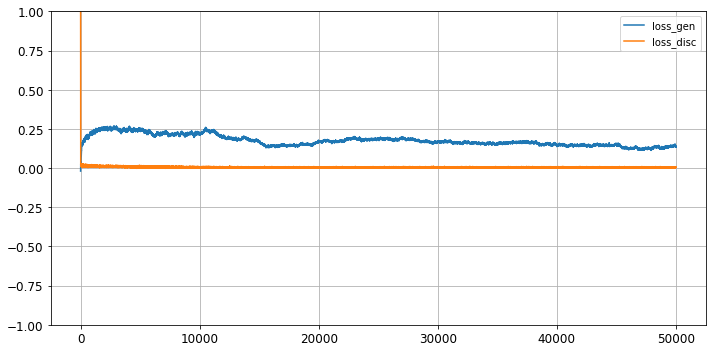

In [9]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-1,1])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [10]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### See the result of generator

Predicted Values: (1000, 3)
latent_space: 6
BATCH_SIZE: 100
use_bias: False
epochs: 50000
X-Y 2D slices:


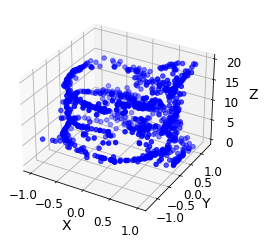

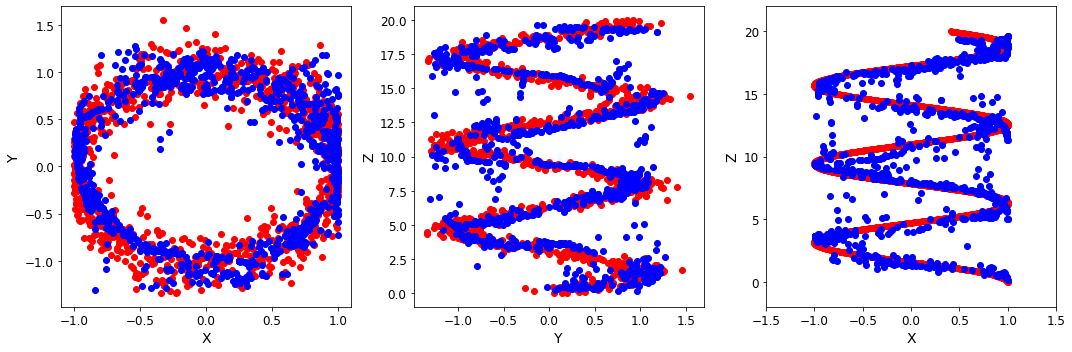

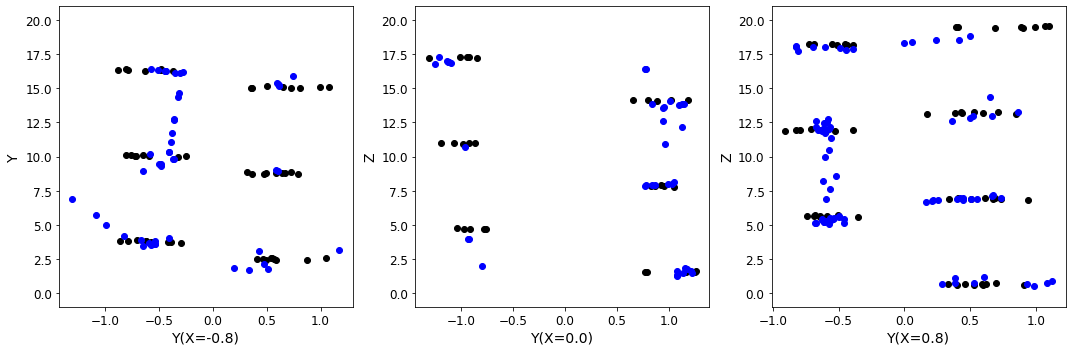

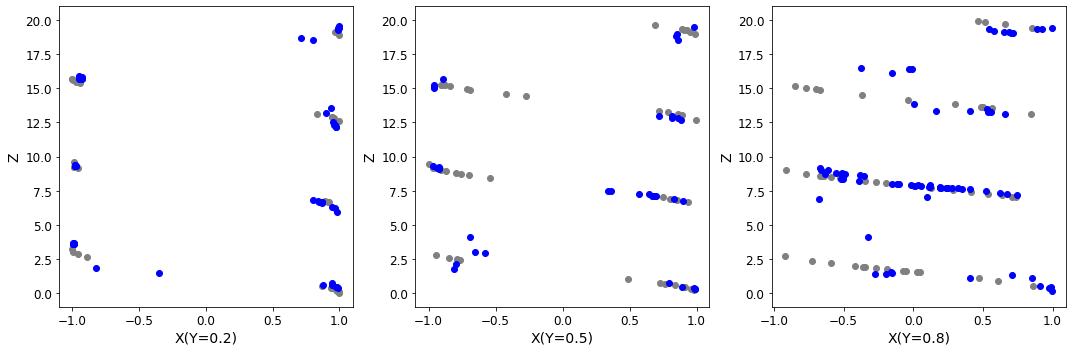

In [11]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='b')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train, c='gray')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

### Applying the prediction function

input_test : (400, 3)


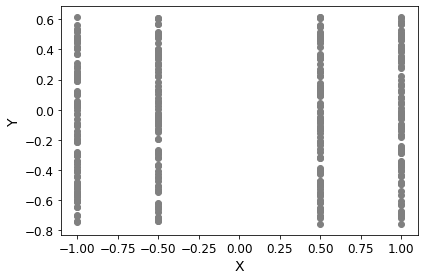

In [15]:
# define these for desired prediction
x_input = [-1,-0.5,1,0.5]
n_points = 400
y_min = -1
y_max = 1


# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//4, n_features), x_input[0])
predict2 = np.full((n_points//4, n_features), x_input[1])
predict3 = np.full((n_points//4, n_features), x_input[2])
predict4 = np.full((n_points//4, n_features), x_input[3])
predictthis = np.concatenate((predict1, predict2, predict3, predict4))

for n in range(n_points):
    predictthis[n,1] = random.uniform(y_min, y_max)
    
predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis_scaled.reshape(-1, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [16]:
X_generated = wgan.predict(input_test, scaler)

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)


latent_space= 6
Epochs= 50000
BATCH_SIZE= 100
use_bias= False
X-Y 2D slices:


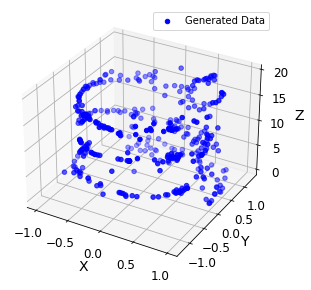

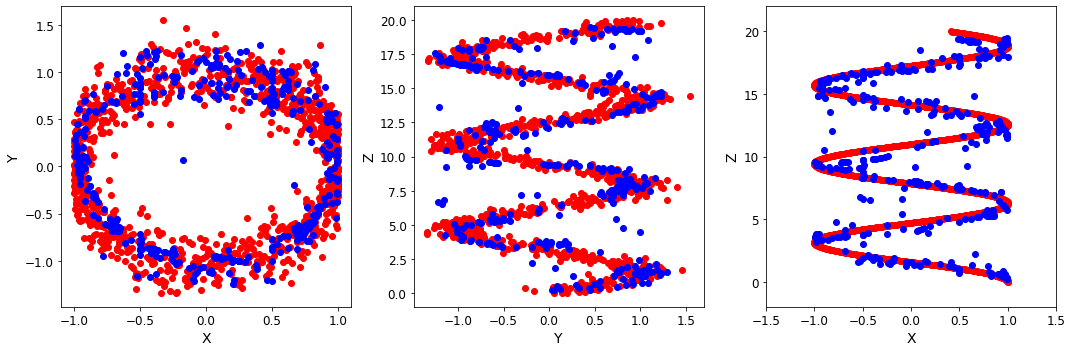

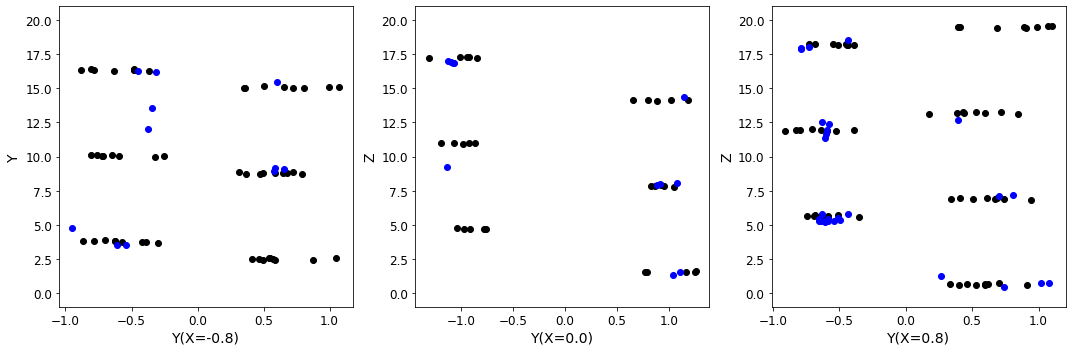

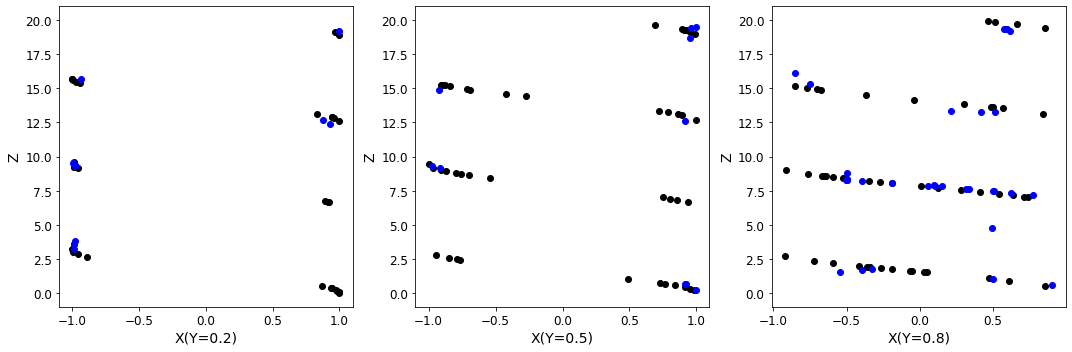

In [17]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], c='b', label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(X_generated[:,0],X_generated[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(X_generated[:,1],X_generated[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(X_generated[:,0],X_generated[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='r',label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    